Jan Jové Famadas
Niu:1633796


## Inicilitzacions bàsiques


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns
df = pd.read_csv('house_advance.csv')
df.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   
20  21          60       RL        101.0    14215   Pave   NaN      IR1   
21  22          45       RM         57.0     7449   Pave  Grvl      Reg   
22  23          20       RL         75.0     9742   Pave   NaN      Reg   
23  24         120       RM         44.0     4224   Pave   NaN      Reg   
24  25          20       RL          NaN     8246   Pave   NaN      IR1   
25  26          20       RL        110.0    14230   Pave   NaN      Reg   
26  27          20       RL         60.0     7200   Pave   NaN      Reg   
27  28          20       RL         98.0    11478   Pave   NaN      Reg   
28  29          20       RL         47.0    16321   Pave   NaN      IR1   
29  30          30       RM         60.0     6324   Pave   NaN      IR1   
30  31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31  32          20       RL          NaN     8544   Pave   NaN      IR1   
32  33          20       RL         85.0    11049   Pave   NaN      Reg   
33  34          20       RL         70.0    10552   Pave   NaN      IR1   
34  35         120       RL         60.0     7313   Pave   NaN      Reg   
35  36          60       RL        108.0    13418   Pave   NaN      Reg   
36  37          20       RL        112.0    10859   Pave   NaN      Reg   
37  38          20       RL         74.0     8532   Pave   NaN      Reg   
38  39          20       RL         68.0     7922   Pave   NaN      Reg   
39  40          90       RL         65.0     6040   Pave   NaN      Reg   
40  41          20       RL         84.0     8658   Pave   NaN      Reg   
41  42          20       RL        115.0    16905   Pave   NaN      Reg   
42  43          85       RL          NaN     9180   Pave   NaN      IR1   
43  44          20       RL          NaN     9200   Pave   NaN      IR1   
44  45          20       RL         70.0     7945   Pave   NaN      Reg   
45  46         120       RL         61.0     7658   Pave   NaN      Reg   
46  47          50       RL         48.0    12822   Pave   NaN      IR1   
47  48          20       FV         84.0    11096   Pave   NaN      Reg   
48  49         190       RM         33.0     4456   Pave   NaN      Reg   
49  50          20       RL         66.0     7742   Pave   NaN      Reg   

   LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1          Lvl    AllPub  

In [2]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score,cross_validate
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, mean_squared_error, r2_score


In [3]:
!pip install category_encoders
from category_encoders import TargetEncoder


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 633.0 kB/s eta 0:00:00


In [4]:
!pip install xgboost


In [5]:
import xgboost as xgb


Comencem mirant el dataset

## Analisi inicial

In [6]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
def has_nans(df): #mirar si té nans
  return df.isna().sum().sum()>0

print ("Tenim Nans?",has_nans(df)) #té nans?

percent_nan_fila = df.isna().mean(axis = 1)*100
percent_nan_fila.sort_values()

Tenim Nans? True


1328     1.234568
1386     1.234568
1210     2.469136
439      2.469136
21       2.469136
          ...    
705     17.283951
39      18.518519
1218    18.518519
533     18.518519
1011    18.518519
Length: 1460, dtype: float64

In [9]:
def get_percentage_nan_per_column(df):
  #retorna un df amb el % de nans de cada columna
  return df.isna().sum().sort_values()/len(df)*100.

percentage_nan = get_percentage_nan_per_column(df)
percentage_nan


Id                0.000000
TotalBsmtSF       0.000000
Heating           0.000000
SaleCondition     0.000000
CentralAir        0.000000
                   ...    
FireplaceQu      47.260274
Fence            80.753425
Alley            93.767123
MiscFeature      96.301370
PoolQC           99.520548
Length: 81, dtype: float64



Tipus de vivenda
MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


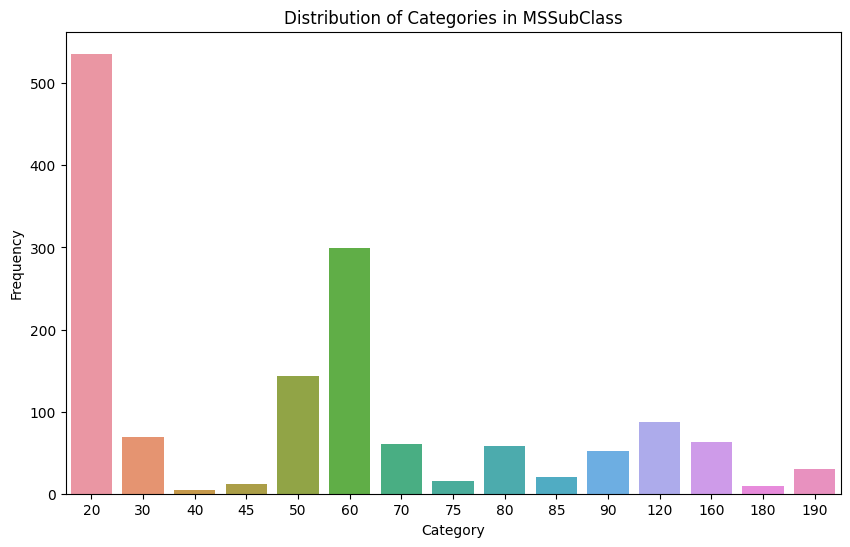

In [10]:
column = df['MSSubClass']

category_counts = column.value_counts()
print(category_counts)

# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Categories in MSSubClass')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

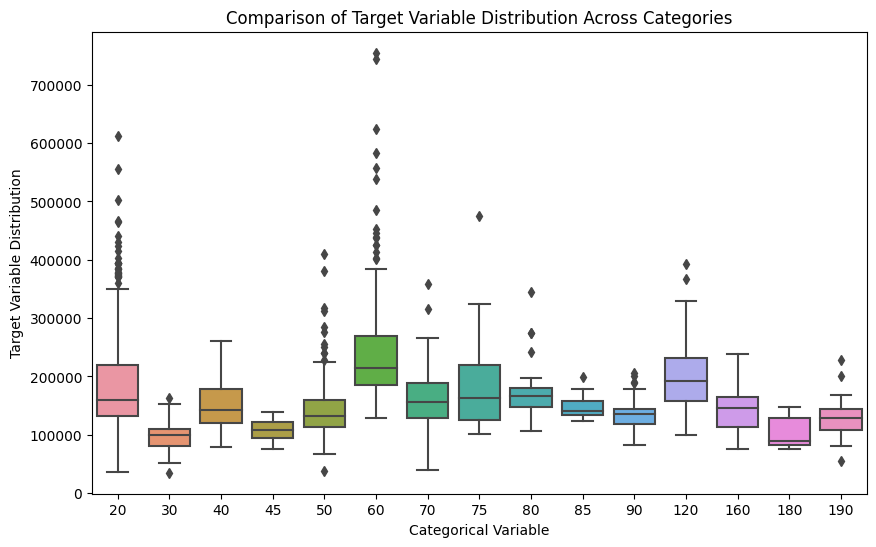

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MSSubClass', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

Pot ser una variable interessant.

Zona on esta la casa
MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


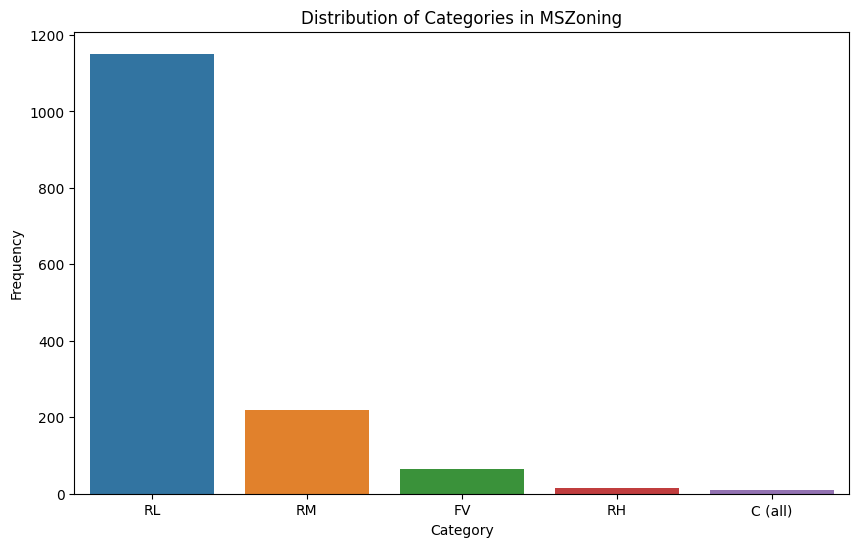

In [12]:
column = df['MSZoning']

category_counts = column.value_counts()
print(category_counts)

# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Categories in MSZoning')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

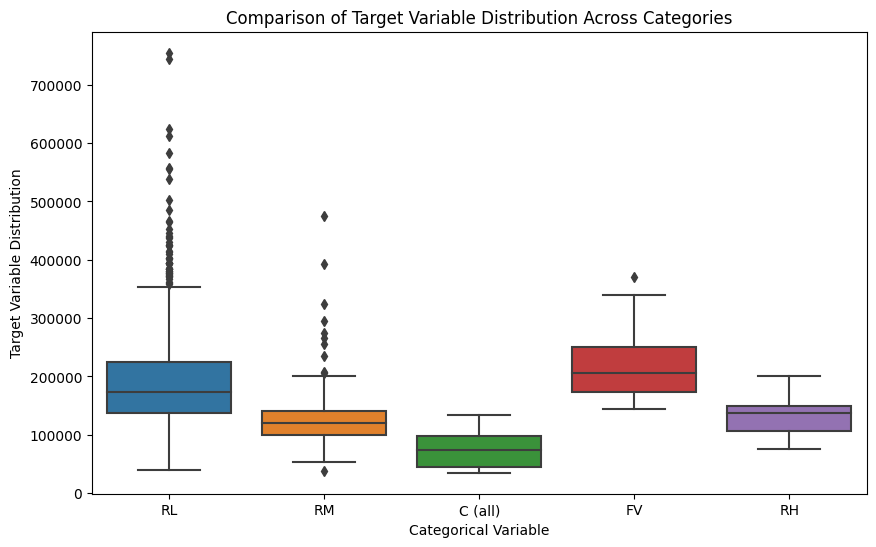

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MSZoning', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

La majoria de les cases son a zones de baixa densitat.

Simple: No posar

Complexa: Posar

Terreny de la casa.

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

LotShape: General shape of property

       Reg	Regular
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
LandContour: Flatness of the property

       Lvl	Near Flat/Level
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
LandSlope: Slope of property

       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope

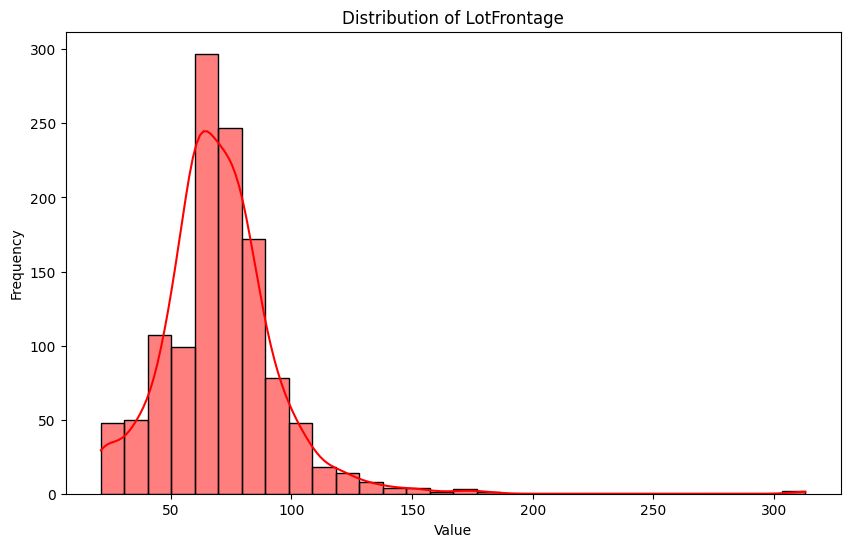

In [14]:
column = df['LotFrontage']

plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="red")
plt.title('Distribution of LotFrontage')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

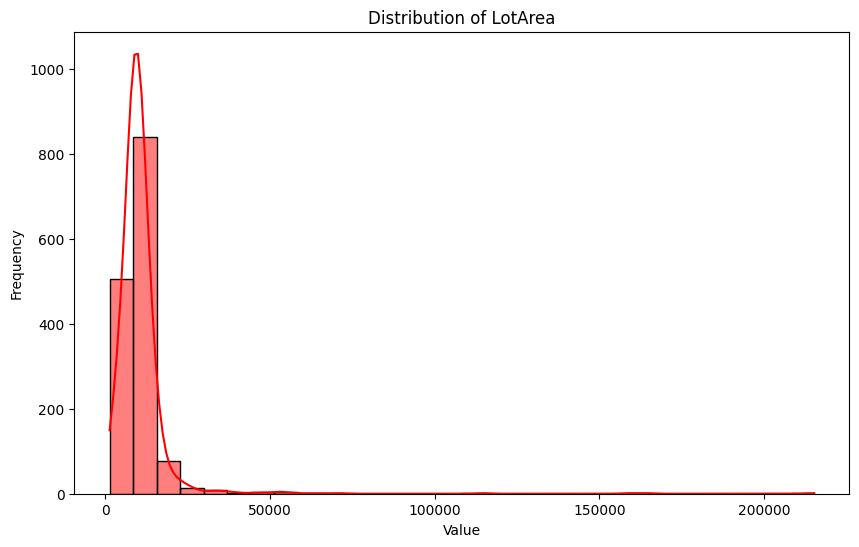

In [15]:
column = df['LotArea']

plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="red")
plt.title('Distribution of LotArea')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Tenim un outlier al final. Pero variable molt important.

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


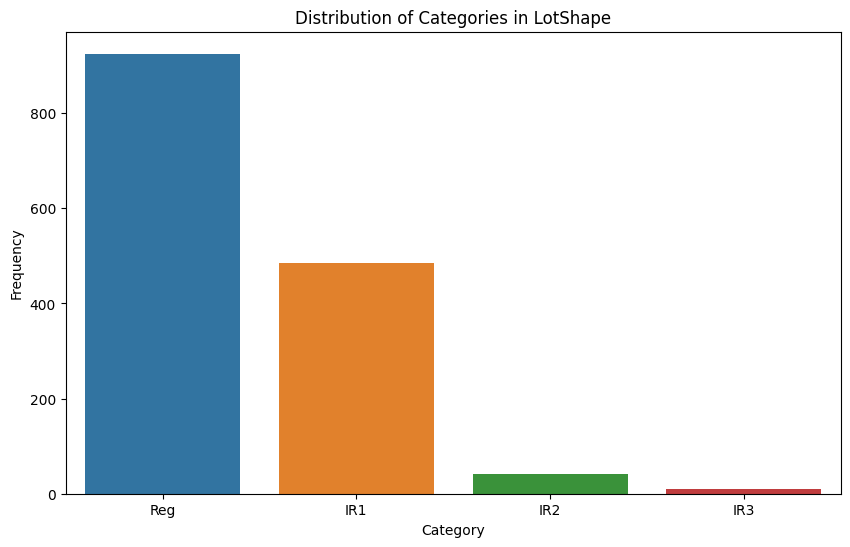

In [16]:
column = df['LotShape']

category_counts = column.value_counts()
print(category_counts)

# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Categories in LotShape')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

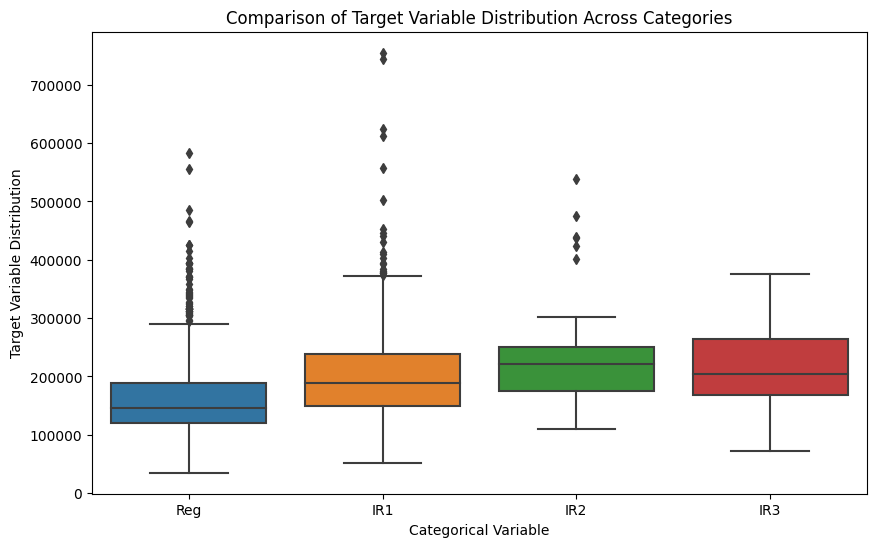

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='LotShape', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


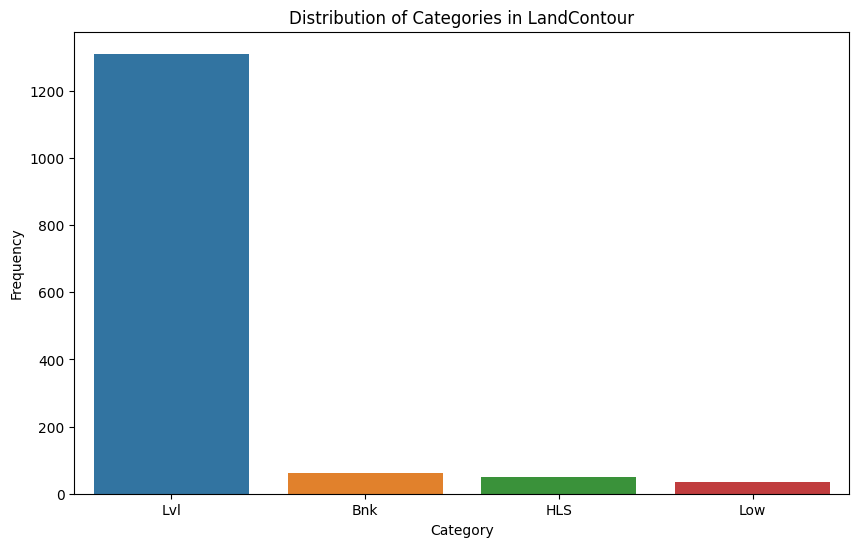

In [18]:
column = df['LandContour']

category_counts = column.value_counts()
print(category_counts)

# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Categories in LandContour')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

La majoria del terreny és pla

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


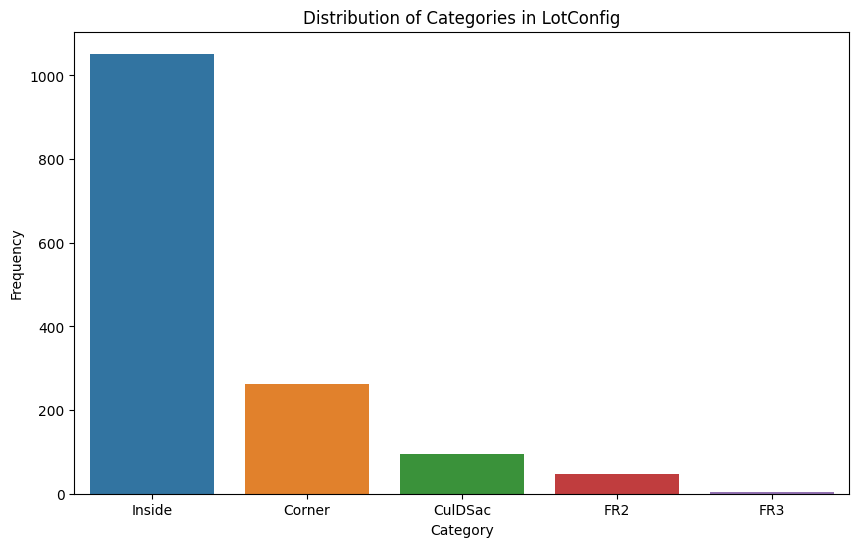

In [19]:
column = df['LotConfig']

category_counts = column.value_counts()
print(category_counts)

# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Categories in LotConfig')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

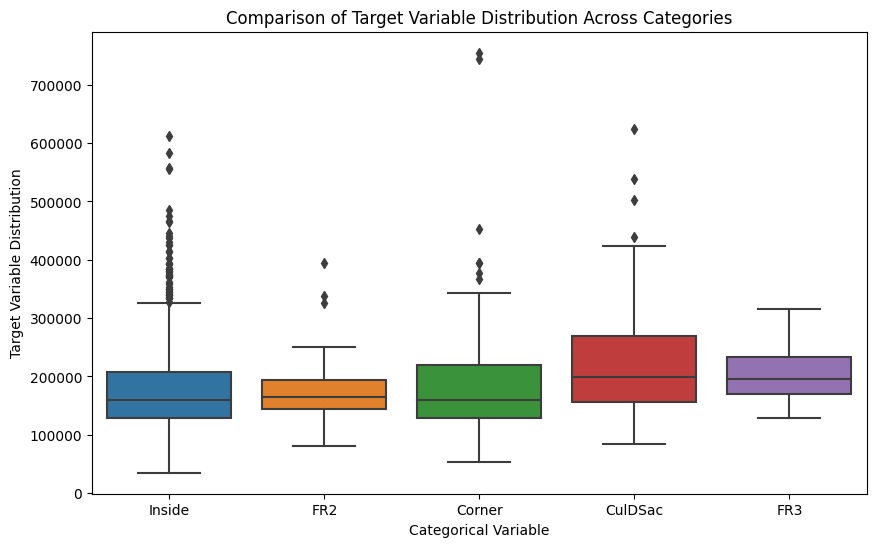

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='LotConfig', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


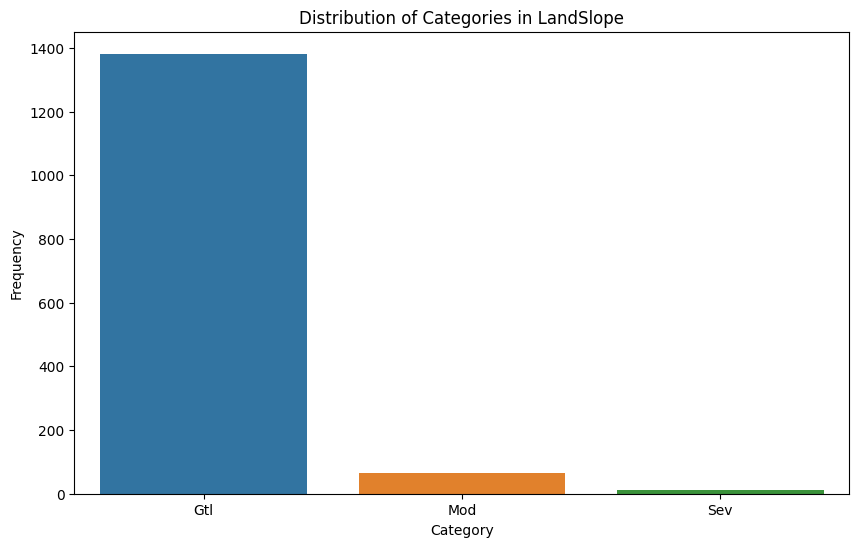

In [21]:
column = df['LandSlope']

category_counts = column.value_counts()
print(category_counts)

# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Categories in LandSlope')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

Conclusió: La variable que indica el terreny és important, la variable que indica quina la longitud de la part que toca al carrer esta a tocant el carrer és redundant. Les formes del terreny crec que son irrelevants.




Tipus de carrer

Street: Type of road access to property

       Grvl	Gravel
       Pave	Paved

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

Pave    1454
Grvl       6
Name: Street, dtype: int64


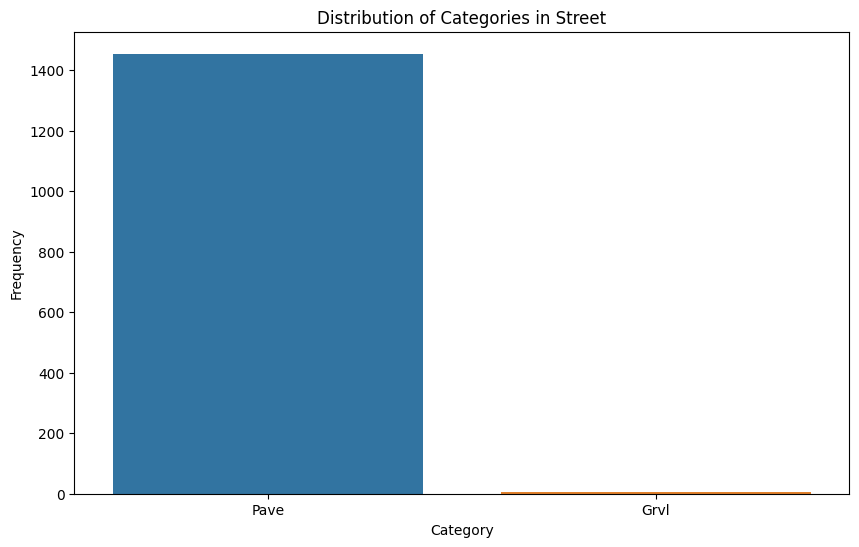

In [22]:
column = df['Street']

category_counts = column.value_counts()
print(category_counts)

# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Categories in Street')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

Grvl    50
Pave    41
Name: Alley, dtype: int64


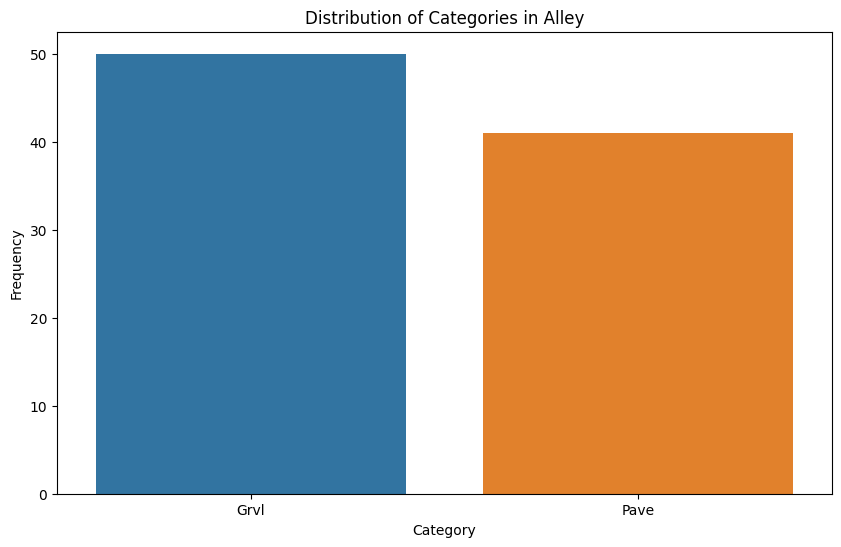

In [23]:
column = df['Alley']

category_counts = column.value_counts()
print(category_counts)

# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Categories in Alley')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

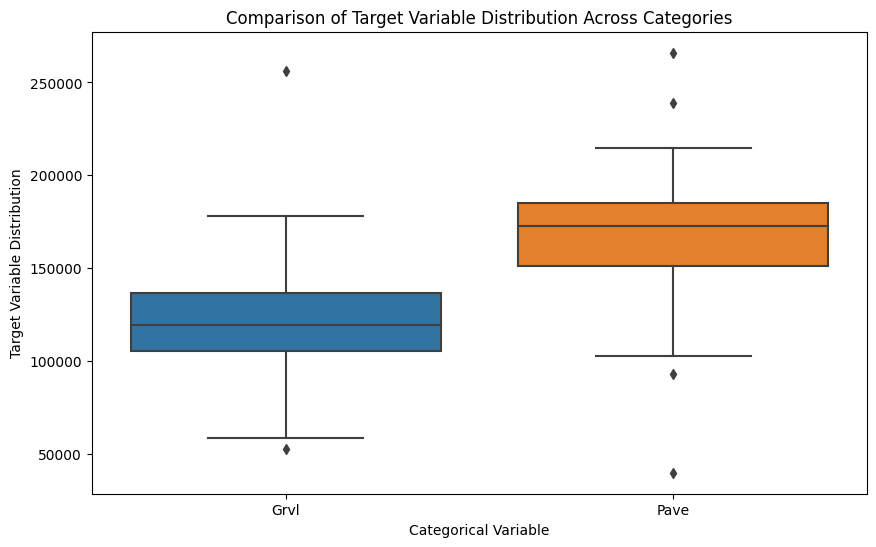

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Alley', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

Variables poc rellevants. Casi tots els carrers son pavimentats per tant és poc rellevant. En el cas dels carrerons la majoria no tenen conexió.

Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


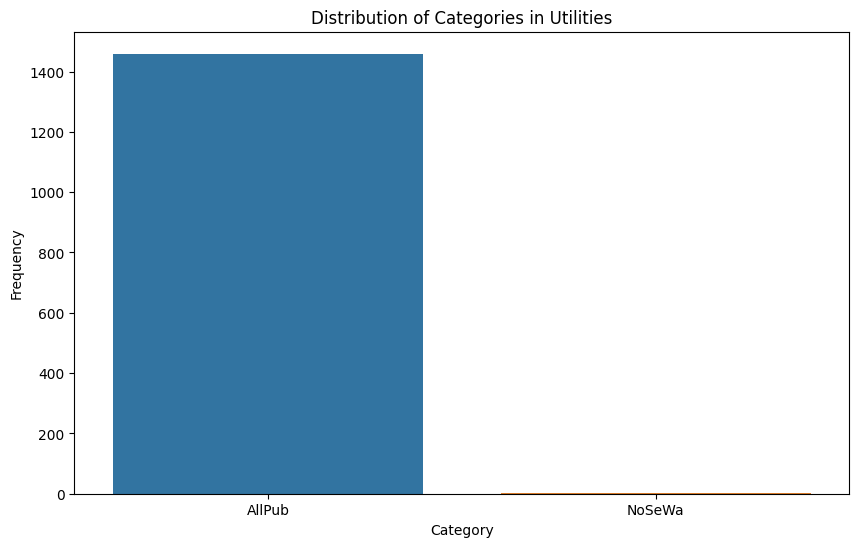

In [25]:
column = df['Utilities']

category_counts = column.value_counts()
print(category_counts)

# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Categories in Utilities')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [26]:
outlier = df[df['Utilities'] == 'NoSeWa']
print(outlier)


      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
944  945          20       RL          NaN    14375   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
944         Lvl    NoSeWa  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
944      1   2009       COD        Abnorml     137500  

[1 rows x 81 columns]


Totes les cases tenen servei menys 1. Segurament un outlier.

Localització:
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
Condition1: Proximity to various conditions

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Condition2: Proximity to various conditions (if more than one is present)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


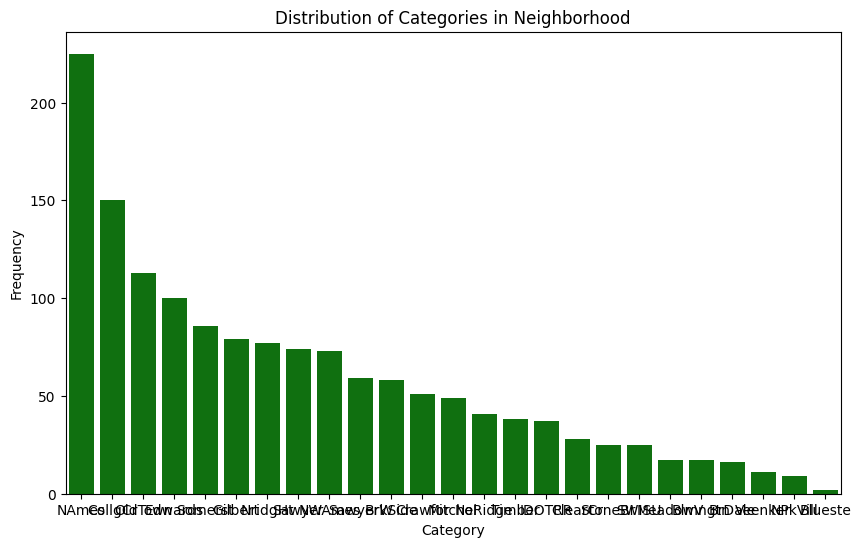

In [27]:
column = df['Neighborhood']

category_counts = column.value_counts()
print(category_counts)

# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,color='green')
plt.title('Distribution of Categories in Neighborhood')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


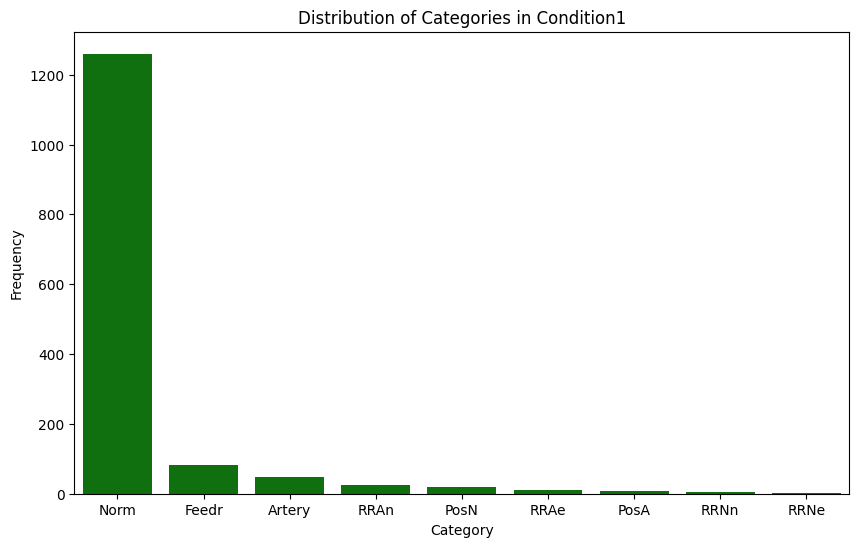

In [28]:
column = df['Condition1']

category_counts = column.value_counts()
print(category_counts)

# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,color='green')
plt.title('Distribution of Categories in Condition1')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

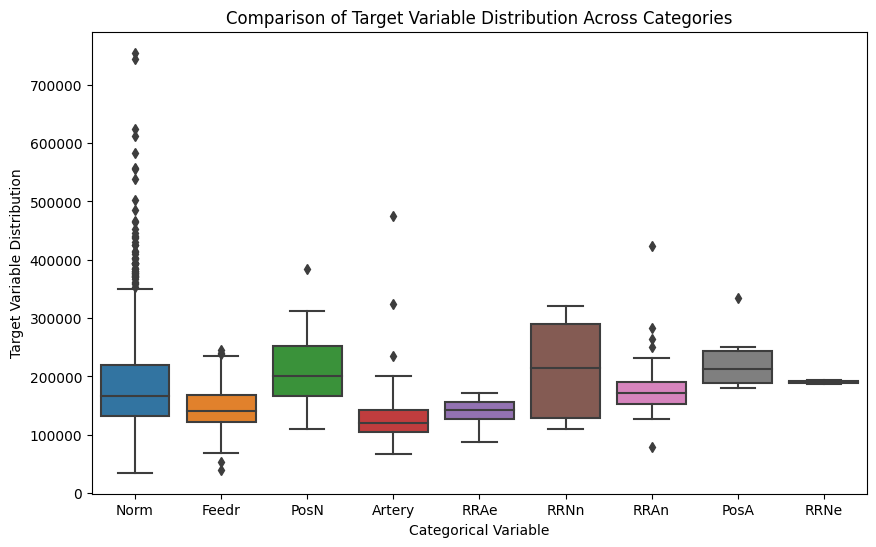

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Condition1', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64


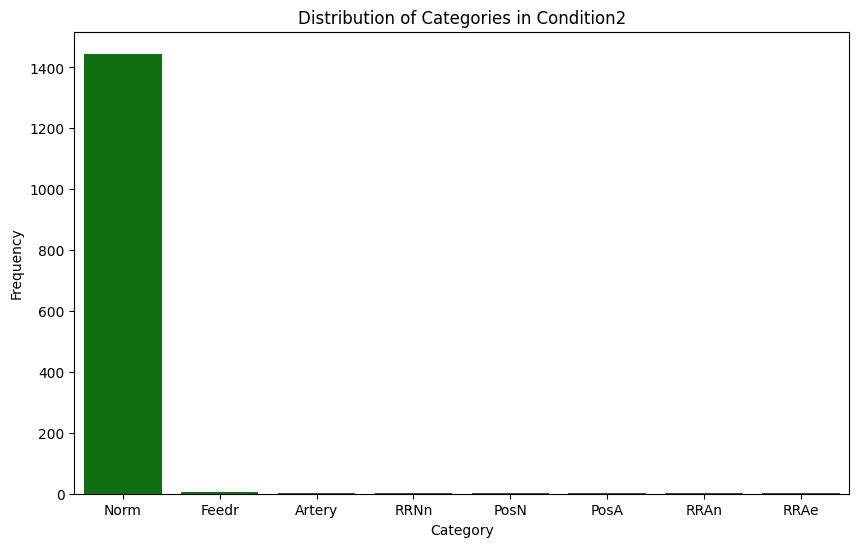

In [30]:
column = df['Condition2']

category_counts = column.value_counts()
print(category_counts)

# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,color='green')
plt.title('Distribution of Categories in Condition2')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

Aquestes dades son rellvants. En el cas del condition1 s'ha d'agafar i tractar les dades per veure quina informació es pot extreure. Per exemple fer una binaria si esta al carrer principal.

BldgType: Type of dwelling

       1Fam	Single-family Detached
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

HouseStyle: Style of dwelling

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


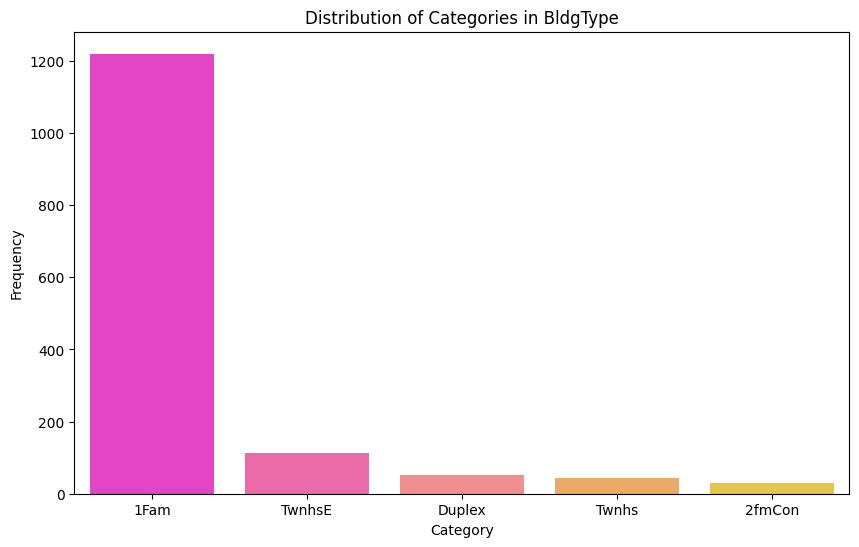

In [32]:
column = df['BldgType']

category_counts = column.value_counts()
print(category_counts)

# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='spring')
plt.title('Distribution of Categories in BldgType')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

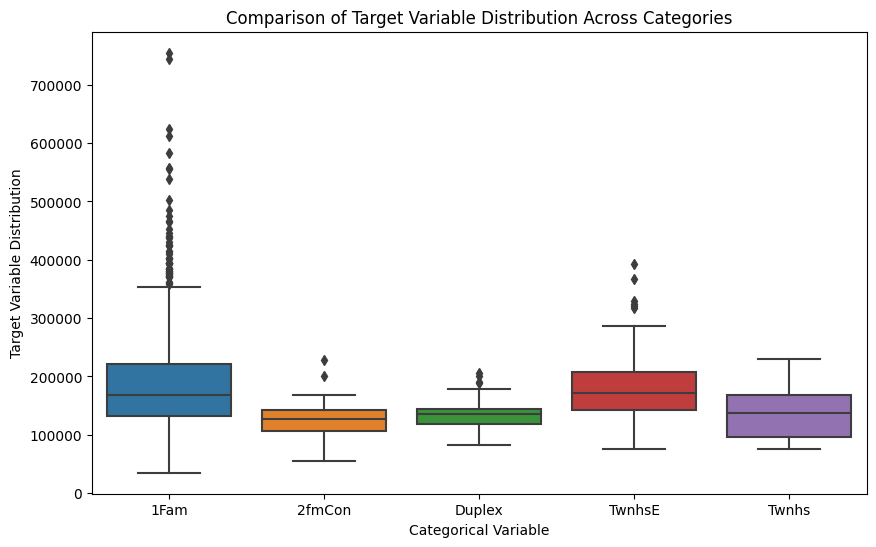

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BldgType', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


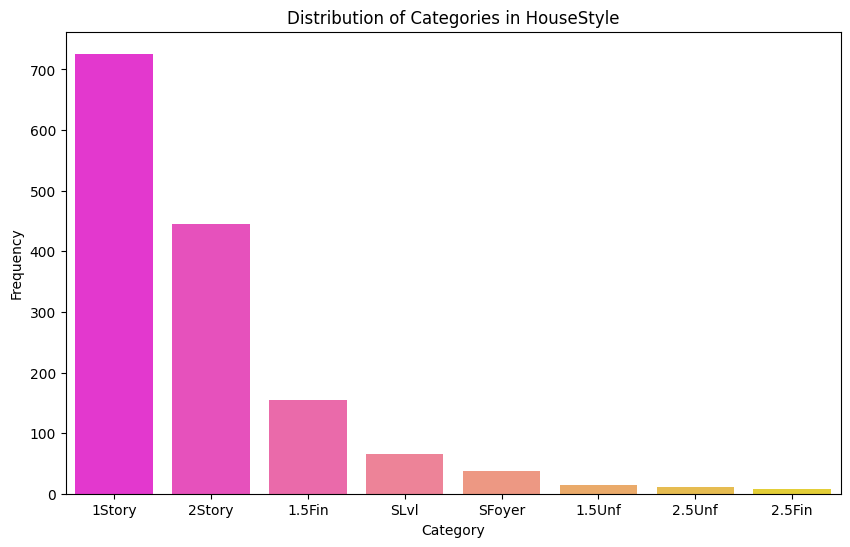

In [34]:
column = df['HouseStyle']

category_counts = column.value_counts()
print(category_counts)

# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='spring')
plt.title('Distribution of Categories in HouseStyle')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

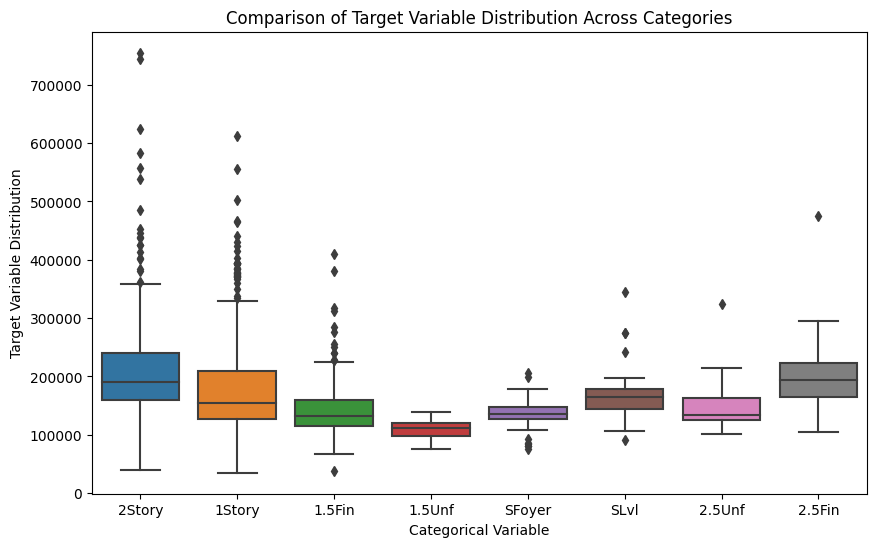

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HouseStyle', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

Pot ser dades rellevants

Qualitat de la casa

OverallQual: Rates the overall material and finish of the house

OverallCond: Rates the overall condition of the house

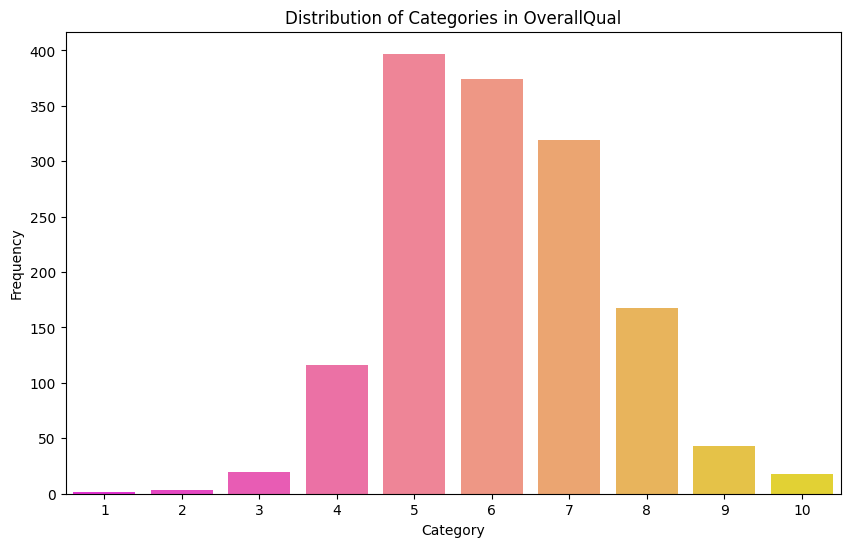

In [36]:
column = df['OverallQual']

category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='spring')
plt.title('Distribution of Categories in OverallQual')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

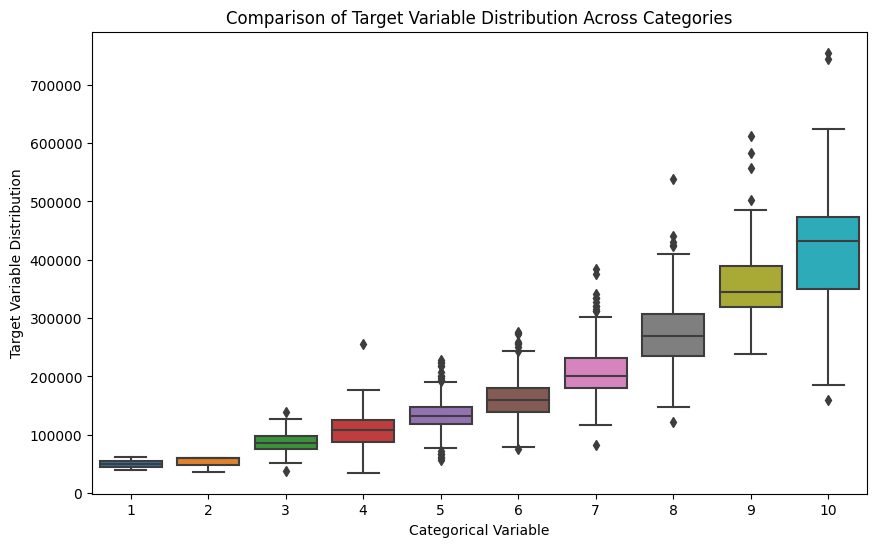

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

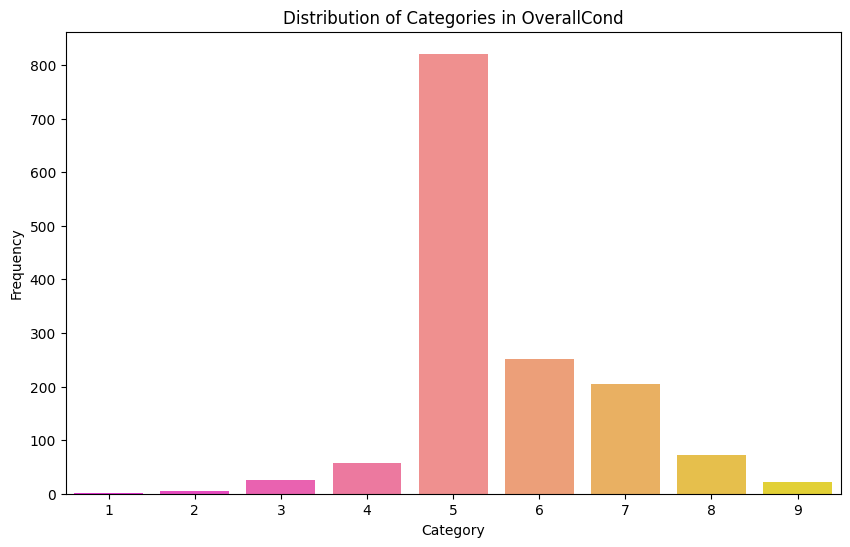

In [38]:
column = df['OverallCond']

category_counts = column.value_counts()


# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='spring')
plt.title('Distribution of Categories in OverallCond')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

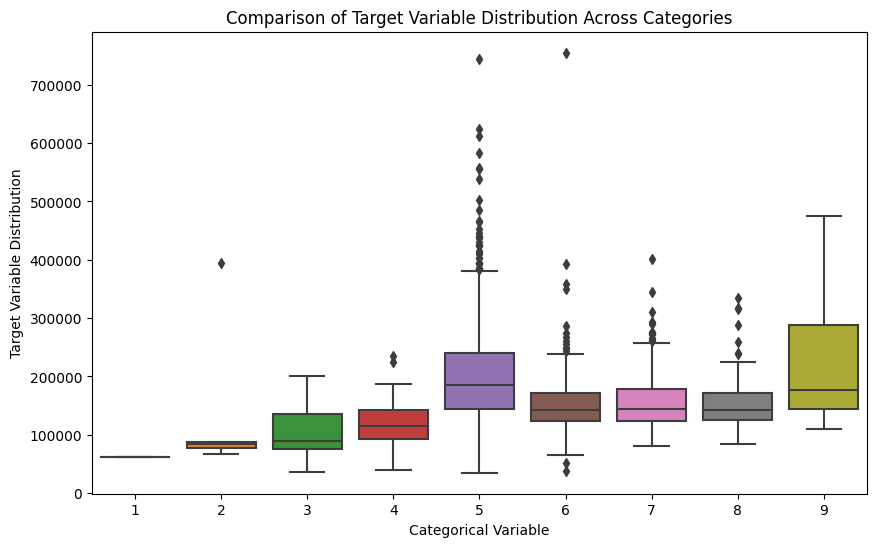

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallCond', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

Mesures importants per avaluar l'estat de la casa

Any construit

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

<ipython-input-40-2161ccd8e67c>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(column, bins=30, kde=True, palette='summer')


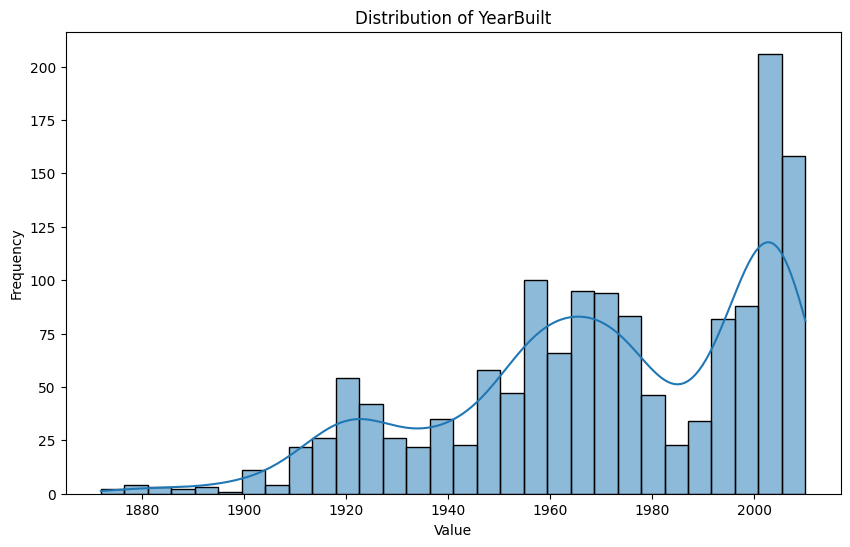

In [40]:
column = df['YearBuilt']

plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, palette='summer')
plt.title('Distribution of YearBuilt')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<ipython-input-41-069c073a72bd>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(column, bins=30, kde=True, palette='summer')


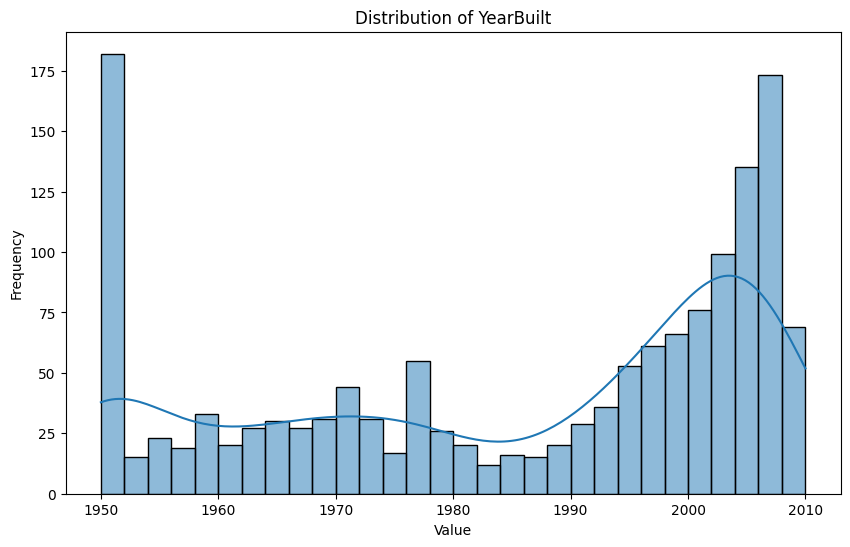

In [41]:
column = df['YearRemodAdd']

plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, palette='summer')
plt.title('Distribution of YearBuilt')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Columnes rellevants. Potser és necessari relacionar-ho d'alguna manera. Una possibilitat és crear una columna amb ´'ultim any de remodelació i si ha estat remodelat o no.

Sostre:
RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

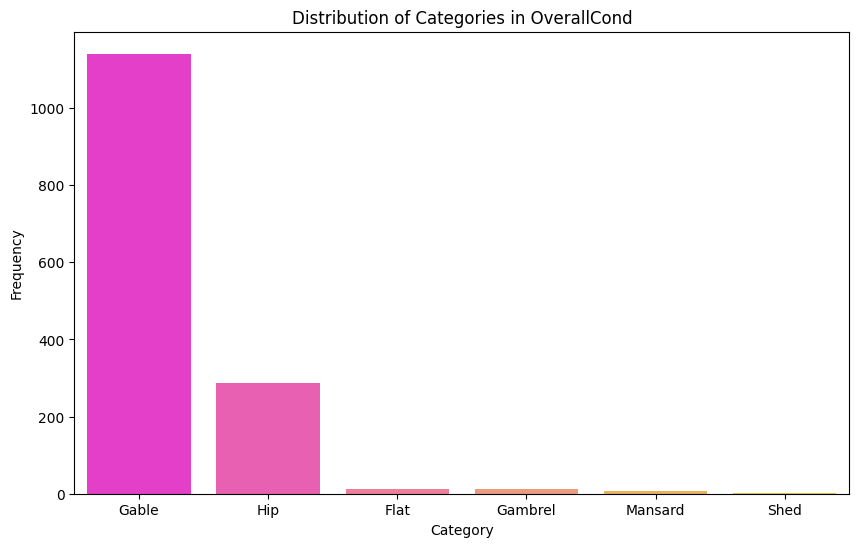

In [42]:
column = df['RoofStyle']

category_counts = column.value_counts()


# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='spring')
plt.title('Distribution of Categories in OverallCond')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

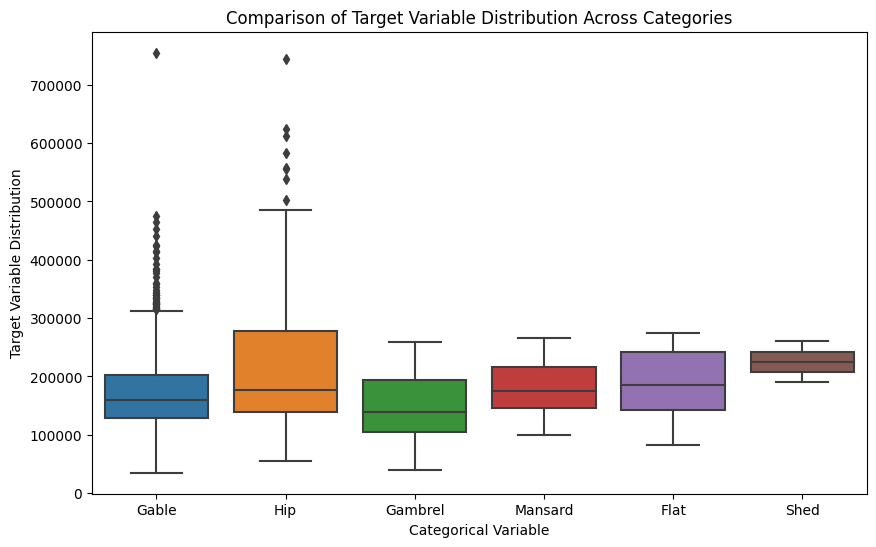

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RoofStyle', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

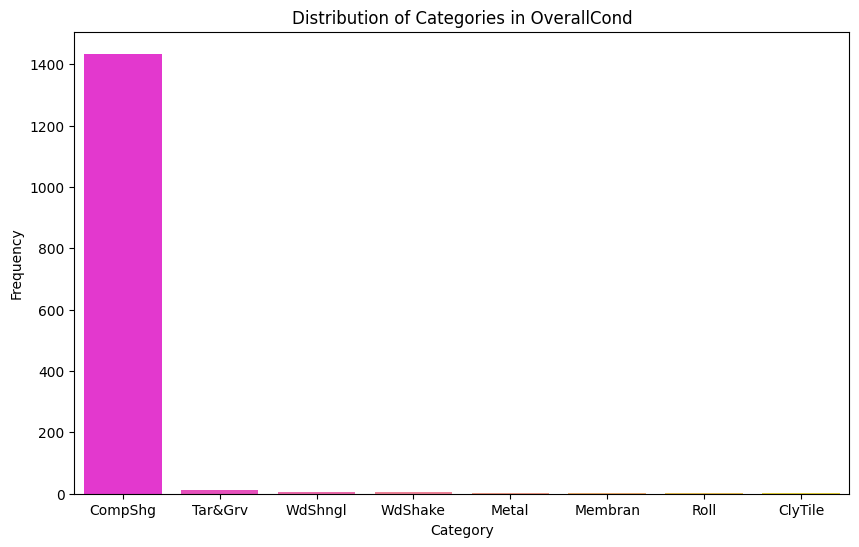

In [44]:
column = df['RoofMatl']

category_counts = column.value_counts()


# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='spring')
plt.title('Distribution of Categories in OverallCond')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

No és rellevant. Casi tots els sostrews son el mateix material i de la mateixa forma.

Materials exterior de la casa

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

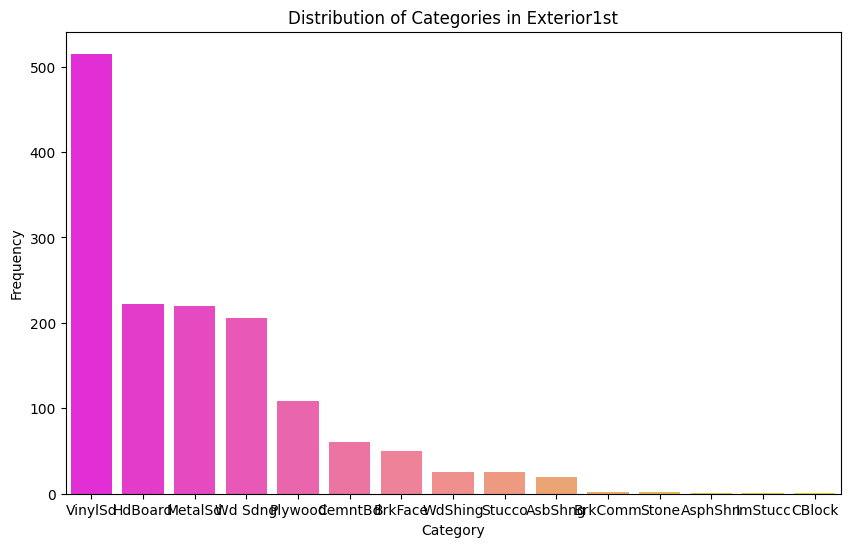

In [45]:
column = df['Exterior1st']

category_counts = column.value_counts()


# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='spring')
plt.title('Distribution of Categories in Exterior1st')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

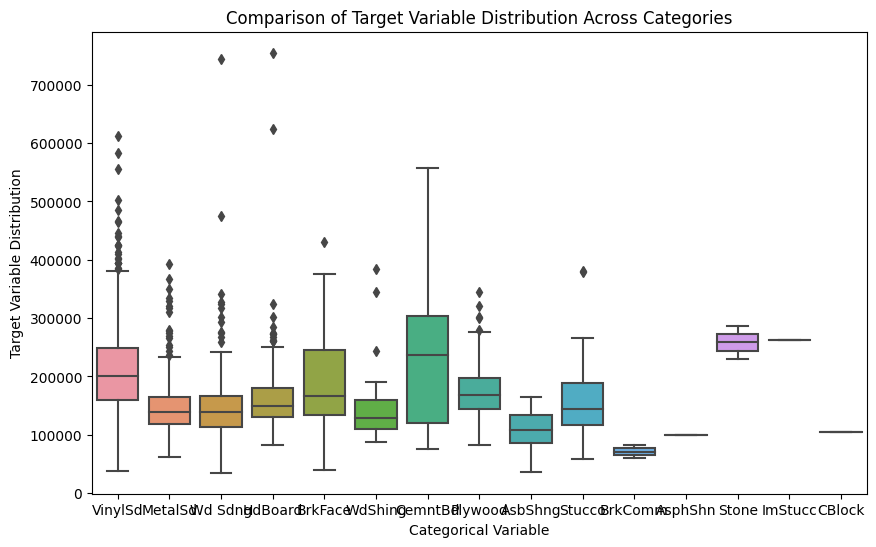

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exterior1st', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

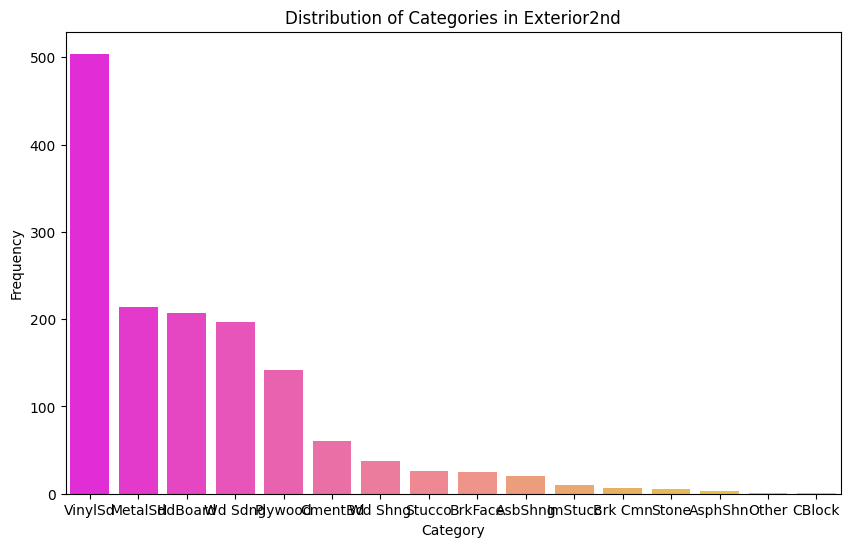

In [47]:
column = df['Exterior2nd']

category_counts = column.value_counts()


# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='spring')
plt.title('Distribution of Categories in Exterior2nd')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

Poc rellevant, casi totes les cases son amb el mateix material.

Qualitat del material del exeterior

ExterQual: Evaluates the quality of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

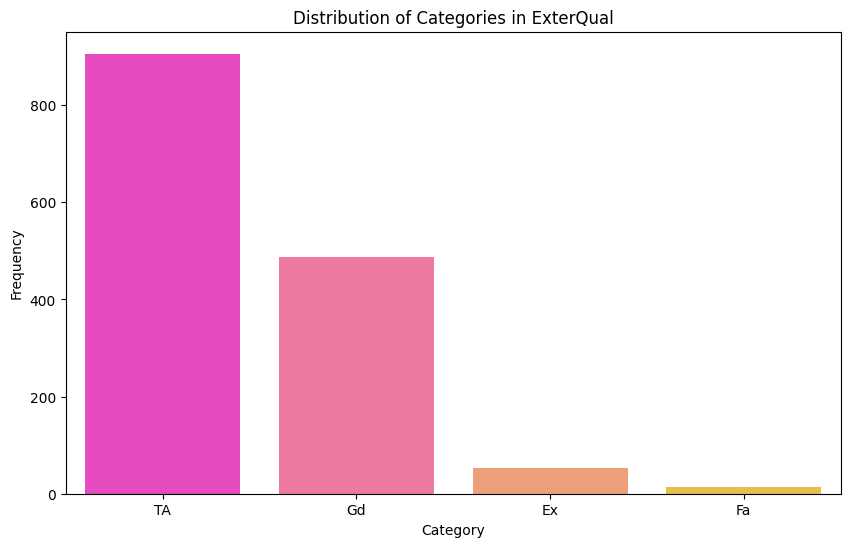

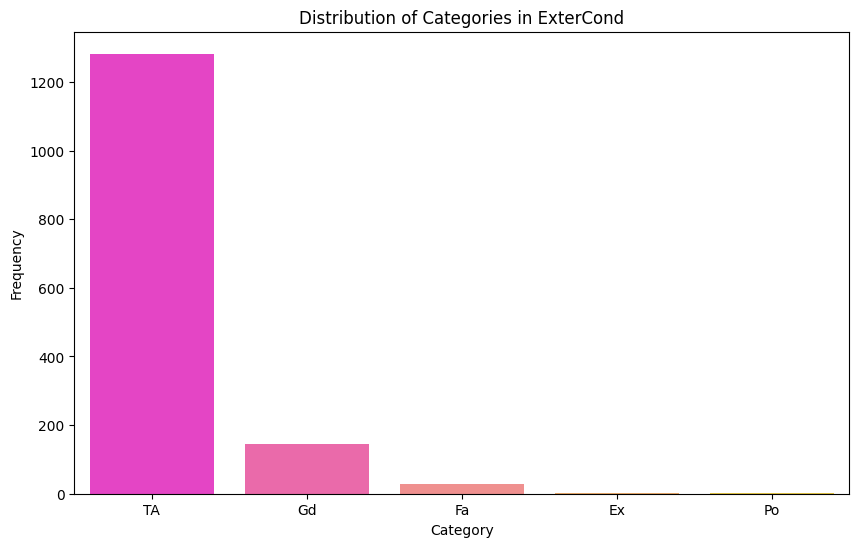

In [48]:
column = df['ExterQual']

category_counts = column.value_counts()


# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='spring')
plt.title('Distribution of Categories in ExterQual')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

column = df['ExterCond']

category_counts = column.value_counts()


# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='spring')
plt.title('Distribution of Categories in ExterCond')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

Dada potser rellevant, segurament s'ha d'ajuntar per tenir una puntuació del 1 al 10.

Recobriment

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

MasVnrArea: Masonry veneer area in square feet

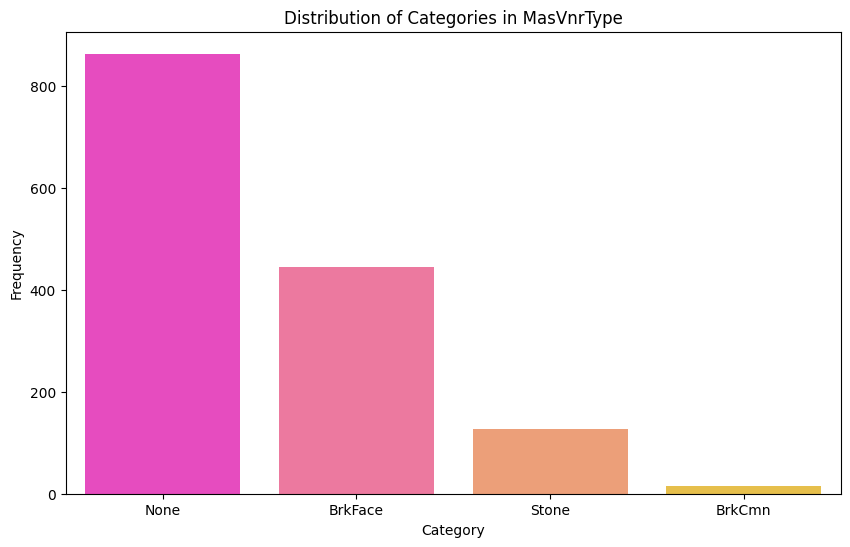

In [49]:
column = df['MasVnrType']

category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='spring')
plt.title('Distribution of Categories in MasVnrType')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

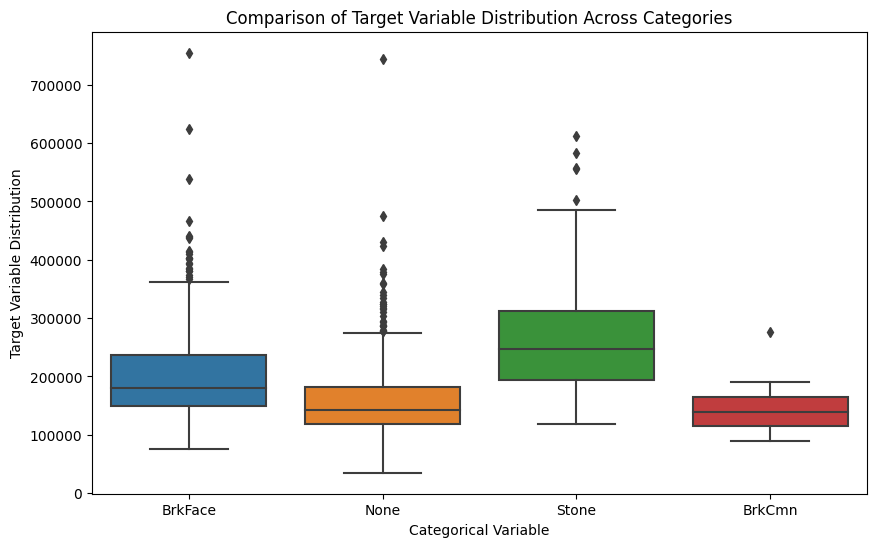

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MasVnrType', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

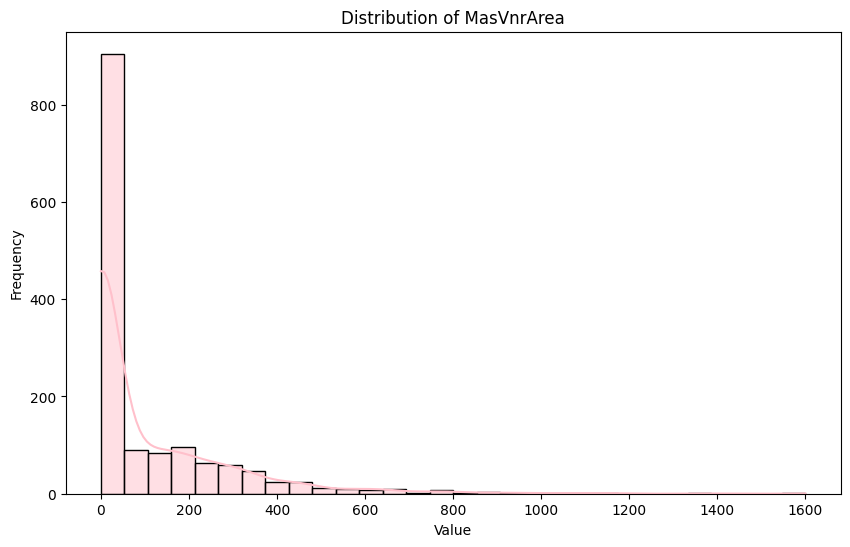

In [51]:
column = df['MasVnrArea']

plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="pink")
plt.title('Distribution of MasVnrArea')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Categoria poc rellevant la majoria de les casses no ho tenen.

Fonaments

Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood

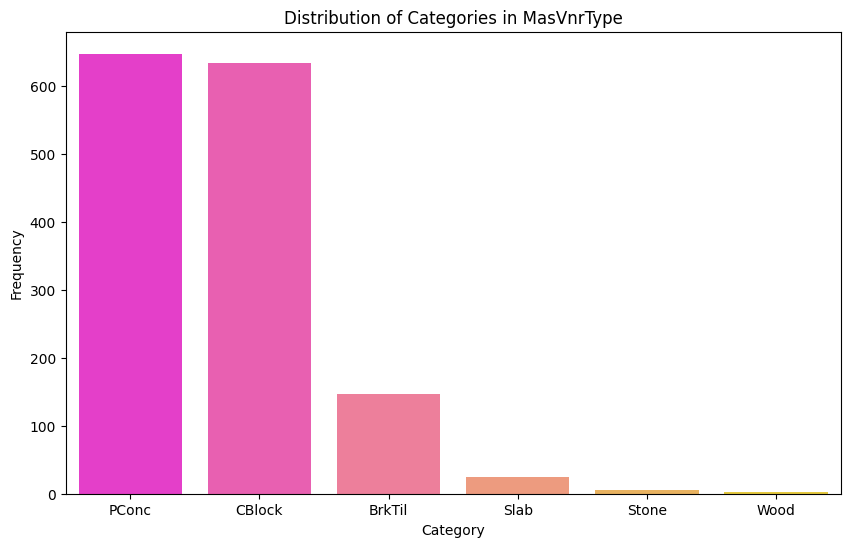

In [52]:
column = df['Foundation']


category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='spring')
plt.title('Distribution of Categories in MasVnrType')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

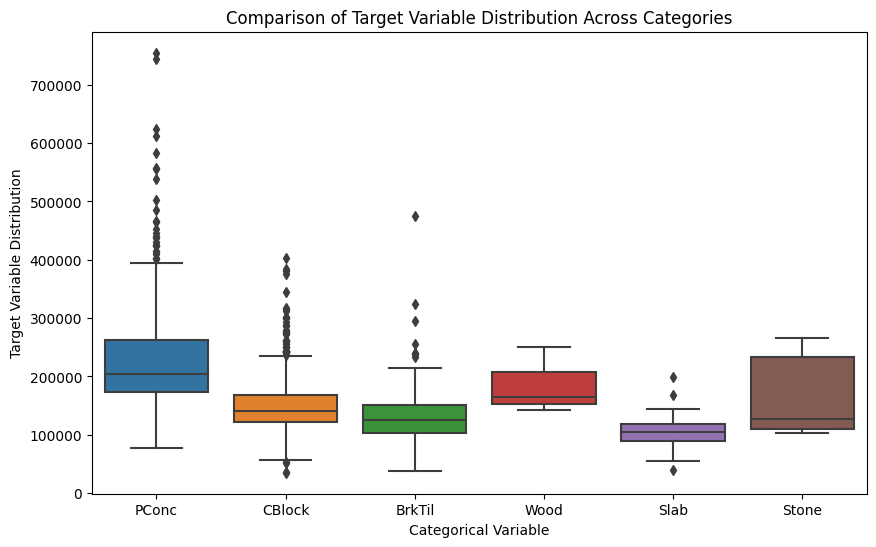

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Foundation', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

Columna que pot ser rellevant.

Tot el referit al sotano:
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


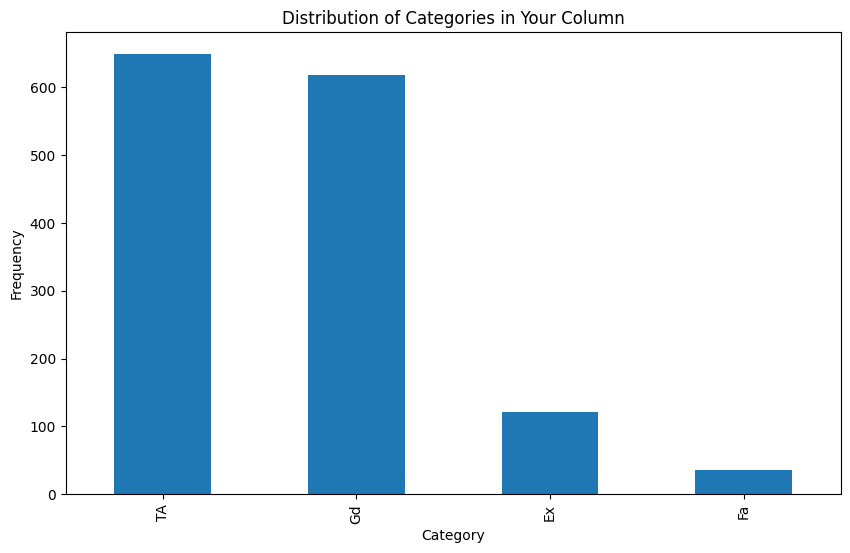

In [54]:
column = df['BsmtQual']
# Plot the distribution using a histogram
category_counts = column.value_counts()
print(category_counts)
# Plot the distribution using a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Categories in Your Column')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

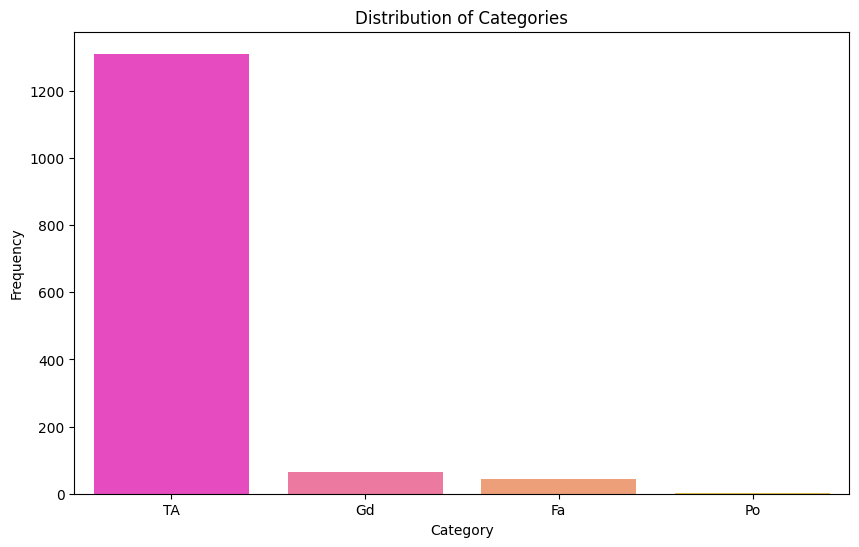

In [55]:
column = df['BsmtCond']


category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='spring')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

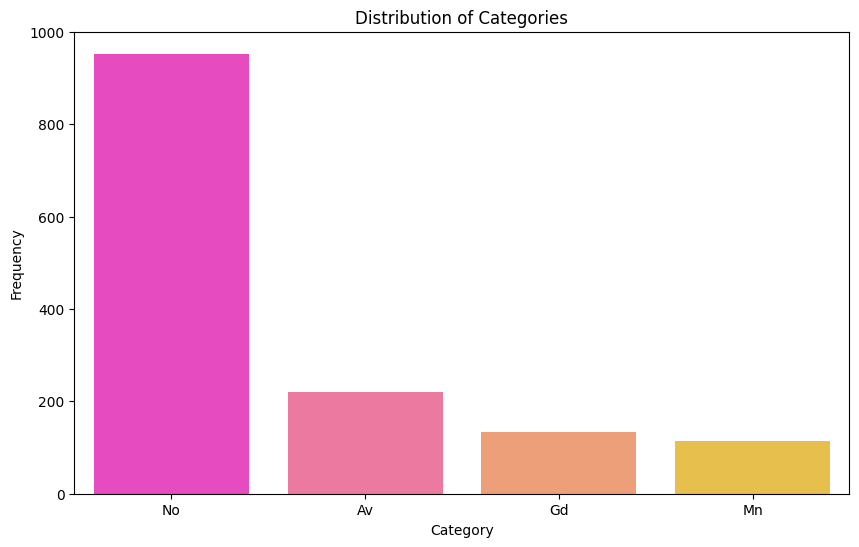

In [56]:
column = df['BsmtExposure']

category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='spring')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

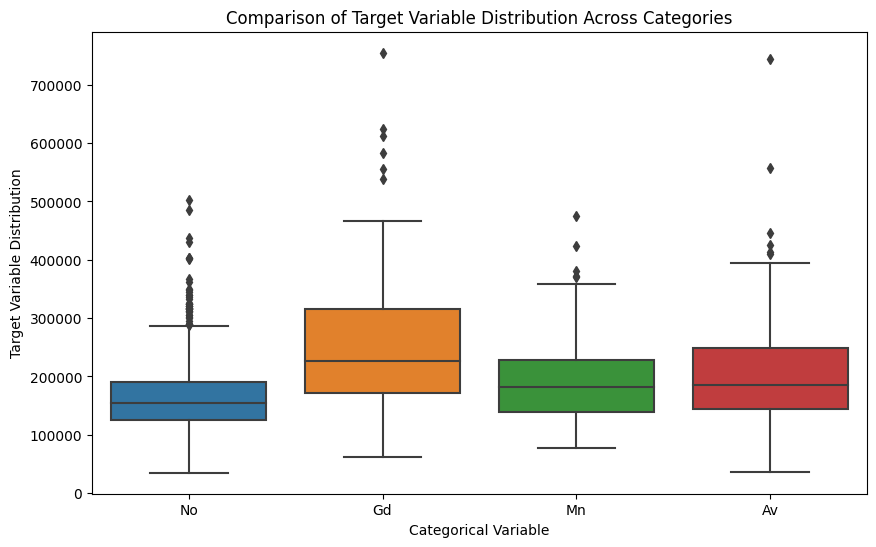

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BsmtExposure', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

Potser és necessari barrejar les columnes per tenir una  valoració més global.

Sotano tipus

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


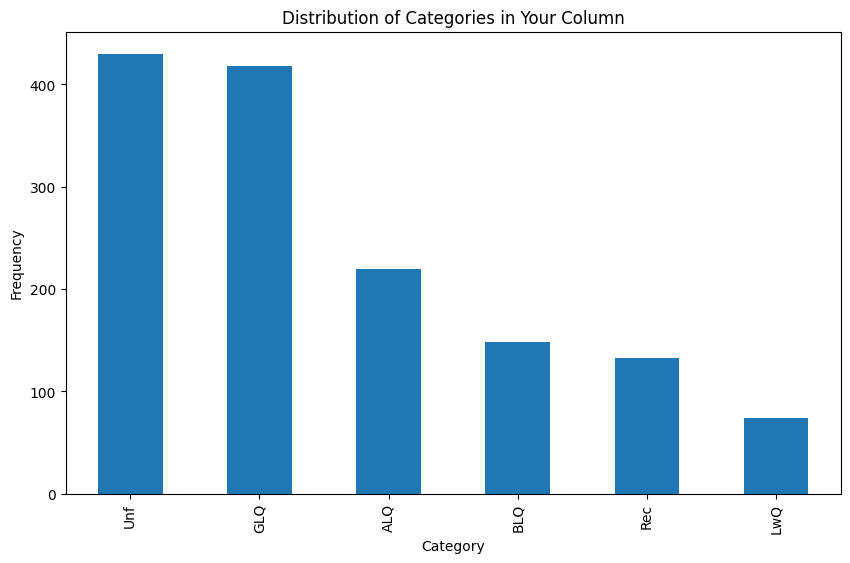

In [58]:
column = df['BsmtFinType1']

# Plot the distribution using a histogram
category_counts = column.value_counts()
print(category_counts)
# Plot the distribution using a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Categories in Your Column')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

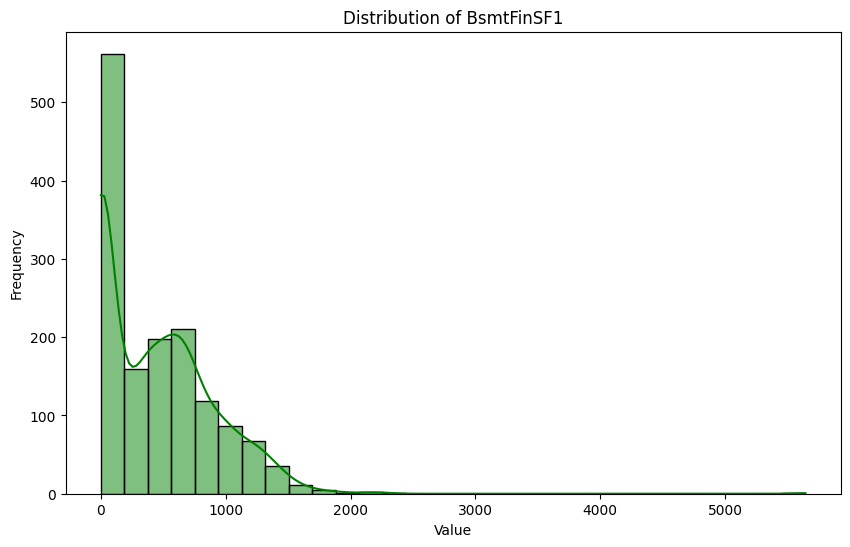

In [59]:
column = df['BsmtFinSF1']

plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="green")
plt.title('Distribution of BsmtFinSF1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Satano tipus 2

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


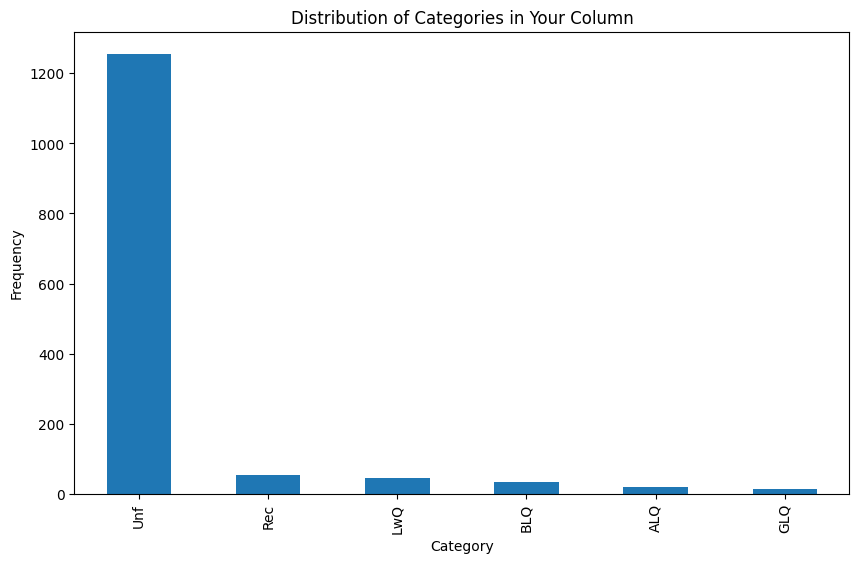

In [60]:
column = df['BsmtFinType2']

# Plot the distribution using a histogram
category_counts = column.value_counts()
print(category_counts)
# Plot the distribution using a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Categories in Your Column')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

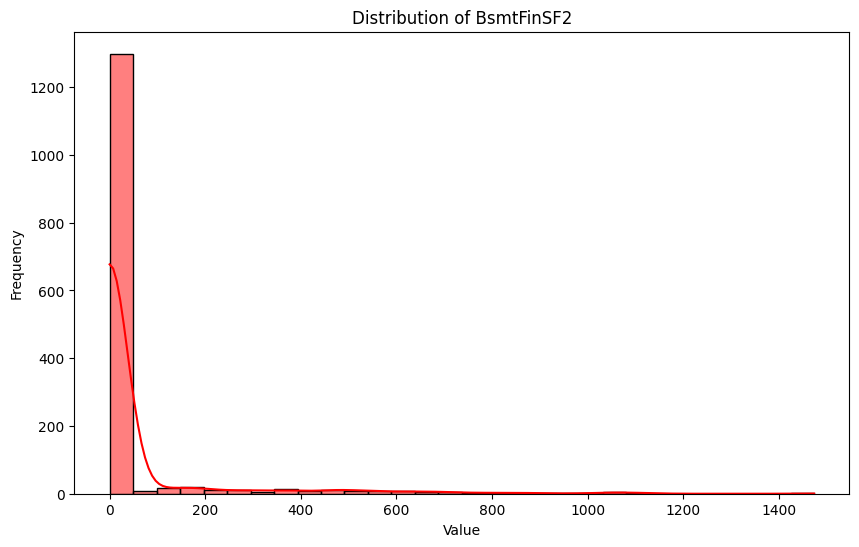

In [61]:
column = df['BsmtFinSF2']

plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="red")
plt.title('Distribution of BsmtFinSF2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Cal valorar com es poden ajuntar les columnes o si son rellevants

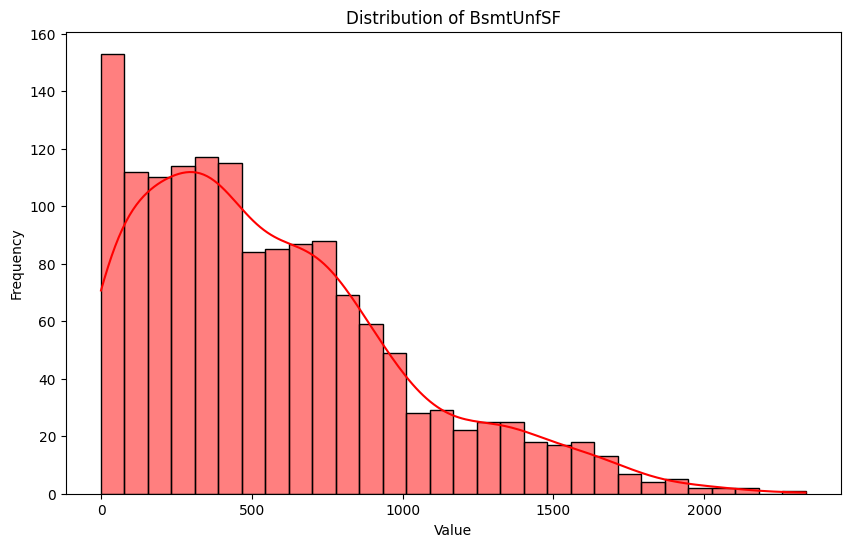

In [62]:
column = df['BsmtUnfSF']

plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="red")
plt.title('Distribution of BsmtUnfSF')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

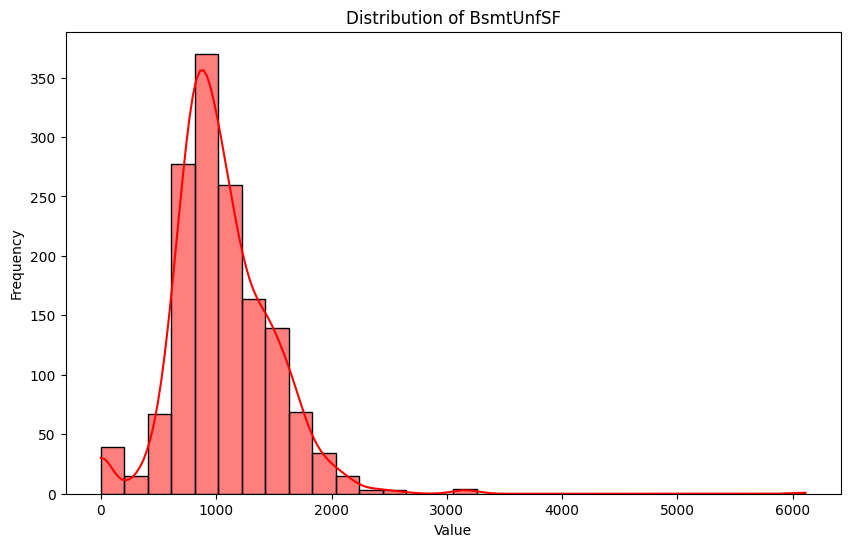

In [63]:
column = df['TotalBsmtSF']

plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="red")
plt.title('Distribution of BsmtUnfSF')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Dada rellevant. En cas d'un model simple a utilitzar ajuntant-la amb altres, o en cas d'un model complex per separat.

Calefaccions i aire acondicionat

Heating: Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

CentralAir: Central air conditioning

       N	No
       Y	Yes

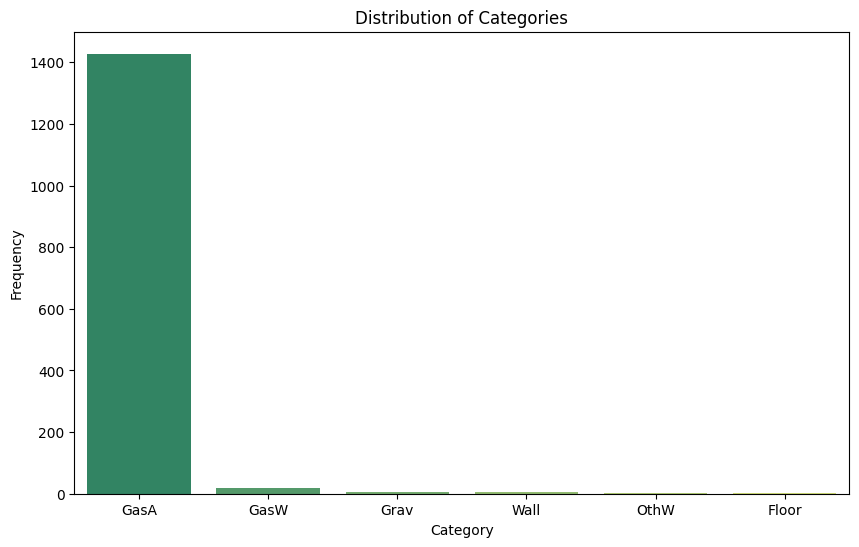

In [64]:
column = df['Heating']


category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

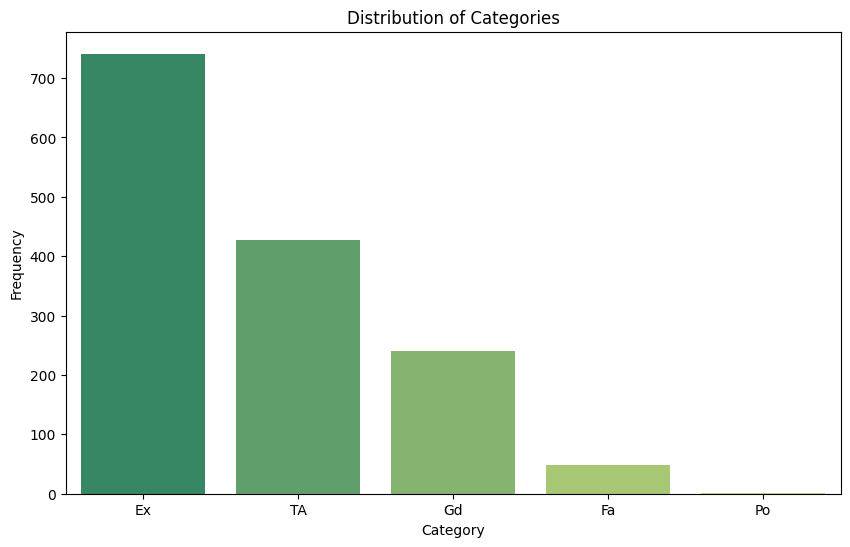

In [65]:
column = df['HeatingQC']


category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

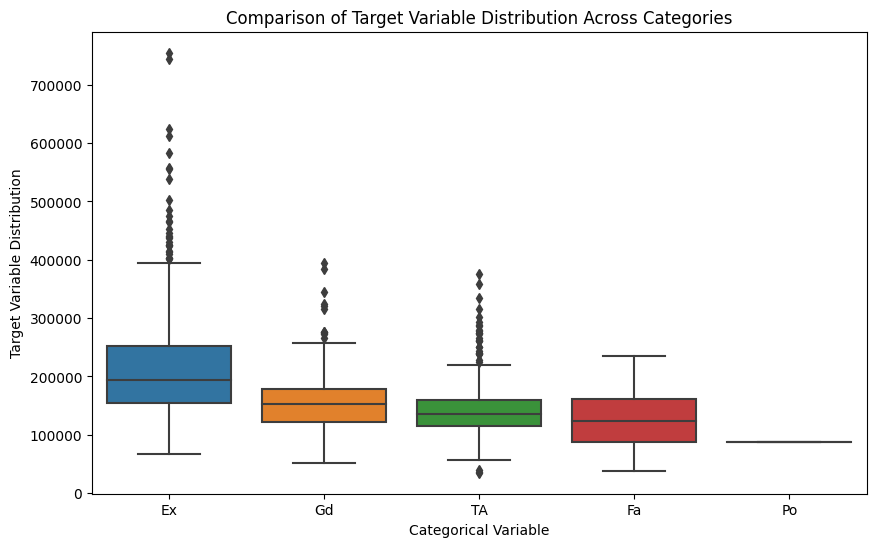

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeatingQC', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

Tots tenen calafecció i de bona qualitat no crec que sigui una variable útil

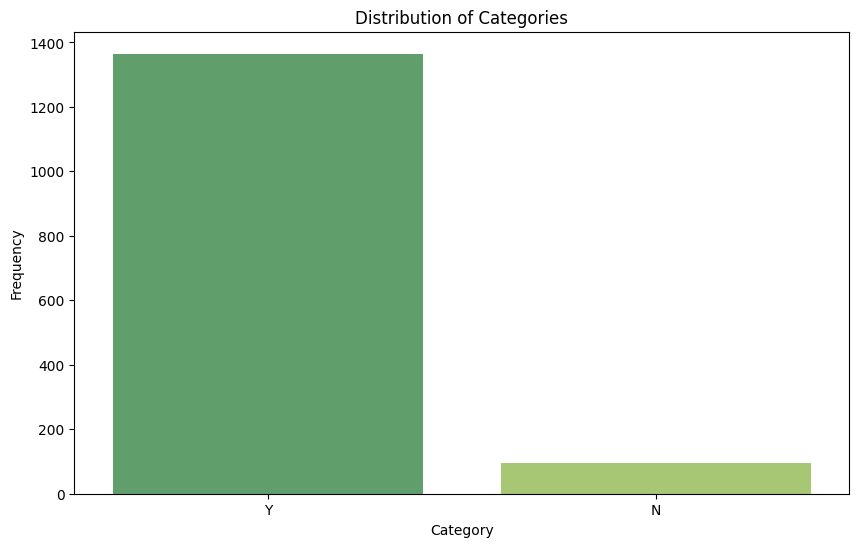

In [67]:
column = df['CentralAir']


category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

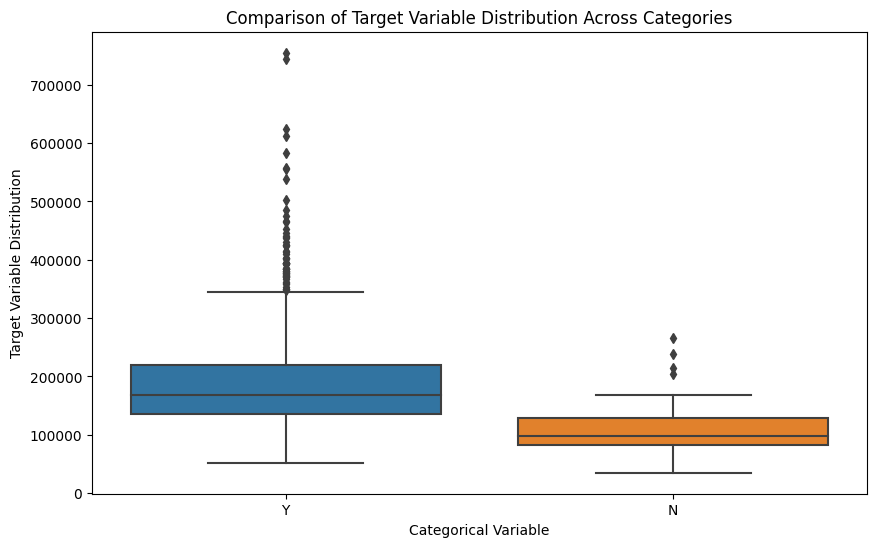

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CentralAir', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

Pot ser interessant agafarla tot i que en general tothom en tingui. Pero si veiem els boxplot generalment en tenen els rics

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

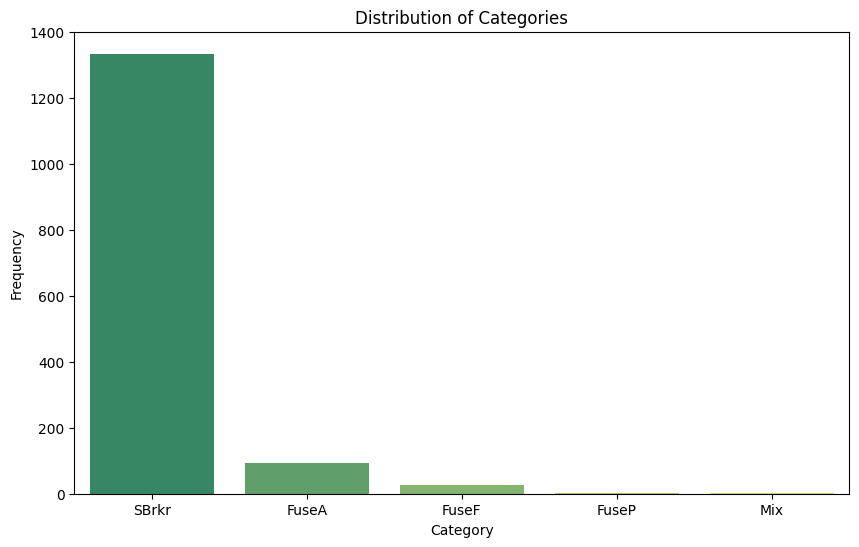

In [69]:
column = df['Electrical']


category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

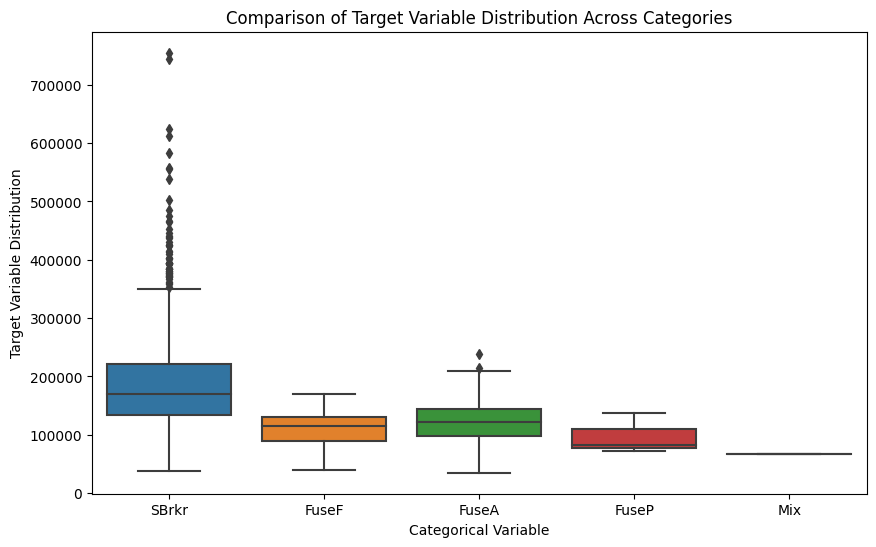

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electrical', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

Poc rellevant tothom te la mateixa

Area de la casa

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

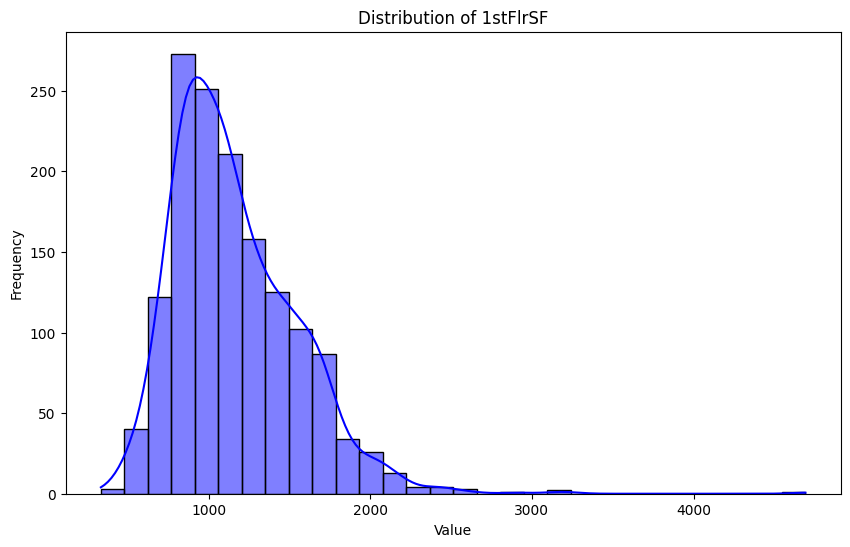

In [71]:
column = df['1stFlrSF']

plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="blue")
plt.title('Distribution of 1stFlrSF')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

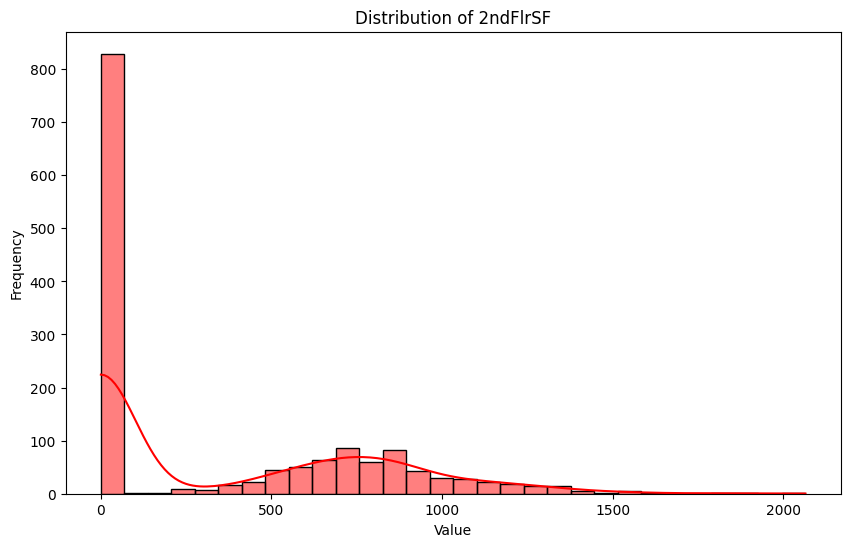

In [72]:
column = df['2ndFlrSF']

plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="red")
plt.title('Distribution of 2ndFlrSF')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

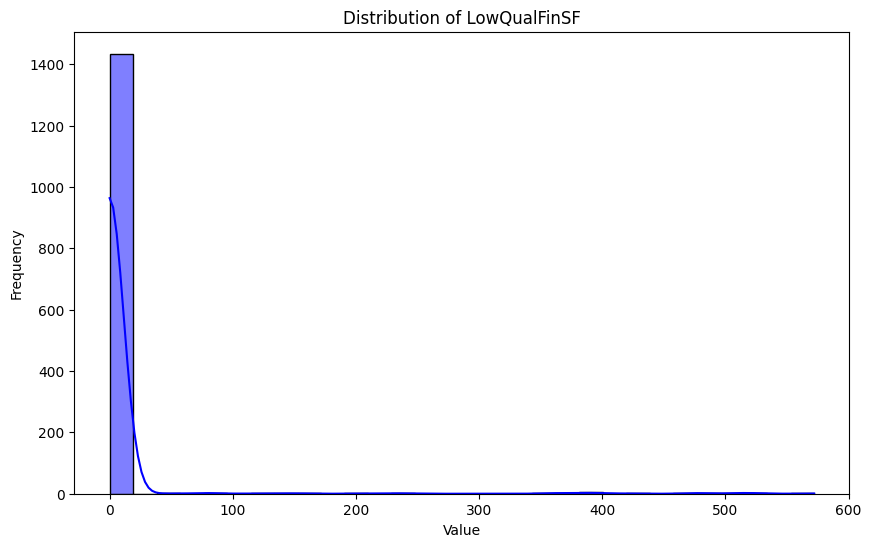

In [73]:
column = df['LowQualFinSF']

plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="blue")
plt.title('Distribution of LowQualFinSF')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

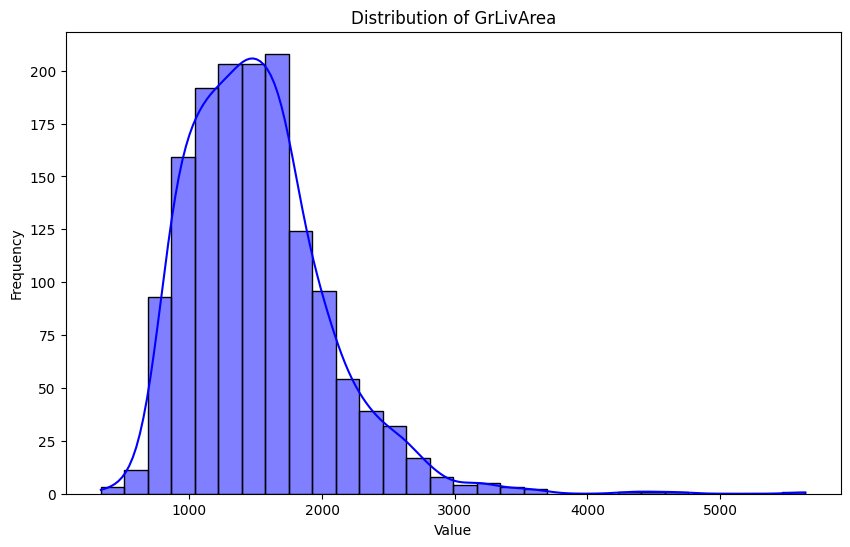

In [74]:
column = df['GrLivArea']

plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="blue")
plt.title('Distribution of GrLivArea')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

En el model simple molt important l'area de la casa. En models més complexos utilitzarem els de 1ra i segona planta. Els acabats de mala qualitat poden ser irrelevants.

Lavabos

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

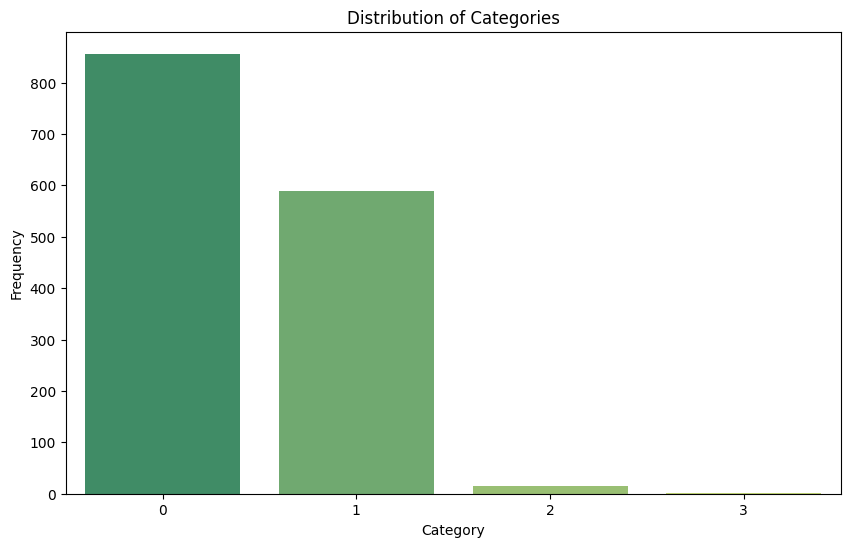

In [75]:
column = df['BsmtFullBath']


category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

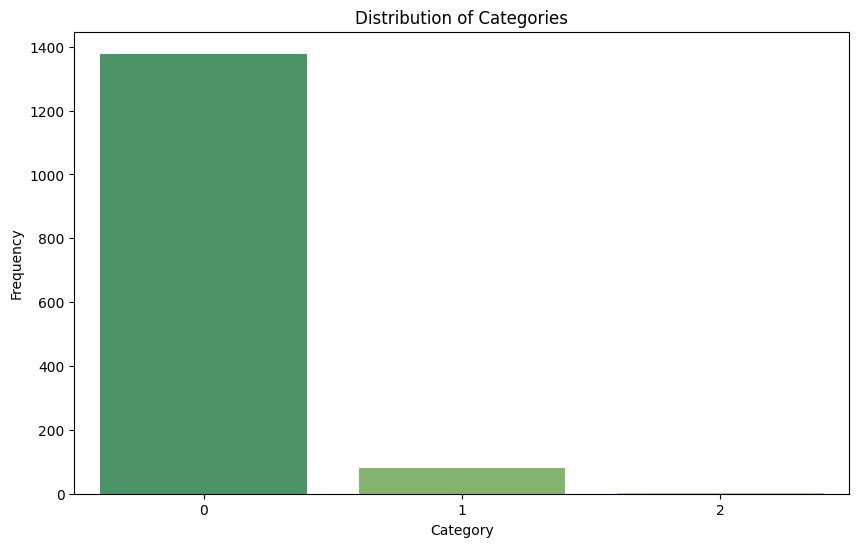

In [76]:
column = df['BsmtHalfBath']

category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

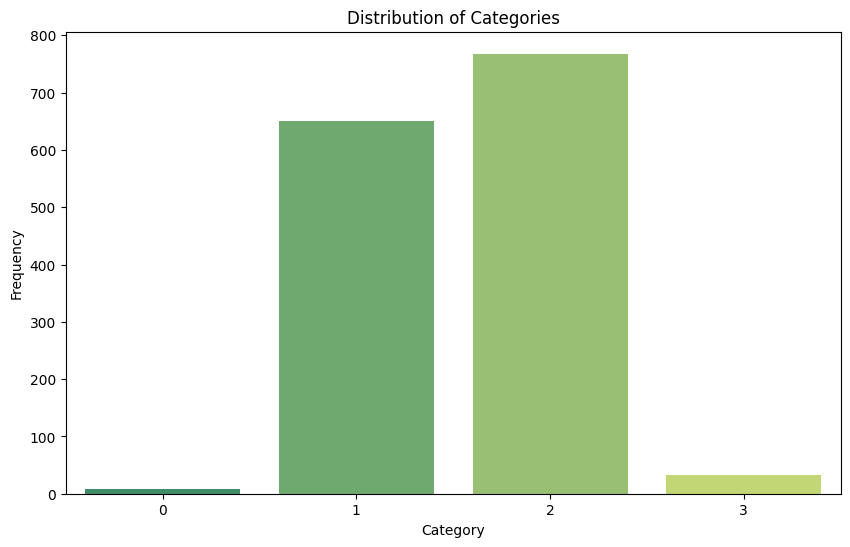

In [77]:
column = df['FullBath']


category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

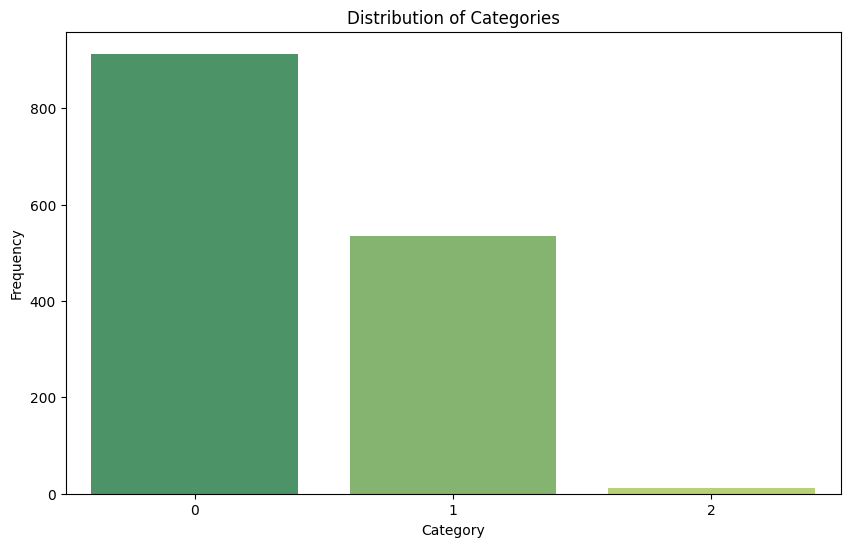

In [78]:
column = df['HalfBath']


category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

Molt important aquesta variable. En models simples es pot fer una suma dels lavabos.

Habitacions

Bedroom: Bedrooms above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)


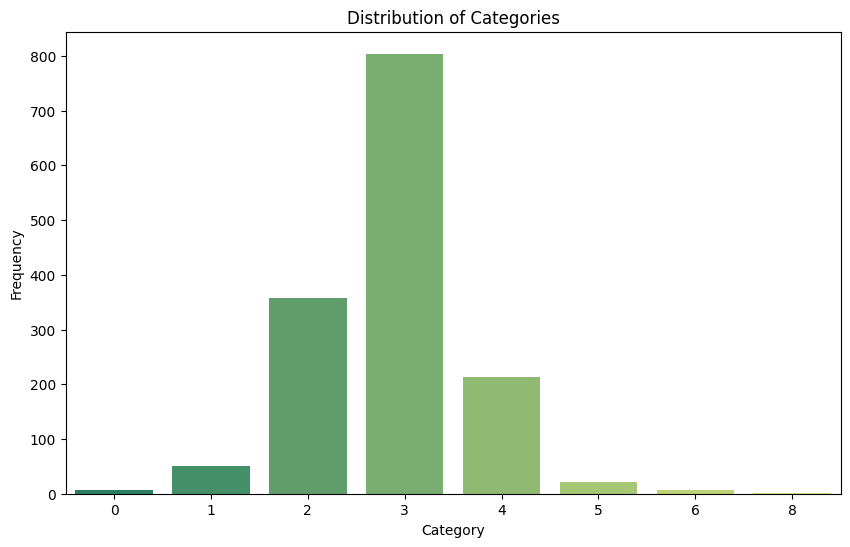

In [79]:
column = df['BedroomAbvGr']
category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

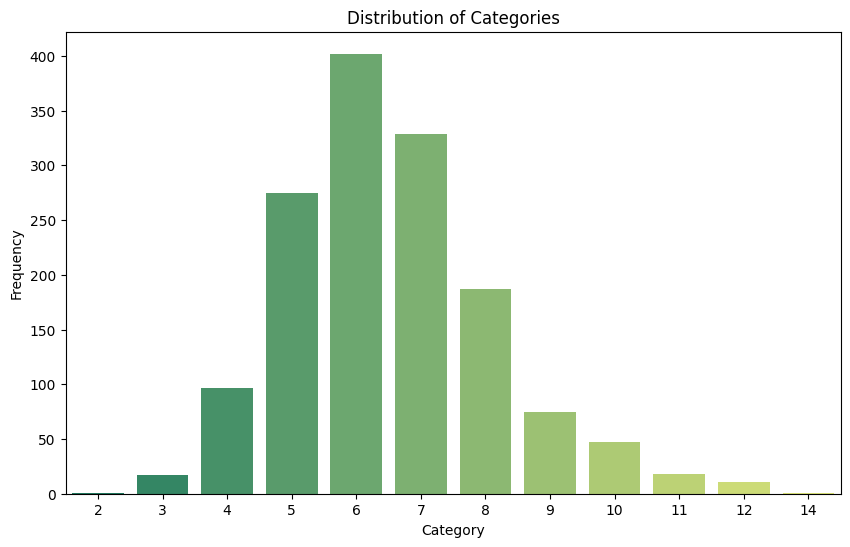

In [80]:
column = df['TotRmsAbvGrd']


category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

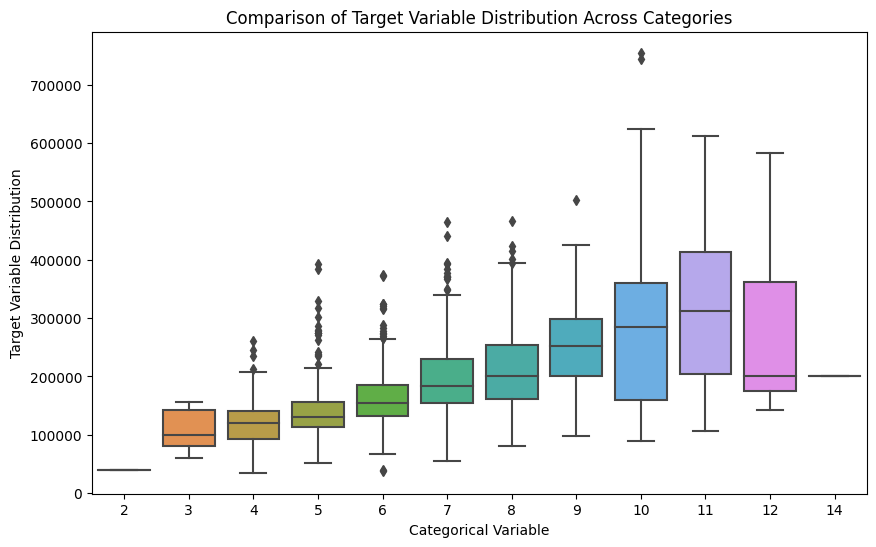

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

Les dues varaibles molt importans.

Cuines

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

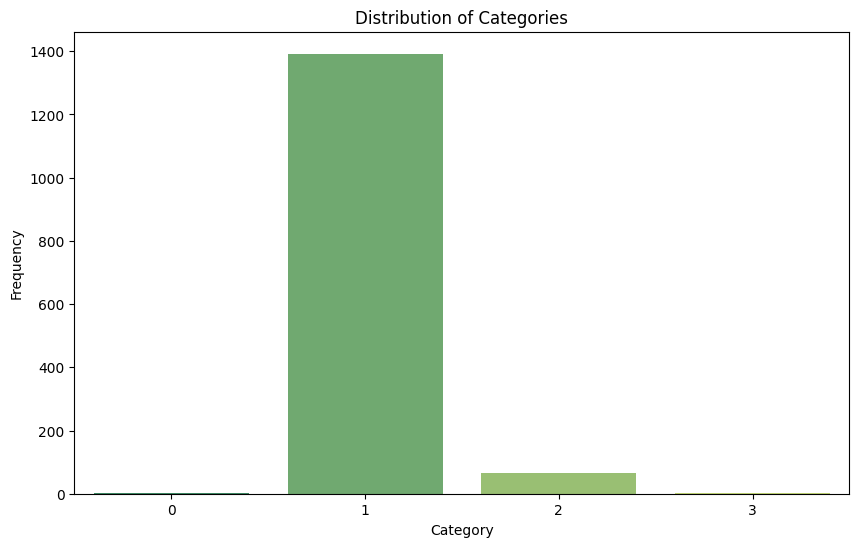

In [82]:
column = df['KitchenAbvGr']


category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

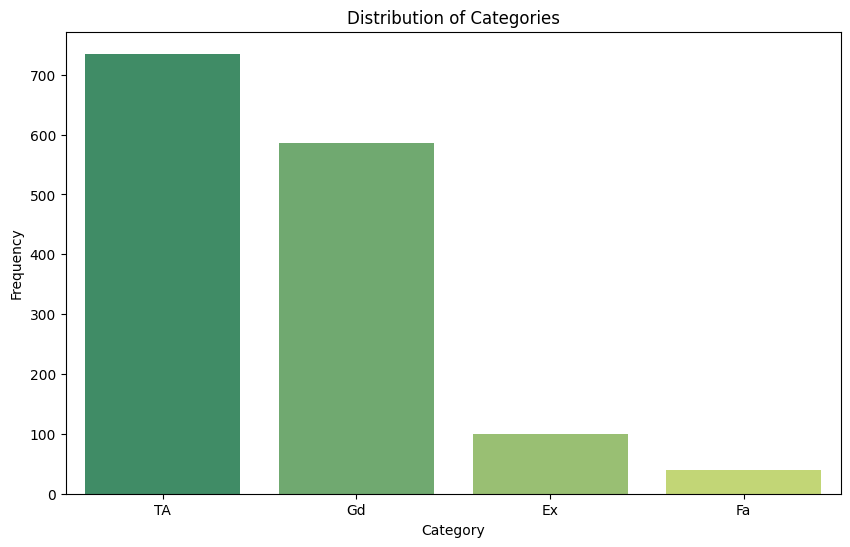

In [83]:
column = df['KitchenQual']


category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

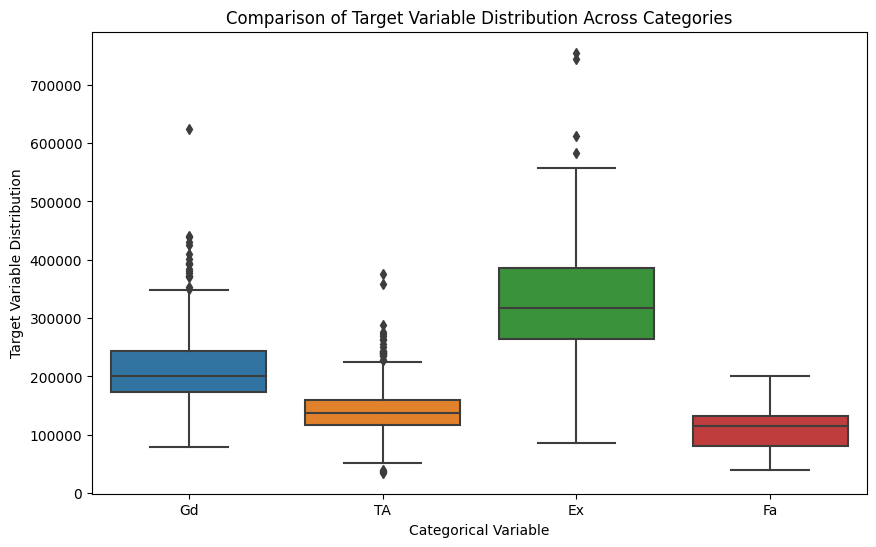

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='KitchenQual', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

En aquest cas el més important és la qualitat de la cuina. La resta és més irrelevant.


Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

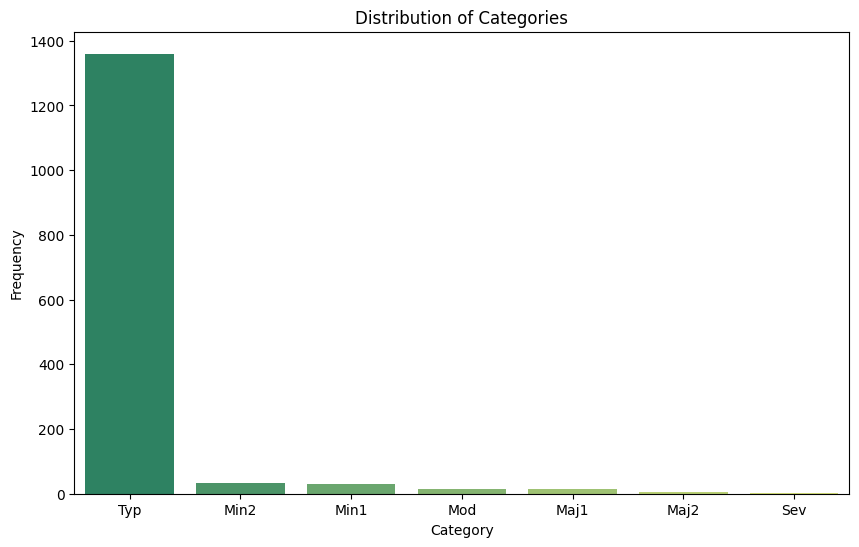

In [85]:
column = df['Functional']

category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

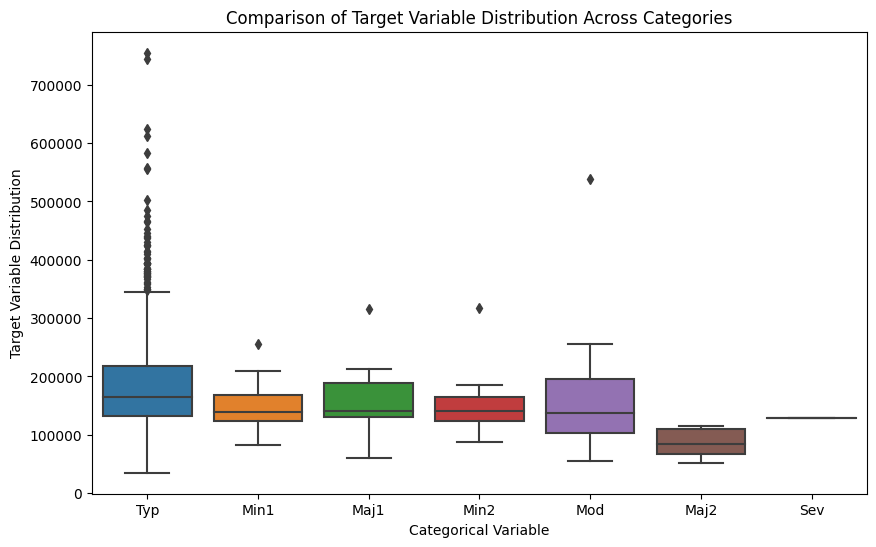

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Functional', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

Pot ser util en models una mica complexos. Ja que si esta amb problemes greus pot ser més barata al necessitar inversió.

Llar de foc

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

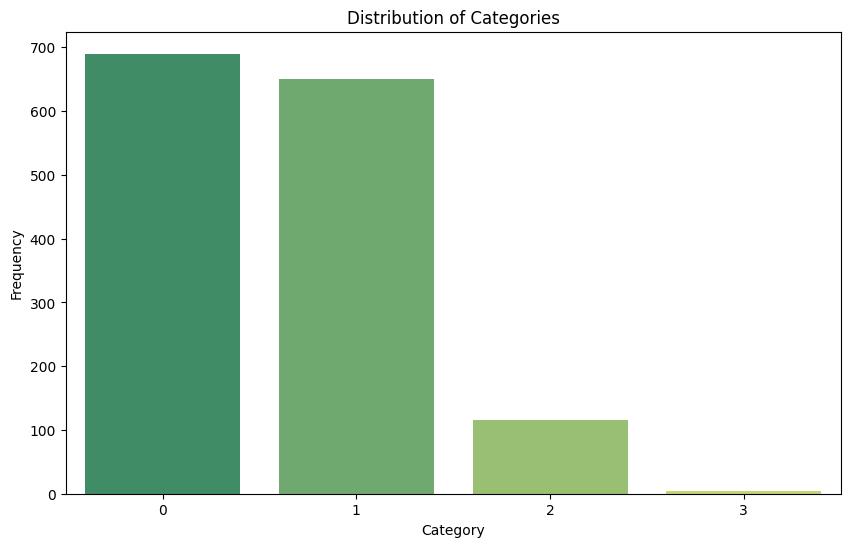

In [87]:
column = df['Fireplaces']

category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

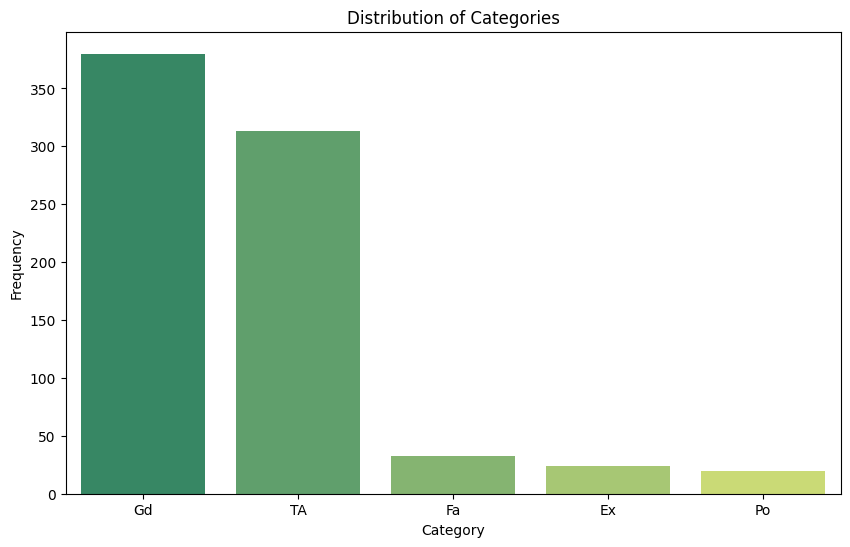

In [88]:
column = df['FireplaceQu']

category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

És interesant en models una mica complexos untilitzar-la com una binaria.

Garatge

GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

PavedDrive: Paved driveway

       Y	Paved
       P	Partial Pavement
       N	Dirt/Gravel


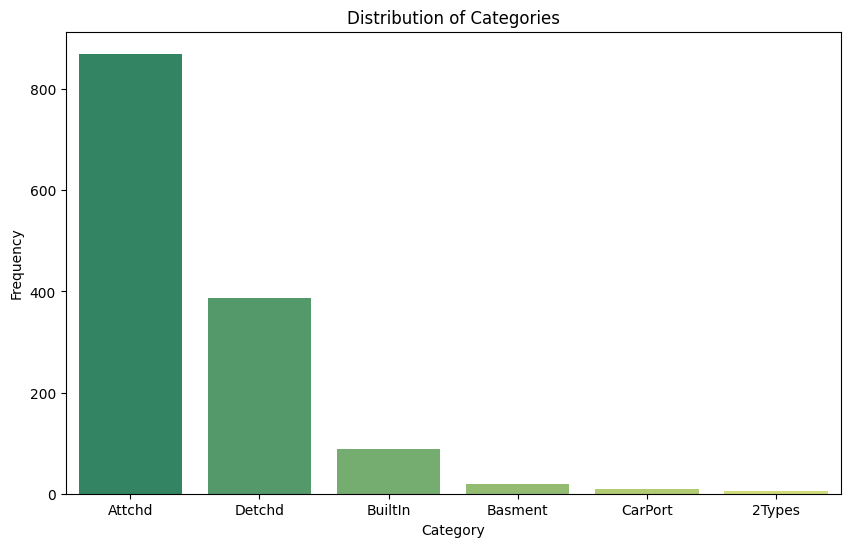

In [89]:
column = df['GarageType']

category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

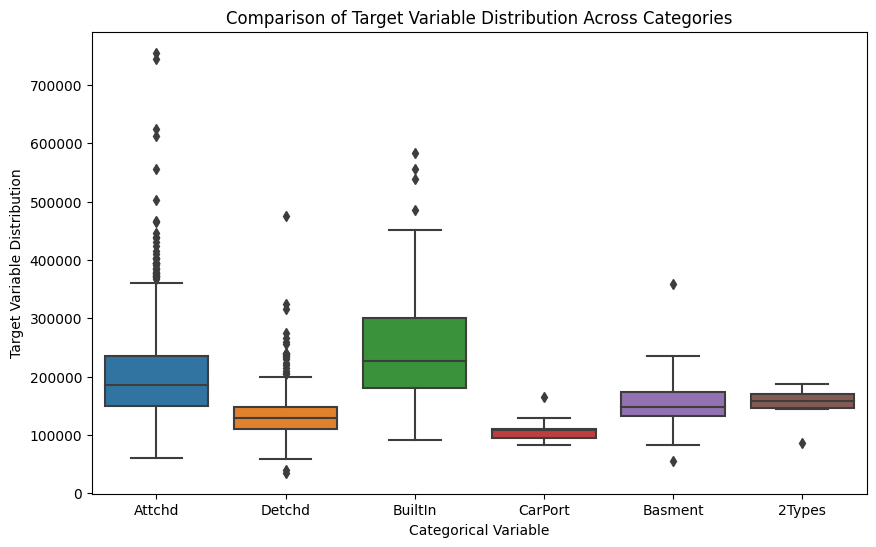

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageType', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

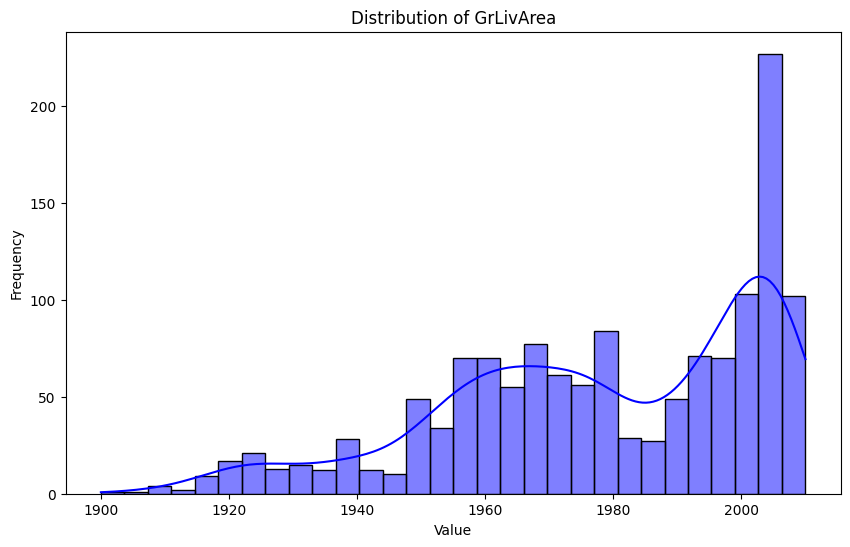

In [91]:
column = df['GarageYrBlt']

plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="blue")
plt.title('Distribution of GrLivArea')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

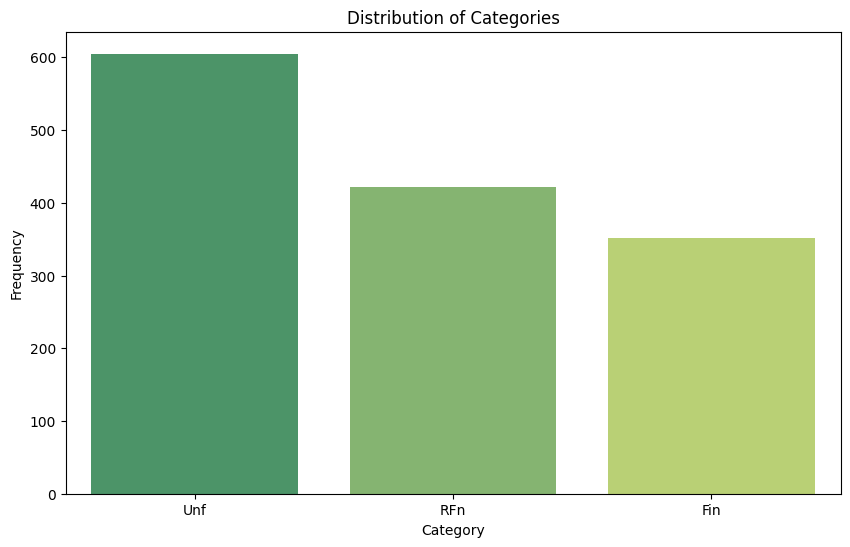

In [92]:

column = df['GarageFinish']

category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

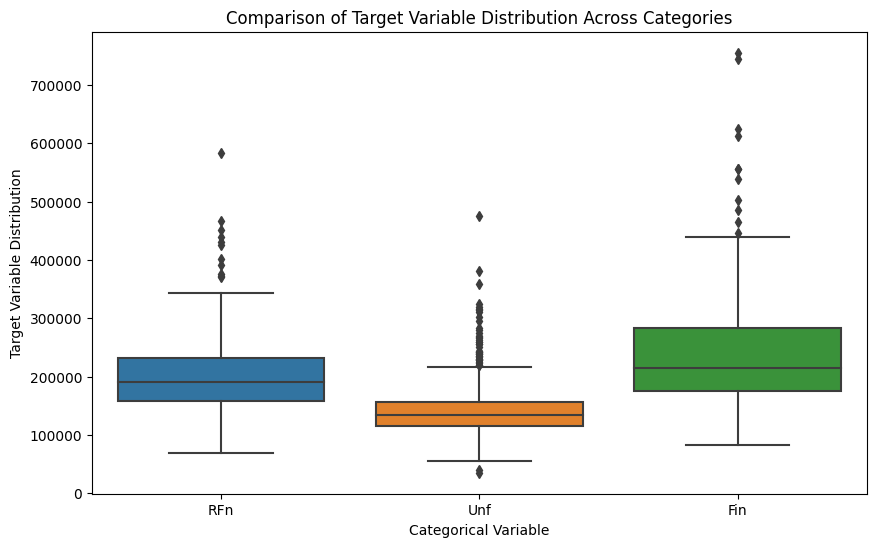

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageFinish', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

De les tres variables la més interessant és la tercera. La primera potser en models complexos. La segona irrelvant

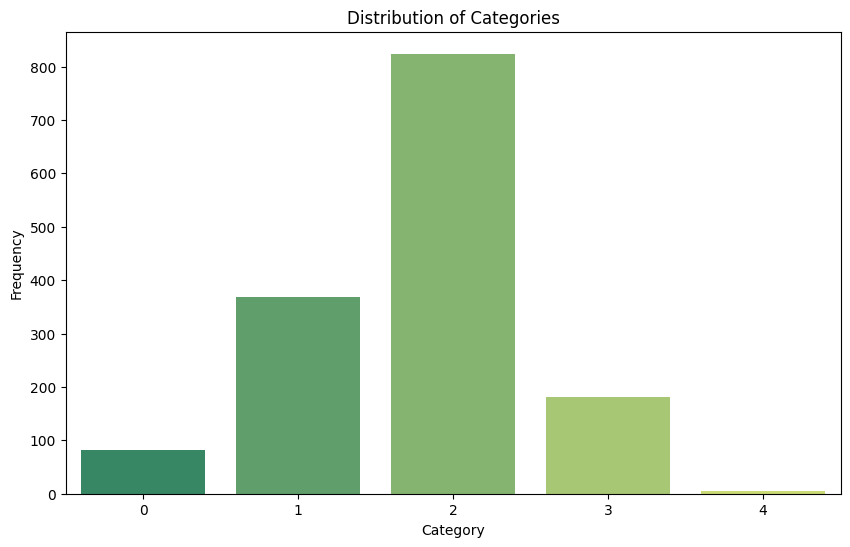

In [94]:
column = df['GarageCars']

category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

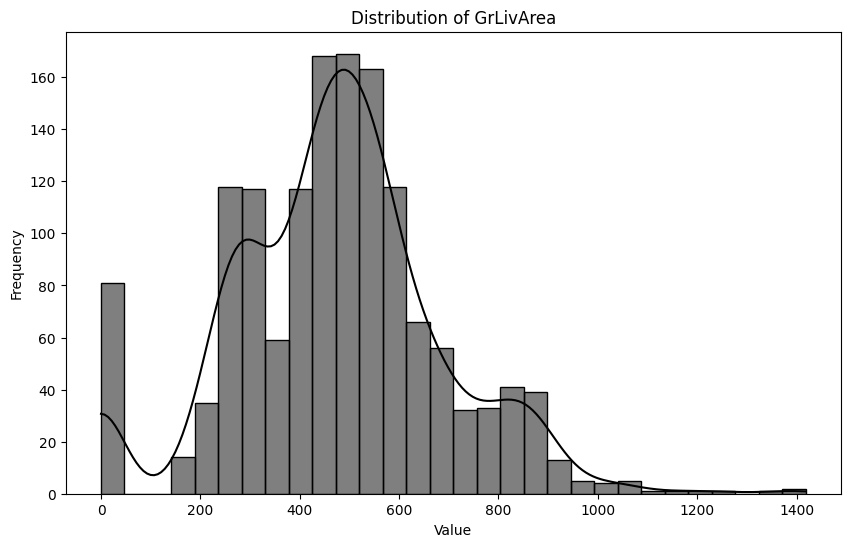

In [95]:
column = df['GarageArea']


plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="black")
plt.title('Distribution of GrLivArea')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Molt interessants les dues variables. El numero de cotxes estara en el model simple.

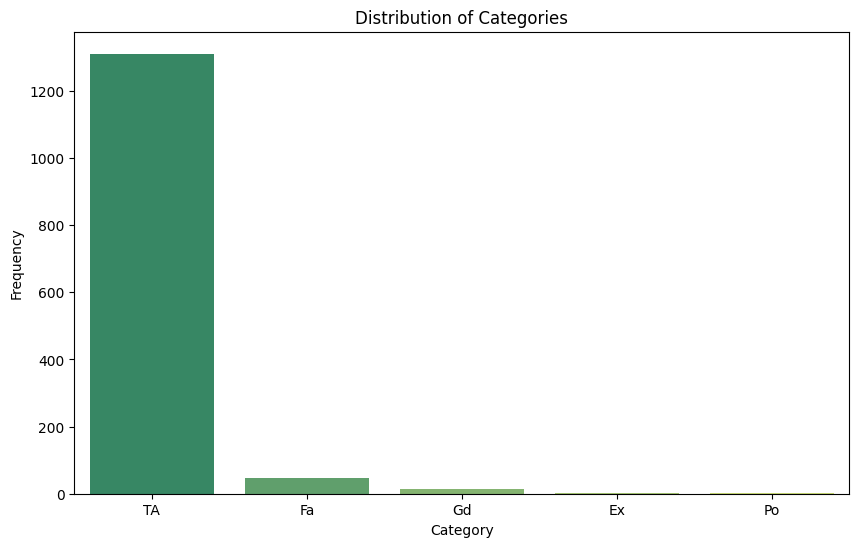

In [96]:
column = df['GarageQual']

category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

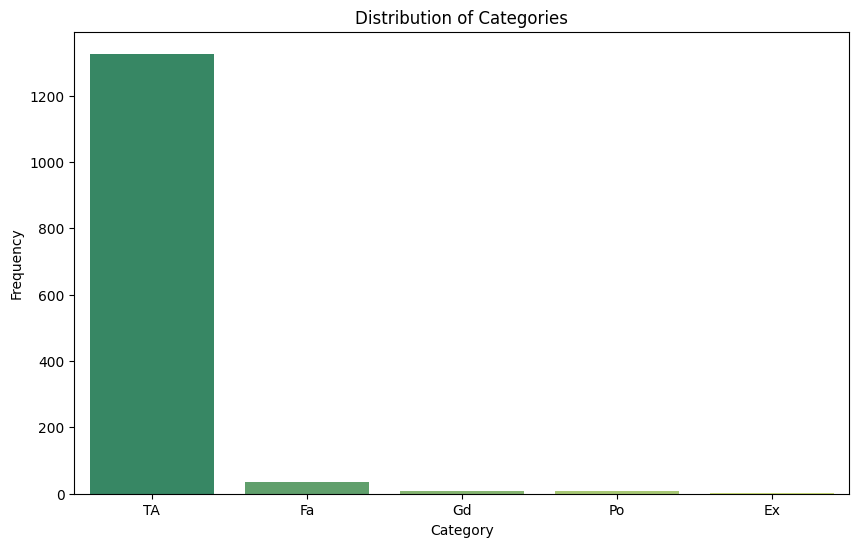

In [97]:
column = df['GarageCond']

category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

Interessant fer una barreja de les dos en models complexos.

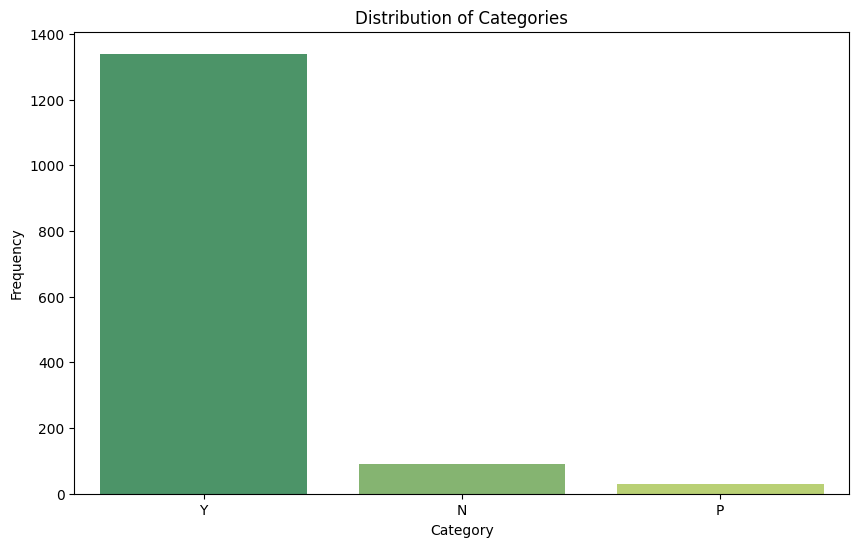

In [98]:
column = df['PavedDrive']

category_counts = column.value_counts()
# Plotting the distribution using a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='summer')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

Pot ser irrellevant

Duperficie de fusta

WoodDeckSF: Wood deck area in square feet


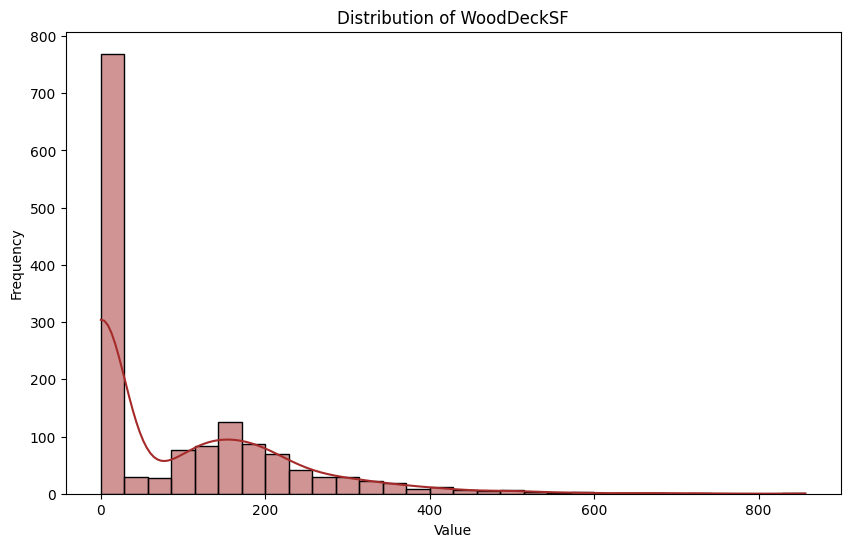

In [99]:
column = df['WoodDeckSF']


plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="brown")
plt.title('Distribution of WoodDeckSF')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Segurament irrellevant, en tot cas interessant la binaria.

Terraça exterior

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

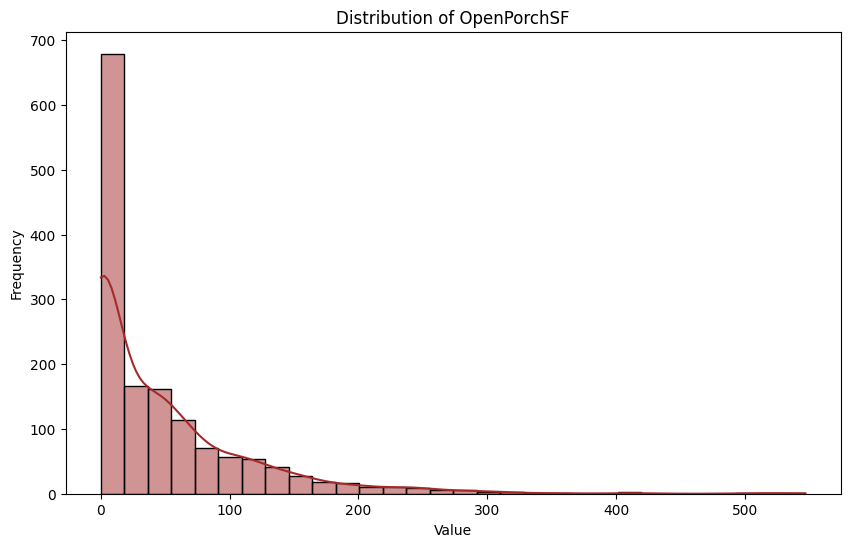

In [100]:
column = df['OpenPorchSF']


plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="brown")
plt.title('Distribution of OpenPorchSF')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

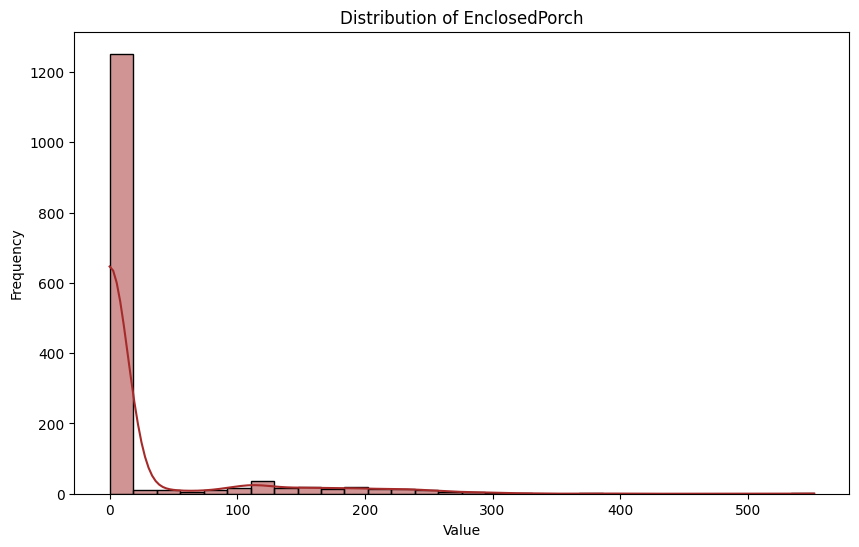

In [101]:
column = df['EnclosedPorch']


plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="brown")
plt.title('Distribution of EnclosedPorch')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

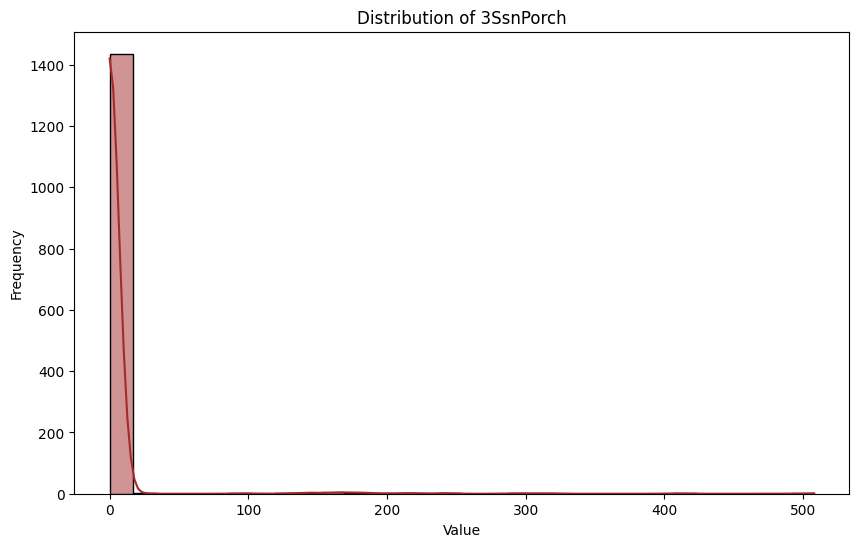

In [102]:
column = df['3SsnPorch']


plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="brown")
plt.title('Distribution of 3SsnPorch')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

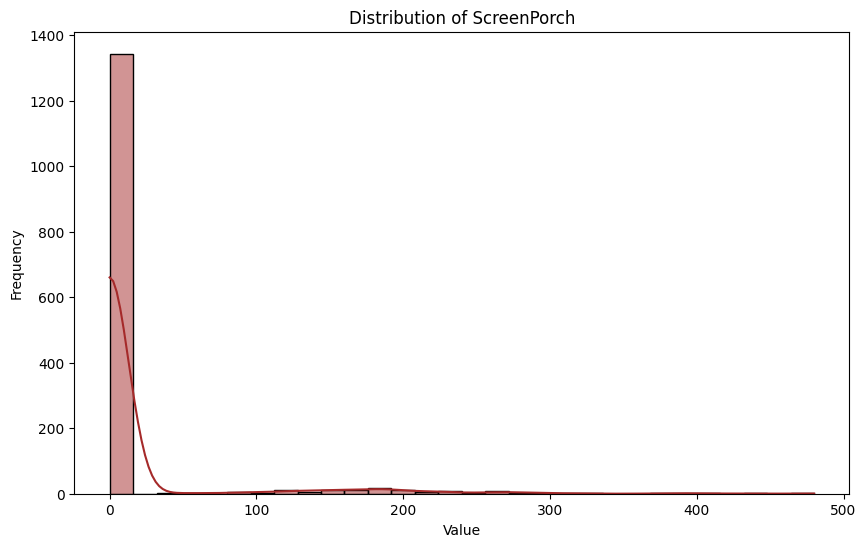

In [103]:
column = df['ScreenPorch']


plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="brown")
plt.title('Distribution of ScreenPorch')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Pot ser interesant en models simples una sola binaria pels 4. En models més complexos una binaria per cada un.

Piscines
PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool


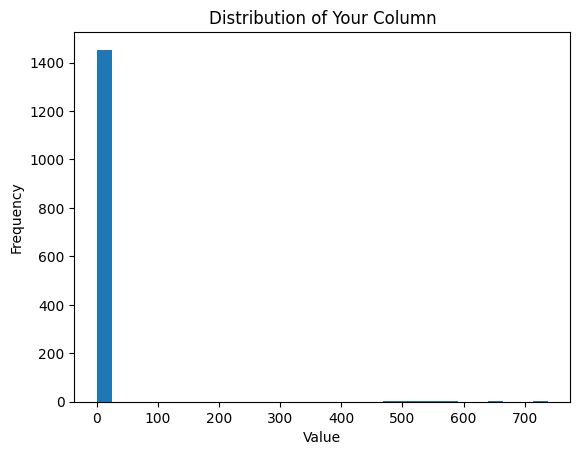

In [104]:
column = df['PoolArea']

# Plot the distribution using a histogram
plt.hist(column, bins=30)
plt.title('Distribution of Your Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


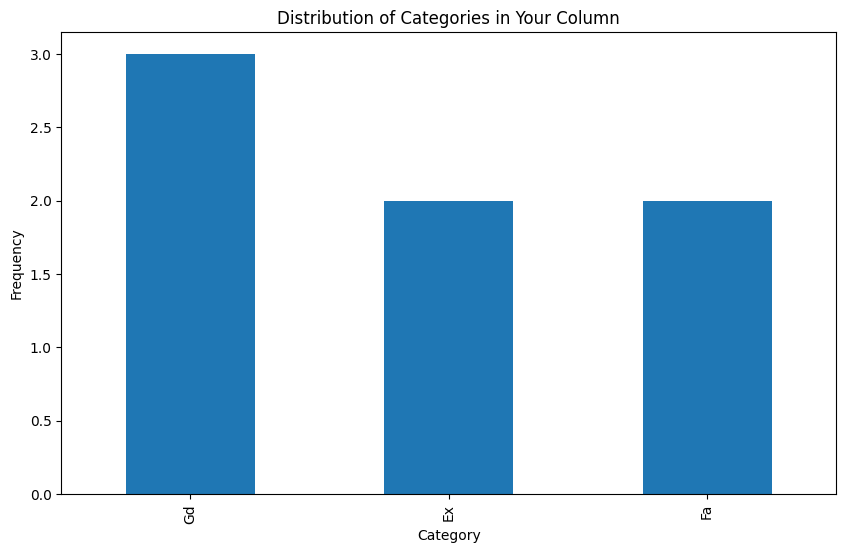

In [105]:
column = df['PoolQC']

# Plot the distribution using a histogram
category_counts = column.value_counts()
print(category_counts)
# Plot the distribution using a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Categories in Your Column')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

Hi ha moltes poques cases amb piscina és una dada irrellevant.

Valla
Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

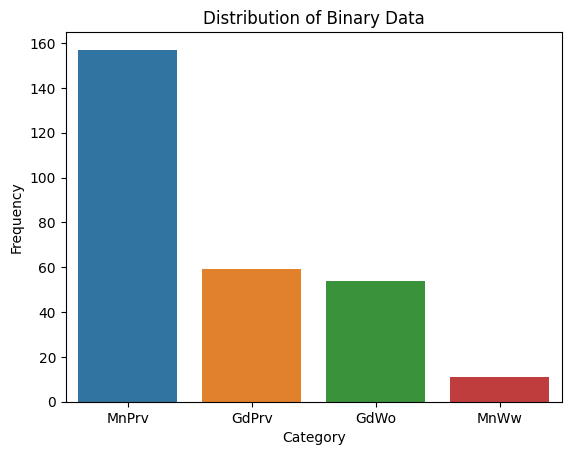

In [106]:
column = df['Fence']

# Plot the distribution using a histogram
category_counts = column.value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Binary Data')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # This ensures the category labels are horizontal
plt.show()

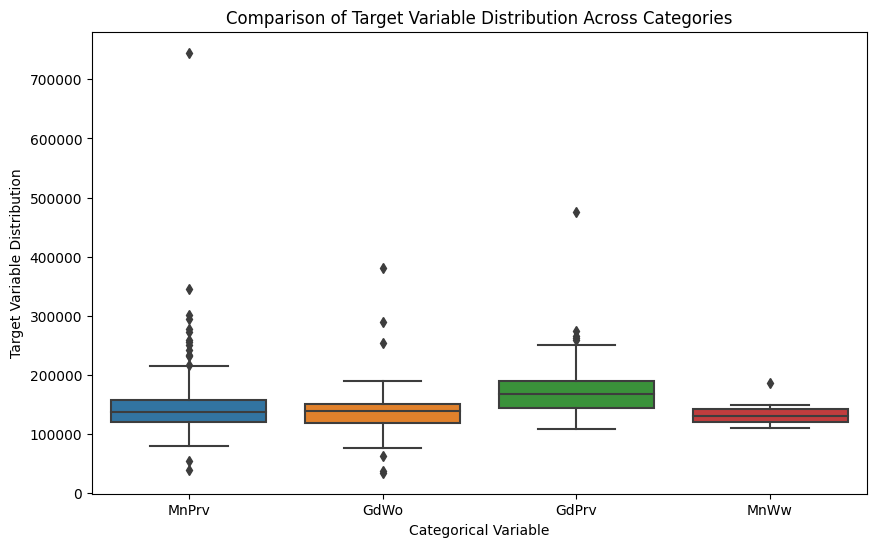

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fence', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

En models molt complexos podem utilitzar-ho

Extres
MiscFeature: Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

MiscVal: $Value of miscellaneous feature

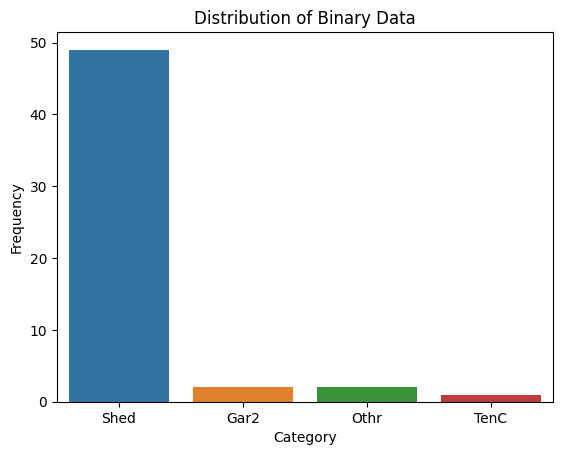

In [108]:
column = df['MiscFeature']

# Plot the distribution using a histogram
category_counts = column.value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Binary Data')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # This ensures the category labels are horizontal
plt.show()

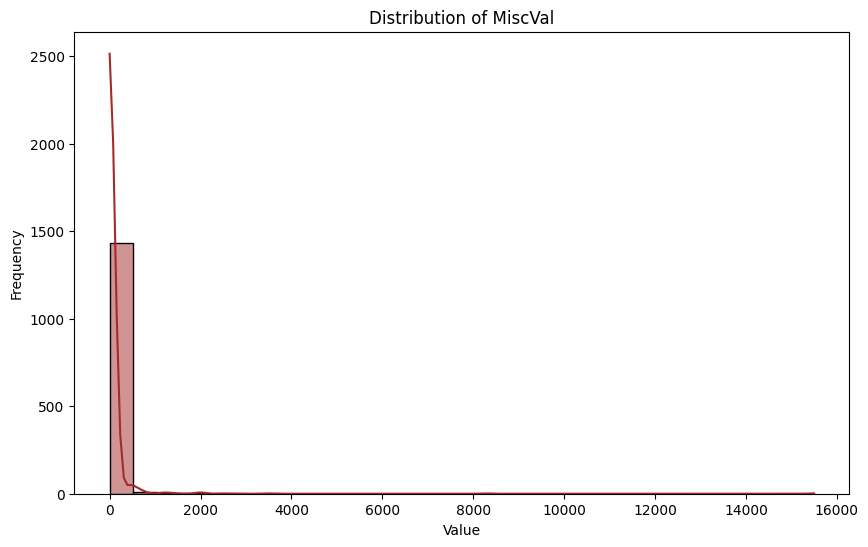

In [109]:
column = df['MiscVal']


plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="brown")
plt.title('Distribution of MiscVal')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

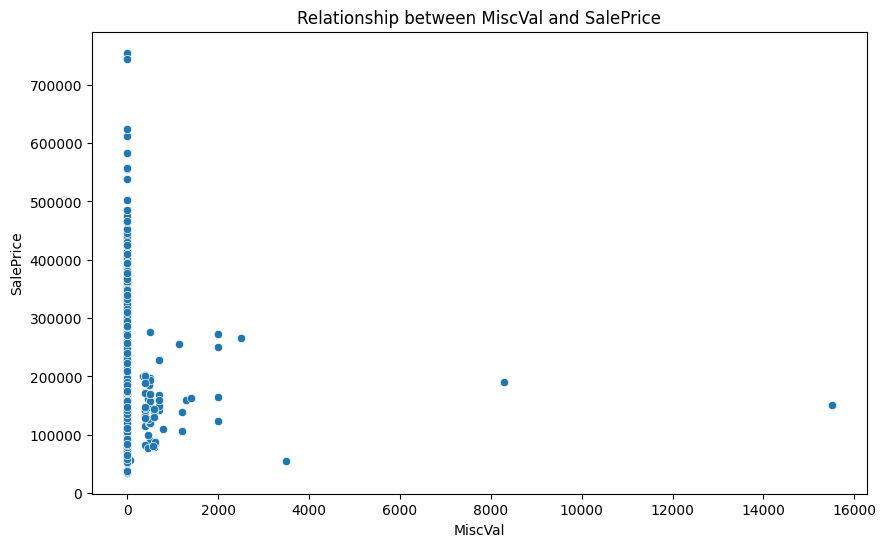

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MiscVal', y='SalePrice', data=df)
plt.title('Relationship between MiscVal and SalePrice')
plt.xlabel('MiscVal')
plt.ylabel('SalePrice')
plt.show()

Irrellevant moltes poques tenen extres. Com a molt una binaria

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

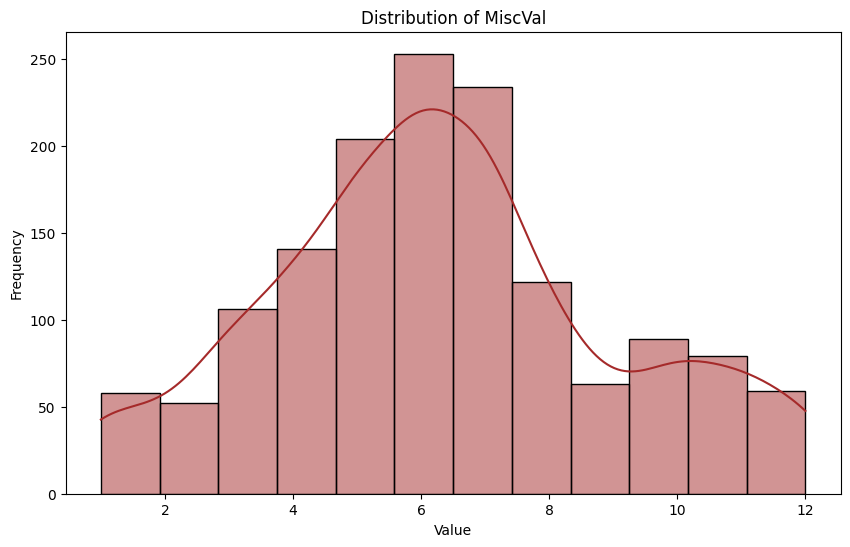

In [111]:
column = df['MoSold']


plt.figure(figsize=(10, 6))
sns.histplot(column, bins=12, kde=True, color="brown")
plt.title('Distribution of MiscVal')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

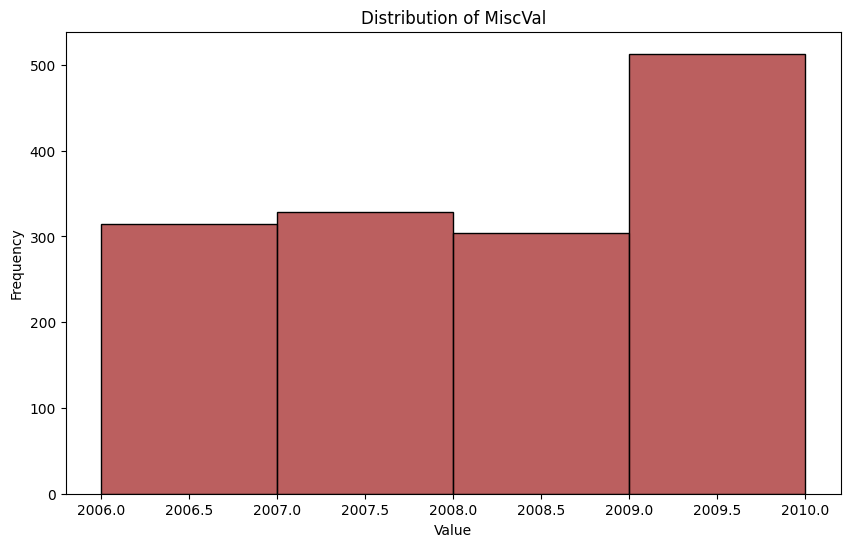

In [112]:
column = df['YrSold']


plt.figure(figsize=(10, 6))
sns.histplot(column, bins=4, color="brown")
plt.title('Distribution of MiscVal')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Important de diverses maneres. En models simpes es pot convertir en una binaria si és post o pre crisis. En models complexes pot ser una data continua on el 0 serà la caiguda de Lehman Brothers

Provem si les cases estan venudes abans de la crisi o no

In [113]:
def pre_or_post_2008(row):
    if (row['YrSold'] < 2008) or (row['YrSold'] == 2008 and row['MoSold'] < 9):
        return '0'
    else:
        return '1'

# Apply the function to each row
df['post_crisis'] = df.apply(pre_or_post_2008, axis=1)
df.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   
20  21          60       RL        101.0    14215   Pave   NaN      IR1   
21  22          45       RM         57.0     7449   Pave  Grvl      Reg   
22  23          20       RL         75.0     9742   Pave   NaN      Reg   
23  24         120       RM         44.0     4224   Pave   NaN      Reg   
24  25          20       RL          NaN     8246   Pave   NaN      IR1   
25  26          20       RL        110.0    14230   Pave   NaN      Reg   
26  27          20       RL         60.0     7200   Pave   NaN      Reg   
27  28          20       RL         98.0    11478   Pave   NaN      Reg   
28  29          20       RL         47.0    16321   Pave   NaN      IR1   
29  30          30       RM         60.0     6324   Pave   NaN      IR1   
30  31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31  32          20       RL          NaN     8544   Pave   NaN      IR1   
32  33          20       RL         85.0    11049   Pave   NaN      Reg   
33  34          20       RL         70.0    10552   Pave   NaN      IR1   
34  35         120       RL         60.0     7313   Pave   NaN      Reg   
35  36          60       RL        108.0    13418   Pave   NaN      Reg   
36  37          20       RL        112.0    10859   Pave   NaN      Reg   
37  38          20       RL         74.0     8532   Pave   NaN      Reg   
38  39          20       RL         68.0     7922   Pave   NaN      Reg   
39  40          90       RL         65.0     6040   Pave   NaN      Reg   
40  41          20       RL         84.0     8658   Pave   NaN      Reg   
41  42          20       RL        115.0    16905   Pave   NaN      Reg   
42  43          85       RL          NaN     9180   Pave   NaN      IR1   
43  44          20       RL          NaN     9200   Pave   NaN      IR1   
44  45          20       RL         70.0     7945   Pave   NaN      Reg   
45  46         120       RL         61.0     7658   Pave   NaN      Reg   
46  47          50       RL         48.0    12822   Pave   NaN      IR1   
47  48          20       FV         84.0    11096   Pave   NaN      Reg   
48  49         190       RM         33.0     4456   Pave   NaN      Reg   
49  50          20       RL         66.0     7742   Pave   NaN      Reg   

   LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold YrSold  \
0          Lvl    AllPub  ...    NaN    NaN         NaN       0      2   2008   
1          Lvl  

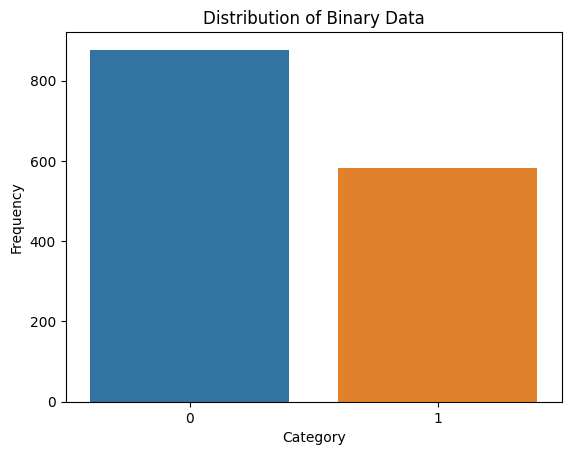

In [114]:
binary_counts = df['post_crisis'].value_counts()

sns.barplot(x=binary_counts.index, y=binary_counts.values)
plt.title('Distribution of Binary Data')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # This ensures the category labels are horizontal
plt.show()

Venta

SaleType: Type of sale

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

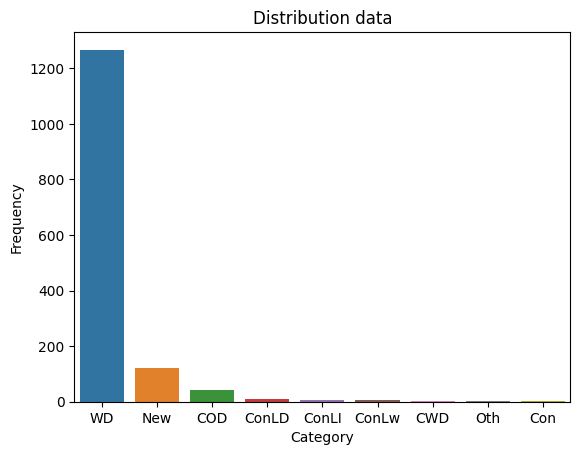

In [115]:
column = df['SaleType']

# Plot the distribution using a histogram
category_counts = column.value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution data')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # This ensures the category labels are horizontal
plt.show()

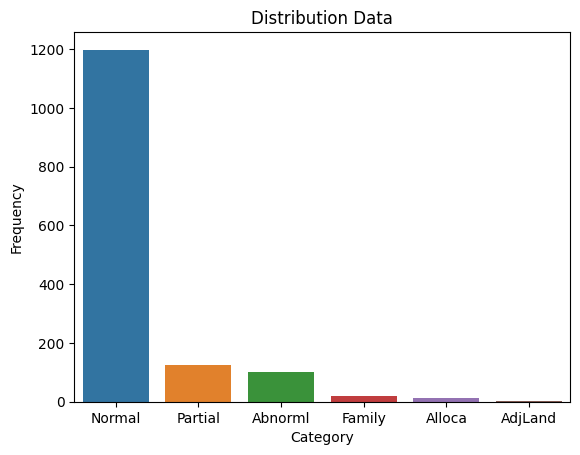

In [116]:
column = df['SaleCondition']

# Plot the distribution using a histogram
category_counts = column.value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution Data')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # This ensures the category labels are horizontal
plt.show()

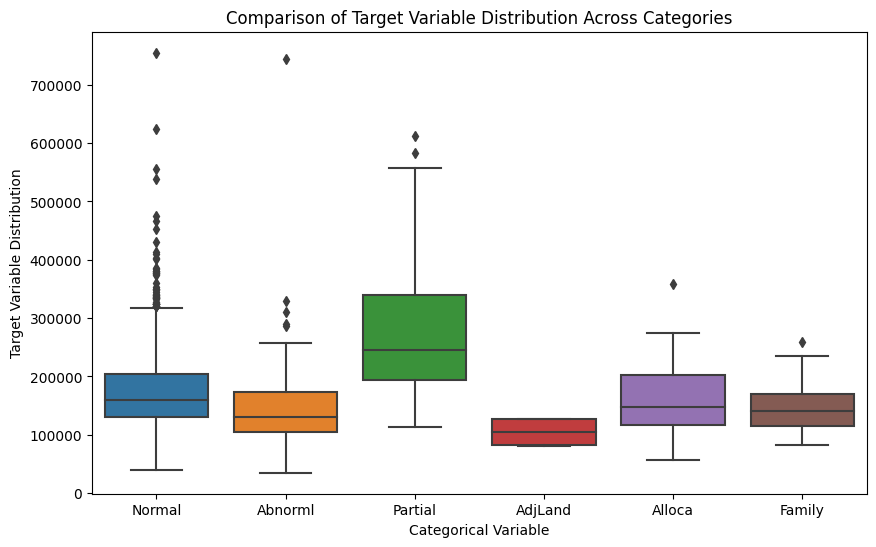

In [117]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SaleCondition', y='SalePrice', data=df)
plt.title('Comparison of Target Variable Distribution Across Categories')
plt.xlabel('Categorical Variable')
plt.ylabel('Target Variable Distribution')
plt.show()

Segurament irrellevant

Variable target: SalePrice

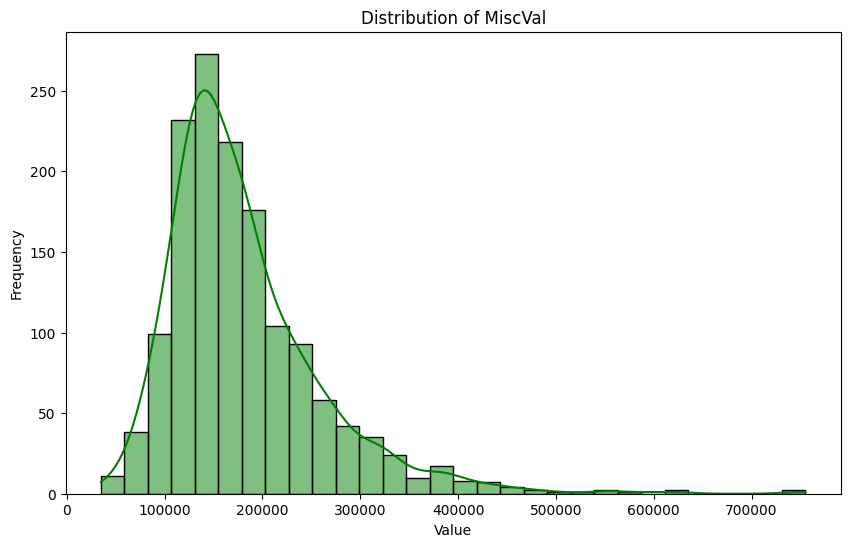

In [118]:
column = df['SalePrice']


plt.figure(figsize=(10, 6))
sns.histplot(column, bins=30, kde=True, color="green")
plt.title('Distribution of MiscVal')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Split train test

In [119]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(df.drop('SalePrice',axis=1),
                                                    df['SalePrice'], test_size=0.20,
                                                    random_state=111)

## Model 1

Model 1:
Ara anem a crear un dataset simple amb les columnes:
- LotArea
-OverallQual+OverallCond
-Any construit/any remodelat
-GrLivArea
-Lavabos: Tota la suma junta
	-FullBath
	-HalfBath
-BedroomAbvGr
-KitchenQual
-TotRmsAbvGrd
-GarageCars
-Abans o desrpres de la crisis(binaria)


In [434]:

columnas_seleccionadas =['LotArea','GrLivArea','BedroomAbvGr','KitchenQual','TotRmsAbvGrd','GarageCars']
X_train = X[columnas_seleccionadas]
y_train=y.copy()


In [435]:
## Crem una variable que anomenrarem varaible global
X_train['Overall_Cal'] = X['OverallQual'] + X['OverallCond']
## Data de la ultima modificacio
X_train['Last_mod'] = X[['YearBuilt', 'YearRemodAdd']].max(axis=1)
X_train['Total_bath'] = X['FullBath'] + 0.5*X['HalfBath']
## Funcio per crear si és posterior a 2006
def pre_or_post_2008(row):
    if (row['YrSold'] < 2008) or (row['YrSold'] == 2008 and row['MoSold'] < 9):
        return '0'
    else:
        return '1'

# Apply the function to each row
X_train['post_crisis'] = X.apply(pre_or_post_2008, axis=1)

X_train.head(10)

<ipython-input-435-bad424828913>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Overall_Cal'] = X['OverallQual'] + X['OverallCond']
<ipython-input-435-bad424828913>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Last_mod'] = X[['YearBuilt', 'YearRemodAdd']].max(axis=1)
<ipython-input-435-bad424828913>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

LotArea  GrLivArea  BedroomAbvGr KitchenQual  TotRmsAbvGrd  GarageCars  \
632     11900       1411             3          TA             6           2   
1131    10712        974             3          TA             5           0   
789     12205       2087             5          Gd             9           2   
572     13159       1692             3          Gd             6           2   
1349     5250       2358             4          TA             8           0   
323      5820       1163             3          TA             6           1   
730      5389       1616             2          Gd             5           2   
619     12244       2262             4          Gd            10           3   
941      8755       2060             3          Gd             8           2   
41      16905       1328             2          TA             5           1   

      Overall_Cal  Last_mod  Total_bath post_crisis  
632            12      1977         2.0           1  
1131           10      1992         1.0           0  
789            14      2007         2.5           0  
572            12      2009         2.5           1  
1349           13      1987         2.0           1  
323            11      2005         1.0           0  
730            13      1996         2.0           1  
619            13      2003         2.5           0  
941            12      1999         2.5           1  
41             11      1959         1.5           0

In [436]:
def get_percentage_nan_per_column(df):
  #retorna un df amb el % de nans de cada columna
  return df.isna().sum().sort_values()/len(df)*100.

percentage_nan = get_percentage_nan_per_column(X_train)


Com podem veure no tenim nans

In [437]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Seleccionar solo las columnas numéricas
columnas_numericas = X_train.select_dtypes(include=['number']).columns

# Aplicar fit_transform a todas las columnas numéricas
X_train[columnas_numericas] = sc.fit_transform(X_train[columnas_numericas])

# Mostrar las primeras 20 filas
X_train.head()

<ipython-input-437-60bce9d4dcfb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[columnas_numericas] = sc.fit_transform(X_train[columnas_numericas])


LotArea  GrLivArea  BedroomAbvGr KitchenQual  TotRmsAbvGrd  GarageCars  \
632   0.172549  -0.199324      0.155105          TA     -0.326537    0.314642   
1131  0.045094  -1.028073      0.155105          TA     -0.936768   -2.348418   
789   0.205271   1.082677      2.570603          Gd      1.504158    0.314642   
572   0.307621   0.333579      0.155105          Gd     -0.326537    0.314642   
1349 -0.540897   1.596615      1.362854          TA      0.893926   -2.348418   

      Overall_Cal  Last_mod  Total_bath post_crisis  
632      0.183008 -0.381310    0.385525           1  
1131    -1.001223  0.346339   -1.183440           0  
789      1.367239  1.073989    1.170007           0  
572      0.183008  1.171009    1.170007           1  
1349     0.775124  0.103790    0.385525           1

In [438]:
! pip install category-encoders
import category_encoders


In [439]:
from category_encoders.target_encoder import TargetEncoder


oe = TargetEncoder()
X_train['KitchenQual'] = oe.fit_transform(X_train['KitchenQual'],y_train)
X_train.head(20)

<ipython-input-439-d1eb2ffc3743>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['KitchenQual'] = oe.fit_transform(X_train['KitchenQual'],y_train)


LotArea  GrLivArea  BedroomAbvGr    KitchenQual  TotRmsAbvGrd  \
632   0.172549  -0.199324      0.155105  140546.351443     -0.326537   
1131  0.045094  -1.028073      0.155105  140546.351443     -0.936768   
789   0.205271   1.082677      2.570603  211666.646055      1.504158   
572   0.307621   0.333579      0.155105  211666.646055     -0.326537   
1349 -0.540897   1.596615      1.362854  140546.351443      0.893926   
323  -0.479745  -0.669644      0.155105  140546.351443     -0.326537   
730  -0.525985   0.189449     -1.052644  211666.646055     -0.936768   
619   0.209455   1.414556      1.362854  211666.646055      2.114389   
941  -0.164863   1.031473      0.155105  211666.646055      0.893926   
41    0.709511  -0.356729     -1.052644  140546.351443     -0.936768   
1022 -0.091480  -0.508445     -1.052644  140546.351443     -0.326537   
1180  0.094231   1.892462      1.362854  140546.351443      0.893926   
486  -0.000288  -0.840324      0.155105  140546.351443     -0.326537   
1448  0.158280  -0.322593     -1.052644  140546.351443     -0.326537   
58    0.363731   2.709832      0.155105  211666.646055      2.114389   
18    0.365126  -0.762570      0.155105  211666.646055     -0.326537   
175   0.249258   1.217325      1.362854  211666.646055      0.283695   
1380 -0.223119  -1.236683     -1.052644  140546.351443     -0.936768   
893   0.321031  -0.252424      0.155105  140546.351443     -0.326537   
638  -0.162503  -1.365641     -1.052644  140546.351443     -1.546999   

      GarageCars  Overall_Cal  Last_mod  Total_bath post_crisis  
632     0.314642     0.183008 -0.381310    0.385525           1  
1131   -2.348418    -1.001223  0.346339   -1.183440           0  
789     0.314642     1.367239  1.073989    1.170007           0  
572     0.314642     0.183008  1.171009    1.170007           1  
1349   -2.348418     0.775124  0.103790    0.385525           1  
323    -1.016888    -0.409107  0.976969   -1.183440           0  
730     0.314642     0.775124  0.540379    0.385525           1  
619     1.646172     0.775124  0.879949    1.170007           0  
941     0.314642     0.183008  0.685909    1.170007           1  
41     -1.016888    -0.409107 -1.254489   -0.398958           0  
1022   -1.016888    -1.001223 -1.691078   -1.183440           0  
1180    0.314642     0.183008  0.297829    1.170007           0  
486     0.314642     0.183008 -0.963429   -0.398958           0  
1448   -1.016888    -0.409107  0.734419   -0.398958           0  
58      1.646172     1.959355  1.025479    2.738971           0  
18      0.314642    -1.001223  0.928459   -0.398958           0  
175     0.314642     0.775124  0.782929    0.385525           0  
1380   -1.016888    -3.369685 -1.691078   -1.183440           1  
893    -1.016888    -1.001223 -1.497039   -1.183440           0  
638    -2.348418     0.183008 -1.691078   -1.183440           0

Un cop normalitzat intentarem aplicar una regressió.

In [440]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
R_2 = r2_score(y_train, y_pred)
MSE = mean_squared_error(y_train, y_pred)
print("R_2:", R_2)
print("MSE: ",np.sqrt(MSE))

R_2: 0.7538723585868414
MSE:  38612.468976663884


In [441]:
coefficients=model.coef_
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {coefficients[i]}")

LotArea: 7574.236968351038
GrLivArea: 25834.98856516451
BedroomAbvGr: -7329.529421492732
KitchenQual: 0.3949287866598752
TotRmsAbvGrd: 3096.4688403028995
GarageCars: 17858.390718966213
Overall_Cal: 14248.124202664361
Last_mod: 3109.967649308054
Total_bath: 4983.8846236266
post_crisis: -1842.8124953360489


COm podem veure les variables més importants son el area, el ground living area i la qualitat de la casa.

Ens dona una r2

## Model 2

Model 2:
Afegim 'Neighborhood' a les característiques seleccionades, convertim qualificacions categòriques a numèriques per a 'ExterQual' i 'ExterCond', i introduiem noves característiques basades en la presència de soterrani, segon pis, remodelació i proximitat a vies principals, a més d'incloure banys de soterrani en el càlcul total de banys.
En general.
- LotArea
-Neighborhood
-OverallQual
-OverallCond
-Any construit/any remodelat. Binaria si ha estat remodelat
-ExterQual+ExterCond
-Basement: Pot ser binaria
-GrLivArea
-Binaria segon pis
-Lavabos
	-FullBath
	-HalfBath
	-BsmtFullBath
	-BsmtHalfBath
-BedroomAbvGr
-TotRmsAbvGrd
-KitchenQual
-GarageCars
-Abans o desrpres de la ceris(binaria/continua)


In [128]:
columnas_seleccionadas =['LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr','KitchenQual','TotRmsAbvGrd','GarageCars']
X_train = X[columnas_seleccionadas]
y_train=y.copy()

In [129]:
## Crem una variable que anomenrarem varaible global
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
    return map.get(calificacion, 0)
X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
## Data de la ultima modificacio
X_train['Last_mod'] = X[['YearBuilt', 'YearRemodAdd']].max(axis=1)
X_train['Total_bath'] = X['FullBath'] + 0.5*X['HalfBath']+X['BsmtFullBath'] + 0.5*X['BsmtHalfBath']

## Funcio per crear si és posterior a 2008
def pre_or_post_2008(row):
    if (row['YrSold'] < 2008) or (row['YrSold'] == 2008 and row['MoSold'] < 9):
        return '0'
    else:
        return '1'
X_train['BSMT'] = (X['TotalBsmtSF'] > 0).astype(int)
X_train['second_floor'] = (X['2ndFlrSF'] > 0).astype(int)
X_train['Remodelado'] = (X['YearRemodAdd'] > X['YearBuilt']).astype(int)

def main_road(row):
    if (row['Condition1'] == 'Artery' or row['Condition2'] == 'Artery'):
        return '1'
    else:
        return '0'

# Apply the function to each row
X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)
X_train['main_road'] = X.apply(main_road, axis=1)


<ipython-input-129-a0388870a58f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-129-a0388870a58f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Last_mod'] = X[['YearBuilt', 'YearRemodAdd']].max(axis=1)
<ipython-input-129-a0388870a58f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [130]:
X_train.head(50)

LotArea Neighborhood  OverallQual  OverallCond  GrLivArea  BedroomAbvGr  \
632     11900       NWAmes            7            5       1411             3   
1131    10712      Mitchel            5            5        974             3   
789     12205      ClearCr            6            8       2087             5   
572     13159       Timber            7            5       1692             3   
1349     5250      OldTown            8            5       2358             4   
323      5820      OldTown            3            8       1163             3   
730      5389      StoneBr            8            5       1616             2   
619     12244       Timber            8            5       2262             4   
941      8755      Gilbert            7            5       2060             3   
41      16905       Timber            5            6       1328             2   
1022     9439      OldTown            5            5       1248             2   
1180    11170       Timber            7            5       2514             4   
486     10289        NAmes            5            7       1073             3   
1448    11767      Edwards            4            7       1346             2   
58      13682      StoneBr           10            5       2945             3   
18      13695      SawyerW            5            5       1114             3   
175     12615      Edwards            6            7       2158             4   
1380     8212      Edwards            3            3        864             2   
893     13284       Sawyer            5            5       1383             3   
638      8777      Edwards            5            7        796             2   
188      7018      SawyerW            5            5       1224             2   
22       9742      CollgCr            8            5       1795             3   
470      6820      StoneBr            8            5       1502             1   
779     10530      Mitchel            6            5       1004             2   
813      9750        NAmes            6            6       1442             4   
1394     4045      Blmngtn            7            5       1500             2   
1421     4043      NPkVill            6            5       1069             2   
320     16259      NridgHt            9            5       2596             4   
1120     8263       IDOTRR            6            5       1012             2   
1361    16158      StoneBr            7            5       1530             3   
674      9200        NAmes            6            6       1136             3   
688      8089      StoneBr            8            6       1419             2   
106     10800      OldTown            4            7       1047             2   
654     10437      NoRidge            8            6       2113             2   
1240     8158      CollgCr            7            5       1768             3   
1376     6292        SWISU            6            5        790             2   
534      9056      Gilbert            8            5       1414             3   
1411     9600        NAmes            6            8       1668             3   
125      6780       IDOTRR            6            8        754             2   
803     13891      NridgHt            9            5       2822             4   
668     14175       Sawyer            5            6       1437             3   
661     46589      NoRidge            8            7       2448             4   
622      7064       Sawyer            5            6        980             3   
463     11988      Crawfor            6            7       1660             3   
410      9571      Edwards            5            3       1276             3   
246      9142      OldTown            6            8       1928             4   
126      4928      NPkVill            6            5        958             2   
348      2448      NridgHt            7            5       1626             2   
119      8461      CollgCr           

In [131]:
def get_percentage_nan_per_column(df):
  #retorna un df amb el % de nans de cada columna
  return df.isna().sum().sort_values()/len(df)*100.

percentage_nan = get_percentage_nan_per_column(X_train)
percentage_nan

LotArea             0.0
Remodelado          0.0
second_floor        0.0
BSMT                0.0
Total_bath          0.0
Last_mod            0.0
Ext_Cal             0.0
pre_or_post_2008    0.0
GarageCars          0.0
KitchenQual         0.0
BedroomAbvGr        0.0
GrLivArea           0.0
OverallCond         0.0
OverallQual         0.0
Neighborhood        0.0
TotRmsAbvGrd        0.0
main_road           0.0
dtype: float64

In [132]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Seleccionar solo las columnas numéricas
columnas_numericas = X_train.select_dtypes(include=['number']).columns

# Aplicar fit_transform a todas las columnas numéricas
X_train[columnas_numericas] = sc.fit_transform(X_train[columnas_numericas])

# Mostrar las primeras 20 filas
X_train.head()

<ipython-input-132-60bce9d4dcfb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[columnas_numericas] = sc.fit_transform(X_train[columnas_numericas])


LotArea Neighborhood  OverallQual  OverallCond  GrLivArea  \
632   0.172549       NWAmes     0.643833    -0.519203  -0.199324   
1131  0.045094      Mitchel    -0.802315    -0.519203  -1.028073   
789   0.205271      ClearCr    -0.079241     2.160160   1.082677   
572   0.307621       Timber     0.643833    -0.519203   0.333579   
1349 -0.540897      OldTown     1.366906    -0.519203   1.596615   

      BedroomAbvGr KitchenQual  TotRmsAbvGrd  GarageCars   Ext_Cal  Last_mod  \
632       0.155105          TA     -0.326537    0.314642  0.762865 -0.381310   
1131      0.155105          TA     -0.936768   -2.348418 -0.697834  0.346339   
789       2.570603          Gd      1.504158    0.314642 -0.697834  1.073989   
572       0.155105          Gd     -0.326537    0.314642 -0.697834  1.171009   
1349      1.362854          TA      0.893926   -2.348418  0.762865  0.103790   

      Total_bath      BSMT  second_floor  Remodelado pre_or_post_2008  \
632    -0.257741  0.159565     -0.871227   -0.954788                1   
1131   -1.533343  0.159565     -0.871227    1.047353                0   
789     0.380059  0.159565      1.147807    1.047353                0   
572     0.380059  0.159565      1.147807   -0.954788                1   
1349   -0.257741  0.159565      1.147807    1.047353                1   

     main_road  
632          0  
1131         0  
789          0  
572          0  
1349         0

In [133]:
from category_encoders.target_encoder import TargetEncoder


oe = TargetEncoder()
X_train[['KitchenQual', 'Neighborhood']] = oe.fit_transform(X_train[['KitchenQual', 'Neighborhood']], y_train)
X_train.head(20)

<ipython-input-133-7ed80b030ed1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['KitchenQual', 'Neighborhood']] = oe.fit_transform(X_train[['KitchenQual', 'Neighborhood']], y_train)


LotArea   Neighborhood  OverallQual  OverallCond  GrLivArea  \
632   0.172549  189889.709751     0.643833    -0.519203  -0.199324   
1131  0.045094  157116.500592    -0.802315    -0.519203  -1.028073   
789   0.205271  194418.977740    -0.079241     2.160160   1.082677   
572   0.307621  222696.057511     0.643833    -0.519203   0.333579   
1349 -0.540897  124206.250906     1.366906    -0.519203   1.596615   
323  -0.479745  124206.250906    -2.248462     2.160160  -0.669644   
730  -0.525985  253442.416217     1.366906    -0.519203   0.189449   
619   0.209455  222696.057511     1.366906    -0.519203   1.414556   
941  -0.164863  192535.205582     0.643833    -0.519203   1.031473   
41    0.709511  222696.057511    -0.802315     0.373918  -0.356729   
1022 -0.091480  124206.250906    -0.802315    -0.519203  -0.508445   
1180  0.094231  222696.057511     0.643833    -0.519203   1.892462   
486  -0.000288  146900.721198    -0.802315     1.267039  -0.840324   
1448  0.158280  130392.475863    -1.525388     1.267039  -0.322593   
58    0.363731  253442.416217     2.813053    -0.519203   2.709832   
18    0.365126  185684.413246    -0.802315    -0.519203  -0.762570   
175   0.249258  130392.475863    -0.079241     1.267039   1.217325   
1380 -0.223119  130392.475863    -2.248462    -2.305445  -1.236683   
893   0.321031  139567.725277    -0.802315    -0.519203  -0.252424   
638  -0.162503  130392.475863    -0.802315     1.267039  -1.365641   

      BedroomAbvGr    KitchenQual  TotRmsAbvGrd  GarageCars   Ext_Cal  \
632       0.155105  140546.351443     -0.326537    0.314642  0.762865   
1131      0.155105  140546.351443     -0.936768   -2.348418 -0.697834   
789       2.570603  211666.646055      1.504158    0.314642 -0.697834   
572       0.155105  211666.646055     -0.326537    0.314642 -0.697834   
1349      1.362854  140546.351443      0.893926   -2.348418  0.762865   
323       0.155105  140546.351443     -0.326537   -1.016888  0.762865   
730      -1.052644  211666.646055     -0.936768    0.314642  0.762865   
619       1.362854  211666.646055      2.114389    1.646172  0.762865   
941       0.155105  211666.646055      0.893926    0.314642  0.762865   
41       -1.052644  140546.351443     -0.936768   -1.016888  0.762865   
1022     -1.052644  140546.351443     -0.326537   -1.016888 -0.697834   
1180      1.362854  140546.351443      0.893926    0.314642 -0.697834   
486       0.155105  140546.351443     -0.326537    0.314642 -0.697834   
1448     -1.052644  140546.351443     -0.326537   -1.016888 -0.697834   
58        0.155105  211666.646055      2.114389    1.646172  2.223563   
18        0.155105  211666.646055     -0.326537    0.314642 -0.697834   
175       1.362854  211666.646055      0.283695    0.314642 -0.697834   
1380     -1.052644  140546.351443     -0.936768   -1.016888 -2.158532   
893       0.155105  140546.351443     -0.326537   -1.016888 -0.697834   
638      -1.052644  140546.351443     -1.546999   -2.348418 -0.697834   

      Last_mod  Total_bath      BSMT  second_floor  Remodelado  \
632  -0.381310   -0.257741  0.159565     -0.871227   -0.954788   
1131  0.346339   -1.533343  0.159565     -0.871227    1.047353   
789   1.073989    0.380059  0.159565      1.147807    1.047353   
572   1.171009    0.380059  0.159565      1.147807   -0.954788   
1349  0.103790   -0.257741  0.159565      1.147807    1.047353   
323   0.976969   -0.257741  0.159565     -0.871227    1.047353   
730   0.540379    1.017860  0.159565     -0.871227    1.047353   
619   0.879949    1.655661  0.159565      1.147807   -0.954788   
941   0.685909    1.655661  0.159565      1.147807   -0.954788   
41   -1.254489   -0.257741  0.159565     -0.871227   -0.954788   
1022 -1.691078   -1.533343  0.159565      1.147807    1.047353   
1180  0.297829    0.380059  0.159565      1.147807    1.047353   
486  -0.963429    0.380059  0.159565     -0.871227   -0.954788   
1448  0.734419   -0.895542  0.159565      1.147807    1.047353   
58    1.0254

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
R_2 = r2_score(y_train, y_pred)
MSE = mean_squared_error(y_train, y_pred)
print("R_2:", R_2)
print("MSE: ",MSE)

R_2: 0.823677757878494
MSE:  1068075257.4045377


In [135]:
coefficients=model.coef_
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {coefficients[i]}")

LotArea: 4983.652369206331
Neighborhood: 0.3866613759384694
OverallQual: 16778.98188353562
OverallCond: 6135.003977609115
GrLivArea: 24262.340685555333
BedroomAbvGr: -3443.5048688986603
KitchenQual: 0.20999450126298638
TotRmsAbvGrd: 5174.233704981699
GarageCars: 8007.899170933803
Ext_Cal: 1585.1644892369604
Last_mod: -1979.9859527860024
Total_bath: 8815.02351927434
BSMT: 1991.3507695434982
second_floor: -10675.862405314692
Remodelado: 2595.680604334106
pre_or_post_2008: -2237.7581745924335
main_road: -10072.750137383096


Veiem que el barri és molt important.

## Model 3

Model 3:
He afegit 'MSSubClass' com a característica categòrica i he transformat 'CentralAir' en una variable numèrica. També he creat una nova característica per reflectir la proximitat a les estacions de ferrocarril i he modificat la funció 'pre_or_post_2008' per a que ara retorne un valor numèric que indica el temps respecte a l'any 2008. Finalment, he inclòs la qualitat de la cuina com a variable numèrica basant-me en la meva funció de mapeig.

In [136]:
columnas_seleccionadas =['MSSubClass','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                         'TotRmsAbvGrd','GarageCars','CentralAir','1stFlrSF','2ndFlrSF','TotalBsmtSF']
X_train = X[columnas_seleccionadas]
y_train=y.copy()

In [137]:
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
## Data de la ultima modificacio
X_train['Last_mod'] = X[['YearBuilt', 'YearRemodAdd']].max(axis=1)
X_train['Total_bath'] = X['FullBath'] + 0.5*X['HalfBath']+X['BsmtFullBath'] + 0.5*X['BsmtHalfBath']

## Funcio per crear si és posterior a 2008
def pre_or_post_2008(row):
      return row['YrSold'] - 2008 + (row['MoSold'] - 9)/12
X_train['BSMT'] = (X['TotalBsmtSF'] > 0).astype(int)
X_train['second_floor'] = (X['2ndFlrSF'] > 0).astype(int)
X_train['Remodelado'] = (X['YearRemodAdd'] > X['YearBuilt']).astype(int)

def main_road(row):
    if (row['Condition1'] == 'Artery' or row['Condition2'] == 'Artery'):
        return '1'
    else:
        return '0'
X_train['GarageCal'] = X['GarageQual'].map(calificacio_a_numero)+X['GarageCond'].map(calificacio_a_numero)
X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row
X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)
X_train['main_road'] = X.apply(main_road, axis=1)
def ad_station(row):
    if (row['Condition1'] == 'RRAn' or row['Condition2'] == 'RRAn' or row['Condition1'] == 'RRAe' or row['Condition2'] == 'RRAe'):
        return '1'
    else:
        return '0'
X_train['ad_station'] = X.apply(ad_station, axis=1)

def air_condition_to_numeric(value):
    map = {'Y': 1, 'N': 0}
    return map.get(value, -1)
X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)
X_train['MSSubClass'] = X_train['MSSubClass'].astype('category')



<ipython-input-137-1f8482f8ed29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-137-1f8482f8ed29>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Last_mod'] = X[['YearBuilt', 'YearRemodAdd']].max(axis=1)
<ipython-input-137-1f8482f8ed29>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [138]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Seleccionar solo las columnas numéricas
columnas_numericas = X_train.select_dtypes(include=['number']).columns

# Aplicar fit_transform a todas las columnas numéricas
X_train[columnas_numericas] = sc.fit_transform(X_train[columnas_numericas])


# Mostrar las primeras 20 filas
X_train.head()

<ipython-input-138-696cf934d6be>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[columnas_numericas] = sc.fit_transform(X_train[columnas_numericas])


MSSubClass   LotArea Neighborhood  OverallQual  OverallCond  GrLivArea  \
632          20  0.172549       NWAmes     0.643833    -0.519203  -0.199324   
1131         20  0.045094      Mitchel    -0.802315    -0.519203  -1.028073   
789          60  0.205271      ClearCr    -0.079241     2.160160   1.082677   
572          60  0.307621       Timber     0.643833    -0.519203   0.333579   
1349         70 -0.540897      OldTown     1.366906    -0.519203   1.596615   

      BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  Last_mod  \
632       0.155105     -0.326537    0.314642    0.254405  ... -0.381310   
1131      0.155105     -0.936768   -2.348418    0.254405  ...  0.346339   
789       2.570603      1.504158    0.314642    0.254405  ...  1.073989   
572       0.155105     -0.326537    0.314642    0.254405  ...  1.171009   
1349      1.362854      0.893926   -2.348418   -3.930738  ...  0.103790   

      Total_bath      BSMT  second_floor  Remodelado  GarageCal  KitchenQual  \
632    -0.257741  0.159565     -0.871227   -0.954788   0.274506    -0.759075   
1131   -1.533343  0.159565     -0.871227    1.047353  -3.801213    -0.759075   
789     0.380059  0.159565      1.147807    1.047353   0.274506     0.751317   
572     0.380059  0.159565      1.147807   -0.954788   0.274506     0.751317   
1349   -0.257741  0.159565      1.147807    1.047353  -3.801213    -0.759075   

      pre_or_post_2008  main_road  ad_station  
632           0.743693          0           0  
1131         -0.468413          0           0  
789          -0.596003          0           0  
572           0.935079          0           0  
1349          0.488513          0           0  

[5 rows x 24 columns]

In [139]:
def get_percentage_nan_per_column(df):
  #retorna un df amb el % de nans de cada columna
  return df.isna().sum().sort_values()/len(df)*100.

percentage_nan = get_percentage_nan_per_column(X_train)
percentage_nan

MSSubClass          0.0
pre_or_post_2008    0.0
KitchenQual         0.0
GarageCal           0.0
Remodelado          0.0
second_floor        0.0
BSMT                0.0
Total_bath          0.0
Last_mod            0.0
Ext_Cal             0.0
TotalBsmtSF         0.0
2ndFlrSF            0.0
1stFlrSF            0.0
CentralAir          0.0
GarageCars          0.0
TotRmsAbvGrd        0.0
BedroomAbvGr        0.0
GrLivArea           0.0
OverallCond         0.0
OverallQual         0.0
Neighborhood        0.0
LotArea             0.0
main_road           0.0
ad_station          0.0
dtype: float64

No tenim nans per tant procedim amb l'encoding

In [140]:
!pip install category_encoders


In [141]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 632 to 876
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MSSubClass        1168 non-null   category
 1   LotArea           1168 non-null   float64 
 2   Neighborhood      1168 non-null   object  
 3   OverallQual       1168 non-null   float64 
 4   OverallCond       1168 non-null   float64 
 5   GrLivArea         1168 non-null   float64 
 6   BedroomAbvGr      1168 non-null   float64 
 7   TotRmsAbvGrd      1168 non-null   float64 
 8   GarageCars        1168 non-null   float64 
 9   CentralAir        1168 non-null   float64 
 10  1stFlrSF          1168 non-null   float64 
 11  2ndFlrSF          1168 non-null   float64 
 12  TotalBsmtSF       1168 non-null   float64 
 13  Ext_Cal           1168 non-null   float64 
 14  Last_mod          1168 non-null   float64 
 15  Total_bath        1168 non-null   float64 
 16  BSMT              1168 

Condiferem la variable MSSubClass com categorica ja que marca el tipus de casa.

In [142]:
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import OneHotEncoder



oe = TargetEncoder()
X_train[['MSSubClass', 'Neighborhood']] = oe.fit_transform(X_train[['MSSubClass', 'Neighborhood']], y_train)
X_train.head(20)

<ipython-input-142-94a1b5024585>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['MSSubClass', 'Neighborhood']] = oe.fit_transform(X_train[['MSSubClass', 'Neighborhood']], y_train)


MSSubClass   LotArea   Neighborhood  OverallQual  OverallCond  \
632   183074.860520  0.172549  189889.709751     0.643833    -0.519203   
1131  183074.860520  0.045094  157116.500592    -0.802315    -0.519203   
789   239355.112484  0.205271  194418.977740    -0.079241     2.160160   
572   239355.112484  0.307621  222696.057511     0.643833    -0.519203   
1349  168249.940652 -0.540897  124206.250906     1.366906    -0.519203   
323   183074.860520 -0.479745  124206.250906    -2.248462     2.160160   
730   200072.377180 -0.525985  253442.416217     1.366906    -0.519203   
619   239355.112484  0.209455  222696.057511     1.366906    -0.519203   
941   239355.112484 -0.164863  192535.205582     0.643833    -0.519203   
41    183074.860520  0.709511  222696.057511    -0.802315     0.373918   
1022  147507.386776 -0.091480  124206.250906    -0.802315    -0.519203   
1180  239355.112484  0.094231  222696.057511     0.643833    -0.519203   
486   183074.860520 -0.000288  146900.721198    -0.802315     1.267039   
1448  147507.386776  0.158280  130392.475863    -1.525388     1.267039   
58    239355.112484  0.363731  253442.416217     2.813053    -0.519203   
18    183074.860520  0.365126  185684.413246    -0.802315    -0.519203   
175   183074.860520  0.249258  130392.475863    -0.079241     1.267039   
1380   95479.847223 -0.223119  130392.475863    -2.248462    -2.305445   
893   183074.860520  0.321031  139567.725277    -0.802315    -0.519203   
638    95479.847223 -0.162503  130392.475863    -0.802315     1.267039   

      GrLivArea  BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  \
632   -0.199324      0.155105     -0.326537    0.314642    0.254405  ...   
1131  -1.028073      0.155105     -0.936768   -2.348418    0.254405  ...   
789    1.082677      2.570603      1.504158    0.314642    0.254405  ...   
572    0.333579      0.155105     -0.326537    0.314642    0.254405  ...   
1349   1.596615      1.362854      0.893926   -2.348418   -3.930738  ...   
323   -0.669644      0.155105     -0.326537   -1.016888    0.254405  ...   
730    0.189449     -1.052644     -0.936768    0.314642    0.254405  ...   
619    1.414556      1.362854      2.114389    1.646172    0.254405  ...   
941    1.031473      0.155105      0.893926    0.314642    0.254405  ...   
41    -0.356729     -1.052644     -0.936768   -1.016888    0.254405  ...   
1022  -0.508445     -1.052644     -0.326537   -1.016888    0.254405  ...   
1180   1.892462      1.362854      0.893926    0.314642    0.254405  ...   
486   -0.840324      0.155105     -0.326537    0.314642    0.254405  ...   
1448  -0.322593     -1.052644     -0.326537   -1.016888   -3.930738  ...   
58     2.709832      0.155105      2.114389    1.646172    0.254405  ...   
18    -0.762570      0.155105     -0.326537    0.314642    0.254405  ...   
175    1.217325      1.362854      0.283695    0.314642    0.254405  ...   
1380  -1.236683     -1.052644     -0.936768   -1.016888   -3.930738  ...   
893   -0.252424      0.155105     -0.326537   -1.016888    0.254405  ...   
638   -1.365641     -1.052644     -1.546999   -2.348418    0.254405  ...   

      Last_mod  Total_bath      BSMT  second_floor  Remodelado  GarageCal  \
632  -0.381310   -0.257741  0.159565     -0.871227   -0.954788   0.274506   
1131  0.346339   -1.533343  0.159565     -0.871227    1.047353  -3.801213   
789   1.073989    0.380059  0.159565      1.147807    1.047353   0.274506   
572   1.171009    0.380059  0.159565      1.147807   -0.954788   0.274506   
1349  0.103790   -0.257741  0.159565      1.147807    1.047353  -3.801213   
323   0.976969   -0.257741  0.159565     -0.871227    1.047353  -0.404780   
730   0.540379    1.017860  0.159565     -0.871227    1.047353   0.274506   
619   0.879949    1.655661  0.159565      1.147807   -0.954788   0.274506   
941   0.685909    1.655661  0.159565      1.147807   -0.954788   0.274506   
41   -1.254489   -0.257741  0.159565     -0.871227   -0.954788   0.274506   
1022 -1.69

In [143]:
X_train.head(30)

MSSubClass   LotArea   Neighborhood  OverallQual  OverallCond  \
632   183074.860520  0.172549  189889.709751     0.643833    -0.519203   
1131  183074.860520  0.045094  157116.500592    -0.802315    -0.519203   
789   239355.112484  0.205271  194418.977740    -0.079241     2.160160   
572   239355.112484  0.307621  222696.057511     0.643833    -0.519203   
1349  168249.940652 -0.540897  124206.250906     1.366906    -0.519203   
323   183074.860520 -0.479745  124206.250906    -2.248462     2.160160   
730   200072.377180 -0.525985  253442.416217     1.366906    -0.519203   
619   239355.112484  0.209455  222696.057511     1.366906    -0.519203   
941   239355.112484 -0.164863  192535.205582     0.643833    -0.519203   
41    183074.860520  0.709511  222696.057511    -0.802315     0.373918   
1022  147507.386776 -0.091480  124206.250906    -0.802315    -0.519203   
1180  239355.112484  0.094231  222696.057511     0.643833    -0.519203   
486   183074.860520 -0.000288  146900.721198    -0.802315     1.267039   
1448  147507.386776  0.158280  130392.475863    -1.525388     1.267039   
58    239355.112484  0.363731  253442.416217     2.813053    -0.519203   
18    183074.860520  0.365126  185684.413246    -0.802315    -0.519203   
175   183074.860520  0.249258  130392.475863    -0.079241     1.267039   
1380   95479.847223 -0.223119  130392.475863    -2.248462    -2.305445   
893   183074.860520  0.321031  139567.725277    -0.802315    -0.519203   
638    95479.847223 -0.162503  130392.475863    -0.802315     1.267039   
188   139759.946280 -0.351217  185684.413246    -0.802315    -0.519203   
22    183074.860520 -0.058973  200358.579176     1.366906    -0.519203   
470   200072.377180 -0.372460  253442.416217     1.366906    -0.519203   
779   139759.946280  0.025568  157116.500592    -0.079241    -0.519203   
813   183074.860520 -0.058114  146900.721198    -0.079241     0.373918   
1394  200072.377180 -0.670176  183264.859232     0.643833    -0.519203   
1421  200072.377180 -0.670391  170903.107304    -0.079241    -0.519203   
320   239355.112484  0.640205  318478.373334     2.089980    -0.519203   
1120   95479.847223 -0.217647  120501.900056    -0.079241    -0.519203   
1361  183074.860520  0.629369  253442.416217     0.643833    -0.519203   

      GrLivArea  BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  \
632   -0.199324      0.155105     -0.326537    0.314642    0.254405  ...   
1131  -1.028073      0.155105     -0.936768   -2.348418    0.254405  ...   
789    1.082677      2.570603      1.504158    0.314642    0.254405  ...   
572    0.333579      0.155105     -0.326537    0.314642    0.254405  ...   
1349   1.596615      1.362854      0.893926   -2.348418   -3.930738  ...   
323   -0.669644      0.155105     -0.326537   -1.016888    0.254405  ...   
730    0.189449     -1.052644     -0.936768    0.314642    0.254405  ...   
619    1.414556      1.362854      2.114389    1.646172    0.254405  ...   
941    1.031473      0.155105      0.893926    0.314642    0.254405  ...   
41    -0.356729     -1.052644     -0.936768   -1.016888    0.254405  ...   
1022  -0.508445     -1.052644     -0.326537   -1.016888    0.254405  ...   
1180   1.892462      1.362854      0.893926    0.314642    0.254405  ...   
486   -0.840324      0.155105     -0.326537    0.314642    0.254405  ...   
1448  -0.322593     -1.052644     -0.326537   -1.016888   -3.930738  ...   
58     2.709832      0.155105      2.114389    1.646172    0.254405  ...   
18    -0.762570      0.155105     -0.326537    0.314642    0.254405  ...   
175    1.217325      1.362854      0.283695    0.314642    0.254405  ...   
1380  -1.236683     -1.052644     -0.936768   -1.016888   -3.930738  ...   
893   -0.252424      0.155105     -0.326537   -1.016888    0.254405  ...   
638   -1.365641     -1.052644     -1.546999   -2.348418    0.254405  ...   
188   -0.553960     -1.052644     -0.326537    0.314642    0.254405  ...   
22     0.528913      0.155105      0.28369

In [144]:

# Aplicar fit_transform a todas las columnas numéricas
X_train[['MSSubClass', 'Neighborhood']] = sc.fit_transform(X_train[['MSSubClass', 'Neighborhood']])

# Mostrar las primeras 20 filas
X_train.head()

<ipython-input-144-74f1b1f6d324>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['MSSubClass', 'Neighborhood']] = sc.fit_transform(X_train[['MSSubClass', 'Neighborhood']])


MSSubClass   LotArea  Neighborhood  OverallQual  OverallCond  GrLivArea  \
632     0.021311  0.172549      0.201801     0.643833    -0.519203  -0.199324   
1131    0.021311  0.045094     -0.446636    -0.802315    -0.519203  -1.028073   
789     1.542958  0.205271      0.291416    -0.079241     2.160160   1.082677   
572     1.542958  0.307621      0.850894     0.643833    -0.519203   0.333579   
1349   -0.379510 -0.540897     -1.097784     1.366906    -0.519203   1.596615   

      BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  Last_mod  \
632       0.155105     -0.326537    0.314642    0.254405  ... -0.381310   
1131      0.155105     -0.936768   -2.348418    0.254405  ...  0.346339   
789       2.570603      1.504158    0.314642    0.254405  ...  1.073989   
572       0.155105     -0.326537    0.314642    0.254405  ...  1.171009   
1349      1.362854      0.893926   -2.348418   -3.930738  ...  0.103790   

      Total_bath      BSMT  second_floor  Remodelado  GarageCal  KitchenQual  \
632    -0.257741  0.159565     -0.871227   -0.954788   0.274506    -0.759075   
1131   -1.533343  0.159565     -0.871227    1.047353  -3.801213    -0.759075   
789     0.380059  0.159565      1.147807    1.047353   0.274506     0.751317   
572     0.380059  0.159565      1.147807   -0.954788   0.274506     0.751317   
1349   -0.257741  0.159565      1.147807    1.047353  -3.801213    -0.759075   

      pre_or_post_2008  main_road  ad_station  
632           0.743693          0           0  
1131         -0.468413          0           0  
789          -0.596003          0           0  
572           0.935079          0           0  
1349          0.488513          0           0  

[5 rows x 24 columns]

In [145]:
X_train.head()

MSSubClass   LotArea  Neighborhood  OverallQual  OverallCond  GrLivArea  \
632     0.021311  0.172549      0.201801     0.643833    -0.519203  -0.199324   
1131    0.021311  0.045094     -0.446636    -0.802315    -0.519203  -1.028073   
789     1.542958  0.205271      0.291416    -0.079241     2.160160   1.082677   
572     1.542958  0.307621      0.850894     0.643833    -0.519203   0.333579   
1349   -0.379510 -0.540897     -1.097784     1.366906    -0.519203   1.596615   

      BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  Last_mod  \
632       0.155105     -0.326537    0.314642    0.254405  ... -0.381310   
1131      0.155105     -0.936768   -2.348418    0.254405  ...  0.346339   
789       2.570603      1.504158    0.314642    0.254405  ...  1.073989   
572       0.155105     -0.326537    0.314642    0.254405  ...  1.171009   
1349      1.362854      0.893926   -2.348418   -3.930738  ...  0.103790   

      Total_bath      BSMT  second_floor  Remodelado  GarageCal  KitchenQual  \
632    -0.257741  0.159565     -0.871227   -0.954788   0.274506    -0.759075   
1131   -1.533343  0.159565     -0.871227    1.047353  -3.801213    -0.759075   
789     0.380059  0.159565      1.147807    1.047353   0.274506     0.751317   
572     0.380059  0.159565      1.147807   -0.954788   0.274506     0.751317   
1349   -0.257741  0.159565      1.147807    1.047353  -3.801213    -0.759075   

      pre_or_post_2008  main_road  ad_station  
632           0.743693          0           0  
1131         -0.468413          0           0  
789          -0.596003          0           0  
572           0.935079          0           0  
1349          0.488513          0           0  

[5 rows x 24 columns]

Ara provarem d'entrenar dos models per veure com es comporten.

In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV


modelo_rf = RandomForestRegressor(random_state=42)

scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))}


scores = cross_validate(modelo_rf, X_train, y_train, cv=5, scoring=scoring)

r2_scores = scores['test_r2']
rmse_scores = scores['test_rmse']

# Imprimir los resultados
print(f'R^2 Scores: {np.mean(r2_scores)}')
print(f'RMSE Scores: {np.mean(rmse_scores)}')

R^2 Scores: 0.8440779167574142
RMSE Scores: 29959.752529268368


In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
R_2 = r2_score(y_train, y_pred)
MSE = mean_squared_error(y_train, y_pred)
print("R_2:", R_2)
print("RMSE: ",np.sqrt(MSE))

R_2: 0.8244184779298696
RMSE:  32612.702002932365


In [148]:
coefficients=model.coef_
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {coefficients[i]}")

MSSubClass: 3027.283688694582
LotArea: 4732.654294995878
Neighborhood: 19359.629149840097
OverallQual: 16872.536215162017
OverallCond: 6003.808224674666
GrLivArea: -15965.633650276275
BedroomAbvGr: -4852.87370824459
TotRmsAbvGrd: 6397.509242767639
GarageCars: 8940.023197773293
CentralAir: 2129.077816126834
1stFlrSF: 27286.52003639755
2ndFlrSF: 36586.67251090314
TotalBsmtSF: 3486.8079979919835
Ext_Cal: 2034.6453717099027
Last_mod: -2977.2232966437746
Total_bath: 7570.504200173033
BSMT: 840.7356824831023
second_floor: -13566.524010334835
Remodelado: 4300.271526823136
GarageCal: -2962.922354060809
KitchenQual: 7373.4563955602425
pre_or_post_2008: -153.5667961530782
main_road: -8901.692387975445
ad_station: -8589.609876736613


Amb el

## Model 4

Model 4:
He actualitzat la selecció de característiques per a excluir '1stFlrSF' i '2ndFlrSF', mentre que he afegit 'YearBuilt', 'WoodDeckSF' i 'Fireplaces'. Ara incloc els metres quadrats totals de porxo com una nova característica anomenada 'metres_porxo', i he transformat la funcionalitat de la casa de categòrica a numèrica amb la nova característica 'damages'. Aquestes modificacions m'ajuden a refinar el conjunt de dades per a la meva anàlisi predictiva.

In [149]:
columnas_seleccionadas =['MSSubClass','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                         'TotRmsAbvGrd','GarageCars','CentralAir','TotalBsmtSF','YearBuilt','WoodDeckSF','Fireplaces']
## treiem les areas de 1 i 2
X_train = X[columnas_seleccionadas]
y_train=y.copy()

In [150]:
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
## Data de la ultima modificacio
X_train['Last_mod'] = X[['YearBuilt', 'YearRemodAdd']].max(axis=1)
X_train['Total_bath'] = X['FullBath'] + 0.5*X['HalfBath']+X['BsmtFullBath'] + 0.5*X['BsmtHalfBath']

## Funcio per crear si és posterior a 2008
def pre_or_post_2008(row):
      return row['YrSold'] - 2008 + (row['MoSold'] - 9)/12
X_train['BSMT'] = (X['TotalBsmtSF'] > 0).astype(int)
X_train['second_floor'] = (X['2ndFlrSF'] > 0).astype(int)
X_train['Remodelado'] = (X['YearRemodAdd'] > X['YearBuilt']).astype(int)

def main_road(row):
    if (row['Condition1'] == 'Artery' or row['Condition2'] == 'Artery'):
        return '1'
    else:
        return '0'
X_train['GarageCal'] = X['GarageQual'].map(calificacio_a_numero)+X['GarageCond'].map(calificacio_a_numero)
X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row
X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)
X_train['main_road'] = X.apply(main_road, axis=1)
def ad_station(row):
    if (row['Condition1'] == 'RRAn' or row['Condition2'] == 'RRAn' or row['Condition1'] == 'RRAe' or row['Condition2'] == 'RRAe'):
        return '1'
    else:
        return '0'
X_train['ad_station'] = X.apply(ad_station, axis=1)

def air_condition_to_numeric(value):
    map = {'Y': 1, 'N': 0}
    return map.get(value, -1)
X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)
X_train['MSSubClass'] = X_train['MSSubClass'].astype('category')
X_train['metres_porxo']= X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch']
def functional_to_number(functionality):
    map = {
        'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3,'Maj1': 4,'Maj2': 5,'Sev': 6,'Sal': 7
    }
    return map.get(functionality, -1)
X_train['damages'] = X['Functional'].map(functional_to_number)


<ipython-input-150-c1f36ccbe173>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-150-c1f36ccbe173>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Last_mod'] = X[['YearBuilt', 'YearRemodAdd']].max(axis=1)
<ipython-input-150-c1f36ccbe173>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [151]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Seleccionar solo las columnas numéricas
columnas_numericas = X_train.select_dtypes(include=['number']).columns

# Aplicar fit_transform a todas las columnas numéricas
X_train[columnas_numericas] = sc.fit_transform(X_train[columnas_numericas])


# Mostrar las primeras 20 filas
X_train.head()

<ipython-input-151-696cf934d6be>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[columnas_numericas] = sc.fit_transform(X_train[columnas_numericas])


MSSubClass   LotArea Neighborhood  OverallQual  OverallCond  GrLivArea  \
632          20  0.172549       NWAmes     0.643833    -0.519203  -0.199324   
1131         20  0.045094      Mitchel    -0.802315    -0.519203  -1.028073   
789          60  0.205271      ClearCr    -0.079241     2.160160   1.082677   
572          60  0.307621       Timber     0.643833    -0.519203   0.333579   
1349         70 -0.540897      OldTown     1.366906    -0.519203   1.596615   

      BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...      BSMT  \
632       0.155105     -0.326537    0.314642    0.254405  ...  0.159565   
1131      0.155105     -0.936768   -2.348418    0.254405  ...  0.159565   
789       2.570603      1.504158    0.314642    0.254405  ...  0.159565   
572       0.155105     -0.326537    0.314642    0.254405  ...  0.159565   
1349      1.362854      0.893926   -2.348418   -3.930738  ...  0.159565   

      second_floor  Remodelado  GarageCal  KitchenQual  pre_or_post_2008  \
632      -0.871227   -0.954788   0.274506    -0.759075          0.743693   
1131     -0.871227    1.047353  -3.801213    -0.759075         -0.468413   
789       1.147807    1.047353   0.274506     0.751317         -0.596003   
572       1.147807   -0.954788   0.274506     0.751317          0.935079   
1349      1.147807    1.047353  -3.801213    -0.759075          0.488513   

      main_road  ad_station  metres_porxo   damages  
632           0           0     -0.812113 -0.239501  
1131          0           0     -0.544892 -0.239501  
789           0           0      0.791212 -0.239501  
572           0           0      0.275857 -0.239501  
1349          0           0     -0.105887 -0.239501  

[5 rows x 27 columns]

In [152]:
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import OneHotEncoder



oe = TargetEncoder()
X_train[['MSSubClass', 'Neighborhood']] = oe.fit_transform(X_train[['MSSubClass', 'Neighborhood']], y_train)
X_train.head(20)

<ipython-input-152-94a1b5024585>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['MSSubClass', 'Neighborhood']] = oe.fit_transform(X_train[['MSSubClass', 'Neighborhood']], y_train)


MSSubClass   LotArea   Neighborhood  OverallQual  OverallCond  \
632   183074.860520  0.172549  189889.709751     0.643833    -0.519203   
1131  183074.860520  0.045094  157116.500592    -0.802315    -0.519203   
789   239355.112484  0.205271  194418.977740    -0.079241     2.160160   
572   239355.112484  0.307621  222696.057511     0.643833    -0.519203   
1349  168249.940652 -0.540897  124206.250906     1.366906    -0.519203   
323   183074.860520 -0.479745  124206.250906    -2.248462     2.160160   
730   200072.377180 -0.525985  253442.416217     1.366906    -0.519203   
619   239355.112484  0.209455  222696.057511     1.366906    -0.519203   
941   239355.112484 -0.164863  192535.205582     0.643833    -0.519203   
41    183074.860520  0.709511  222696.057511    -0.802315     0.373918   
1022  147507.386776 -0.091480  124206.250906    -0.802315    -0.519203   
1180  239355.112484  0.094231  222696.057511     0.643833    -0.519203   
486   183074.860520 -0.000288  146900.721198    -0.802315     1.267039   
1448  147507.386776  0.158280  130392.475863    -1.525388     1.267039   
58    239355.112484  0.363731  253442.416217     2.813053    -0.519203   
18    183074.860520  0.365126  185684.413246    -0.802315    -0.519203   
175   183074.860520  0.249258  130392.475863    -0.079241     1.267039   
1380   95479.847223 -0.223119  130392.475863    -2.248462    -2.305445   
893   183074.860520  0.321031  139567.725277    -0.802315    -0.519203   
638    95479.847223 -0.162503  130392.475863    -0.802315     1.267039   

      GrLivArea  BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  \
632   -0.199324      0.155105     -0.326537    0.314642    0.254405  ...   
1131  -1.028073      0.155105     -0.936768   -2.348418    0.254405  ...   
789    1.082677      2.570603      1.504158    0.314642    0.254405  ...   
572    0.333579      0.155105     -0.326537    0.314642    0.254405  ...   
1349   1.596615      1.362854      0.893926   -2.348418   -3.930738  ...   
323   -0.669644      0.155105     -0.326537   -1.016888    0.254405  ...   
730    0.189449     -1.052644     -0.936768    0.314642    0.254405  ...   
619    1.414556      1.362854      2.114389    1.646172    0.254405  ...   
941    1.031473      0.155105      0.893926    0.314642    0.254405  ...   
41    -0.356729     -1.052644     -0.936768   -1.016888    0.254405  ...   
1022  -0.508445     -1.052644     -0.326537   -1.016888    0.254405  ...   
1180   1.892462      1.362854      0.893926    0.314642    0.254405  ...   
486   -0.840324      0.155105     -0.326537    0.314642    0.254405  ...   
1448  -0.322593     -1.052644     -0.326537   -1.016888   -3.930738  ...   
58     2.709832      0.155105      2.114389    1.646172    0.254405  ...   
18    -0.762570      0.155105     -0.326537    0.314642    0.254405  ...   
175    1.217325      1.362854      0.283695    0.314642    0.254405  ...   
1380  -1.236683     -1.052644     -0.936768   -1.016888   -3.930738  ...   
893   -0.252424      0.155105     -0.326537   -1.016888    0.254405  ...   
638   -1.365641     -1.052644     -1.546999   -2.348418    0.254405  ...   

          BSMT  second_floor  Remodelado  GarageCal  KitchenQual  \
632   0.159565     -0.871227   -0.954788   0.274506    -0.759075   
1131  0.159565     -0.871227    1.047353  -3.801213    -0.759075   
789   0.159565      1.147807    1.047353   0.274506     0.751317   
572   0.159565      1.147807   -0.954788   0.274506     0.751317   
1349  0.159565      1.147807    1.047353  -3.801213    -0.759075   
323   0.159565     -0.871227    1.047353  -0.404780    -0.759075   
730   0.159565     -0.871227    1.047353   0.274506     0.751317   
619   0.159565      1.147807   -0.954788   0.274506     0.751317   
941   0.159565      1.147807   -0.954788   0.274506     0.751317   
41    0.159565     -0.871227   -0.954788   0.274506    -0.759075   
1022  0.159565      1.147807    1.047353  -1.084067    -0.759075   
1180  0.159565      1.147807    1.047353 

In [153]:
# Aplicar fit_transform a todas las columnas categoricas
X_train[['MSSubClass', 'Neighborhood']] = sc.fit_transform(X_train[['MSSubClass', 'Neighborhood']])

X_train.head(20)

<ipython-input-153-74fc87ccba8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['MSSubClass', 'Neighborhood']] = sc.fit_transform(X_train[['MSSubClass', 'Neighborhood']])


MSSubClass   LotArea  Neighborhood  OverallQual  OverallCond  GrLivArea  \
632     0.021311  0.172549      0.201801     0.643833    -0.519203  -0.199324   
1131    0.021311  0.045094     -0.446636    -0.802315    -0.519203  -1.028073   
789     1.542958  0.205271      0.291416    -0.079241     2.160160   1.082677   
572     1.542958  0.307621      0.850894     0.643833    -0.519203   0.333579   
1349   -0.379510 -0.540897     -1.097784     1.366906    -0.519203   1.596615   
323     0.021311 -0.479745     -1.097784    -2.248462     2.160160  -0.669644   
730     0.480872 -0.525985      1.459229     1.366906    -0.519203   0.189449   
619     1.542958  0.209455      0.850894     1.366906    -0.519203   1.414556   
941     1.542958 -0.164863      0.254144     0.643833    -0.519203   1.031473   
41      0.021311  0.709511      0.850894    -0.802315     0.373918  -0.356729   
1022   -0.940326 -0.091480     -1.097784    -0.802315    -0.519203  -0.508445   
1180    1.542958  0.094231      0.850894     0.643833    -0.519203   1.892462   
486     0.021311 -0.000288     -0.648761    -0.802315     1.267039  -0.840324   
1448   -0.940326  0.158280     -0.975386    -1.525388     1.267039  -0.322593   
58      1.542958  0.363731      1.459229     2.813053    -0.519203   2.709832   
18      0.021311  0.365126      0.118597    -0.802315    -0.519203  -0.762570   
175     0.021311  0.249258     -0.975386    -0.079241     1.267039   1.217325   
1380   -2.346993 -0.223119     -0.975386    -2.248462    -2.305445  -1.236683   
893     0.021311  0.321031     -0.793849    -0.802315    -0.519203  -0.252424   
638    -2.346993 -0.162503     -0.975386    -0.802315     1.267039  -1.365641   

      BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...      BSMT  \
632       0.155105     -0.326537    0.314642    0.254405  ...  0.159565   
1131      0.155105     -0.936768   -2.348418    0.254405  ...  0.159565   
789       2.570603      1.504158    0.314642    0.254405  ...  0.159565   
572       0.155105     -0.326537    0.314642    0.254405  ...  0.159565   
1349      1.362854      0.893926   -2.348418   -3.930738  ...  0.159565   
323       0.155105     -0.326537   -1.016888    0.254405  ...  0.159565   
730      -1.052644     -0.936768    0.314642    0.254405  ...  0.159565   
619       1.362854      2.114389    1.646172    0.254405  ...  0.159565   
941       0.155105      0.893926    0.314642    0.254405  ...  0.159565   
41       -1.052644     -0.936768   -1.016888    0.254405  ...  0.159565   
1022     -1.052644     -0.326537   -1.016888    0.254405  ...  0.159565   
1180      1.362854      0.893926    0.314642    0.254405  ...  0.159565   
486       0.155105     -0.326537    0.314642    0.254405  ...  0.159565   
1448     -1.052644     -0.326537   -1.016888   -3.930738  ...  0.159565   
58        0.155105      2.114389    1.646172    0.254405  ...  0.159565   
18        0.155105     -0.326537    0.314642    0.254405  ...  0.159565   
175       1.362854      0.283695    0.314642    0.254405  ...  0.159565   
1380     -1.052644     -0.936768   -1.016888   -3.930738  ...  0.159565   
893       0.155105     -0.326537   -1.016888    0.254405  ...  0.159565   
638      -1.052644     -1.546999   -2.348418    0.254405  ...  0.159565   

      second_floor  Remodelado  GarageCal  KitchenQual  pre_or_post_2008  \
632      -0.871227   -0.954788   0.274506    -0.759075          0.743693   
1131     -0.871227    1.047353  -3.801213    -0.759075         -0.468413   
789       1.147807    1.047353   0.274506     0.751317         -0.596003   
572       1.147807   -0.954788   0.274506     0.751317          0.935079   
1349      1.147807    1.047353  -3.801213    -0.759075          0.488513   
323      -0.871227    1.047353  -0.404780    -0.759075         -1.361545   
730      -0.871227    1.047353   0.274506     0.751317          1.445439   
619       1.147807   -0.954788   0.274506     0.751317          0.233333   
941       1.147807   -0.954788   0.274506   

In [154]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


rf = RandomForestRegressor(random_state=42)
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))}


scores = cross_validate(modelo_rf, X_train, y_train, cv=5, scoring=scoring)

r2_scores = scores['test_r2']
rmse_scores = scores['test_rmse']

# Imprimir los resultados
print(f'R^2 Scores: {np.mean(r2_scores)}')
print(f'RMSE Scores: {np.mean(rmse_scores)}')

R^2 Scores: 0.8450267235548017
RMSE Scores: 29902.46249184639


In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200,300,500],  # Number of trees in the forest
    'max_depth': [18,20,25],         # Maximum number of levels in tree
}

In [156]:
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [18, 20, 25],
                         'n_estimators': [200, 300, 500]},
             scoring='neg_root_mean_squared_error')

In [157]:
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 20, 'n_estimators': 300}
Best Score: 29561.34403522207


In [158]:
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")

MSSubClass: 0.011266802466476078
LotArea: 0.021609808703333094
Neighborhood: 0.06951966869451225
OverallQual: 0.5516743048919642
OverallCond: 0.006291343401417648
GrLivArea: 0.11958972697506826
BedroomAbvGr: 0.0039424550108179785
TotRmsAbvGrd: 0.009446066362466855
GarageCars: 0.041055139012046354
CentralAir: 0.0035153448704140734
TotalBsmtSF: 0.05760546169166627
YearBuilt: 0.013809251254706636
WoodDeckSF: 0.009417839880327468
Fireplaces: 0.005984241059545807
Ext_Cal: 0.0033484429048227806
Last_mod: 0.01653598712593066
Total_bath: 0.02722512697357666
BSMT: 0.00014754766015393427
second_floor: 0.0003886038924351729
Remodelado: 0.0013578125264273376
GarageCal: 0.0022025431310915083
KitchenQual: 0.007455679210311246
pre_or_post_2008: 0.006632423778193475
main_road: 0.00019756334104870332
ad_station: 0.0001328298918923368
metres_porxo: 0.008702800156242611
damages: 0.0009451851331107454


## Model 5

Model 5:
 igual que el anterior eliminant main_road, ad_station i second floor, bsmt. Afegint qualitat de la calefaccio i separant exterior.
Area del gareatge, llars de foc.
He mantingut la majoria de les característiques seleccionades però he afegit 'GarageArea' al meu conjunt de dades. Ara separo 'ExterQual' i 'ExterCond' en dues característiques distintes en lloc de combinar-les en una sola puntuació. He ajustat la funció 'functional_to_number' per assignar valors més alts a les categories de funcionalitat, reflectint millor la gravetat dels danys o problemes. També he aclarit que 'Remodelado' ara compara si 'YearRemodAdd' és diferent de 'YearBuilt', en lloc de major.

In [159]:
columnas_seleccionadas =['MSSubClass','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                         'TotRmsAbvGrd','GarageCars','CentralAir','TotalBsmtSF','YearBuilt','WoodDeckSF','Fireplaces','GarageArea']
## treiem les areas de 1 i 2
X_train = X[columnas_seleccionadas]
y_train=y.copy()

In [160]:
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
X_train['ExterQual'] = X['ExterQual'].map(calificacio_a_numero)
X_train['ExterCond']= X['ExterCond'].map(calificacio_a_numero)

## Data de la ultima modificacio
X_train['Last_mod'] = X[['YearBuilt', 'YearRemodAdd']].max(axis=1)
X_train['Total_bath'] = X['FullBath'] + 0.5*X['HalfBath']+X['BsmtFullBath'] + 0.5*X['BsmtHalfBath']

## Funcio per crear si és posterior a 2008
def pre_or_post_2008(row):
      return row['YrSold'] - 2008 + (row['MoSold'] - 9)/12
X_train['Remodelado'] = (X['YearRemodAdd'] != X['YearBuilt']).astype(int)

X_train['GarageCal'] = X['GarageQual'].map(calificacio_a_numero)+X['GarageCond'].map(calificacio_a_numero)
X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row
X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)


def air_condition_to_numeric(value):
    map = {'Y': 1, 'N': 0}
    return map.get(value, -1)
X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)
X_train['MSSubClass'] = X_train['MSSubClass'].astype('category')
X_train['metres_porxo']= X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch']
def functional_to_number(functionality):
    map = {
        'Typ': 0, 'Min1': 2, 'Min2': 3, 'Mod': 5,'Maj1': 6,'Maj2': 8,'Sev': 9,'Sal': 12
    }
    return map.get(functionality, -1)
X_train['damages'] = X['Functional'].map(functional_to_number)


<ipython-input-160-78c0d6aca9d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ExterQual'] = X['ExterQual'].map(calificacio_a_numero)
<ipython-input-160-78c0d6aca9d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ExterCond']= X['ExterCond'].map(calificacio_a_numero)
<ipython-input-160-78c0d6aca9d2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [161]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Seleccionar solo las columnas numéricas
columnas_numericas = X_train.select_dtypes(include=['number']).columns

# Aplicar fit_transform a todas las columnas numéricas
X_train[columnas_numericas] = sc.fit_transform(X_train[columnas_numericas])


# Mostrar las primeras 20 filas
X_train.head()

<ipython-input-161-696cf934d6be>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[columnas_numericas] = sc.fit_transform(X_train[columnas_numericas])


MSSubClass   LotArea Neighborhood  OverallQual  OverallCond  GrLivArea  \
632          20  0.172549       NWAmes     0.643833    -0.519203  -0.199324   
1131         20  0.045094      Mitchel    -0.802315    -0.519203  -1.028073   
789          60  0.205271      ClearCr    -0.079241     2.160160   1.082677   
572          60  0.307621       Timber     0.643833    -0.519203   0.333579   
1349         70 -0.540897      OldTown     1.366906    -0.519203   1.596615   

      BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  ExterQual  \
632       0.155105     -0.326537    0.314642    0.254405  ...  -0.682978   
1131      0.155105     -0.936768   -2.348418    0.254405  ...  -0.682978   
789       2.570603      1.504158    0.314642    0.254405  ...  -0.682978   
572       0.155105     -0.326537    0.314642    0.254405  ...  -0.682978   
1349      1.362854      0.893926   -2.348418   -3.930738  ...  -0.682978   

      ExterCond  Last_mod  Total_bath  Remodelado  GarageCal  KitchenQual  \
632    2.641487 -0.381310   -0.257741   -0.954788   0.274506    -0.759075   
1131  -0.233869  0.346339   -1.533343    1.047353  -3.801213    -0.759075   
789   -0.233869  1.073989    0.380059    1.047353   0.274506     0.751317   
572   -0.233869  1.171009    0.380059   -0.954788   0.274506     0.751317   
1349   2.641487  0.103790   -0.257741    1.047353  -3.801213    -0.759075   

      pre_or_post_2008  metres_porxo   damages  
632           0.743693     -0.812113 -0.245456  
1131         -0.468413     -0.544892 -0.245456  
789          -0.596003      0.791212 -0.245456  
572           0.935079      0.275857 -0.245456  
1349          0.488513     -0.105887 -0.245456  

[5 rows x 25 columns]

In [162]:
! pip install category_encoders

In [163]:
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import OneHotEncoder



oe = TargetEncoder()
X_train[['MSSubClass', 'Neighborhood']] = oe.fit_transform(X_train[['MSSubClass', 'Neighborhood']], y_train)
X_train.head(20)

<ipython-input-163-94a1b5024585>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['MSSubClass', 'Neighborhood']] = oe.fit_transform(X_train[['MSSubClass', 'Neighborhood']], y_train)


MSSubClass   LotArea   Neighborhood  OverallQual  OverallCond  \
632   183074.860520  0.172549  189889.709751     0.643833    -0.519203   
1131  183074.860520  0.045094  157116.500592    -0.802315    -0.519203   
789   239355.112484  0.205271  194418.977740    -0.079241     2.160160   
572   239355.112484  0.307621  222696.057511     0.643833    -0.519203   
1349  168249.940652 -0.540897  124206.250906     1.366906    -0.519203   
323   183074.860520 -0.479745  124206.250906    -2.248462     2.160160   
730   200072.377180 -0.525985  253442.416217     1.366906    -0.519203   
619   239355.112484  0.209455  222696.057511     1.366906    -0.519203   
941   239355.112484 -0.164863  192535.205582     0.643833    -0.519203   
41    183074.860520  0.709511  222696.057511    -0.802315     0.373918   
1022  147507.386776 -0.091480  124206.250906    -0.802315    -0.519203   
1180  239355.112484  0.094231  222696.057511     0.643833    -0.519203   
486   183074.860520 -0.000288  146900.721198    -0.802315     1.267039   
1448  147507.386776  0.158280  130392.475863    -1.525388     1.267039   
58    239355.112484  0.363731  253442.416217     2.813053    -0.519203   
18    183074.860520  0.365126  185684.413246    -0.802315    -0.519203   
175   183074.860520  0.249258  130392.475863    -0.079241     1.267039   
1380   95479.847223 -0.223119  130392.475863    -2.248462    -2.305445   
893   183074.860520  0.321031  139567.725277    -0.802315    -0.519203   
638    95479.847223 -0.162503  130392.475863    -0.802315     1.267039   

      GrLivArea  BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  \
632   -0.199324      0.155105     -0.326537    0.314642    0.254405  ...   
1131  -1.028073      0.155105     -0.936768   -2.348418    0.254405  ...   
789    1.082677      2.570603      1.504158    0.314642    0.254405  ...   
572    0.333579      0.155105     -0.326537    0.314642    0.254405  ...   
1349   1.596615      1.362854      0.893926   -2.348418   -3.930738  ...   
323   -0.669644      0.155105     -0.326537   -1.016888    0.254405  ...   
730    0.189449     -1.052644     -0.936768    0.314642    0.254405  ...   
619    1.414556      1.362854      2.114389    1.646172    0.254405  ...   
941    1.031473      0.155105      0.893926    0.314642    0.254405  ...   
41    -0.356729     -1.052644     -0.936768   -1.016888    0.254405  ...   
1022  -0.508445     -1.052644     -0.326537   -1.016888    0.254405  ...   
1180   1.892462      1.362854      0.893926    0.314642    0.254405  ...   
486   -0.840324      0.155105     -0.326537    0.314642    0.254405  ...   
1448  -0.322593     -1.052644     -0.326537   -1.016888   -3.930738  ...   
58     2.709832      0.155105      2.114389    1.646172    0.254405  ...   
18    -0.762570      0.155105     -0.326537    0.314642    0.254405  ...   
175    1.217325      1.362854      0.283695    0.314642    0.254405  ...   
1380  -1.236683     -1.052644     -0.936768   -1.016888   -3.930738  ...   
893   -0.252424      0.155105     -0.326537   -1.016888    0.254405  ...   
638   -1.365641     -1.052644     -1.546999   -2.348418    0.254405  ...   

      ExterQual  ExterCond  Last_mod  Total_bath  Remodelado  GarageCal  \
632   -0.682978   2.641487 -0.381310   -0.257741   -0.954788   0.274506   
1131  -0.682978  -0.233869  0.346339   -1.533343    1.047353  -3.801213   
789   -0.682978  -0.233869  1.073989    0.380059    1.047353   0.274506   
572   -0.682978  -0.233869  1.171009    0.380059   -0.954788   0.274506   
1349  -0.682978   2.641487  0.103790   -0.257741    1.047353  -3.801213   
323   -0.682978   2.641487  0.976969   -0.257741    1.047353  -0.404780   
730    1.039955  -0.233869  0.540379    1.017860    1.047353   0.274506   
619    1.039955  -0.233869  0.879949    1.655661   -0.954788   0.274506   
941    1.039955  -0.233869  0.685909    1.655661   -0.954788   0.274506   
41    -0.682978   2.641487 -1.254489   -0.257741   -0.954788   0.274506   
1022  -0.682978  -0.233869 -1.69

In [164]:
# Aplicar fit_transform a todas las columnas categoricas
X_train[['MSSubClass', 'Neighborhood']] = sc.fit_transform(X_train[['MSSubClass', 'Neighborhood']])

X_train.head(20)

<ipython-input-164-74fc87ccba8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['MSSubClass', 'Neighborhood']] = sc.fit_transform(X_train[['MSSubClass', 'Neighborhood']])


MSSubClass   LotArea  Neighborhood  OverallQual  OverallCond  GrLivArea  \
632     0.021311  0.172549      0.201801     0.643833    -0.519203  -0.199324   
1131    0.021311  0.045094     -0.446636    -0.802315    -0.519203  -1.028073   
789     1.542958  0.205271      0.291416    -0.079241     2.160160   1.082677   
572     1.542958  0.307621      0.850894     0.643833    -0.519203   0.333579   
1349   -0.379510 -0.540897     -1.097784     1.366906    -0.519203   1.596615   
323     0.021311 -0.479745     -1.097784    -2.248462     2.160160  -0.669644   
730     0.480872 -0.525985      1.459229     1.366906    -0.519203   0.189449   
619     1.542958  0.209455      0.850894     1.366906    -0.519203   1.414556   
941     1.542958 -0.164863      0.254144     0.643833    -0.519203   1.031473   
41      0.021311  0.709511      0.850894    -0.802315     0.373918  -0.356729   
1022   -0.940326 -0.091480     -1.097784    -0.802315    -0.519203  -0.508445   
1180    1.542958  0.094231      0.850894     0.643833    -0.519203   1.892462   
486     0.021311 -0.000288     -0.648761    -0.802315     1.267039  -0.840324   
1448   -0.940326  0.158280     -0.975386    -1.525388     1.267039  -0.322593   
58      1.542958  0.363731      1.459229     2.813053    -0.519203   2.709832   
18      0.021311  0.365126      0.118597    -0.802315    -0.519203  -0.762570   
175     0.021311  0.249258     -0.975386    -0.079241     1.267039   1.217325   
1380   -2.346993 -0.223119     -0.975386    -2.248462    -2.305445  -1.236683   
893     0.021311  0.321031     -0.793849    -0.802315    -0.519203  -0.252424   
638    -2.346993 -0.162503     -0.975386    -0.802315     1.267039  -1.365641   

      BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  ExterQual  \
632       0.155105     -0.326537    0.314642    0.254405  ...  -0.682978   
1131      0.155105     -0.936768   -2.348418    0.254405  ...  -0.682978   
789       2.570603      1.504158    0.314642    0.254405  ...  -0.682978   
572       0.155105     -0.326537    0.314642    0.254405  ...  -0.682978   
1349      1.362854      0.893926   -2.348418   -3.930738  ...  -0.682978   
323       0.155105     -0.326537   -1.016888    0.254405  ...  -0.682978   
730      -1.052644     -0.936768    0.314642    0.254405  ...   1.039955   
619       1.362854      2.114389    1.646172    0.254405  ...   1.039955   
941       0.155105      0.893926    0.314642    0.254405  ...   1.039955   
41       -1.052644     -0.936768   -1.016888    0.254405  ...  -0.682978   
1022     -1.052644     -0.326537   -1.016888    0.254405  ...  -0.682978   
1180      1.362854      0.893926    0.314642    0.254405  ...  -0.682978   
486       0.155105     -0.326537    0.314642    0.254405  ...  -0.682978   
1448     -1.052644     -0.326537   -1.016888   -3.930738  ...  -0.682978   
58        0.155105      2.114389    1.646172    0.254405  ...   2.762889   
18        0.155105     -0.326537    0.314642    0.254405  ...  -0.682978   
175       1.362854      0.283695    0.314642    0.254405  ...  -0.682978   
1380     -1.052644     -0.936768   -1.016888   -3.930738  ...  -0.682978   
893       0.155105     -0.326537   -1.016888    0.254405  ...  -0.682978   
638      -1.052644     -1.546999   -2.348418    0.254405  ...  -0.682978   

      ExterCond  Last_mod  Total_bath  Remodelado  GarageCal  KitchenQual  \
632    2.641487 -0.381310   -0.257741   -0.954788   0.274506    -0.759075   
1131  -0.233869  0.346339   -1.533343    1.047353  -3.801213    -0.759075   
789   -0.233869  1.073989    0.380059    1.047353   0.274506     0.751317   
572   -0.233869  1.171009    0.380059   -0.954788   0.274506     0.751317   
1349   2.641487  0.103790   -0.257741    1.047353  -3.801213    -0.759075   
323    2.641487  0.976969   -0.257741    1.047353  -0.404780    -0.759075   
730   -0.233869  0.540379    1.017860    1.047353   0.274506     0.751317   
619   -0.233869  0.879949    1.655661   -0.954788   0.274506     0.751317   
941   -0.23386

In [165]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [250,500,750],  # Number of trees in the forest
    'max_depth': [15,18,20],         # Maximum number of levels in tree
}

In [166]:
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [15, 18, 20],
                         'n_estimators': [250, 500, 750]},
             scoring='neg_root_mean_squared_error')

In [167]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 18, 'n_estimators': 500}
Best Score: -29720.371122370598


In [168]:
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")

MSSubClass: 0.011230577620413034
LotArea: 0.020239961268604244
Neighborhood: 0.06825835362425389
OverallQual: 0.5474173929226269
OverallCond: 0.006066456277908665
GrLivArea: 0.11632792121950117
BedroomAbvGr: 0.0036895748251547893
TotRmsAbvGrd: 0.009294222986444858
GarageCars: 0.02803652341634318
CentralAir: 0.003069964395550309
TotalBsmtSF: 0.05657271977540477
YearBuilt: 0.012333600813898709
WoodDeckSF: 0.008731626921569553
Fireplaces: 0.005941210895973588
GarageArea: 0.030980892531270756
ExterQual: 0.0033481697582209407
ExterCond: 0.0011805588396672786
Last_mod: 0.01603683597527188
Total_bath: 0.026108822572823483
Remodelado: 0.001249866071826171
GarageCal: 0.0018388118493140213
KitchenQual: 0.006329697260941123
pre_or_post_2008: 0.006456448628186134
metres_porxo: 0.008250901836338163
damages: 0.0010088877124924593


Anem a veure on es cometen errors

In [169]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score

y_pred = cross_val_predict(best_model, X_train, y_train, cv=5)

In [170]:
R_2 = r2_score(y_train, y_pred)
MSE = mean_squared_error(y_train, y_pred)
print("R_2:", R_2)
print("MSE: ",MSE)

R_2: 0.8531721874921893
MSE:  889412202.0655574


Text(0.5, 1.0, 'Test predictions')

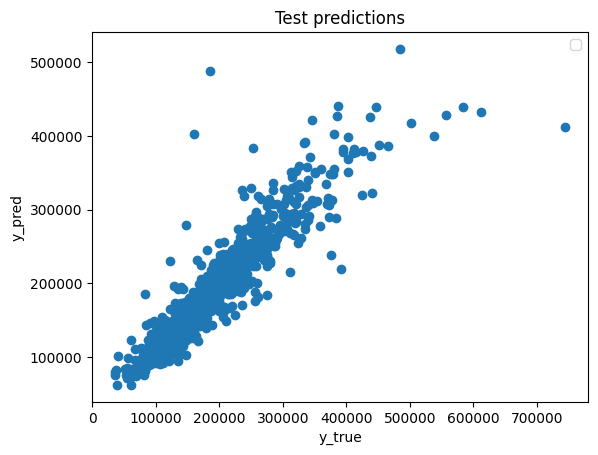

In [171]:
import matplotlib.pylab as plt
plt.scatter(y_train,y_pred)

plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title('Test predictions')

In [172]:

indexs_errors = np.where(y_pred > 3)[0]

files_seleccionades = df.iloc[indexs_errors]


In [173]:
files_seleccionades.tail(1)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1167  1168          60       RL         58.0    10852   Pave   NaN      IR1   

     LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold  \
1167         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   

     YrSold SaleType  SaleCondition  SalePrice  post_crisis  
1167   2006       WD         Normal     173000            0  

[1 rows x 82 columns]

## Model 6

Model 6: Similar al model 3, fent petites millores per aconseguir que valori millor les cases cares.

In [174]:
columnas_seleccionadas =['MSSubClass','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                         'TotRmsAbvGrd','GarageCars','CentralAir','1stFlrSF','2ndFlrSF','TotalBsmtSF','YearBuilt', 'YearRemodAdd','MiscVal']
X_train = X[columnas_seleccionadas]
y_train=y.copy()

In [175]:
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
## Data de la ultima modificacio
X_train['Total_bath'] = X['FullBath'] + 0.5*X['HalfBath']+X['BsmtFullBath'] + 0.5*X['BsmtHalfBath']

## Funcio per crear si és posterior a 2008

X_train['BSMT'] = (X['TotalBsmtSF'] > 0).astype(int)
X_train['Remodelado'] = (X['YearRemodAdd'] != X['YearBuilt']).astype(int)

X_train['GarageCal'] = X['GarageQual'].map(calificacio_a_numero)+X['GarageCond'].map(calificacio_a_numero)
X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row
def air_condition_to_numeric(value):
    map = {'Y': 1, 'N': 0}
    return map.get(value, -1)
X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)
X_train['MSSubClass'] = X_train['MSSubClass'].astype('category')

def functional_to_number(functionality):
    map = {
        'Typ': 0, 'Min1': 2, 'Min2': 3, 'Mod': 5,'Maj1': 7,'Maj2': 8,'Sev': 12,'Sal': 15
    }
    return map.get(functionality, -1)
X_train['damages'] = X['Functional'].map(functional_to_number)


<ipython-input-175-948caeafeac0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-175-948caeafeac0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Total_bath'] = X['FullBath'] + 0.5*X['HalfBath']+X['BsmtFullBath'] + 0.5*X['BsmtHalfBath']
<ipython-input-175-948caeafeac0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [176]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Seleccionar solo las columnas numéricas
columnas_numericas = X_train.select_dtypes(include=['number']).columns

# Aplicar fit_transform a todas las columnas numéricas
X_train[columnas_numericas] = sc.fit_transform(X_train[columnas_numericas])


# Mostrar las primeras 20 filas
X_train.head()

<ipython-input-176-696cf934d6be>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[columnas_numericas] = sc.fit_transform(X_train[columnas_numericas])


MSSubClass   LotArea Neighborhood  OverallQual  OverallCond  GrLivArea  \
632          20  0.172549       NWAmes     0.643833    -0.519203  -0.199324   
1131         20  0.045094      Mitchel    -0.802315    -0.519203  -1.028073   
789          60  0.205271      ClearCr    -0.079241     2.160160   1.082677   
572          60  0.307621       Timber     0.643833    -0.519203   0.333579   
1349         70 -0.540897      OldTown     1.366906    -0.519203   1.596615   

      BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  YearBuilt  \
632       0.155105     -0.326537    0.314642    0.254405  ...   0.192363   
1131      0.155105     -0.936768   -2.348418    0.254405  ...   0.657470   
789       2.570603      1.504158    0.314642    0.254405  ...  -0.173078   
572       0.155105     -0.326537    0.314642    0.254405  ...   1.255465   
1349      1.362854      0.893926   -2.348418   -3.930738  ...  -3.295940   

      YearRemodAdd  MiscVal   Ext_Cal  Total_bath      BSMT  Remodelado  \
632      -0.381310 -0.09321  0.762865   -0.257741  0.159565   -0.954788   
1131      0.346339 -0.09321 -0.697834   -1.533343  0.159565    1.047353   
789       1.073989 -0.09321 -0.697834    0.380059  0.159565    1.047353   
572       1.171009 -0.09321 -0.697834    0.380059  0.159565   -0.954788   
1349      0.103790 -0.09321  0.762865   -0.257741  0.159565    1.047353   

      GarageCal  KitchenQual   damages  
632    0.274506    -0.759075 -0.239019  
1131  -3.801213    -0.759075 -0.239019  
789    0.274506     0.751317 -0.239019  
572    0.274506     0.751317 -0.239019  
1349  -3.801213    -0.759075 -0.239019  

[5 rows x 23 columns]

In [177]:
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import OneHotEncoder

oe = TargetEncoder()
X_train[['MSSubClass', 'Neighborhood']] = oe.fit_transform(X_train[['MSSubClass', 'Neighborhood']], y_train)
X_train.head(20)

<ipython-input-177-02e6a76c60c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['MSSubClass', 'Neighborhood']] = oe.fit_transform(X_train[['MSSubClass', 'Neighborhood']], y_train)


MSSubClass   LotArea   Neighborhood  OverallQual  OverallCond  \
632   183074.860520  0.172549  189889.709751     0.643833    -0.519203   
1131  183074.860520  0.045094  157116.500592    -0.802315    -0.519203   
789   239355.112484  0.205271  194418.977740    -0.079241     2.160160   
572   239355.112484  0.307621  222696.057511     0.643833    -0.519203   
1349  168249.940652 -0.540897  124206.250906     1.366906    -0.519203   
323   183074.860520 -0.479745  124206.250906    -2.248462     2.160160   
730   200072.377180 -0.525985  253442.416217     1.366906    -0.519203   
619   239355.112484  0.209455  222696.057511     1.366906    -0.519203   
941   239355.112484 -0.164863  192535.205582     0.643833    -0.519203   
41    183074.860520  0.709511  222696.057511    -0.802315     0.373918   
1022  147507.386776 -0.091480  124206.250906    -0.802315    -0.519203   
1180  239355.112484  0.094231  222696.057511     0.643833    -0.519203   
486   183074.860520 -0.000288  146900.721198    -0.802315     1.267039   
1448  147507.386776  0.158280  130392.475863    -1.525388     1.267039   
58    239355.112484  0.363731  253442.416217     2.813053    -0.519203   
18    183074.860520  0.365126  185684.413246    -0.802315    -0.519203   
175   183074.860520  0.249258  130392.475863    -0.079241     1.267039   
1380   95479.847223 -0.223119  130392.475863    -2.248462    -2.305445   
893   183074.860520  0.321031  139567.725277    -0.802315    -0.519203   
638    95479.847223 -0.162503  130392.475863    -0.802315     1.267039   

      GrLivArea  BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  \
632   -0.199324      0.155105     -0.326537    0.314642    0.254405  ...   
1131  -1.028073      0.155105     -0.936768   -2.348418    0.254405  ...   
789    1.082677      2.570603      1.504158    0.314642    0.254405  ...   
572    0.333579      0.155105     -0.326537    0.314642    0.254405  ...   
1349   1.596615      1.362854      0.893926   -2.348418   -3.930738  ...   
323   -0.669644      0.155105     -0.326537   -1.016888    0.254405  ...   
730    0.189449     -1.052644     -0.936768    0.314642    0.254405  ...   
619    1.414556      1.362854      2.114389    1.646172    0.254405  ...   
941    1.031473      0.155105      0.893926    0.314642    0.254405  ...   
41    -0.356729     -1.052644     -0.936768   -1.016888    0.254405  ...   
1022  -0.508445     -1.052644     -0.326537   -1.016888    0.254405  ...   
1180   1.892462      1.362854      0.893926    0.314642    0.254405  ...   
486   -0.840324      0.155105     -0.326537    0.314642    0.254405  ...   
1448  -0.322593     -1.052644     -0.326537   -1.016888   -3.930738  ...   
58     2.709832      0.155105      2.114389    1.646172    0.254405  ...   
18    -0.762570      0.155105     -0.326537    0.314642    0.254405  ...   
175    1.217325      1.362854      0.283695    0.314642    0.254405  ...   
1380  -1.236683     -1.052644     -0.936768   -1.016888   -3.930738  ...   
893   -0.252424      0.155105     -0.326537   -1.016888    0.254405  ...   
638   -1.365641     -1.052644     -1.546999   -2.348418    0.254405  ...   

      YearBuilt  YearRemodAdd  MiscVal   Ext_Cal  Total_bath      BSMT  \
632    0.192363     -0.381310 -0.09321  0.762865   -0.257741  0.159565   
1131   0.657470      0.346339 -0.09321 -0.697834   -1.533343  0.159565   
789   -0.173078      1.073989 -0.09321 -0.697834    0.380059  0.159565   
572    1.255465      1.171009 -0.09321 -0.697834    0.380059  0.159565   
1349  -3.295940      0.103790 -0.09321  0.762865   -0.257741  0.159565   
323   -0.538520      0.976969 -0.09321  0.762865   -0.257741  0.159565   
730    0.790358      0.540379 -0.09321  0.762865    1.017860  0.159565   
619    1.056133      0.879949 -0.09321  0.762865    1.655661  0.159565   
941    0.923245      0.685909 -0.09321  0.762865    1.655661  0.159565   
41    -0.405632     -1.254489 -0.09321  0.762865   -0.257741  0.159565   
1022  -1.369068     -1.691078 -0.09321 -0.6

In [178]:
# Aplicar fit_transform a todas las columnas categoricas
X_train[['MSSubClass', 'Neighborhood']] = sc.fit_transform(X_train[['MSSubClass', 'Neighborhood']])

X_train.head(20)

<ipython-input-178-74fc87ccba8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['MSSubClass', 'Neighborhood']] = sc.fit_transform(X_train[['MSSubClass', 'Neighborhood']])


MSSubClass   LotArea  Neighborhood  OverallQual  OverallCond  GrLivArea  \
632     0.021311  0.172549      0.201801     0.643833    -0.519203  -0.199324   
1131    0.021311  0.045094     -0.446636    -0.802315    -0.519203  -1.028073   
789     1.542958  0.205271      0.291416    -0.079241     2.160160   1.082677   
572     1.542958  0.307621      0.850894     0.643833    -0.519203   0.333579   
1349   -0.379510 -0.540897     -1.097784     1.366906    -0.519203   1.596615   
323     0.021311 -0.479745     -1.097784    -2.248462     2.160160  -0.669644   
730     0.480872 -0.525985      1.459229     1.366906    -0.519203   0.189449   
619     1.542958  0.209455      0.850894     1.366906    -0.519203   1.414556   
941     1.542958 -0.164863      0.254144     0.643833    -0.519203   1.031473   
41      0.021311  0.709511      0.850894    -0.802315     0.373918  -0.356729   
1022   -0.940326 -0.091480     -1.097784    -0.802315    -0.519203  -0.508445   
1180    1.542958  0.094231      0.850894     0.643833    -0.519203   1.892462   
486     0.021311 -0.000288     -0.648761    -0.802315     1.267039  -0.840324   
1448   -0.940326  0.158280     -0.975386    -1.525388     1.267039  -0.322593   
58      1.542958  0.363731      1.459229     2.813053    -0.519203   2.709832   
18      0.021311  0.365126      0.118597    -0.802315    -0.519203  -0.762570   
175     0.021311  0.249258     -0.975386    -0.079241     1.267039   1.217325   
1380   -2.346993 -0.223119     -0.975386    -2.248462    -2.305445  -1.236683   
893     0.021311  0.321031     -0.793849    -0.802315    -0.519203  -0.252424   
638    -2.346993 -0.162503     -0.975386    -0.802315     1.267039  -1.365641   

      BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  YearBuilt  \
632       0.155105     -0.326537    0.314642    0.254405  ...   0.192363   
1131      0.155105     -0.936768   -2.348418    0.254405  ...   0.657470   
789       2.570603      1.504158    0.314642    0.254405  ...  -0.173078   
572       0.155105     -0.326537    0.314642    0.254405  ...   1.255465   
1349      1.362854      0.893926   -2.348418   -3.930738  ...  -3.295940   
323       0.155105     -0.326537   -1.016888    0.254405  ...  -0.538520   
730      -1.052644     -0.936768    0.314642    0.254405  ...   0.790358   
619       1.362854      2.114389    1.646172    0.254405  ...   1.056133   
941       0.155105      0.893926    0.314642    0.254405  ...   0.923245   
41       -1.052644     -0.936768   -1.016888    0.254405  ...  -0.405632   
1022     -1.052644     -0.326537   -1.016888    0.254405  ...  -1.369068   
1180      1.362854      0.893926    0.314642    0.254405  ...   0.624248   
486       0.155105     -0.326537    0.314642    0.254405  ...  -0.206300   
1448     -1.052644     -0.326537   -1.016888   -3.930738  ...  -2.033507   
58        0.155105      2.114389    1.646172    0.254405  ...   1.155799   
18        0.155105     -0.326537    0.314642    0.254405  ...   1.089355   
175       1.362854      0.283695    0.314642    0.254405  ...  -0.704629   
1380     -1.052644     -0.936768   -1.016888   -3.930738  ...  -1.900619   
893       0.155105     -0.326537   -1.016888    0.254405  ...  -0.571742   
638      -1.052644     -1.546999   -2.348418    0.254405  ...  -2.033507   

      YearRemodAdd  MiscVal   Ext_Cal  Total_bath      BSMT  Remodelado  \
632      -0.381310 -0.09321  0.762865   -0.257741  0.159565   -0.954788   
1131      0.346339 -0.09321 -0.697834   -1.533343  0.159565    1.047353   
789       1.073989 -0.09321 -0.697834    0.380059  0.159565    1.047353   
572       1.171009 -0.09321 -0.697834    0.380059  0.159565   -0.954788   
1349      0.103790 -0.09321  0.762865   -0.257741  0.159565    1.047353   
323       0.976969 -0.09321  0.762865   -0.257741  0.159565    1.047353   
730       0.540379 -0.09321  0.762865    1.017860  0.159565    1.047353   
619       0.879949 -0.09321  0.762865    1.655661  0.159565   -0.954788   
941       0.685909 -0.09321  0.7

In [179]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [250,500,750],  # Number of trees in the forest
    'max_depth': [10,12,15],         # Maximum number of levels in tree
}

In [180]:
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 12, 15],
                         'n_estimators': [250, 500, 750]},
             scoring='neg_root_mean_squared_error')

In [181]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 12, 'n_estimators': 500}
Best Score: -29534.771109026722


In [182]:
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")

MSSubClass: 0.012435806135494585
LotArea: 0.021730459109596433
Neighborhood: 0.07002421832722784
OverallQual: 0.5507077669294224
OverallCond: 0.006335277181392981
GrLivArea: 0.11364999110821
BedroomAbvGr: 0.004043533500289602
TotRmsAbvGrd: 0.010225952478371533
GarageCars: 0.03721338227072648
CentralAir: 0.0032771102758961585
1stFlrSF: 0.03533185938716142
2ndFlrSF: 0.01754781680595012
TotalBsmtSF: 0.04448819152405173
YearBuilt: 0.012907345315218257
YearRemodAdd: 0.014808802663838685
MiscVal: 0.00019461779986646385
Ext_Cal: 0.0036221753672338102
Total_bath: 0.028542447418327895
BSMT: 0.00017153949001756278
Remodelado: 0.0016329499273048075
GarageCal: 0.0025059535147157145
KitchenQual: 0.007224392137263314
damages: 0.0013784113324223227


In [183]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score

y_pred = cross_val_predict(best_model, X_train, y_train, cv=5)

In [184]:
R_2 = r2_score(y_train, y_pred)
MSE = mean_squared_error(y_train, y_pred)
print("R_2:", R_2)
print("MSE: ",MSE)

R_2: 0.8548911238609601
MSE:  878999713.0769489


Text(0.5, 1.0, 'Test predictions')

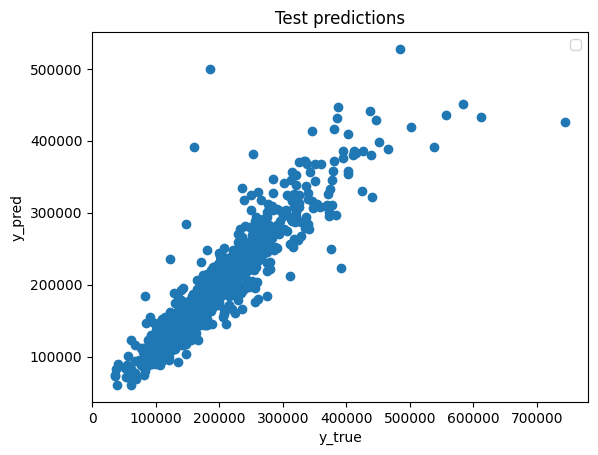

In [185]:
import matplotlib.pylab as plt
plt.scatter(y_train,y_pred)

plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title('Test predictions')

##Model 7

Model 7: Canviem BSMT per BSMT quality. la major diferència és que en aquest model provarem de fer staking.

In [186]:
columnas_seleccionadas =['MSSubClass','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                         'TotRmsAbvGrd','GarageCars','CentralAir','1stFlrSF','2ndFlrSF','TotalBsmtSF','YearBuilt', 'YearRemodAdd','MiscVal',
                         ]
X_train = X[columnas_seleccionadas]
y_train=y.copy()

In [187]:
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
## Data de la ultima modificacio
X_train['Total_bath'] = X['FullBath'] + 0.5*X['HalfBath']
X_train['BsmtQual'] = X['BsmtQual'].map(calificacio_a_numero)
## Funcio per crear si és posterior a 2008

X_train['BSMT'] = (X['TotalBsmtSF'] > 0).astype(int)
X_train['Remodelado'] = (X['YearRemodAdd'] != X['YearBuilt']).astype(int)

X_train['GarageCal'] = X['GarageQual'].map(calificacio_a_numero)+X['GarageCond'].map(calificacio_a_numero)
X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row
def air_condition_to_numeric(value):
    map = {'Y': 1, 'N': 0}
    return map.get(value, -1)
X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)
X_train['MSSubClass'] = X_train['MSSubClass'].astype('category')
def functional_to_number(functionality):
    map = {
        'Typ': 0, 'Min1': 2, 'Min2': 3, 'Mod': 5,'Maj1': 7,'Maj2': 8,'Sev': 12,'Sal': 15
    }
    return map.get(functionality, -1)
X_train['damages'] = X['Functional'].map(functional_to_number)




<ipython-input-187-97e79eaba6ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-187-97e79eaba6ae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Total_bath'] = X['FullBath'] + 0.5*X['HalfBath']
<ipython-input-187-97e79eaba6ae>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [188]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Seleccionar solo las columnas numéricas
columnas_numericas = X_train.select_dtypes(include=['number']).columns

# Aplicar fit_transform a todas las columnas numéricas
X_train[columnas_numericas] = sc.fit_transform(X_train[columnas_numericas])


# Mostrar las primeras 20 filas
X_train.head()

<ipython-input-188-696cf934d6be>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[columnas_numericas] = sc.fit_transform(X_train[columnas_numericas])


MSSubClass   LotArea Neighborhood  OverallQual  OverallCond  GrLivArea  \
632          20  0.172549       NWAmes     0.643833    -0.519203  -0.199324   
1131         20  0.045094      Mitchel    -0.802315    -0.519203  -1.028073   
789          60  0.205271      ClearCr    -0.079241     2.160160   1.082677   
572          60  0.307621       Timber     0.643833    -0.519203   0.333579   
1349         70 -0.540897      OldTown     1.366906    -0.519203   1.596615   

      BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  YearRemodAdd  \
632       0.155105     -0.326537    0.314642    0.254405  ...     -0.381310   
1131      0.155105     -0.936768   -2.348418    0.254405  ...      0.346339   
789       2.570603      1.504158    0.314642    0.254405  ...      1.073989   
572       0.155105     -0.326537    0.314642    0.254405  ...      1.171009   
1349      1.362854      0.893926   -2.348418   -3.930738  ...      0.103790   

      MiscVal   Ext_Cal  Total_bath  BsmtQual      BSMT  Remodelado  \
632  -0.09321  0.762865    0.385525 -0.554062  0.159565   -0.954788   
1131 -0.09321 -0.697834   -1.183440  0.585277  0.159565    1.047353   
789  -0.09321 -0.697834    1.170007 -0.554062  0.159565    1.047353   
572  -0.09321 -0.697834    1.170007  1.724616  0.159565   -0.954788   
1349 -0.09321  0.762865    0.385525 -0.554062  0.159565    1.047353   

      GarageCal  KitchenQual   damages  
632    0.274506    -0.759075 -0.239019  
1131  -3.801213    -0.759075 -0.239019  
789    0.274506     0.751317 -0.239019  
572    0.274506     0.751317 -0.239019  
1349  -3.801213    -0.759075 -0.239019  

[5 rows x 24 columns]

In [189]:
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import OneHotEncoder

oe = TargetEncoder()
X_train[['MSSubClass', 'Neighborhood']] = oe.fit_transform(X_train[['MSSubClass', 'Neighborhood']], y_train)
X_train.head(20)

<ipython-input-189-02e6a76c60c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['MSSubClass', 'Neighborhood']] = oe.fit_transform(X_train[['MSSubClass', 'Neighborhood']], y_train)


MSSubClass   LotArea   Neighborhood  OverallQual  OverallCond  \
632   183074.860520  0.172549  189889.709751     0.643833    -0.519203   
1131  183074.860520  0.045094  157116.500592    -0.802315    -0.519203   
789   239355.112484  0.205271  194418.977740    -0.079241     2.160160   
572   239355.112484  0.307621  222696.057511     0.643833    -0.519203   
1349  168249.940652 -0.540897  124206.250906     1.366906    -0.519203   
323   183074.860520 -0.479745  124206.250906    -2.248462     2.160160   
730   200072.377180 -0.525985  253442.416217     1.366906    -0.519203   
619   239355.112484  0.209455  222696.057511     1.366906    -0.519203   
941   239355.112484 -0.164863  192535.205582     0.643833    -0.519203   
41    183074.860520  0.709511  222696.057511    -0.802315     0.373918   
1022  147507.386776 -0.091480  124206.250906    -0.802315    -0.519203   
1180  239355.112484  0.094231  222696.057511     0.643833    -0.519203   
486   183074.860520 -0.000288  146900.721198    -0.802315     1.267039   
1448  147507.386776  0.158280  130392.475863    -1.525388     1.267039   
58    239355.112484  0.363731  253442.416217     2.813053    -0.519203   
18    183074.860520  0.365126  185684.413246    -0.802315    -0.519203   
175   183074.860520  0.249258  130392.475863    -0.079241     1.267039   
1380   95479.847223 -0.223119  130392.475863    -2.248462    -2.305445   
893   183074.860520  0.321031  139567.725277    -0.802315    -0.519203   
638    95479.847223 -0.162503  130392.475863    -0.802315     1.267039   

      GrLivArea  BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  \
632   -0.199324      0.155105     -0.326537    0.314642    0.254405  ...   
1131  -1.028073      0.155105     -0.936768   -2.348418    0.254405  ...   
789    1.082677      2.570603      1.504158    0.314642    0.254405  ...   
572    0.333579      0.155105     -0.326537    0.314642    0.254405  ...   
1349   1.596615      1.362854      0.893926   -2.348418   -3.930738  ...   
323   -0.669644      0.155105     -0.326537   -1.016888    0.254405  ...   
730    0.189449     -1.052644     -0.936768    0.314642    0.254405  ...   
619    1.414556      1.362854      2.114389    1.646172    0.254405  ...   
941    1.031473      0.155105      0.893926    0.314642    0.254405  ...   
41    -0.356729     -1.052644     -0.936768   -1.016888    0.254405  ...   
1022  -0.508445     -1.052644     -0.326537   -1.016888    0.254405  ...   
1180   1.892462      1.362854      0.893926    0.314642    0.254405  ...   
486   -0.840324      0.155105     -0.326537    0.314642    0.254405  ...   
1448  -0.322593     -1.052644     -0.326537   -1.016888   -3.930738  ...   
58     2.709832      0.155105      2.114389    1.646172    0.254405  ...   
18    -0.762570      0.155105     -0.326537    0.314642    0.254405  ...   
175    1.217325      1.362854      0.283695    0.314642    0.254405  ...   
1380  -1.236683     -1.052644     -0.936768   -1.016888   -3.930738  ...   
893   -0.252424      0.155105     -0.326537   -1.016888    0.254405  ...   
638   -1.365641     -1.052644     -1.546999   -2.348418    0.254405  ...   

      YearRemodAdd  MiscVal   Ext_Cal  Total_bath  BsmtQual      BSMT  \
632      -0.381310 -0.09321  0.762865    0.385525 -0.554062  0.159565   
1131      0.346339 -0.09321 -0.697834   -1.183440  0.585277  0.159565   
789       1.073989 -0.09321 -0.697834    1.170007 -0.554062  0.159565   
572       1.171009 -0.09321 -0.697834    1.170007  1.724616  0.159565   
1349      0.103790 -0.09321  0.762865    0.385525 -0.554062  0.159565   
323       0.976969 -0.09321  0.762865   -1.183440 -0.554062  0.159565   
730       0.540379 -0.09321  0.762865    0.385525  0.585277  0.159565   
619       0.879949 -0.09321  0.762865    1.170007  0.585277  0.159565   
941       0.685909 -0.09321  0.762865    1.170007  0.585277  0.159565   
41       -1.254489 -0.09321  0.762865   -0.398958 -0.554062  0.159565   
1022     -1.691078 -0.09321 -0.697834   -1.183440 -0.5

In [190]:
# Aplicar fit_transform a todas las columnas categoricas
X_train[['MSSubClass', 'Neighborhood']] = sc.fit_transform(X_train[['MSSubClass', 'Neighborhood']])

X_train.head(20)

<ipython-input-190-74fc87ccba8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['MSSubClass', 'Neighborhood']] = sc.fit_transform(X_train[['MSSubClass', 'Neighborhood']])


MSSubClass   LotArea  Neighborhood  OverallQual  OverallCond  GrLivArea  \
632     0.021311  0.172549      0.201801     0.643833    -0.519203  -0.199324   
1131    0.021311  0.045094     -0.446636    -0.802315    -0.519203  -1.028073   
789     1.542958  0.205271      0.291416    -0.079241     2.160160   1.082677   
572     1.542958  0.307621      0.850894     0.643833    -0.519203   0.333579   
1349   -0.379510 -0.540897     -1.097784     1.366906    -0.519203   1.596615   
323     0.021311 -0.479745     -1.097784    -2.248462     2.160160  -0.669644   
730     0.480872 -0.525985      1.459229     1.366906    -0.519203   0.189449   
619     1.542958  0.209455      0.850894     1.366906    -0.519203   1.414556   
941     1.542958 -0.164863      0.254144     0.643833    -0.519203   1.031473   
41      0.021311  0.709511      0.850894    -0.802315     0.373918  -0.356729   
1022   -0.940326 -0.091480     -1.097784    -0.802315    -0.519203  -0.508445   
1180    1.542958  0.094231      0.850894     0.643833    -0.519203   1.892462   
486     0.021311 -0.000288     -0.648761    -0.802315     1.267039  -0.840324   
1448   -0.940326  0.158280     -0.975386    -1.525388     1.267039  -0.322593   
58      1.542958  0.363731      1.459229     2.813053    -0.519203   2.709832   
18      0.021311  0.365126      0.118597    -0.802315    -0.519203  -0.762570   
175     0.021311  0.249258     -0.975386    -0.079241     1.267039   1.217325   
1380   -2.346993 -0.223119     -0.975386    -2.248462    -2.305445  -1.236683   
893     0.021311  0.321031     -0.793849    -0.802315    -0.519203  -0.252424   
638    -2.346993 -0.162503     -0.975386    -0.802315     1.267039  -1.365641   

      BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  YearRemodAdd  \
632       0.155105     -0.326537    0.314642    0.254405  ...     -0.381310   
1131      0.155105     -0.936768   -2.348418    0.254405  ...      0.346339   
789       2.570603      1.504158    0.314642    0.254405  ...      1.073989   
572       0.155105     -0.326537    0.314642    0.254405  ...      1.171009   
1349      1.362854      0.893926   -2.348418   -3.930738  ...      0.103790   
323       0.155105     -0.326537   -1.016888    0.254405  ...      0.976969   
730      -1.052644     -0.936768    0.314642    0.254405  ...      0.540379   
619       1.362854      2.114389    1.646172    0.254405  ...      0.879949   
941       0.155105      0.893926    0.314642    0.254405  ...      0.685909   
41       -1.052644     -0.936768   -1.016888    0.254405  ...     -1.254489   
1022     -1.052644     -0.326537   -1.016888    0.254405  ...     -1.691078   
1180      1.362854      0.893926    0.314642    0.254405  ...      0.297829   
486       0.155105     -0.326537    0.314642    0.254405  ...     -0.963429   
1448     -1.052644     -0.326537   -1.016888   -3.930738  ...      0.734419   
58        0.155105      2.114389    1.646172    0.254405  ...      1.025479   
18        0.155105     -0.326537    0.314642    0.254405  ...      0.928459   
175       1.362854      0.283695    0.314642    0.254405  ...      0.782929   
1380     -1.052644     -0.936768   -1.016888   -3.930738  ...     -1.691078   
893       0.155105     -0.326537   -1.016888    0.254405  ...     -1.497039   
638      -1.052644     -1.546999   -2.348418    0.254405  ...     -1.691078   

      MiscVal   Ext_Cal  Total_bath  BsmtQual      BSMT  Remodelado  \
632  -0.09321  0.762865    0.385525 -0.554062  0.159565   -0.954788   
1131 -0.09321 -0.697834   -1.183440  0.585277  0.159565    1.047353   
789  -0.09321 -0.697834    1.170007 -0.554062  0.159565    1.047353   
572  -0.09321 -0.697834    1.170007  1.724616  0.159565   -0.954788   
1349 -0.09321  0.762865    0.385525 -0.554062  0.159565    1.047353   
323  -0.09321  0.762865   -1.183440 -0.554062  0.159565    1.047353   
730  -0.09321  0.762865    0.385525  0.585277  0.159565    1.047353   
619  -0.09321  0.762865    1.170007  0.585277  0.159565   -0.954788   
941  

In [191]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score


model = Ridge()
model.fit(X_train, y_train)

# Avaluar el model
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Error quadràtic mitjà: ", mse)
print("Error r2 mitjà: ", r2)

Error quadràtic mitjà:  1089935711.9770503
Error r2 mitjà:  0.8200689444196115


In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,250],  # Number of trees in the forest
    'max_depth': [12,15,18],         # Maximum number of levels in tree
}

In [193]:
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [12, 15, 18],
                         'n_estimators': [50, 100, 250]},
             scoring='neg_root_mean_squared_error')

In [194]:

best_params = grid_search.best_params_
best_score = grid_search.best_score_
rf

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 15, 'n_estimators': 50}
Best Score: -30010.04446424382


Ara ferem un gradient boosting.

In [195]:
import xgboost as xgb
# Configuració dels paràmetres per a la cerca de graella
param_grid = {
    'n_estimators': [50,100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1,3, 5, 7]
}

# Creació del model de Gradient Boosting per a la cerca de graella
gb = xgb.XGBRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Entrenament del model amb la cerca de graella
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error')

In [196]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model_gb = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Score: -29592.936370521016


In [197]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor

estimators = [
    ('ridge', Ridge()),
    ('rf', RandomForestRegressor(max_depth= 15, n_estimators= 250, random_state=42)),
    ('gb', best_model_gb)
]
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=MLPRegressor(random_state=42),
    cv=5
)

# Entrenar el model d'apilament
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))}


scores = cross_validate(stacking_regressor, X_train, y_train, cv=5, scoring=scoring)

r2_scores = scores['test_r2']
rmse_scores = scores['test_rmse']

# Imprimir los resultados
print(f'R^2 Scores: {np.mean(r2_scores)}')
print(f'RMSE Scores: {np.mean(rmse_scores)}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 Scores: 0.8472372191306444
RMSE Scores: 29914.817089823122


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 1.0, 'Test predictions')

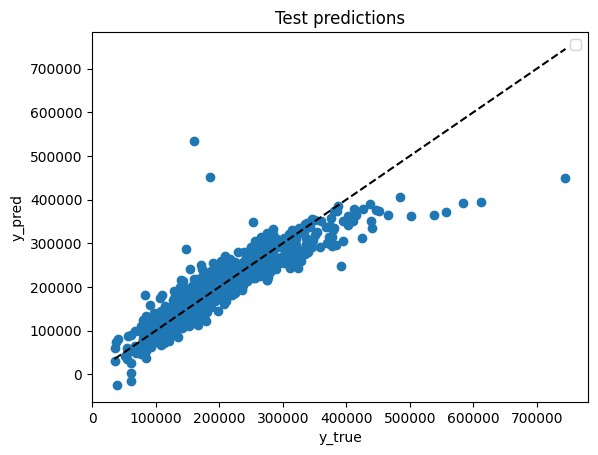

In [198]:
import matplotlib.pylab as plt
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra
y_pred_cv = cross_val_predict(stacking_regressor, X_train, y_train, cv=5)

plt.scatter(y_train,y_pred)

plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title('Test predictions')

Hem aconseguit una gran accuracy fem staking, però si ens fixem amb el random forest no millorem el model 3.

##Model 8

Model 8: El mateix del 3 pero fent staking

In [199]:
columnas_seleccionadas =['MSSubClass','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                         'TotRmsAbvGrd','GarageCars','CentralAir','1stFlrSF','2ndFlrSF','TotalBsmtSF']
X_train = X[columnas_seleccionadas]
y_train=y.copy()
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
## Data de la ultima modificacio
X_train['Last_mod'] = X[['YearBuilt', 'YearRemodAdd']].max(axis=1)
X_train['Total_bath'] = X['FullBath'] + 0.5*X['HalfBath']+X['BsmtFullBath'] + 0.5*X['BsmtHalfBath']

## Funcio per crear si és posterior a 2008
def pre_or_post_2008(row):
      return row['YrSold'] - 2008 + (row['MoSold'] - 9)/12
X_train['BSMT'] = (X['TotalBsmtSF'] > 0).astype(int)
X_train['second_floor'] = (X['2ndFlrSF'] > 0).astype(int)
X_train['Remodelado'] = (X['YearRemodAdd'] > X['YearBuilt']).astype(int)

def main_road(row):
    if (row['Condition1'] == 'Artery' or row['Condition2'] == 'Artery'):
        return '1'
    else:
        return '0'
X_train['GarageCal'] = X['GarageQual'].map(calificacio_a_numero)+X['GarageCond'].map(calificacio_a_numero)
X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row
X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)
X_train['main_road'] = X.apply(main_road, axis=1)
def ad_station(row):
    if (row['Condition1'] == 'RRAn' or row['Condition2'] == 'RRAn' or row['Condition1'] == 'RRAe' or row['Condition2'] == 'RRAe'):
        return '1'
    else:
        return '0'
X_train['ad_station'] = X.apply(ad_station, axis=1)

def air_condition_to_numeric(value):
    map = {'Y': 1, 'N': 0}
    return map.get(value, -1)
X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)
X_train['MSSubClass'] = X_train['MSSubClass'].astype('category')



<ipython-input-199-dd914f625064>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-199-dd914f625064>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Last_mod'] = X[['YearBuilt', 'YearRemodAdd']].max(axis=1)
<ipython-input-199-dd914f625064>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [200]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define which columns are numeric and which are categorical
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns

# Create a transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('Target Encoder', TargetEncoder()),
    ('scaler', StandardScaler())
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the complete pipeline
pipeline_8 = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
pipeline_8.fit(X_train,y_train)

transformed_data=pipeline_8.transform(X_train)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_train_transformed = pd.DataFrame(transformed_data, columns=new_column_names)

['LotArea' 'OverallQual' 'OverallCond' 'GrLivArea' 'BedroomAbvGr'
 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'Ext_Cal' 'Last_mod' 'Total_bath' 'BSMT' 'second_floor'
 'Remodelado' 'GarageCal' 'KitchenQual' 'pre_or_post_2008' 'MSSubClass'
 'Neighborhood' 'main_road' 'ad_station']


In [201]:
X_train=X_train_transformed.copy()

In [202]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score


ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Avaluar el model
y_pred = ridge_model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Error quadràtic mitjà: ", np.sqrt(mse))
print("Error r2 mitjà: ", r2)

Error quadràtic mitjà:  32616.90647131209
Error r2 mitjà:  0.8243732026537463


In [203]:

coeficients = ridge_model.coef_
coeficients_ridge ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {coeficients[i]}")
    coeficients_ridge[X_train.columns[i]]=abs(coeficients[i])

LotArea: 4727.820585000757
OverallQual: 16837.668355639267
OverallCond: 6019.972596743494
GrLivArea: -10315.557590041904
BedroomAbvGr: -4821.331030088724
TotRmsAbvGrd: 6316.431771428859
GarageCars: 9001.755038590607
CentralAir: 2116.20183099903
1stFlrSF: 23122.300788880555
2ndFlrSF: 31499.135403222703
TotalBsmtSF: 3584.4273489495795
Ext_Cal: 2073.9171628045783
Last_mod: -2953.8571895406144
Total_bath: 7599.649767528139
BSMT: 785.4618629385174
second_floor: -13180.175379362885
Remodelado: 4249.121417259942
GarageCal: -2943.2217957247076
KitchenQual: 7377.583486822243
pre_or_post_2008: -147.93241377994343
MSSubClass: 3091.927297205065
Neighborhood: 19346.454036670053
main_road: 1594.8606236820565
ad_station: 1402.174002018994


In [204]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [250,500,750],  # Number of trees in the forest
    'max_depth': [12,15,20],         # Maximum number of levels in tree
}

In [205]:
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [12, 15, 20],
                         'n_estimators': [250, 500, 750]},
             scoring='neg_root_mean_squared_error')

In [206]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
rf_best_model= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 15, 'n_estimators': 500}
Best Score: -29614.382731069432


In [207]:
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_rf ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")
    importances_rf[X_train.columns[i]]=importances[i]

LotArea: 0.021427511849555644
OverallQual: 0.5494928990283886
OverallCond: 0.00644170358327485
GrLivArea: 0.11316150052265414
BedroomAbvGr: 0.00407860572237974
TotRmsAbvGrd: 0.010681249239197936
GarageCars: 0.03729517068771401
CentralAir: 0.0036234586845350623
1stFlrSF: 0.03527139872755288
2ndFlrSF: 0.017809729641837812
TotalBsmtSF: 0.045286021826414946
Ext_Cal: 0.0035769906030869328
Last_mod: 0.018183861451211376
Total_bath: 0.02925467307835503
BSMT: 0.00014098390010693803
second_floor: 0.0002690790729563233
Remodelado: 0.00163663454673304
GarageCal: 0.0025977742574383503
KitchenQual: 0.007278782569561835
pre_or_post_2008: 0.008187781125083074
MSSubClass: 0.013255039756075183
Neighborhood: 0.07065757062852739
main_road: 0.0001995585783753464
ad_station: 0.0001920209189836518


In [208]:
from sklearn.ensemble import GradientBoostingRegressor
# Configuració dels paràmetres per a la cerca de graella
param_grid = {
    'n_estimators': [50,100, 200],
    'learning_rate': [0.01, 0.1, 0.2,1],
    'max_depth': [1,3, 5, 7]
}

# Creació del model de Gradient Boosting per a la cerca de graella
gb = xgb.XGBRegressor()

grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Entrenament del model amb la cerca de graella
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 1],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error')

In [209]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
gb_best_model= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Best Score: -27810.5120958228


In [210]:
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_gb ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")
    importances_gb[X_train.columns[i]]=importances[i]

LotArea: 0.007085437420755625
OverallQual: 0.5456479787826538
OverallCond: 0.0075815231539309025
GrLivArea: 0.0459769144654274
BedroomAbvGr: 0.00637546181678772
TotRmsAbvGrd: 0.005981670692563057
GarageCars: 0.10057217627763748
CentralAir: 0.016937073320150375
1stFlrSF: 0.02460162341594696
2ndFlrSF: 0.01264754869043827
TotalBsmtSF: 0.02290675789117813
Ext_Cal: 0.004384185187518597
Last_mod: 0.0092329615727067
Total_bath: 0.04619472473859787
BSMT: 0.0006449627107940614
second_floor: 0.0
Remodelado: 0.0027176453731954098
GarageCal: 0.011215844191610813
KitchenQual: 0.025956476107239723
pre_or_post_2008: 0.0025204704143106937
MSSubClass: 0.02552737109363079
Neighborhood: 0.07162243872880936
main_road: 0.0014220377197489142
ad_station: 0.002246649470180273


In [211]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

estimators = [
    ('ridge', Ridge()),
    ('rf', rf_best_model),
    ('gb', gb_best_model)
]
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=MLPRegressor(random_state=42),
    cv=5
)

# Entrenar el model d'apilament
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))}


scores = cross_validate(stacking_regressor, X_train, y_train, cv=5, scoring=scoring)

r2_scores = scores['test_r2']
rmse_scores = scores['test_rmse']

# Imprimir los resultados
print(f'R^2 Scores: {np.mean(r2_scores)}')
print(f'RMSE Scores: {np.mean(rmse_scores)}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 Scores: 0.8619628509189271
RMSE Scores: 28401.56974838874


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [212]:

#y_pred = stacking_regressor.predict(X_test)
#mse = mean_squared_error(y_train, y_pred)
#r2 = r2_score(y_train, y_pred)

#print("Error quadràtic mitjà (MSE): ", mse)
#print("R-squared score (R²): ", r2)

Provarem com el gradient boosting calssifica les prediccions per veure quins elements falla

Ara mateix aquest és el millor model. Aleshores en seguirem basant en això. Com podem veure ens infravalora les casses de més preu.

Provarem de fer la mitjana de les features importance. És correcte??

In [213]:
print(importances_rf)

{'LotArea': 0.021427511849555644, 'OverallQual': 0.5494928990283886, 'OverallCond': 0.00644170358327485, 'GrLivArea': 0.11316150052265414, 'BedroomAbvGr': 0.00407860572237974, 'TotRmsAbvGrd': 0.010681249239197936, 'GarageCars': 0.03729517068771401, 'CentralAir': 0.0036234586845350623, '1stFlrSF': 0.03527139872755288, '2ndFlrSF': 0.017809729641837812, 'TotalBsmtSF': 0.045286021826414946, 'Ext_Cal': 0.0035769906030869328, 'Last_mod': 0.018183861451211376, 'Total_bath': 0.02925467307835503, 'BSMT': 0.00014098390010693803, 'second_floor': 0.0002690790729563233, 'Remodelado': 0.00163663454673304, 'GarageCal': 0.0025977742574383503, 'KitchenQual': 0.007278782569561835, 'pre_or_post_2008': 0.008187781125083074, 'MSSubClass': 0.013255039756075183, 'Neighborhood': 0.07065757062852739, 'main_road': 0.0001995585783753464, 'ad_station': 0.0001920209189836518}


In [214]:
def show_top_features(coefficients, n=3):
    sorted_features = sorted(coefficients.items(), key=lambda x: x[1])
    top_n_features = sorted_features[:n]

    print(f"The {n} features with the smallest coefficients are:")
    for feature, coef in top_n_features:
        print(f"{feature}: {coef}")

show_top_features(importances_rf, n=3)
show_top_features(importances_gb, n=3)
show_top_features(coeficients_ridge, n=3)

The 3 features with the smallest coefficients are:
BSMT: 0.00014098390010693803
ad_station: 0.0001920209189836518
main_road: 0.0001995585783753464
The 3 features with the smallest coefficients are:
second_floor: 0.0
BSMT: 0.0006449627107940614
main_road: 0.0014220377197489142
The 3 features with the smallest coefficients are:
pre_or_post_2008: 147.93241377994343
BSMT: 785.4618629385174
ad_station: 1402.174002018994


## Model 9

Model 9: Treiem els de possició per substituirlos per si estan o no en una bona posició. Treiem si tenen sotano i si tenen segona planta ja que son variables que ja passem. I afegim 'MSZoning','HouseStyle',
                         'Foundation','FullBath

In [215]:
columnas_seleccionadas =['MSSubClass','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                         'TotRmsAbvGrd','GarageCars','CentralAir','1stFlrSF','2ndFlrSF','TotalBsmtSF','MSZoning','HouseStyle',
                         'Foundation','FullBath']
X_train = X[columnas_seleccionadas]
y_train=y.copy()
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
## Data de la ultima modificacio
X_train['Last_mod'] = X[['YearBuilt', 'YearRemodAdd']].max(axis=1)
X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
X_train['bath_BSMT']=X['BsmtFullBath'] + 0.5*X['BsmtHalfBath']

## Funcio per crear si és posterior a 2008
def pre_or_post_2008(row):
      return row['YrSold'] - 2008 + (row['MoSold'] - 9)/12

X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)

X_train['GarageCal'] = X['GarageQual'].map(calificacio_a_numero)+X['GarageCond'].map(calificacio_a_numero)
X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row


def air_condition_to_numeric(value):
    map = {'Y': 1, 'N': 0}
    return map.get(value, -1)
X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)
X_train['MSSubClass'] = X_train['MSSubClass'].astype('category')

def good_position(row):
    if (row['Condition1'] != 'Norm' or row['Condition2'] != 'Norm'):
        return '1'
    else:
        return '0'
X_train['good_position'] = X.apply(good_position, axis=1)


<ipython-input-215-52a05422ae2f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-215-52a05422ae2f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Last_mod'] = X[['YearBuilt', 'YearRemodAdd']].max(axis=1)
<ipython-input-215-52a05422ae2f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [216]:
def get_percentage_nan_per_column(df):
  #retorna un df amb el % de nans de cada columna
  return df.isna().sum().sort_values()/len(df)*100.

percentage_nan = get_percentage_nan_per_column(X_train)
percentage_nan

MSSubClass          0.0
GarageCal           0.0
pre_or_post_2008    0.0
bath_BSMT           0.0
bath_oGr            0.0
Last_mod            0.0
Ext_Cal             0.0
FullBath            0.0
Foundation          0.0
HouseStyle          0.0
MSZoning            0.0
KitchenQual         0.0
TotalBsmtSF         0.0
1stFlrSF            0.0
CentralAir          0.0
GarageCars          0.0
TotRmsAbvGrd        0.0
BedroomAbvGr        0.0
GrLivArea           0.0
OverallCond         0.0
OverallQual         0.0
Neighborhood        0.0
LotArea             0.0
2ndFlrSF            0.0
good_position       0.0
dtype: float64

In [217]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define which columns are numeric and which are categorical
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns

# Create a transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('Target Encoder', TargetEncoder()),
    ('scaler', StandardScaler())
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the complete pipeline
pipeline_9 = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
pipeline_9.fit(X_train,y_train)

transformed_data=pipeline_9.transform(X_train)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_train_transformed = pd.DataFrame(transformed_data, columns=new_column_names)

['LotArea' 'OverallQual' 'OverallCond' 'GrLivArea' 'BedroomAbvGr'
 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'FullBath' 'Ext_Cal' 'Last_mod' 'bath_oGr' 'bath_BSMT'
 'pre_or_post_2008' 'GarageCal' 'KitchenQual' 'MSSubClass' 'Neighborhood'
 'MSZoning' 'HouseStyle' 'Foundation' 'good_position']


In [218]:
X_train=X_train_transformed

In [219]:
def get_percentage_nan_per_column(df):
  #retorna un df amb el % de nans de cada columna
  return df.isna().sum().sort_values()/len(df)*100.

percentage_nan = get_percentage_nan_per_column(X_train)
percentage_nan

LotArea             0.0
HouseStyle          0.0
MSZoning            0.0
Neighborhood        0.0
MSSubClass          0.0
KitchenQual         0.0
GarageCal           0.0
pre_or_post_2008    0.0
bath_BSMT           0.0
bath_oGr            0.0
Last_mod            0.0
Foundation          0.0
Ext_Cal             0.0
TotalBsmtSF         0.0
2ndFlrSF            0.0
1stFlrSF            0.0
CentralAir          0.0
GarageCars          0.0
TotRmsAbvGrd        0.0
BedroomAbvGr        0.0
GrLivArea           0.0
OverallCond         0.0
OverallQual         0.0
FullBath            0.0
good_position       0.0
dtype: float64

In [220]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score


model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [221]:
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Error quadràtic mitjà: ", mse)
print("Error r2 mitjà: ", r2)

Error quadràtic mitjà:  1059884456.9636527
Error r2 mitjà:  0.8250299287938807


In [222]:
coeficients = model.coef_
coeficients_ridge ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {coeficients[i]}")
    coeficients_ridge[X_train.columns[i]]=abs(coeficients[i])

LotArea: 3820.90577027483
OverallQual: 16421.477554953468
OverallCond: 6945.534095208413
GrLivArea: -5945.407883433982
BedroomAbvGr: -4484.743237084687
TotRmsAbvGrd: 6772.586943585474
GarageCars: 10618.02013878772
CentralAir: 743.5499948752375
1stFlrSF: 22914.60596198207
2ndFlrSF: 21310.934693810792
TotalBsmtSF: 3859.1137269993087
FullBath: -4000.8704330483592
Ext_Cal: 1647.1083289900864
Last_mod: -929.1161449810747
bath_oGr: 4877.119319704523
bath_BSMT: 6491.580230096962
pre_or_post_2008: -180.04202060225086
GarageCal: -4315.700174678997
KitchenQual: 6904.740694907734
MSSubClass: 3727.7313914274946
Neighborhood: 19099.664200598192
MSZoning: 2009.7098151522853
HouseStyle: -4552.6466494585375
Foundation: 1509.9954961782305
good_position: 4163.286055692412


In [223]:
param_grid = {
    'n_estimators': [50,100,250],  # Number of trees in the forest
    'max_depth': [12,15,18],         # Maximum number of levels in tree
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [12, 15, 18],
                         'n_estimators': [50, 100, 250]},
             scoring='neg_root_mean_squared_error')

In [224]:

best_params = grid_search.best_params_
best_score = grid_search.best_score_
rf_best_model= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 15, 'n_estimators': 50}
Best Score: -29658.004490533778


In [225]:

best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_rf ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")
    importances_rf[X_train.columns[i]]=importances[i]

LotArea: 0.02527583666151355
OverallQual: 0.5410116225658633
OverallCond: 0.007388073516241409
GrLivArea: 0.11982666147344521
BedroomAbvGr: 0.0033546559305038344
TotRmsAbvGrd: 0.009806822362323518
GarageCars: 0.036365435372288986
CentralAir: 0.0034257626374725476
1stFlrSF: 0.03641812017507622
2ndFlrSF: 0.015022668984452968
TotalBsmtSF: 0.04637213503040764
FullBath: 0.0010670664600992731
Ext_Cal: 0.003504154188465883
Last_mod: 0.019337635295403575
bath_oGr: 0.006218145099075107
bath_BSMT: 0.00853727743881105
pre_or_post_2008: 0.008537674693494455
GarageCal: 0.0022660749132075316
KitchenQual: 0.008426431633631904
MSSubClass: 0.01272998283125458
Neighborhood: 0.07903273146962274
MSZoning: 0.002208182647916768
HouseStyle: 0.0011242070522929817
Foundation: 0.001963602126993294
good_position: 0.0007790394401416399


In [226]:
from sklearn.ensemble import GradientBoostingRegressor
# Configuració dels paràmetres per a la cerca de graella
param_grid = {
    'n_estimators': [100, 200,300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1,3, 5, 7]
}

# Creació del model de Gradient Boosting per a la cerca de graella
gb = xgb.XGBRegressor()

grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Entrenament del model amb la cerca de graella
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [227]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
gb_best_model= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Score: -27961.04588522933


In [228]:
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_gb ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")
    importances_gb[X_train.columns[i]]=importances[i]

LotArea: 0.006696003023535013
OverallQual: 0.3909513056278229
OverallCond: 0.007559848949313164
GrLivArea: 0.04583027958869934
BedroomAbvGr: 0.0030783466063439846
TotRmsAbvGrd: 0.013971872627735138
GarageCars: 0.1395915299654007
CentralAir: 0.027666419744491577
1stFlrSF: 0.03810218349099159
2ndFlrSF: 0.009829581715166569
TotalBsmtSF: 0.03455814719200134
FullBath: 0.032704275101423264
Ext_Cal: 0.0025938318576663733
Last_mod: 0.0075568933971226215
bath_oGr: 0.023544462397694588
bath_BSMT: 0.012597216293215752
pre_or_post_2008: 0.001575992675498128
GarageCal: 0.006096120458096266
KitchenQual: 0.0829094871878624
MSSubClass: 0.015389891341328621
Neighborhood: 0.07782629132270813
MSZoning: 0.009416041895747185
HouseStyle: 0.0017990495543926954
Foundation: 0.0033463244326412678
good_position: 0.004808584228157997


In [229]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

estimators = [
    ('ridge', Ridge()),
    ('rf', rf_best_model),
    ('gb', gb_best_model)
]
stacking_regressor_9 = StackingRegressor(
    estimators=estimators,
    final_estimator=MLPRegressor(random_state=42),
    cv=5
)

# Entrenar el model d'apilament
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))}


scores = cross_validate(stacking_regressor_9, X_train, y_train, cv=5,scoring=scoring)

r2_scores = scores['test_r2']
rmse_scores = scores['test_rmse']

# Imprimir los resultados
print(f'R^2 Scores: {np.mean(r2_scores)}')
print(f'RMSE Scores: {np.mean(rmse_scores)}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 Scores: 0.8658927889204264
RMSE Scores: 28141.674732915504


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [230]:
stacking_regressor_9.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('ridge', Ridge()),
                              ('rf',
                               RandomForestRegressor(max_depth=15,
                                                     n_estimators=50,
                                                     random_state=42)),
                              ('gb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_typ...
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                  final_estimator=MLPRegressor(random_state=42))

In [231]:
def show_top_features(coefficients, n=3):
    sorted_features = sorted(coefficients.items(), key=lambda x: x[1])
    top_n_features = sorted_features[:n]

    print(f"The {n} features with the smallest coefficients are:")
    for feature, coef in top_n_features:
        print(f"{feature}: {coef}")
print("Features menys importants al random forest")
show_top_features(importances_rf, n=5)
print("Features menys importants al gradient boosting")
show_top_features(importances_gb, n=5)
print("Features menys importants al gradient boosting")

show_top_features(coeficients_ridge, n=5)

Features menys importants al random forest
The 5 features with the smallest coefficients are:
good_position: 0.0007790394401416399
FullBath: 0.0010670664600992731
HouseStyle: 0.0011242070522929817
Foundation: 0.001963602126993294
MSZoning: 0.002208182647916768
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
pre_or_post_2008: 0.001575992675498128
HouseStyle: 0.0017990495543926954
Ext_Cal: 0.0025938318576663733
BedroomAbvGr: 0.0030783466063439846
Foundation: 0.0033463244326412678
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
pre_or_post_2008: 180.04202060225086
CentralAir: 743.5499948752375
Last_mod: 929.1161449810747
Foundation: 1509.9954961782305
Ext_Cal: 1647.1083289900864


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 1.0, 'Test predictions')

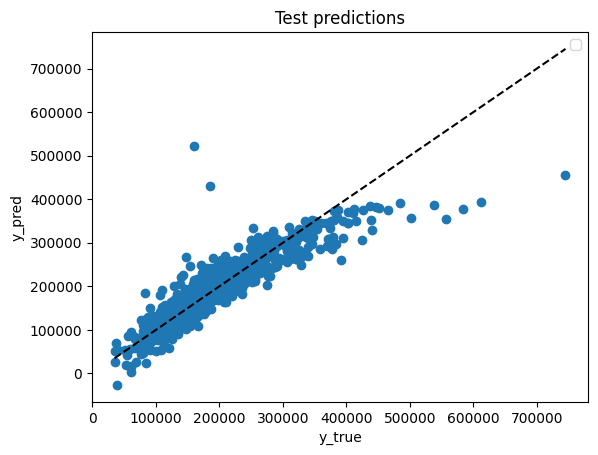

In [232]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

y_pred_9 = cross_val_predict(stacking_regressor_9, X_train, y_train, cv=5)

plt.scatter(y_train,y_pred)


plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra

plt.title('Test predictions')

In [233]:
X_train_9=X_train.copy()

In [234]:
X_train_9.head(5)

LotArea  OverallQual  OverallCond  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  \
0  0.172549     0.643833    -0.519203  -0.199324      0.155105     -0.326537   
1  0.045094    -0.802315    -0.519203  -1.028073      0.155105     -0.936768   
2  0.205271    -0.079241     2.160160   1.082677      2.570603      1.504158   
3  0.307621     0.643833    -0.519203   0.333579      0.155105     -0.326537   
4 -0.540897     1.366906    -0.519203   1.596615      1.362854      0.893926   

   GarageCars  CentralAir  1stFlrSF  2ndFlrSF  ...  bath_BSMT  \
0    0.314642    0.254405  0.648739 -0.795829  ...  -0.871532   
1   -2.348418    0.254405 -0.491257 -0.795829  ...  -0.871532   
2    0.314642    0.254405 -0.486040  1.749180  ...  -0.871532   
3    0.314642    0.254405 -0.825169  1.142135  ...  -0.871532   
4   -2.348418   -3.930738 -0.585170  1.987417  ...  -0.871532   

   pre_or_post_2008  GarageCal  KitchenQual  MSSubClass  Neighborhood  \
0          0.743693   0.274506    -0.759075    0.021311      0.201801   
1         -0.468413  -3.801213    -0.759075    0.021311     -0.446636   
2         -0.596003   0.274506     0.751317    1.542958      0.291416   
3          0.935079   0.274506     0.751317    1.542958      0.850894   
4          0.488513  -3.801213    -0.759075   -0.379510     -1.097784   

   MSZoning  HouseStyle  Foundation  good_position  
0  0.370656   -0.354622   -0.788556        0.40129  
1  0.370656   -0.354622    1.116745        0.40129  
2  0.370656    1.378289   -0.788556        0.40129  
3  0.370656    1.378289    1.116745        0.40129  
4 -2.351106    1.378289   -1.299174        0.40129  

[5 rows x 25 columns]

## Model 10

Model 10: Eliminem House style, Foundation, good position, full bath i prepost 2008. I canviem garage cal per Gararge

In [235]:
columnas_seleccionadas =['MSSubClass','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                         'TotRmsAbvGrd','GarageCars','CentralAir','1stFlrSF','2ndFlrSF','TotalBsmtSF','MSZoning']
X_train = X[columnas_seleccionadas]
y_train=y.copy()
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
## Data de la ultima modificacio
X_train['Last_mod'] = X[['YearBuilt', 'YearRemodAdd']].max(axis=1)
X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
X_train['bath_BSMT']=X['BsmtFullBath'] + 0.5*X['BsmtHalfBath']

## Funcio per crear si és posterior a 2008

X_train['GarageQual'] = X['GarageQual'].map(calificacio_a_numero)
X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row
def pre_or_post_2008(row):
      return row['YrSold'] - 2008 + (row['MoSold'] - 9)/12

X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)

def air_condition_to_numeric(value):
    map = {'Y': 1, 'N': 0}
    return map.get(value, -1)
X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)
X_train['MSSubClass'] = X_train['MSSubClass'].astype('category')


<ipython-input-235-7636b92ed1f3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-235-7636b92ed1f3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Last_mod'] = X[['YearBuilt', 'YearRemodAdd']].max(axis=1)
<ipython-input-235-7636b92ed1f3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [236]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define which columns are numeric and which are categorical
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns

# Create a transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('Target Encoder', TargetEncoder()),
    ('scaler', StandardScaler())
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the complete pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
pipeline.fit(X_train,y_train)

transformed_data=pipeline.transform(X_train)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_train_transformed = pd.DataFrame(transformed_data, columns=new_column_names)

['LotArea' 'OverallQual' 'OverallCond' 'GrLivArea' 'BedroomAbvGr'
 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'Ext_Cal' 'Last_mod' 'bath_oGr' 'bath_BSMT' 'GarageQual'
 'KitchenQual' 'pre_or_post_2008' 'MSSubClass' 'Neighborhood' 'MSZoning']


In [237]:
X_train=X_train_transformed

In [238]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score


model = Ridge()
model.fit(X_train, y_train)

# Avaluar el model
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Error quadràtic mitjà: ", mse)
print("Error r2 mitjà: ", r2)

Error quadràtic mitjà:  1087661560.6993487
Error r2 mitjà:  0.820444370635534


In [239]:
coeficients = model.coef_
coeficients_ridge ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {coeficients[i]}")
    coeficients_ridge[X_train.columns[i]]=abs(coeficients[i])

LotArea: 3856.9952662666506
OverallQual: 16377.190239469655
OverallCond: 6495.878941803191
GrLivArea: -4112.851136514065
BedroomAbvGr: -4903.2386920822655
TotRmsAbvGrd: 6449.964858307209
GarageCars: 10173.017878693336
CentralAir: 1145.734599579403
1stFlrSF: 21529.645454817215
2ndFlrSF: 18826.50803893443
TotalBsmtSF: 4176.161815013513
Ext_Cal: 1922.395003351347
Last_mod: -634.0485042080644
bath_oGr: 387.40199101366284
bath_BSMT: 6466.591946072799
GarageQual: -3883.705341000113
KitchenQual: 7298.525456102303
pre_or_post_2008: -243.02981456331648
MSSubClass: 2702.9929713696156
Neighborhood: 19706.82423223395
MSZoning: 2270.03580926013


In [240]:
param_grid = {
    'n_estimators': [100,250,500],  # Number of trees in the forest
    'max_depth': [7,12,15,18],         # Maximum number of levels in tree
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
rf_best_model= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_rf ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")
    importances_rf[X_train.columns[i]]=importances[i]

Best Parameters: {'max_depth': 18, 'n_estimators': 500}
Best Score: -30005.736293380884
LotArea: 0.021669603791183815
OverallQual: 0.5500464644539664
OverallCond: 0.00692822234262844
GrLivArea: 0.12028195053179622
BedroomAbvGr: 0.004022913102208679
TotRmsAbvGrd: 0.010928044754522389
GarageCars: 0.03759810289170706
CentralAir: 0.003352412690599711
1stFlrSF: 0.03557352837776239
2ndFlrSF: 0.018619334501267286
TotalBsmtSF: 0.04641338054147692
Ext_Cal: 0.003681685774562884
Last_mod: 0.018512473765603017
bath_oGr: 0.0077710354993618695
bath_BSMT: 0.00917357696674767
GarageQual: 0.0020510897495299783
KitchenQual: 0.007471507256511727
pre_or_post_2008: 0.008666180169618334
MSSubClass: 0.013927099716929462
Neighborhood: 0.07081323068067104
MSZoning: 0.002498162441344953


In [241]:
# Configuració dels paràmetres per a la cerca de graella
param_grid = {
    'n_estimators': [50,100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1,3, 5, 7]
}

# Creació del model de Gradient Boosting per a la cerca de graella
gb = xgb.XGBRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Entrenament del model amb la cerca de graella
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
gb_best_model= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_gb ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")
    importances_gb[X_train.columns[i]]=importances[i]

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: -28445.948839282024
LotArea: 0.010292735882103443
OverallQual: 0.35897448658943176
OverallCond: 0.007335021626204252
GrLivArea: 0.04961901158094406
BedroomAbvGr: 0.0037430115044116974
TotRmsAbvGrd: 0.021805858239531517
GarageCars: 0.16045595705509186
CentralAir: 0.01729031838476658
1stFlrSF: 0.04223611205816269
2ndFlrSF: 0.010001210495829582
TotalBsmtSF: 0.05326956510543823
Ext_Cal: 0.0018050122307613492
Last_mod: 0.0076437355019152164
bath_oGr: 0.023418113589286804
bath_BSMT: 0.012883823364973068
GarageQual: 0.008947941474616528
KitchenQual: 0.1019166111946106
pre_or_post_2008: 0.0022136811167001724
MSSubClass: 0.022162390872836113
Neighborhood: 0.07168584316968918
MSZoning: 0.012299570254981518


In [242]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

estimators = [
    ('ridge', Ridge()),
    ('rf', rf_best_model),
    ('gb', gb_best_model)
]
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=MLPRegressor(random_state=42),
    cv=5
)

# Entrenar el model d'apilament
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))}


scores = cross_validate(stacking_regressor, X_train, y_train, cv=5,scoring=scoring)

r2_scores = scores['test_r2']
rmse_scores = scores['test_rmse']

# Imprimir los resultados
print(f'R^2 Scores: {np.mean(r2_scores)}')
print(f'RMSE Scores: {np.mean(rmse_scores)}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 Scores: 0.8568995016717365
RMSE Scores: 29018.54642744564


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [243]:
def show_top_features(coefficients, n=3):
    sorted_features = sorted(coefficients.items(), key=lambda x: x[1])
    top_n_features = sorted_features[:n]

    print(f"The {n} features with the smallest coefficients are:")
    for feature, coef in top_n_features:
        print(f"{feature}: {coef}")
print("Features menys importants al random forest")
show_top_features(importances_rf, n=5)
print("Features menys importants al gradient boosting")
show_top_features(importances_gb, n=5)
print("Features menys importants al gradient boosting")

show_top_features(coeficients_ridge, n=5)

Features menys importants al random forest
The 5 features with the smallest coefficients are:
GarageQual: 0.0020510897495299783
MSZoning: 0.002498162441344953
CentralAir: 0.003352412690599711
Ext_Cal: 0.003681685774562884
BedroomAbvGr: 0.004022913102208679
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
Ext_Cal: 0.0018050122307613492
pre_or_post_2008: 0.0022136811167001724
BedroomAbvGr: 0.0037430115044116974
OverallCond: 0.007335021626204252
Last_mod: 0.0076437355019152164
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
pre_or_post_2008: 243.02981456331648
bath_oGr: 387.40199101366284
Last_mod: 634.0485042080644
CentralAir: 1145.734599579403
Ext_Cal: 1922.395003351347


Text(0.5, 1.0, 'Test predictions')

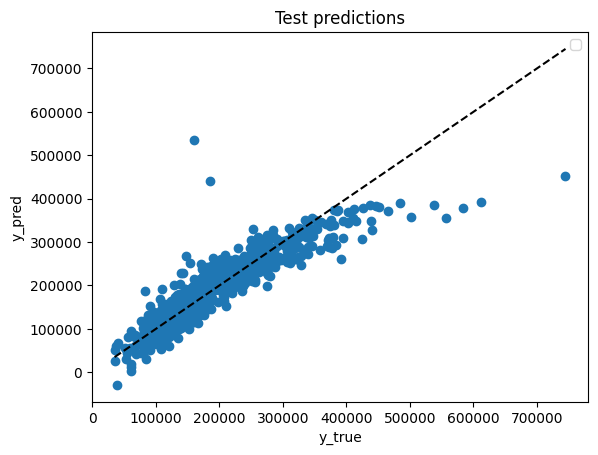

In [244]:
import matplotlib.pylab as plt
y_pred_cv = cross_val_predict(gb_best_model, X_train, y_train, cv=5)
plt.scatter(y_train,y_pred)

plt.legend()
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra

plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title('Test predictions')

Seguim amb que el millor model és el 8 o 9.

## Model 11

Model 11:De moement em borrat BSMT i remodelat. Afegim el any construit i el any remodelat. Afegim la quantitat de metres totals. Treiem main road, estacio aprop. Treiem garage condition. Treiem els lababos del sotano. Afegim Area Garatges.

In [245]:
columnas_seleccionadas =['MSSubClass','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                         'TotRmsAbvGrd','GarageCars','CentralAir','1stFlrSF','2ndFlrSF','TotalBsmtSF','YearBuilt', 'YearRemodAdd',
                         'GarageArea']
X_train = X[columnas_seleccionadas]
y_train=y.copy()
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
## Data de la ultima modificacio
#X_train['Last_mod'] = X[['YearBuilt', 'YearRemodAdd']].max(axis=1)
X_train['Total_bath'] = X['FullBath'] + 0.5*X['HalfBath']

## Funcio per crear si és posterior a 2008

X_train['Total_area'] = X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF']


X_train['GarageQual'] = X['GarageQual'].map(calificacio_a_numero)
X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row
def air_condition_to_numeric(value):
    map = {'Y': 1, 'N': 0}
    return map.get(value, -1)
X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)
X_train['MSSubClass'] = X_train['MSSubClass'].astype('category')

def functional_to_number(functionality):
    map = {
        'Typ': 0, 'Min1': 2, 'Min2': 3, 'Mod': 5,'Maj1': 7,'Maj2': 8,'Sev': 12,'Sal': 15
    }
    return map.get(functionality, -1)
X_train['damages'] = X['Functional'].map(functional_to_number)


<ipython-input-245-c6c2f9d36fac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-245-c6c2f9d36fac>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Total_bath'] = X['FullBath'] + 0.5*X['HalfBath']
<ipython-input-245-c6c2f9d36fac>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [246]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define which columns are numeric and which are categorical
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns

# Create a transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('Target Encoder', TargetEncoder()),
    ('scaler', StandardScaler())
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the complete pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
pipeline.fit(X_train,y_train)

transformed_data=pipeline.transform(X_train)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_train_transformed = pd.DataFrame(transformed_data, columns=new_column_names)

['LotArea' 'OverallQual' 'OverallCond' 'GrLivArea' 'BedroomAbvGr'
 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'YearBuilt' 'YearRemodAdd' 'GarageArea' 'Ext_Cal'
 'Total_bath' 'Total_area' 'GarageQual' 'KitchenQual' 'damages'
 'MSSubClass' 'Neighborhood']


In [247]:
X_train=X_train_transformed

In [248]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score


model = Ridge()
model.fit(X_train, y_train)

# Avaluar el model
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Error quadràtic mitjà: ", mse)
print("Error r2 mitjà: ", r2)

Error quadràtic mitjà:  1119784545.297179
Error r2 mitjà:  0.8151413766483053


In [249]:
coeficients = model.coef_
coeficients_ridge ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {coeficients[i]}")
    coeficients_ridge[X_train.columns[i]]=abs(coeficients[i])

LotArea: 4886.898226141689
OverallQual: 14581.017258240377
OverallCond: 6760.245385605839
GrLivArea: -3421.092333509767
BedroomAbvGr: -5004.521844406746
TotRmsAbvGrd: 5752.99850294496
GarageCars: 8445.00916619187
CentralAir: 1236.726137247681
1stFlrSF: 16941.822018339142
2ndFlrSF: 12380.263656482504
TotalBsmtSF: -2050.6527650869225
YearBuilt: 2460.3513541291236
YearRemodAdd: -669.8969506602061
GarageArea: 1739.9390599990957
Ext_Cal: 1975.8930530151356
Total_bath: -1307.0346330053414
Total_area: 13388.717006565348
GarageQual: -4110.762826830651
KitchenQual: 7867.3532934536215
damages: -2327.238475873103
MSSubClass: 3009.894058979325
Neighborhood: 19845.911282032772


In [250]:
param_grid = {
    'n_estimators': [50,100,250],  # Number of trees in the forest
    'max_depth': [12,15,18,20],         # Maximum number of levels in tree
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
rf_best_model= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_rf ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")
    importances_rf[X_train.columns[i]]=importances[i]

Best Parameters: {'max_depth': 18, 'n_estimators': 250}
Best Score: -29982.07557715162
LotArea: 0.018008938282711755
OverallQual: 0.25270375537353457
OverallCond: 0.009211927030428443
GrLivArea: 0.01737502077347605
BedroomAbvGr: 0.0029997644799455224
TotRmsAbvGrd: 0.008783240919643937
GarageCars: 0.0078229315714601
CentralAir: 0.002426395412388363
1stFlrSF: 0.010655822501825115
2ndFlrSF: 0.013647919532161495
TotalBsmtSF: 0.009421041772979689
YearBuilt: 0.016037195446095973
YearRemodAdd: 0.014029870884096598
GarageArea: 0.01451984273324726
Ext_Cal: 0.002768730998911297
Total_bath: 0.005965232207935171
Total_area: 0.4921783930660591
GarageQual: 0.0018317329297087405
KitchenQual: 0.008306673029444727
damages: 0.0015842278978539046
MSSubClass: 0.006671554903990801
Neighborhood: 0.08304978825210121


In [251]:
# Configuració dels paràmetres per a la cerca de graella
param_grid = {
    'n_estimators': [50,100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1,3, 5, 7]
}

# Creació del model de Gradient Boosting per a la cerca de graella
gb = xgb.XGBRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Entrenament del model amb la cerca de graella
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
gb_best_model= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_gb ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")
    importances_gb[X_train.columns[i]]=importances[i]

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: -29652.331944145204
LotArea: 0.009614413604140282
OverallQual: 0.30251824855804443
OverallCond: 0.0062163700349628925
GrLivArea: 0.010514031164348125
BedroomAbvGr: 0.00289563974365592
TotRmsAbvGrd: 0.021149074658751488
GarageCars: 0.07150033861398697
CentralAir: 0.022221265360713005
1stFlrSF: 0.007142765913158655
2ndFlrSF: 0.008974326774477959
TotalBsmtSF: 0.006128175184130669
YearBuilt: 0.008485694415867329
YearRemodAdd: 0.012964008376002312
GarageArea: 0.00524044968187809
Ext_Cal: 0.005232941824942827
Total_bath: 0.022678131237626076
Total_area: 0.28863900899887085
GarageQual: 0.019877290353178978
KitchenQual: 0.051303114742040634
damages: 0.003847899381071329
MSSubClass: 0.022696906700730324
Neighborhood: 0.09015990048646927


In [252]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

estimators = [
    ('ridge', Ridge()),
    ('rf', rf_best_model),
    ('gb', gb_best_model)
]
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=MLPRegressor(random_state=42),
    cv=5
)

scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))}


scores = cross_validate(stacking_regressor, X_train, y_train, cv=5,scoring=scoring)

r2_scores = scores['test_r2']
rmse_scores = scores['test_rmse']

# Imprimir los resultados
print(f'R^2 Scores: {np.mean(r2_scores)}')
print(f'RMSE Scores: {np.mean(rmse_scores)}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 Scores: 0.8534785569151854
RMSE Scores: 29400.73106711229


In [253]:
def show_worst_features(coefficients, n):
    sorted_features = sorted(coefficients.items(), key=lambda x: x[1])
    worst_n_features = sorted_features[:n]

    print(f"The {n} features with the smallest coefficients are:")
    for feature, coef in worst_n_features:
        print(f"{feature}: {coef}")
print("Features menys importants al random forest")
show_worst_features(importances_rf, n=5)
print("Features menys importants al gradient boosting")
show_worst_features(importances_gb, n=5)
print("Features menys importants al gradient boosting")

show_worst_features(coeficients_ridge, n=5)

Features menys importants al random forest
The 5 features with the smallest coefficients are:
damages: 0.0015842278978539046
GarageQual: 0.0018317329297087405
CentralAir: 0.002426395412388363
Ext_Cal: 0.002768730998911297
BedroomAbvGr: 0.0029997644799455224
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
BedroomAbvGr: 0.00289563974365592
damages: 0.003847899381071329
Ext_Cal: 0.005232941824942827
GarageArea: 0.00524044968187809
TotalBsmtSF: 0.006128175184130669
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
YearRemodAdd: 669.8969506602061
CentralAir: 1236.726137247681
Total_bath: 1307.0346330053414
GarageArea: 1739.9390599990957
Ext_Cal: 1975.8930530151356


Com podem area total serveix de bastant. Mentre que les altres variables en egenral totes tenen un efecte.

Text(0.5, 1.0, 'Test predictions')

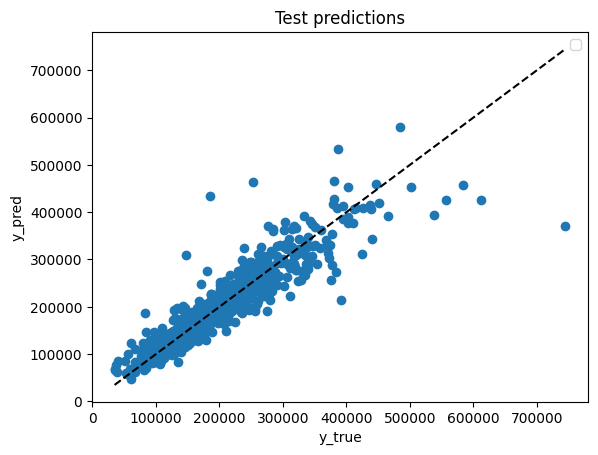

In [254]:
import matplotlib.pylab as plt
y_pred = cross_val_predict(gb_best_model, X_train, y_train, cv=5)
plt.scatter(y_train,y_pred)

plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra

plt.title('Test predictions')

## Test

Provem amb el test

In [255]:
columnas_seleccionadas =['MSSubClass','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                         'TotRmsAbvGrd','GarageCars','CentralAir','1stFlrSF','2ndFlrSF','TotalBsmtSF','MSZoning','HouseStyle',
                         'Foundation','FullBath']
X_train = X_test[columnas_seleccionadas]
y_train=y.copy()
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
X_train['Ext_Cal'] = X_test['ExterQual'].map(calificacio_a_numero) + X_test['ExterCond'].map(calificacio_a_numero)
## Data de la ultima modificacio
X_train['Last_mod'] = X_test[['YearBuilt', 'YearRemodAdd']].max(axis=1)
X_train['bath_oGr'] = X_test['FullBath'] + 0.5*X_test['HalfBath']
X_train['bath_BSMT']=X_test['BsmtFullBath'] + 0.5*X_test['BsmtHalfBath']

## Funcio per crear si és posterior a 2008
def pre_or_post_2008(row):
      return row['YrSold'] - 2008 + (row['MoSold'] - 9)/12

X_train['pre_or_post_2008'] = X_test.apply(pre_or_post_2008, axis=1)

X_train['GarageCal'] = X_test['GarageQual'].map(calificacio_a_numero)+X_test['GarageCond'].map(calificacio_a_numero)
X_train['KitchenQual'] = X_test['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row


def air_condition_to_numeric(value):
    map = {'Y': 1, 'N': 0}
    return map.get(value, -1)
X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)
X_train['MSSubClass'] = X_train['MSSubClass'].astype('category')

def good_position(row):
    if (row['Condition1'] != 'Norm' or row['Condition2'] != 'Norm'):
        return '1'
    else:
        return '0'
X_train['good_position'] = X_test.apply(good_position, axis=1)


<ipython-input-255-ed7d07936090>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X_test['ExterQual'].map(calificacio_a_numero) + X_test['ExterCond'].map(calificacio_a_numero)
<ipython-input-255-ed7d07936090>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Last_mod'] = X_test[['YearBuilt', 'YearRemodAdd']].max(axis=1)
<ipython-input-255-ed7d07936090>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [256]:
transformed_data=pipeline_9.transform(X_train)
print(transformed_data)
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns
new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_train_transformed = pd.DataFrame(transformed_data, columns=new_column_names)

[[ 0.1296347  -1.52538812 -2.30544545 ... -0.35462219 -0.83143493
   0.40129017]
 [-0.00586642 -0.07924094 -0.51920314 ... -0.35462219  1.11674454
  -2.49196239]
 [-0.33169138 -0.80231453  2.16016033 ... -1.32055091 -0.78855582
   0.40129017]
 ...
 [ 0.06816032  1.36690624 -0.51920314 ...  1.37828897  1.11674454
   0.40129017]
 [-0.68036807 -0.07924094  2.16016033 ... -1.6757437  -0.78855582
  -2.49196239]
 [-0.02818173 -0.07924094 -0.51920314 ...  1.37828897  1.11674454
   0.40129017]]
['LotArea' 'OverallQual' 'OverallCond' 'GrLivArea' 'BedroomAbvGr'
 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'FullBath' 'Ext_Cal' 'Last_mod' 'bath_oGr' 'bath_BSMT'
 'pre_or_post_2008' 'GarageCal' 'KitchenQual' 'MSSubClass' 'Neighborhood'
 'MSZoning' 'HouseStyle' 'Foundation' 'good_position']


In [257]:
X_test=X_train_transformed.copy()

In [258]:
X_test.head(200)

LotArea  OverallQual  OverallCond  GrLivArea  BedroomAbvGr  \
0    0.129635    -1.525388    -2.305445  -1.272715      0.155105   
1   -0.005866    -0.079241    -0.519203  -0.379487      0.155105   
2   -0.331691    -0.802315     2.160160  -1.418742     -1.052644   
3   -0.460434    -1.525388     1.267039  -1.166514     -1.052644   
4   -0.146732     0.643833    -0.519203   0.394265      0.155105   
..        ...          ...          ...        ...           ...   
195  0.175982     1.366906    -0.519203   0.121176      0.155105   
196  2.732372     2.813053    -0.519203   4.003212      1.362854   
197  1.248619    -0.802315    -0.519203   0.610461      1.362854   
198  0.732577    -1.525388    -1.412324   0.136348      1.362854   
199  0.054535     0.643833     2.160160   1.968320      0.155105   

     TotRmsAbvGrd  GarageCars  CentralAir  1stFlrSF  2ndFlrSF  ...  bath_BSMT  \
0       -0.936768   -1.016888   -3.930738 -0.827777 -0.795829  ...  -0.871532   
1       -0.326537    0.314642    0.254405  0.400913 -0.795829  ...  -0.871532   
2       -0.936768   -1.016888    0.254405 -1.028646 -0.795829  ...   0.101651   
3       -1.546999   -1.016888    0.254405 -0.681691 -0.795829  ...  -0.871532   
4        0.893926    0.314642    0.254405 -0.736473  1.137553  ...  -0.871532   
..            ...         ...         ...       ...       ...  ...        ...   
195      0.283695    1.646172    0.254405  1.089606 -0.795829  ...  -0.871532   
196      2.114389    1.646172    0.254405  1.744386  3.318336  ...   1.074834   
197      0.283695    0.314642    0.254405 -1.117341  1.733145  ...  -0.871532   
198      0.283695    0.314642    0.254405 -0.110389  0.276236  ...  -0.871532   
199      0.893926    0.314642    0.254405  1.079172  1.444512  ...  -0.871532   

     pre_or_post_2008  GarageCal  KitchenQual  MSSubClass  Neighborhood  \
0            0.552308   0.274506    -0.759075    0.021311     -0.975386   
1           -1.170159   0.274506     0.751317    0.021311      0.254144   
2            0.743693   0.274506    -0.759075   -0.349455      0.408934   
3            0.233333  -0.404780    -0.759075    0.021311     -1.097784   
4            0.169538   0.274506     0.751317    1.542958      0.408934   
..                ...        ...          ...         ...           ...   
195          0.105743   0.274506     0.751317    0.021311      0.914103   
196         -1.361545   0.274506     0.751317    1.542958      2.041926   
197         -1.361545   0.274506    -0.759075    1.542958      0.254144   
198          0.169538   0.274506    -0.759075   -0.940326      0.291416   
199         -0.596003   0.274506    -0.759075   -0.379510     -1.097784   

     MSZoning  HouseStyle  Foundation  good_position  
0    0.370656   -0.354622   -0.831435       0.401290  
1    0.370656   -0.354622    1.116745      -2.491962  
2    0.370656   -1.320551   -0.788556       0.401290  
3   -2.351106   -0.354622   -0.788556       0.401290  
4    0.370656    1.378289    1.116745       0.401290  
..        ...         ...         ...            ...  
195  0.370656   -0.354622    1.116745      -2.491962  
196  0.370656    1.378289    1.116745       0.401290  
197  0.370656    1.378289    1.116745      -2.491962  
198  0.370656   -1.675744   -0.788556      -2.491962  
199 -2.351106    1.378289   -1.299174       0.401290  

[200 rows x 25 columns]

In [259]:
y_pred = stacking_regressor_9.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE: ", -np.sqrt(mse))
print("Error r2 mitjà: ", r2)

RMSE:  -26153.619057949545
Error r2 mitjà:  0.906248061457862


Text(0.5, 1.0, 'Test predictions')

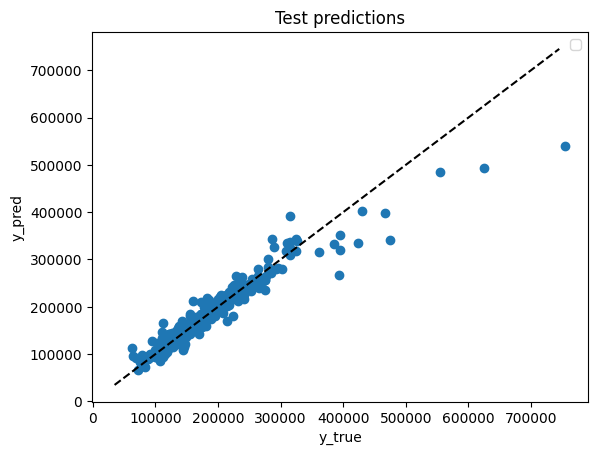

In [260]:

plt.scatter(y_test,y_pred)

plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra

plt.title('Test predictions')

Provem a veure quines son les features més rellevants en les cases més cares.

## Lime

In [261]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Define which columns are numeric and which are categorical
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(exclude=['number']).columns

# Create a transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('Target Encoder', TargetEncoder()),
    ('scaler', StandardScaler())
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the complete pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
pipeline.fit(X,y)

transformed_data=pipeline.transform(X)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X = pd.DataFrame(transformed_data, columns=new_column_names)

['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleTy

In [262]:
def get_percentage_nan_per_column(df):
  #retorna un df amb el % de nans de cada columna
  return df.isna().sum().sort_values()/len(df)*100.

percentage_nan = get_percentage_nan_per_column(X)
percentage_nan

Id              0.0
Foundation      0.0
ExterCond       0.0
ExterQual       0.0
MasVnrType      0.0
               ... 
TotRmsAbvGrd    0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
Alley           0.0
post_crisis     0.0
Length: 81, dtype: float64

In [263]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=3cb76e0a59d1d69d9faadc1f6abdbfb7d29950c49649191d21f320c4dfe838a5
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [264]:
X.head(5)

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -0.196556   -0.882205     0.779812  0.172549     0.643833    -0.519203   
1  0.998888   -0.882205     0.151325  0.045094    -0.802315    -0.519203   
2  0.179565    0.073543    -1.648432  0.205271    -0.079241     2.160160   
3 -0.340297    0.073543     0.722677  0.307621     0.643833    -0.519203   
4  1.521146    0.312480    -0.220053 -0.540897     1.366906    -0.519203   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageFinish  \
0   0.192363     -0.381310    0.593500    0.835208  ...      1.383178   
1   0.657470      0.346339   -0.565312   -0.494193  ...     -1.782659   
2  -0.173078      1.073989    0.305183    0.281654  ...      1.383178   
3   1.255465      1.171009   -0.565312   -0.956214  ...      0.483545   
4  -3.295940      0.103790   -0.565312   -0.391764  ...     -1.782659   

   GarageQual  GarageCond  PavedDrive   PoolQC     Fence  MiscFeature  \
0    0.309984    0.303725    0.284434 -0.05154  0.454937     0.198249   
1   -3.595115   -3.702548    0.284434 -0.05154 -2.219979     0.198249   
2    0.309984    0.303725    0.284434 -0.05154  0.454937     0.198249   
3    0.309984    0.303725    0.284434 -0.05154  0.454937     0.198249   
4   -3.595115   -3.702548    0.284434 -0.05154  0.454937     0.198249   

   SaleType  SaleCondition  post_crisis  
0 -0.270574      -0.330701     1.218649  
1 -0.316759      -1.104610    -0.820581  
2 -0.270574      -0.221308    -0.820581  
3  3.301876       3.214803     1.218649  
4 -0.270574      -0.221308     1.218649  

[5 rows x 81 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


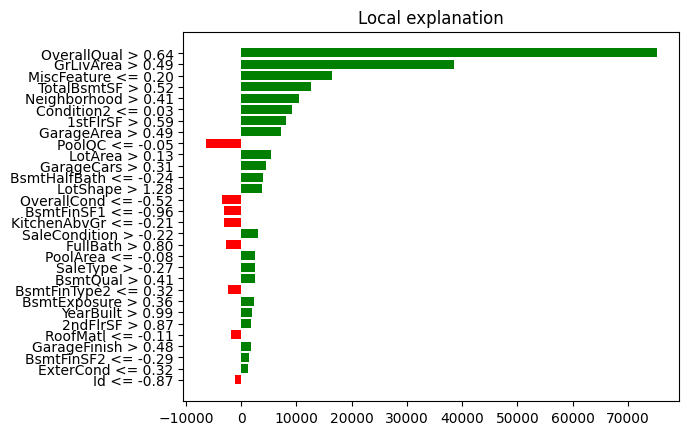

In [265]:
import lime
import lime.lime_tabular
import numpy as np

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X),  # Use training data here
    feature_names=X.columns,  # Make sure X_train has columns attribute
    class_names=['Price'],
    mode='regression'
)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X, y)
num_features = 30
# Choose a specific instance to explain
idx = np.where(y > 350000)[0]
if len(idx) > 0:
    instance_index = idx[0]  # Choose the first instance for simplicity
    instance = X.iloc[instance_index]

    # Generate explanation for the chosen instance
    exp = explainer.explain_instance(
        data_row=instance.values,  # Convert to numpy array
        predict_fn=random_forest_model.predict,  # Make sure reg is your trained model
        num_features=num_features
    )

    # Displaying the explanation
    fig = exp.as_pyplot_figure()
    fig.show()
else:
    print("No instances found with y_train > 350000")


Podem veure que BSMT, condition2 i garage type, poden tenir sentit. podem provar la piscina ja que segurament només les cases cares la tenen.

## Model 12


In [266]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(df.drop('SalePrice',axis=1),
                                                    df['SalePrice'], test_size=0.20,
                                                    random_state=111)

In [267]:
columnas_seleccionadas =['MSSubClass','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                         'TotRmsAbvGrd','GarageCars','CentralAir','1stFlrSF','2ndFlrSF','TotalBsmtSF','MSZoning','HouseStyle',
                         'FullBath','YearBuilt','YearRemodAdd','GarageArea','MasVnrArea']
X_train = X[columnas_seleccionadas]
y_train=y.copy()
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
## Data de la ultima modificacio
X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
X_train['bath_BSMT']=X['BsmtFullBath'] + 0.5*X['BsmtHalfBath']
X_train['Total_area'] = X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF']

## Funcio per crear si és posterior a 2008
def pre_or_post_2008(row):
      return row['YrSold'] - 2008 + (row['MoSold'] - 9)/12

#X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)

X_train['GarageCal'] = X['GarageQual'].map(calificacio_a_numero)+X['GarageCond'].map(calificacio_a_numero)
X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row


def air_condition_to_numeric(value):
    map = {'Y': 1, 'N': 0}
    return map.get(value, -1)
X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)
X_train['MSSubClass'] = X_train['MSSubClass'].astype('category')

def good_position(row):
    if (row['Condition1'] != 'Norm' or row['Condition2'] != 'Norm'):
        return '1'
    else:
        return '0'
X_train['good_position'] = X.apply(good_position, axis=1)


<ipython-input-267-089afe6ecf23>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-267-089afe6ecf23>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
<ipython-input-267-089afe6ecf23>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [268]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define which columns are numeric and which are categorical
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns

# Create a transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('Target Encoder', TargetEncoder()),
    ('scaler', StandardScaler())
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the complete pipeline
pipeline_11 = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
pipeline_11.fit(X_train,y_train)

transformed_data=pipeline_11.transform(X_train)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_train_transformed = pd.DataFrame(transformed_data, columns=new_column_names)

['LotArea' 'OverallQual' 'OverallCond' 'GrLivArea' 'BedroomAbvGr'
 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'FullBath' 'YearBuilt' 'YearRemodAdd' 'GarageArea'
 'MasVnrArea' 'Ext_Cal' 'bath_oGr' 'bath_BSMT' 'Total_area' 'GarageCal'
 'KitchenQual' 'MSSubClass' 'Neighborhood' 'MSZoning' 'HouseStyle'
 'good_position']


In [269]:
def get_percentage_nan_per_column(df):
  #retorna un df amb el % de nans de cada columna
  return df.isna().sum().sort_values()/len(df)*100.

percentage_nan = get_percentage_nan_per_column(X_train_transformed)
percentage_nan

LotArea          0.0
MSZoning         0.0
Neighborhood     0.0
MSSubClass       0.0
KitchenQual      0.0
GarageCal        0.0
Total_area       0.0
bath_BSMT        0.0
bath_oGr         0.0
Ext_Cal          0.0
MasVnrArea       0.0
GarageArea       0.0
HouseStyle       0.0
YearRemodAdd     0.0
FullBath         0.0
TotalBsmtSF      0.0
2ndFlrSF         0.0
1stFlrSF         0.0
CentralAir       0.0
GarageCars       0.0
TotRmsAbvGrd     0.0
BedroomAbvGr     0.0
GrLivArea        0.0
OverallCond      0.0
OverallQual      0.0
YearBuilt        0.0
good_position    0.0
dtype: float64

In [270]:
X_train=X_train_transformed.copy()

In [271]:
def get_percentage_nan_per_column(df):
  #retorna un df amb el % de nans de cada columna
  return df.isna().sum().sort_values()/len(df)*100.

percentage_nan = get_percentage_nan_per_column(X_train)
percentage_nan

LotArea          0.0
MSZoning         0.0
Neighborhood     0.0
MSSubClass       0.0
KitchenQual      0.0
GarageCal        0.0
Total_area       0.0
bath_BSMT        0.0
bath_oGr         0.0
Ext_Cal          0.0
MasVnrArea       0.0
GarageArea       0.0
HouseStyle       0.0
YearRemodAdd     0.0
FullBath         0.0
TotalBsmtSF      0.0
2ndFlrSF         0.0
1stFlrSF         0.0
CentralAir       0.0
GarageCars       0.0
TotRmsAbvGrd     0.0
BedroomAbvGr     0.0
GrLivArea        0.0
OverallCond      0.0
OverallQual      0.0
YearBuilt        0.0
good_position    0.0
dtype: float64

In [272]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score


model = Ridge()
model.fit(X_train, y_train)

# Avaluar el model
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Error quadràtic mitjà: ", mse)
print("Error r2 mitjà: ", r2)

Error quadràtic mitjà:  1056610299.2433413
Error r2 mitjà:  0.8255704401729268


In [273]:
coeficients = model.coef_
coeficients_ridge ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {coeficients[i]}")
    coeficients_ridge[X_train.columns[i]]=abs(coeficients[i])

LotArea: 3909.827764826119
OverallQual: 16511.79989972029
OverallCond: 6690.095066201875
GrLivArea: -5724.526719002448
BedroomAbvGr: -4424.208646344073
TotRmsAbvGrd: 6668.666084345491
GarageCars: 9389.235282508263
CentralAir: 673.3490063841869
1stFlrSF: 15860.991348259538
2ndFlrSF: 13966.226823219491
TotalBsmtSF: -3307.4612528794196
FullBath: -3239.509328023355
YearBuilt: 422.34146004421774
YearRemodAdd: -344.2133455109245
GarageArea: 1314.450394381455
MasVnrArea: 2293.8586509528777
Ext_Cal: 1703.6625234415046
bath_oGr: 4344.317631527697
bath_BSMT: 6388.574151347128
Total_area: 13060.302775684639
GarageCal: -4382.839508446966
KitchenQual: 7041.340976416112
MSSubClass: 3885.0914600745364
Neighborhood: 18561.759018910958
MSZoning: 2111.297825780974
HouseStyle: -4747.444937955346
good_position: 4178.98878414446


In [274]:
param_grid = {
    'n_estimators': [50,100,250,500],  # Number of trees in the forest
    'max_depth': [18,20,25],         # Maximum number of levels in tree
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
rf_best_model= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_rf ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")
    importances_rf[X_train.columns[i]]=importances[i]

Best Parameters: {'max_depth': 20, 'n_estimators': 250}
Best Score: -29499.366973591183
LotArea: 0.016375770682952585
OverallQual: 0.2520414295401166
OverallCond: 0.008955695258990811
GrLivArea: 0.01601535533100409
BedroomAbvGr: 0.0028396928185701865
TotRmsAbvGrd: 0.008381060210479399
GarageCars: 0.007386878125473336
CentralAir: 0.0022680526448940696
1stFlrSF: 0.009116185890921634
2ndFlrSF: 0.013092661386728722
TotalBsmtSF: 0.009281910748723669
FullBath: 0.0007995164821828558
YearBuilt: 0.014609394619242693
YearRemodAdd: 0.013764141781578226
GarageArea: 0.012470818921115815
MasVnrArea: 0.006368483812991598
Ext_Cal: 0.002642814143477557
bath_oGr: 0.005305926327690296
bath_BSMT: 0.005607520378560137
Total_area: 0.4912981332072228
GarageCal: 0.0026959151110114315
KitchenQual: 0.0079779042539371
MSSubClass: 0.005865468020991881
Neighborhood: 0.08164086044999179
MSZoning: 0.00136868059207727
HouseStyle: 0.0009669149760594239
good_position: 0.0008628142830140191


In [275]:
# Configuració dels paràmetres per a la cerca de graella
param_grid = {
    'n_estimators': [200,300,500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1,3, 5]
}

# Creació del model de Gradient Boosting per a la cerca de graella
gb = xgb.XGBRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Entrenament del model amb la cerca de graella
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
gb_best_model= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_gb ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")
    importances_gb[X_train.columns[i]]=importances[i]

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Score: -27900.569594611337
LotArea: 0.005634768400341272
OverallQual: 0.2700641453266144
OverallCond: 0.010293043218553066
GrLivArea: 0.007896644063293934
BedroomAbvGr: 0.005337846465408802
TotRmsAbvGrd: 0.004812800791114569
GarageCars: 0.03348662331700325
CentralAir: 0.027158768847584724
1stFlrSF: 0.002787708304822445
2ndFlrSF: 0.010496139526367188
TotalBsmtSF: 0.0037205731496214867
FullBath: 0.011448103003203869
YearBuilt: 0.008357960730791092
YearRemodAdd: 0.008221684955060482
GarageArea: 0.005766726564615965
MasVnrArea: 0.0033769633155316114
Ext_Cal: 0.003551741596311331
bath_oGr: 0.0184886883944273
bath_BSMT: 0.016582194715738297
Total_area: 0.37360912561416626
GarageCal: 0.008299166336655617
KitchenQual: 0.05180021747946739
MSSubClass: 0.016059689223766327
Neighborhood: 0.06819798797369003
MSZoning: 0.011748217046260834
HouseStyle: 0.002176182111725211
good_position: 0.01062626950442791


In [276]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

estimators = [
    ('ridge', Ridge()),
    ('rf', rf_best_model),
    ('gb', gb_best_model)
]
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=MLPRegressor(random_state=42),
    cv=5
)

# Entrenar el model d'apilament
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))}


scores = cross_validate(stacking_regressor, X_train, y_train, cv=5,scoring=scoring)

r2_scores = scores['test_r2']
rmse_scores = scores['test_rmse']

# Imprimir los resultados
print(f'R^2 Scores: {np.mean(r2_scores)}')
print(f'RMSE Scores: {np.mean(rmse_scores)}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 Scores: 0.8672843202669858
RMSE Scores: 27930.346571566515


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [277]:
def show_worst_features(coefficients, n):
    sorted_features = sorted(coefficients.items(), key=lambda x: x[1])
    worst_n_features = sorted_features[:n]

    print(f"The {n} features with the smallest coefficients are:")
    for feature, coef in worst_n_features:
        print(f"{feature}: {coef}")
print("Features menys importants al random forest")
show_worst_features(importances_rf, n=5)
print("Features menys importants al gradient boosting")
show_worst_features(importances_gb, n=5)
print("Features menys importants al gradient boosting")

show_worst_features(coeficients_ridge, n=5)

Features menys importants al random forest
The 5 features with the smallest coefficients are:
FullBath: 0.0007995164821828558
good_position: 0.0008628142830140191
HouseStyle: 0.0009669149760594239
MSZoning: 0.00136868059207727
CentralAir: 0.0022680526448940696
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
HouseStyle: 0.002176182111725211
1stFlrSF: 0.002787708304822445
MasVnrArea: 0.0033769633155316114
Ext_Cal: 0.003551741596311331
TotalBsmtSF: 0.0037205731496214867
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
YearRemodAdd: 344.2133455109245
YearBuilt: 422.34146004421774
CentralAir: 673.3490063841869
GarageArea: 1314.450394381455
Ext_Cal: 1703.6625234415046


Text(0.5, 1.0, 'Test predictions')

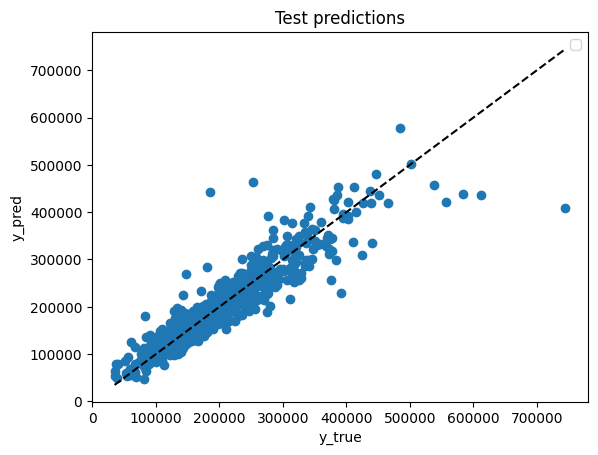

In [278]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

y_pred_12 = cross_val_predict(gb_best_model, X_train, y_train, cv=5)

plt.scatter(y_train,y_pred_12)

y_error=abs(y_train-y_pred_12)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train,y_pred)

# Calculate R^2 Score
r2 = r2_score(y_train,y_pred)

plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra
plt.title('Test predictions')

## Model 13

Model 13: Afegim BldgType, heating, el tipus d'exterior i el en cas de tenir coses extres el seu valor.




In [279]:
columnas_seleccionadas =['MSSubClass','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                         'TotRmsAbvGrd','GarageCars','CentralAir','1stFlrSF','2ndFlrSF','TotalBsmtSF','MSZoning','HouseStyle',
                         'FullBath','YearBuilt','YearRemodAdd','GarageArea','MasVnrArea','BldgType','Exterior1st','MiscVal']
X_train = X[columnas_seleccionadas]
y_train=y.copy()
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
## Data de la ultima modificacio
X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
X_train['bath_BSMT']=X['BsmtFullBath'] + 0.5*X['BsmtHalfBath']
X_train['Total_area'] = X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF']

X_train['HeatingQC'] = X['HeatingQC'].map(calificacio_a_numero)

## Funcio per crear si és posterior a 2008
def pre_or_post_2008(row):
      return row['YrSold'] - 2008 + (row['MoSold'] - 9)/12

X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)

X_train['GarageCal'] = X['GarageQual'].map(calificacio_a_numero)+X['GarageCond'].map(calificacio_a_numero)
X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row


def air_condition_to_numeric(value):
    map = {'Y': 1, 'N': 0}
    return map.get(value, -1)
X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)
X_train['MSSubClass'] = X_train['MSSubClass'].astype('category')

def good_position(row):
    if (row['Condition1'] != 'Norm' or row['Condition2'] != 'Norm'):
        return '1'
    else:
        return '0'
X_train['good_position'] = X.apply(good_position, axis=1)


<ipython-input-279-c2cdfee0bf27>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-279-c2cdfee0bf27>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
<ipython-input-279-c2cdfee0bf27>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [280]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define which columns are numeric and which are categorical
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns

# Create a transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('Target Encoder', TargetEncoder()),
    ('scaler', StandardScaler())
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the complete pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
pipeline.fit(X_train,y_train)

transformed_data=pipeline.transform(X_train)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_train_transformed = pd.DataFrame(transformed_data, columns=new_column_names)

['LotArea' 'OverallQual' 'OverallCond' 'GrLivArea' 'BedroomAbvGr'
 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'FullBath' 'YearBuilt' 'YearRemodAdd' 'GarageArea'
 'MasVnrArea' 'MiscVal' 'Ext_Cal' 'bath_oGr' 'bath_BSMT' 'Total_area'
 'HeatingQC' 'pre_or_post_2008' 'GarageCal' 'KitchenQual' 'MSSubClass'
 'Neighborhood' 'MSZoning' 'HouseStyle' 'BldgType' 'Exterior1st'
 'good_position']


In [281]:
X_train=X_train_transformed.copy()

In [282]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score


model = Ridge()
model.fit(X_train, y_train)

# Avaluar el model
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Error quadràtic mitjà: ", mse)
print("Error r2 mitjà: ", r2)

Error quadràtic mitjà:  1019478674.0316187
Error r2 mitjà:  0.8317002810858753


In [283]:
coeficients = model.coef_
coeficients_ridge ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {coeficients[i]}")
    coeficients_ridge[X_train.columns[i]]=abs(coeficients[i])

LotArea: 3726.1693304423443
OverallQual: 15594.347916211274
OverallCond: 7331.722737554559
GrLivArea: -5125.208217200388
BedroomAbvGr: -3866.380429234454
TotRmsAbvGrd: 7506.963600203044
GarageCars: 8797.417449477725
CentralAir: -138.44336822259746
1stFlrSF: 16755.98038275369
2ndFlrSF: 13233.303563576583
TotalBsmtSF: -4599.018946032179
FullBath: -3845.035294517853
YearBuilt: 2428.477106642167
YearRemodAdd: -1858.2884582449387
GarageArea: 1175.2517739889279
MasVnrArea: 2728.7960216627416
MiscVal: 795.895703662942
Ext_Cal: 783.6288004311774
bath_oGr: 6550.510821487849
bath_BSMT: 7613.135643726992
Total_area: 12403.354124231053
HeatingQC: 1234.946337949179
pre_or_post_2008: -291.5168805928473
GarageCal: -4191.498592161201
KitchenQual: 6236.603621922682
MSSubClass: -249.73945505928083
Neighborhood: 18673.611225614663
MSZoning: 1706.313571641782
HouseStyle: -3180.3277844107574
BldgType: 6414.123256347699
Exterior1st: 3145.819495193723
good_position: 4174.291886133368


In [284]:
param_grid = {
    'n_estimators': [500,750,1000],  # Number of trees in the forest
    'max_depth': [15,18,20],         # Maximum number of levels in tree
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
rf_best_model= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_rf ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")
    importances_rf[X_train.columns[i]]=importances[i]

Best Parameters: {'max_depth': 18, 'n_estimators': 1000}
Best Score: -29653.729304250563
LotArea: 0.015380449511564224
OverallQual: 0.23894754812890365
OverallCond: 0.008173209919073646
GrLivArea: 0.015567453768861683
BedroomAbvGr: 0.002497862585152333
TotRmsAbvGrd: 0.008087703624028388
GarageCars: 0.00955886471527243
CentralAir: 0.002216051667245415
1stFlrSF: 0.008568715214732956
2ndFlrSF: 0.014263217758454627
TotalBsmtSF: 0.008398099614968341
FullBath: 0.0010493609753404033
YearBuilt: 0.013433996149897787
YearRemodAdd: 0.012575729365138458
GarageArea: 0.011212684576912033
MasVnrArea: 0.005890419220794108
MiscVal: 0.00010193617525961153
Ext_Cal: 0.002558968309511299
bath_oGr: 0.004642240876783788
bath_BSMT: 0.005298176680492472
Total_area: 0.5009229367238138
HeatingQC: 0.0013957809075755261
pre_or_post_2008: 0.006018076819899246
GarageCal: 0.0023657258008044813
KitchenQual: 0.008144862821706967
MSSubClass: 0.0051164536179198914
Neighborhood: 0.07920692339203828
MSZoning: 0.00125213993

In [285]:
# Configuració dels paràmetres per a la cerca de graella
param_grid = {
    'n_estimators': [50,100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1,3, 5, 7]
}

# Creació del model de Gradient Boosting per a la cerca de graella
gb = xgb.XGBRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Entrenament del model amb la cerca de graella
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
gb_best_model= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_gb ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")
    importances_gb[X_train.columns[i]]=importances[i]

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Best Score: -27827.134661232492
LotArea: 0.008943927474319935
OverallQual: 0.3009415864944458
OverallCond: 0.0110892029479146
GrLivArea: 0.009954752400517464
BedroomAbvGr: 0.008255268447101116
TotRmsAbvGrd: 0.017510073259472847
GarageCars: 0.025660749524831772
CentralAir: 0.021115800365805626
1stFlrSF: 0.003348050406202674
2ndFlrSF: 0.010730968788266182
TotalBsmtSF: 0.005151678342372179
FullBath: 0.0042144195176661015
YearBuilt: 0.0074617741629481316
YearRemodAdd: 0.009631196968257427
GarageArea: 0.0058204117231070995
MasVnrArea: 0.004191100597381592
MiscVal: 0.0006266466225497425
Ext_Cal: 0.0018940805457532406
bath_oGr: 0.02410241775214672
bath_BSMT: 0.01568332128226757
Total_area: 0.3303893208503723
HeatingQC: 0.002883919281885028
pre_or_post_2008: 0.0030537524726241827
GarageCal: 0.011253816075623035
KitchenQual: 0.046219851821660995
MSSubClass: 0.011854790151119232
Neighborhood: 0.07670243084430695
MSZoning

In [286]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

estimators = [
    ('ridge', Ridge()),
    ('rf', rf_best_model),
    ('gb', gb_best_model)
]
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=MLPRegressor(random_state=42),
    cv=5
)

# Entrenar el model d'apilament
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))}


scores = cross_validate(stacking_regressor, X_train, y_train, cv=5,scoring=scoring)

r2_scores = scores['test_r2']
rmse_scores = scores['test_rmse']

# Imprimir los resultados
print(f'R^2 Scores: {np.mean(r2_scores)}')
print(f'RMSE Scores: {np.mean(rmse_scores)}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 Scores: 0.8665159932116401
RMSE Scores: 27994.337968132226


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [287]:
def show_worst_features(coefficients, n):
    sorted_features = sorted(coefficients.items(), key=lambda x: x[1])
    worst_n_features = sorted_features[:n]

    print(f"The {n} features with the smallest coefficients are:")
    for feature, coef in worst_n_features:
        print(f"{feature}: {coef}")
print("Features menys importants al random forest")
show_worst_features(importances_rf, n=5)
print("Features menys importants al gradient boosting")
show_worst_features(importances_gb, n=5)
print("Features menys importants al gradient boosting")

show_worst_features(coeficients_ridge, n=5)

Features menys importants al random forest
The 5 features with the smallest coefficients are:
MiscVal: 0.00010193617525961153
HouseStyle: 0.000844456106976186
good_position: 0.0009139926248779066
FullBath: 0.0010493609753404033
MSZoning: 0.0012521399373844248
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
MiscVal: 0.0006266466225497425
HouseStyle: 0.0016732019139453769
Ext_Cal: 0.0018940805457532406
HeatingQC: 0.002883919281885028
pre_or_post_2008: 0.0030537524726241827
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
CentralAir: 138.44336822259746
MSSubClass: 249.73945505928083
pre_or_post_2008: 291.5168805928473
Ext_Cal: 783.6288004311774
MiscVal: 795.895703662942


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 1.0, 'Test predictions')

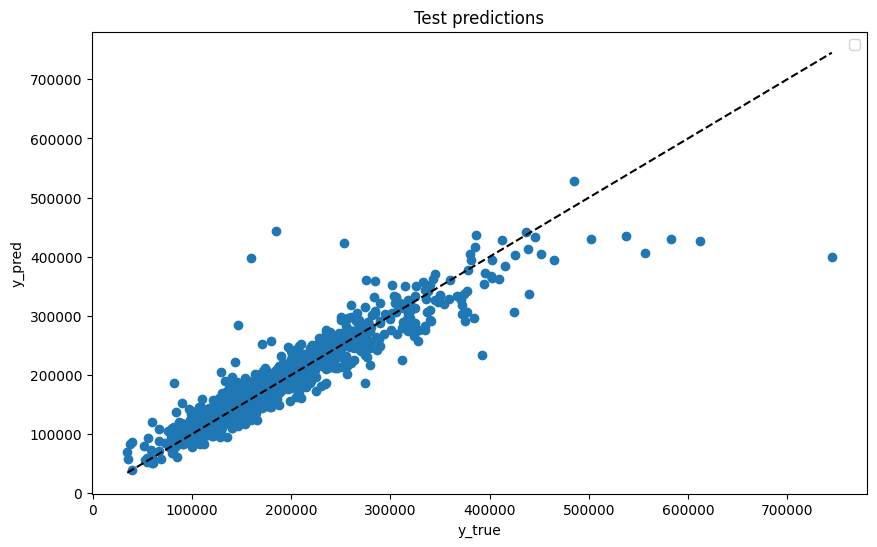

In [288]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

y_pred = cross_val_predict(stacking_regressor, X_train, y_train, cv=5)
index_barato = np.where(y_train < 4400)
index_car = np.where(y_train >= 4000)
## uela
# Create scatter plot for each category
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train,y_pred)

# Calculate R^2 Score
r2 = r2_score(y_train,y_pred)

plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')

plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra

plt.title('Test predictions')

Ara provarem amb les cases que he predit més cares quin és el problema. Tornarem a fer lime explainability.

## Lime explainability 2

In [289]:
X_train.head(10)

LotArea  OverallQual  OverallCond  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  \
0  0.172549     0.643833    -0.519203  -0.199324      0.155105     -0.326537   
1  0.045094    -0.802315    -0.519203  -1.028073      0.155105     -0.936768   
2  0.205271    -0.079241     2.160160   1.082677      2.570603      1.504158   
3  0.307621     0.643833    -0.519203   0.333579      0.155105     -0.326537   
4 -0.540897     1.366906    -0.519203   1.596615      1.362854      0.893926   
5 -0.479745    -2.248462     2.160160  -0.669644      0.155105     -0.326537   
6 -0.525985     1.366906    -0.519203   0.189449     -1.052644     -0.936768   
7  0.209455     1.366906    -0.519203   1.414556      1.362854      2.114389   
8 -0.164863     0.643833    -0.519203   1.031473      0.155105      0.893926   
9  0.709511    -0.802315     0.373918  -0.356729     -1.052644     -0.936768   

   GarageCars  CentralAir  1stFlrSF  2ndFlrSF  ...  pre_or_post_2008  \
0    0.314642    0.254405  0.648739 -0.795829  ...          0.743693   
1   -2.348418    0.254405 -0.491257 -0.795829  ...         -0.468413   
2    0.314642    0.254405 -0.486040  1.749180  ...         -0.596003   
3    0.314642    0.254405 -0.825169  1.142135  ...          0.935079   
4   -2.348418   -3.930738 -0.585170  1.987417  ...          0.488513   
5   -1.016888    0.254405  0.001785 -0.795829  ...         -1.361545   
6    0.314642    0.254405  1.183519 -0.795829  ...          1.445439   
7    1.646172    0.254405  0.833955  0.990946  ...          0.233333   
8    0.314642    0.254405 -0.366040  1.581956  ...          0.871284   
9   -1.016888    0.254405  0.432218 -0.795829  ...         -0.596003   

   GarageCal  KitchenQual  MSSubClass  Neighborhood  MSZoning  HouseStyle  \
0   0.274506    -0.759075    0.021311      0.201801  0.370656   -0.354622   
1  -3.801213    -0.759075    0.021311     -0.446636  0.370656   -0.354622   
2   0.274506     0.751317    1.542958      0.291416  0.370656    1.378289   
3   0.274506     0.751317    1.542958      0.850894  0.370656    1.378289   
4  -3.801213    -0.759075   -0.379510     -1.097784 -2.351106    1.378289   
5  -0.404780    -0.759075    0.021311     -1.097784 -2.351106   -0.354622   
6   0.274506     0.751317    0.480872      1.459229  0.370656   -0.354622   
7   0.274506     0.751317    1.542958      0.850894  0.370656    1.378289   
8   0.274506     0.751317    1.542958      0.254144  0.370656    1.378289   
9   0.274506    -0.759075    0.021311      0.850894  0.370656   -0.354622   

   BldgType  Exterior1st  good_position  
0  0.307227    -0.286699       0.401290  
1  0.307227    -0.793641       0.401290  
2  0.307227    -0.793641       0.401290  
3  0.307227     1.031773       0.401290  
4  0.307227    -0.971398       0.401290  
5  0.307227     1.031773       0.401290  
6  0.273549     2.027811       0.401290  
7  0.307227     1.031773       0.401290  
8  0.307227     1.031773      -2.491962  
9  0.307227     1.031773       0.401290  

[10 rows x 32 columns]

In [290]:
! pip install lime

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


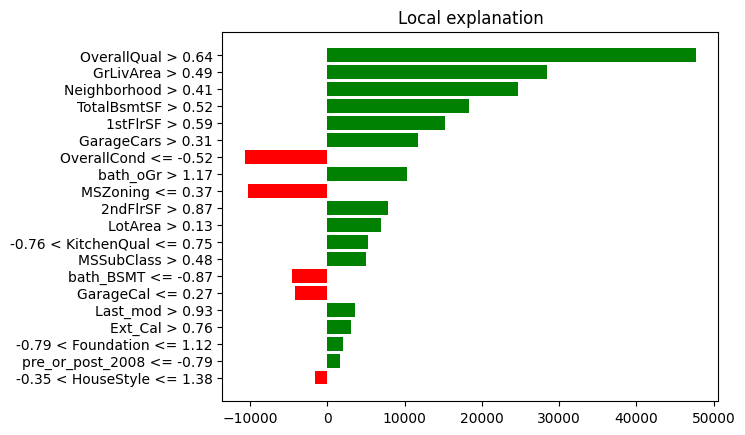

In [291]:
import lime
import lime.lime_tabular
import numpy as np

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_9),  # Use training data here
    feature_names=X_train_9.columns,  # Make sure X_train has columns attribute
    class_names=['Price'],
    mode='regression'
)

num_features = 20
# Choose a specific instance to explain
idx = np.where(y_train > 400000)[0]
if len(idx) > 0:
    instance_index = idx[0]  # Choose the first instance for simplicity
    instance = X_train_9.iloc[instance_index]

    # Generate explanation for the chosen instance
    exp = explainer.explain_instance(
        data_row=instance.values,  # Convert to numpy array
        predict_fn=stacking_regressor_9.predict,  # Make sure reg is your trained model
        num_features=num_features
    )

    # Displaying the explanation
    fig = exp.as_pyplot_figure()
    fig.show()
else:
    print("No instances found with y_train > 350000")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


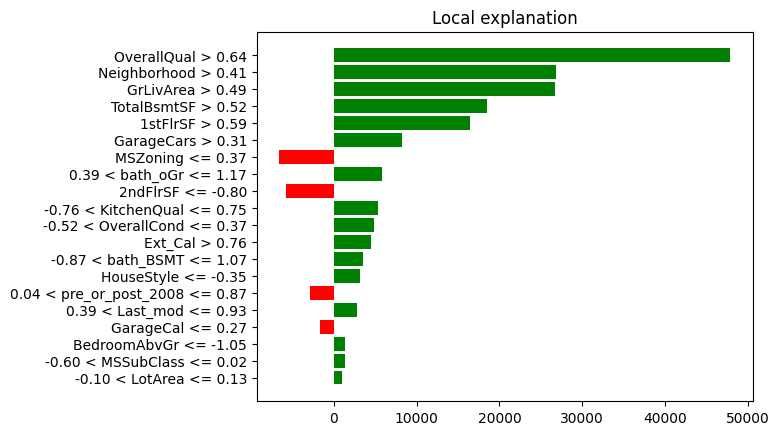

In [292]:
import lime
import lime.lime_tabular
import numpy as np

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_9),  # Use training data here
    feature_names=X_train_9.columns,  # Make sure X_train has columns attribute
    class_names=['Price'],
    mode='regression'
)

num_features = 20
# Choose a specific instance to explain
idx = np.where((y_pred_9 > 350000) & (y < 400000))[0]
if len(idx) > 0:
    instance_index = idx[0]  # Choose the first instance for simplicity
    instance = X_train_9.iloc[instance_index]

    # Generate explanation for the chosen instance
    exp = explainer.explain_instance(
        data_row=instance.values,  # Convert to numpy array
        predict_fn=stacking_regressor_9.predict,  # Make sure reg is your trained model
        num_features=num_features
    )

    # Displaying the explanation
    fig = exp.as_pyplot_figure()
    fig.show()
else:
    print("No instances found with y_train > 350000")


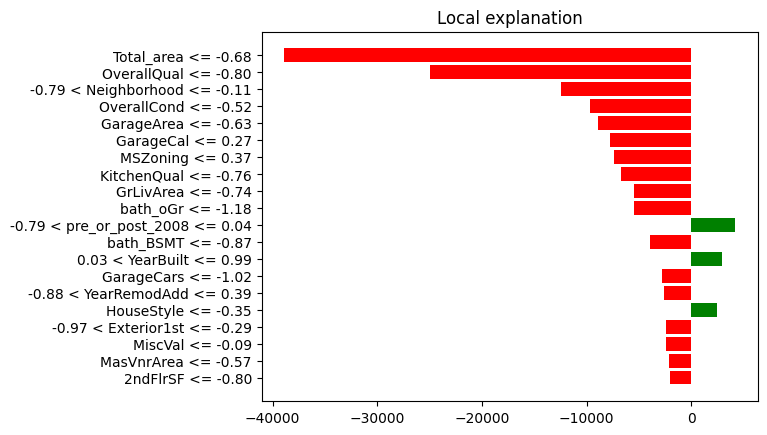

In [293]:
import lime
import lime.lime_tabular
import numpy as np

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),  # Use training data here
    feature_names=X_train.columns,  # Make sure X_train has columns attribute
    class_names=['Price'],
    mode='regression'
)

num_features = 20
# Choose a specific instance to explain
idx = np.where((y_pred < 150000))[0]
if len(idx) > 0:
    instance_index = idx[0]  # Choose the first instance for simplicity
    instance = X_train.iloc[instance_index]

    # Generate explanation for the chosen instance
    exp = explainer.explain_instance(
        data_row=instance.values,  # Convert to numpy array
        predict_fn=gb_best_model.predict,  # Make sure reg is your trained model
        num_features=num_features
    )

    # Displaying the explanation
    fig = exp.as_pyplot_figure()
    fig.show()
else:
    print("No instances found with y_train > 350000")


Provarem de treure les features

## Model 14

In [294]:
columnas_seleccionadas =['MSZoning','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                         'TotRmsAbvGrd','GarageCars','CentralAir','1stFlrSF','2ndFlrSF','TotalBsmtSF','HouseStyle',
                         'FullBath','YearBuilt','YearRemodAdd','GarageArea','MasVnrArea','Exterior1st','SaleType','SaleCondition','BsmtExposure']
X_train = X[columnas_seleccionadas]
y_train=y.copy()
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
## Data de la ultima modificacio
X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']

X_train['HeatingQC'] = X['HeatingQC'].map(calificacio_a_numero)

## Funcio per crear si és posterior a 2008
def pre_or_post_2008(row):
      return row['YrSold'] - 2008 + (row['MoSold'] - 9)/12

X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)

X_train['GarageQual'] = X['GarageQual'].map(calificacio_a_numero)
X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row


def air_condition_to_numeric(value):
    map = {'Y': 1, 'N': 0}
    return map.get(value, -1)
X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)

def good_position(row):
    if (row['Condition1'] != 'Norm' or row['Condition2'] != 'Norm'):
        return '1'
    else:
        return '0'
X_train['good_position'] = X.apply(good_position, axis=1)


<ipython-input-294-1bbb80d28881>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-294-1bbb80d28881>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
<ipython-input-294-1bbb80d28881>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [295]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Define which columns are numeric and which are categorical
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns

# Create a transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('Target Encoder', TargetEncoder()),
    ('scaler', StandardScaler())
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the complete pipeline
pipeline_14 = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
pipeline_14.fit(X_train,y_train)

transformed_data=pipeline_14.transform(X_train)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_train_transformed = pd.DataFrame(transformed_data, columns=new_column_names)

['LotArea' 'OverallQual' 'OverallCond' 'GrLivArea' 'BedroomAbvGr'
 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'FullBath' 'YearBuilt' 'YearRemodAdd' 'GarageArea'
 'MasVnrArea' 'Ext_Cal' 'bath_oGr' 'HeatingQC' 'pre_or_post_2008'
 'GarageQual' 'KitchenQual' 'MSZoning' 'Neighborhood' 'HouseStyle'
 'Exterior1st' 'SaleType' 'SaleCondition' 'BsmtExposure' 'good_position']


In [296]:
X_train=X_train_transformed.copy()

In [297]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score


model = Ridge()
model.fit(X_train, y_train)

# Avaluar el model
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Error quadràtic mitjà: ", mse)
print("Error r2 mitjà: ", r2)

Error quadràtic mitjà:  1016560661.4805356
Error r2 mitjà:  0.8321819985603498


In [298]:
param_grid = {
    'n_estimators': [50,100,250,500],  # Number of trees in the forest
    'max_depth': [15,18,20],         # Maximum number of levels in tree
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
rf_best_model= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_rf ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")
    importances_rf[X_train.columns[i]]=importances[i]

Best Parameters: {'max_depth': 20, 'n_estimators': 250}
Best Score: -30217.50739283526
LotArea: 0.019062972829220107
OverallQual: 0.5432902034116471
OverallCond: 0.006709501085639504
GrLivArea: 0.11233495155006529
BedroomAbvGr: 0.0034693058288355776
TotRmsAbvGrd: 0.009765178513210482
GarageCars: 0.030835918144804037
CentralAir: 0.003193317493552474
1stFlrSF: 0.03141116392602382
2ndFlrSF: 0.01524528582963051
TotalBsmtSF: 0.042554963633744294
FullBath: 0.0018134989049362732
YearBuilt: 0.0124226304435925
YearRemodAdd: 0.012271646583462257
GarageArea: 0.030536494112199854
MasVnrArea: 0.008149440132133968
Ext_Cal: 0.003285902155216808
bath_oGr: 0.005603712703829814
HeatingQC: 0.0016005335007215492
pre_or_post_2008: 0.006531196670472727
GarageQual: 0.0012793707487457964
KitchenQual: 0.006873948019513648
MSZoning: 0.002669598226852236
Neighborhood: 0.06917821284478765
HouseStyle: 0.0012788157202319333
Exterior1st: 0.005155849136807918
SaleType: 0.0023963875226985527
SaleCondition: 0.003070338

In [299]:
# Configuració dels paràmetres per a la cerca de graella
param_grid = {
    'n_estimators': [200,300,500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1,3, 5, 7]
}

# Creació del model de Gradient Boosting per a la cerca de graella
gb = xgb.XGBRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Entrenament del model amb la cerca de graella
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
gb_best_model_14= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_gb ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")
    importances_gb[X_train.columns[i]]=importances[i]

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
Best Score: -28479.333027660392
LotArea: 0.006934807635843754
OverallQual: 0.5668529272079468
OverallCond: 0.0055733188055455685
GrLivArea: 0.037364549934864044
BedroomAbvGr: 0.003648364217951894
TotRmsAbvGrd: 0.015247242525219917
GarageCars: 0.08305307477712631
CentralAir: 0.01136167161166668
1stFlrSF: 0.022637419402599335
2ndFlrSF: 0.008660908788442612
TotalBsmtSF: 0.022233085706830025
FullBath: 0.002577164676040411
YearBuilt: 0.009160080924630165
YearRemodAdd: 0.008108244277536869
GarageArea: 0.009437886998057365
MasVnrArea: 0.004966979846358299
Ext_Cal: 0.004519176669418812
bath_oGr: 0.01075324509292841
HeatingQC: 0.003811182687059045
pre_or_post_2008: 0.003020418807864189
GarageQual: 0.007554908748716116
KitchenQual: 0.031699612736701965
MSZoning: 0.012792060151696205
Neighborhood: 0.07715459913015366
HouseStyle: 0.0009477704297751188
Exterior1st: 0.0035480044316500425
SaleType: 0.01050840225070715
SaleC

In [300]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

estimators = [
    ('ridge', Ridge()),
    ('rf', rf_best_model),
    ('gb', gb_best_model_14)
]
stacking_regressor_14 = StackingRegressor(
    estimators=estimators,
    final_estimator=MLPRegressor(random_state=42),
    cv=5
)

# Entrenar el model d'apilament
scores = cross_validate(stacking_regressor, X_train, y_train, cv=5,scoring=scoring)

r2_scores = scores['test_r2']
rmse_scores = scores['test_rmse']

# Imprimir los resultados
print(f'R^2 Scores: {np.mean(r2_scores)}')
print(f'RMSE Scores: {np.mean(rmse_scores)}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 Scores: 0.8558229625377424
RMSE Scores: 29061.591974430055


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 1.0, 'Test predictions')

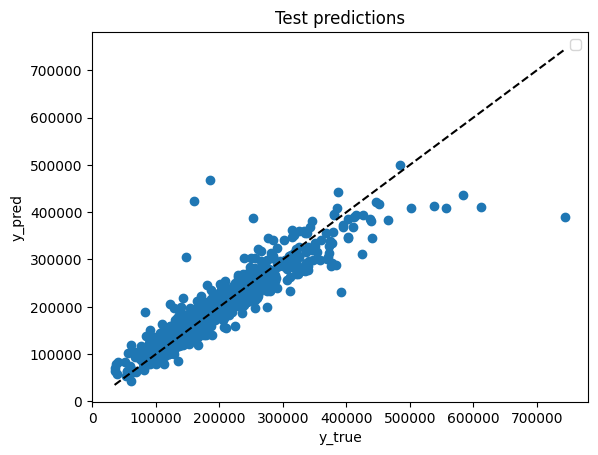

In [301]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

y_pred = cross_val_predict(stacking_regressor_14, X_train, y_train, cv=5)

plt.scatter(y_train,y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train,y_pred)

# Calculate R^2 Score
r2 = r2_score(y_train,y_pred)

plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra

plt.title('Test predictions')

Provem de crear dos models

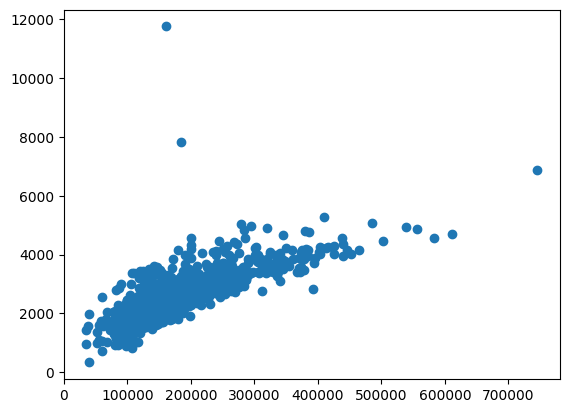

In [302]:
Area_total = X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF']
plt.scatter( y_train,Area_total)


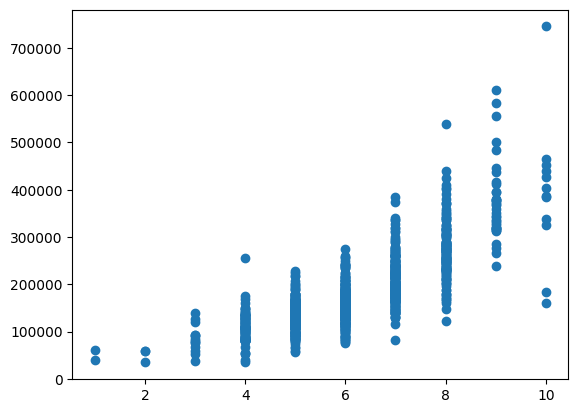

In [303]:
OverallQual = X['OverallQual']
plt.scatter(OverallQual, y_train)

## Fem un model per predir l'error


Això ens servira per saber les feautres més importants i predir

In [304]:
columnas_seleccionadas =['MSSubClass','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                         'TotRmsAbvGrd','GarageCars','CentralAir','1stFlrSF','2ndFlrSF','TotalBsmtSF','MSZoning','HouseStyle',
                         'FullBath','YearBuilt','YearRemodAdd','GarageArea','MasVnrArea']
X_train = X[columnas_seleccionadas]
y_train=y_error
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
## Data de la ultima modificacio
X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
X_train['bath_BSMT']=X['BsmtFullBath'] + 0.5*X['BsmtHalfBath']
X_train['Total_area'] = X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF']

## Funcio per crear si és posterior a 2008
def pre_or_post_2008(row):
      return row['YrSold'] - 2008 + (row['MoSold'] - 9)/12

#X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)

X_train['GarageCal'] = X['GarageQual'].map(calificacio_a_numero)+X['GarageCond'].map(calificacio_a_numero)
X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row


def air_condition_to_numeric(value):
    map = {'Y': 1, 'N': 0}
    return map.get(value, -1)
X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)
X_train['MSSubClass'] = X_train['MSSubClass'].astype('category')

def good_position(row):
    if (row['Condition1'] != 'Norm' or row['Condition2'] != 'Norm'):
        return '1'
    else:
        return '0'
X_train['good_position'] = X.apply(good_position, axis=1)


<ipython-input-304-7f7d73009ca2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-304-7f7d73009ca2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
<ipython-input-304-7f7d73009ca2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [305]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define which columns are numeric and which are categorical
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns

# Create a transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('Target Encoder', TargetEncoder()),
    ('scaler', StandardScaler())
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the complete pipeline
pipeline_11 = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
pipeline_11.fit(X_train,y_train)

transformed_data=pipeline_11.transform(X_train)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_train_transformed = pd.DataFrame(transformed_data, columns=new_column_names)

['LotArea' 'OverallQual' 'OverallCond' 'GrLivArea' 'BedroomAbvGr'
 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'FullBath' 'YearBuilt' 'YearRemodAdd' 'GarageArea'
 'MasVnrArea' 'Ext_Cal' 'bath_oGr' 'bath_BSMT' 'Total_area' 'GarageCal'
 'KitchenQual' 'MSSubClass' 'Neighborhood' 'MSZoning' 'HouseStyle'
 'good_position']


In [306]:
X_train=X_train_transformed.copy()

In [307]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score


model = Ridge()
model.fit(X_train, y_train)

# Avaluar el model
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
coeficients = model.coef_
coeficients_ridge ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {coeficients[i]}")
    coeficients_ridge[X_train.columns[i]]=abs(coeficients[i])

LotArea: 1808.156369568289
OverallQual: 595.500121082829
OverallCond: -216.5784512379813
GrLivArea: 2969.528661488848
BedroomAbvGr: -2459.946633265364
TotRmsAbvGrd: -1033.4809437837246
GarageCars: -943.478692548828
CentralAir: -390.04973284726543
1stFlrSF: 3334.075879970579
2ndFlrSF: 6476.560853087741
TotalBsmtSF: -409.47466653347635
FullBath: 1827.1174757021174
YearBuilt: -683.1780680271419
YearRemodAdd: -740.4412618331751
GarageArea: 2160.805649041168
MasVnrArea: 167.7467917240858
Ext_Cal: 186.30692577473826
bath_oGr: -2983.2522680181296
bath_BSMT: -33.292406450927544
Total_area: 4777.464906630474
GarageCal: -1486.4705277850348
KitchenQual: 778.2100596690641
MSSubClass: -1261.3193917043986
Neighborhood: 1508.304152696893
MSZoning: 1010.5568413950258
HouseStyle: -2864.8126900966377
good_position: 359.16956753149276


In [308]:
param_grid = {
    'n_estimators': [50,100,250,500],  # Number of trees in the forest
    'max_depth': [18,20,25],         # Maximum number of levels in tree
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
rf_best_model= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_rf ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")
    importances_rf[X_train.columns[i]]=importances[i]

Best Parameters: {'max_depth': 25, 'n_estimators': 250}
Best Score: 0.1156812173954656
LotArea: 0.06063271517892859
OverallQual: 0.013874218068418067
OverallCond: 0.016215160121698543
GrLivArea: 0.09486168635086153
BedroomAbvGr: 0.01247145642456941
TotRmsAbvGrd: 0.01687380696073811
GarageCars: 0.0042906074646852305
CentralAir: 0.0007831815863171862
1stFlrSF: 0.04860402150609343
2ndFlrSF: 0.09926920522136765
TotalBsmtSF: 0.08951605029132942
FullBath: 0.004405886049237603
YearBuilt: 0.03171591875222579
YearRemodAdd: 0.042562893493659625
GarageArea: 0.07482460602626186
MasVnrArea: 0.027735730748436403
Ext_Cal: 0.009533504354032007
bath_oGr: 0.021577785011840073
bath_BSMT: 0.014914208223321122
Total_area: 0.25525119960765646
GarageCal: 0.006849362791618777
KitchenQual: 0.006297243182207135
MSSubClass: 0.007658442836815034
Neighborhood: 0.02741012437941662
MSZoning: 0.0055149517184111705
HouseStyle: 0.0030254543731400504
good_position: 0.003330579276713007


In [309]:
# Configuració dels paràmetres per a la cerca de graella
param_grid = {
    'n_estimators': [50,100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1,3, 5, 7]
}

# Creació del model de Gradient Boosting per a la cerca de graella
gb = xgb.XGBRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='r2')

# Entrenament del model amb la cerca de graella
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
gb_best_model= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_gb ={}
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {importances[i]}")
    importances_gb[X_train.columns[i]]=importances[i]

Best Parameters: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}
Best Score: 0.19765748397536595
LotArea: 0.04274037107825279
OverallQual: 0.035566024482250214
OverallCond: 0.0
GrLivArea: 0.10153791308403015
BedroomAbvGr: 0.0
TotRmsAbvGrd: 0.0
GarageCars: 0.0
CentralAir: 0.0
1stFlrSF: 0.0
2ndFlrSF: 0.07973194867372513
TotalBsmtSF: 0.18388022482395172
FullBath: 0.0
YearBuilt: 0.0
YearRemodAdd: 0.03085184097290039
GarageArea: 0.07346061617136002
MasVnrArea: 0.0
Ext_Cal: 0.0
bath_oGr: 0.20441938936710358
bath_BSMT: 0.0
Total_area: 0.20423153042793274
GarageCal: 0.0
KitchenQual: 0.0
MSSubClass: 0.0
Neighborhood: 0.04358009994029999
MSZoning: 0.0
HouseStyle: 0.0
good_position: 0.0


In [310]:
def show_top_features(coefficients, n=3, most_important=True):
    # Sort the features by their coefficient values
    # If most_important is True, sort in descending order to get the most important features
    sorted_features = sorted(coefficients.items(), key=lambda x: x[1], reverse=most_important)
    top_n_features = sorted_features[:n]

    print(f"The {n} features with the {'largest' if most_important else 'smallest'} coefficients are:")
    for feature, coef in top_n_features:
        print(f"{feature}: {coef}")



print("Most important features in random forest")
show_top_features(importances_rf, n=5, most_important=True)
print("\nMost important features in gradient boosting")
show_top_features(importances_gb, n=5, most_important=True)
print("\nMost important features in ridge regression")
show_top_features(coeficients_ridge, n=5, most_important=True)

Most important features in random forest
The 5 features with the largest coefficients are:
Total_area: 0.25525119960765646
2ndFlrSF: 0.09926920522136765
GrLivArea: 0.09486168635086153
TotalBsmtSF: 0.08951605029132942
GarageArea: 0.07482460602626186

Most important features in gradient boosting
The 5 features with the largest coefficients are:
bath_oGr: 0.20441938936710358
Total_area: 0.20423153042793274
TotalBsmtSF: 0.18388022482395172
GrLivArea: 0.10153791308403015
2ndFlrSF: 0.07973194867372513

Most important features in ridge regression
The 5 features with the largest coefficients are:
2ndFlrSF: 6476.560853087741
Total_area: 4777.464906630474
1stFlrSF: 3334.075879970579
bath_oGr: 2983.2522680181296
GrLivArea: 2969.528661488848


## Separar entre car i barato

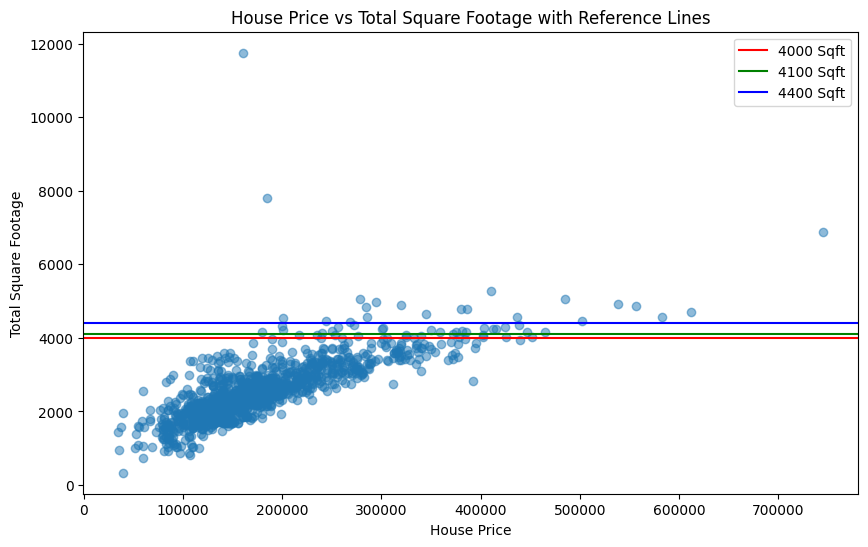

In [311]:
# Plotting the scatter plot with additional horizontal lines at specified values

# Recalculating total square footage
total_sqft = X['1stFlrSF'] + X['2ndFlrSF'] + X['TotalBsmtSF']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y, total_sqft, alpha=0.5)

# Adding horizontal lines at 4000, 4100, and 4400 square feet
plt.axhline(4000, color='red', linestyle='-', label='4000 Sqft')
plt.axhline(4100, color='green', linestyle='-', label='4100 Sqft')
plt.axhline(4400, color='blue', linestyle='-', label='4400 Sqft')

plt.xlabel('House Price')
plt.ylabel('Total Square Footage')
plt.title('House Price vs Total Square Footage with Reference Lines')
plt.legend()
plt.show()


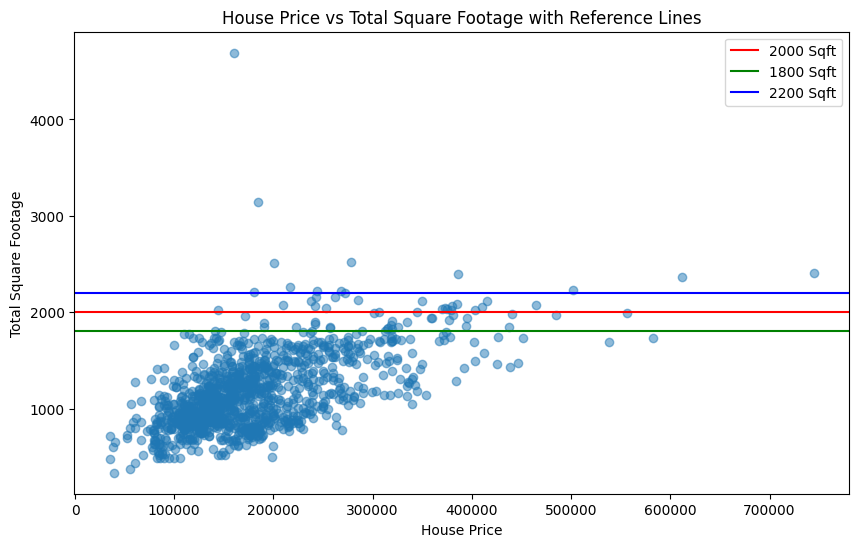

In [312]:
# Plotting the scatter plot with additional horizontal lines at specified values

# Recalculating total square footage
total_sqft = X['1stFlrSF']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y, total_sqft, alpha=0.5)

# Adding horizontal lines at 4000, 4100, and 4400 square feet
plt.axhline(2000, color='red', linestyle='-', label='2000 Sqft')
plt.axhline(1800, color='green', linestyle='-', label='1800 Sqft')
plt.axhline(2200, color='blue', linestyle='-', label='2200 Sqft')

plt.xlabel('House Price')
plt.ylabel('Total Square Footage')
plt.title('House Price vs Total Square Footage with Reference Lines')
plt.legend()
plt.show()

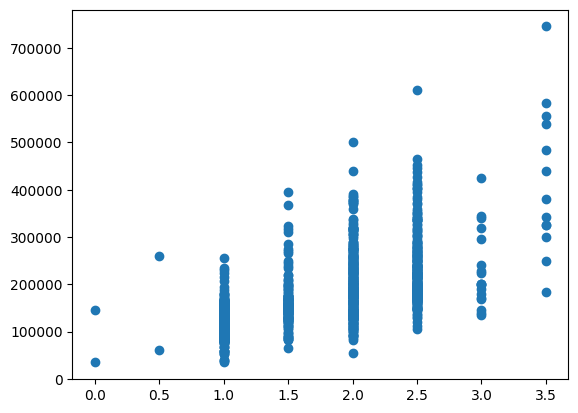

In [313]:
plt.scatter(X['FullBath']+0.5*X['HalfBath'],y )


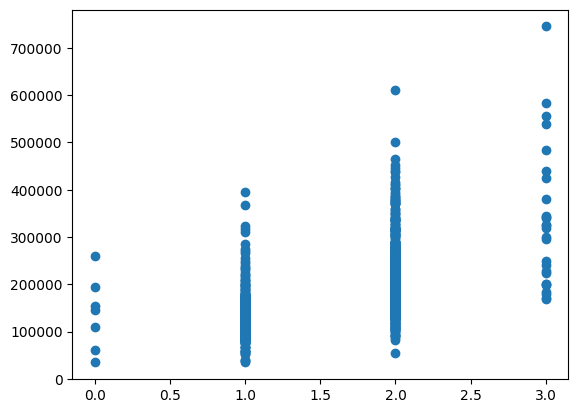

In [314]:
plt.scatter(X['FullBath'],y )

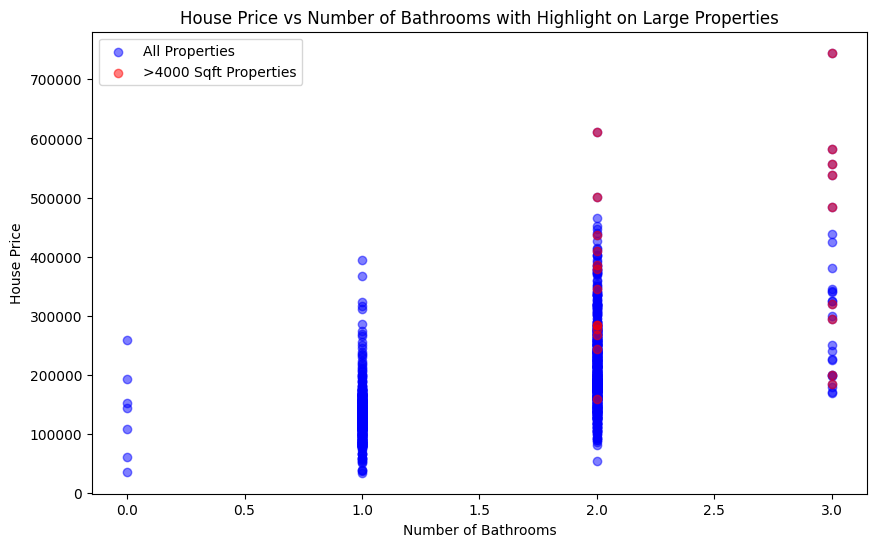

In [315]:
total_sqft = X['1stFlrSF'] + X['2ndFlrSF'] + X['TotalBsmtSF']
num_bathrooms = X['FullBath']

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for bathrooms vs house price
plt.scatter(num_bathrooms, y, color='blue', alpha=0.5, label='All Properties')

# Highlight properties with more than 4000 total square footage
high_sqft_idx = total_sqft > 4400
plt.scatter(num_bathrooms[high_sqft_idx], y[high_sqft_idx], color='red', alpha=0.5, label='>4000 Sqft Properties')

plt.xlabel('Number of Bathrooms')
plt.ylabel('House Price')
plt.title('House Price vs Number of Bathrooms with Highlight on Large Properties')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Test predictions')

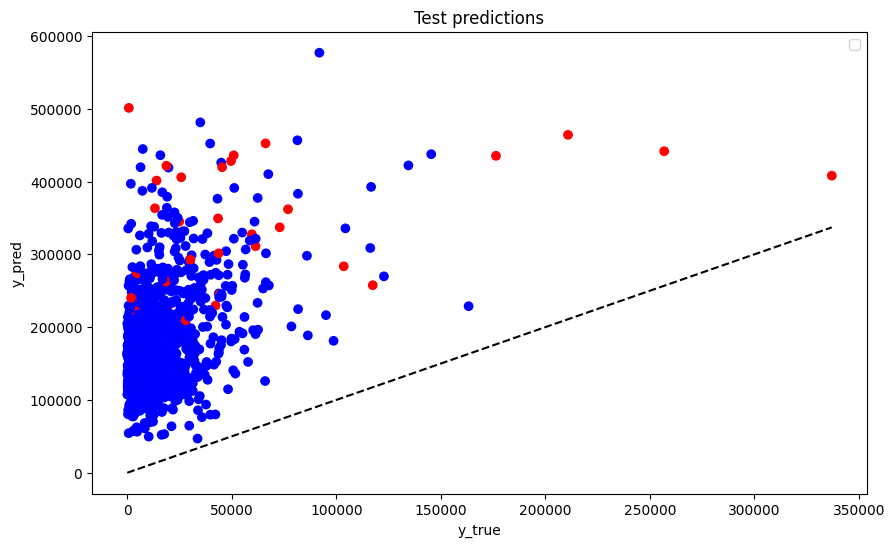

In [316]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize=(10, 6))
colors = np.where((X['1stFlrSF'] < 2000) | (X['FullBath'] <1.5), 'blue', 'red')
plt.scatter(y_train, y_pred_12, c=colors)


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train,y_pred_12)

# Calculate R^2 Score
r2 = r2_score(y,y_pred_12)

plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra
plt.title('Test predictions')

Text(0.5, 1.0, 'Test predictions')

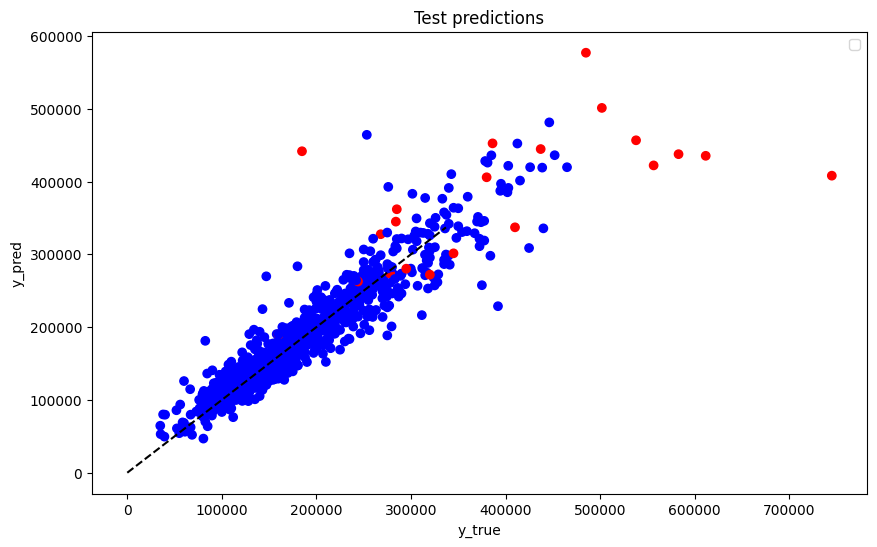

In [317]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize=(10, 6))
colors = np.where((X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF'] < 4400), 'blue', 'red')
plt.scatter(y, y_pred_12, c=colors)


plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra
plt.title('Test predictions')

## Model 15

In [318]:
separacio = 4400

In [319]:
columnas_seleccionadas =['MSSubClass','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                         'TotRmsAbvGrd','GarageCars','CentralAir','1stFlrSF','2ndFlrSF','TotalBsmtSF','MSZoning','HouseStyle',
                         'FullBath','YearBuilt','YearRemodAdd','GarageArea','MasVnrArea']
X_train = X[columnas_seleccionadas]
y_train=y.copy()
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
## Data de la ultima modificacio
X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
X_train['bath_BSMT']=X['BsmtFullBath'] + 0.5*X['BsmtHalfBath']
X_train['Total_area'] = X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF']

## Funcio per crear si és posterior a 2008
def pre_or_post_2008(row):
      return row['YrSold'] - 2008 + (row['MoSold'] - 9)/12

#X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)

X_train['GarageCal'] = X['GarageQual'].map(calificacio_a_numero)+X['GarageCond'].map(calificacio_a_numero)
X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row


def air_condition_to_numeric(value):
    map = {'Y': 1, 'N': 0}
    return map.get(value, -1)
X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)
X_train['MSSubClass'] = X_train['MSSubClass'].astype('category')

def good_position(row):
    if (row['Condition1'] != 'Norm' or row['Condition2'] != 'Norm'):
        return '1'
    else:
        return '0'
X_train['good_position'] = X.apply(good_position, axis=1)


<ipython-input-319-089afe6ecf23>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-319-089afe6ecf23>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
<ipython-input-319-089afe6ecf23>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [320]:
def preprocessing_15(X):
  columnas_seleccionadas =['MSSubClass','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                          'TotRmsAbvGrd','GarageCars','CentralAir','1stFlrSF','2ndFlrSF','TotalBsmtSF','MSZoning','HouseStyle',
                          'FullBath','YearBuilt','YearRemodAdd','GarageArea','MasVnrArea']
  X_train = X[columnas_seleccionadas]
  y_train=y.copy()
  def calificacio_a_numero(calificacion):
      map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
      return map.get(calificacion, 0)
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
  ## Data de la ultima modificacio
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
  X_train['bath_BSMT']=X['BsmtFullBath'] + 0.5*X['BsmtHalfBath']
  X_train['Total_area'] = X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF']

  ## Funcio per crear si és posterior a 2008
  def pre_or_post_2008(row):
        return row['YrSold'] - 2008 + (row['MoSold'] - 9)/12

  #X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)

  X_train['GarageCal'] = X['GarageQual'].map(calificacio_a_numero)+X['GarageCond'].map(calificacio_a_numero)
  X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

  # Apply the function to each row


  def air_condition_to_numeric(value):
      map = {'Y': 1, 'N': 0}
      return map.get(value, -1)
  X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)
  X_train['MSSubClass'] = X_train['MSSubClass'].astype('category')

  def good_position(row):
      if (row['Condition1'] != 'Norm' or row['Condition2'] != 'Norm'):
          return '1'
      else:
          return '0'
  X_train['good_position'] = X.apply(good_position, axis=1)
  return X_train

In [321]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Splitting X_train and y_train based on the condition of Total_area
X_train_car = X_train[X_train['Total_area'] > separacio]
y_train_car = y_train[X_train['Total_area'] > separacio]

X_train_bar = X_train[X_train['Total_area'] <= separacio]
y_train_bar = y_train[X_train['Total_area'] <= separacio]

In [322]:
X_train_car.head(20)

MSSubClass  LotArea Neighborhood  OverallQual  OverallCond  GrLivArea  \
39           60    13891      NridgHt            9            5       2822   
52           20    10655      NridgHt            8            5       1629   
84           60    16056      StoneBr            9            5       2868   
146          20    32668      Crawfor            6            3       2515   
179          20    12919      NridgHt            9            5       2364   
189          60    13693      NridgHt            9            5       2643   
284          20     9600       NWAmes            8            5       2524   
393          20    15865        NAmes            8            6       2217   
405          50    14720      NoRidge            8            5       3238   
419          60    40094      Edwards           10            5       4676   
575          60    13518      NridgHt            9            5       3140   
614          60    20431      NridgHt            9            5       2728   
653          60    15623      NoRidge           10            5       4476   
707          60    63887      Edwards           10            5       5642   
774          20    13472      NridgHt           10            5       2392   
871          75    18386      OldTown            7            9       3493   
901          80    13860        NAmes            8            7       2704   
907          50    10678      NoRidge            8            5       2872   
998          60    53504      StoneBr            8            5       3279   
1023         20    17423      StoneBr            9            5       2234   

      BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  YearRemodAdd  \
39               4            12           3           1  ...          2009   
52               3             7           3           1  ...          2004   
84               4            11           3           1  ...          2006   
146              4             9           2           1  ...          1975   
179              2            11           3           1  ...          2010   
189              3             9           3           1  ...          2006   
284              4             9           2           1  ...          1981   
393              4             8           2           1  ...          1970   
405              4             9           3           1  ...          1996   
419              3            11           3           1  ...          2008   
575              4            11           3           1  ...          2009   
614              4            10           3           1  ...          2006   
653              4            10           3           1  ...          1996   
707              3            12           2           1  ...          2008   
774              3             8           3           1  ...          2003   
871              3            10           3           1  ...          2002   
901              4             9           2           1  ...          1995   
907              4             9           2           1  ...          2000   
998              4            12           3           1  ...          2003   
1023             1             9           3           1  ...          2009   

      GarageArea  MasVnrArea Ext_Cal bath_oGr  bath_BSMT  Total_area  \
39          1020       424.0       8      3.5        0.0        4556   
52           880       296.0       7      2.0        1.0        4835   
84           716       208.0       7      3.5        0.0        4860   
146          484         NaN       7      3.0        1.0        4550   
179          820       760.0       8      2.5        1.0        4694   
189          694       772.0       8      2.5        0.0        4796   
284          542         0.0       7      2.5        1.0        5048   
393          621         0.0       8      2.0        1.0        4434   
405          666       579.0       7      2.5        1.0  

In [323]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define which columns are numeric and which are categorical
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns

# Create a transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('Target Encoder', TargetEncoder()),
    ('scaler', StandardScaler())
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the complete pipeline
pipeline_car_15 = Pipeline(steps=[('preprocessor', preprocessor)])
pipeline_bar = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
pipeline_car_15.fit(X_train_car,y_train_car)

pipeline_bar.fit(X_train_bar,y_train_bar)

transformed_data_car=pipeline_car_15.transform(X_train_car)
transformed_data_bar=pipeline_bar.transform(X_train_bar)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_train_car = pd.DataFrame(transformed_data_car, columns=new_column_names)
X_train_bar = pd.DataFrame(transformed_data_bar, columns=new_column_names)

['LotArea' 'OverallQual' 'OverallCond' 'GrLivArea' 'BedroomAbvGr'
 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'FullBath' 'YearBuilt' 'YearRemodAdd' 'GarageArea'
 'MasVnrArea' 'Ext_Cal' 'bath_oGr' 'bath_BSMT' 'Total_area' 'GarageCal'
 'KitchenQual' 'MSSubClass' 'Neighborhood' 'MSZoning' 'HouseStyle'
 'good_position']


In [324]:
X_train_car.head()

LotArea  OverallQual  OverallCond  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  \
0  0.416696     2.176144    -0.524297   2.812146      1.385625      3.500099   
1  0.061077     1.434806    -0.524297   0.297795      0.170685      0.333764   
2  0.654618     2.176144    -0.524297   2.909095      1.385625      2.866832   
3  2.480187    -0.047870    -2.309868   2.165117      1.385625      1.600298   
4  0.309878     2.176144    -0.524297   1.846871     -1.044255      2.866832   

   GarageCars  CentralAir  1stFlrSF  2ndFlrSF  ...  bath_oGr  bath_BSMT  \
0    1.684383    0.256995  1.714508  1.753137  ...  2.827046  -0.864393   
1    1.684383    0.256995  1.410567 -0.795186  ...  0.423637   1.089442   
2    1.684383    0.256995  2.461334  1.256589  ...  2.827046  -0.864393   
3    0.341096    0.256995  3.975248 -0.795186  ...  2.025910   1.089442   
4    1.684383    0.256995  3.538152 -0.795186  ...  1.224774   1.089442   

   Total_area  GarageCal  KitchenQual  MSSubClass  Neighborhood  MSZoning  \
0    2.911749   0.277329     2.342897    1.510840      2.720329  0.356385   
1    3.309652   0.277329     0.798041    0.047815      2.720329  0.356385   
2    3.345307   0.277329     2.342897    1.510840      1.087887  0.356385   
3    2.903192   0.277329    -0.746815    0.047815      0.713239  0.356385   
4    3.108562   0.277329     2.342897    0.047815      2.720329  0.356385   

   HouseStyle  good_position  
0    1.354500       0.401365  
1   -0.302682       0.401365  
2    1.354500       0.401365  
3   -0.302682       0.401365  
4   -0.302682       0.401365  

[5 rows x 27 columns]

In [325]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score


model = Ridge()
model.fit(X_train_car, y_train_car)

# Avaluar el model
y_pred = model.predict(X_train_car)
mse = mean_squared_error(y_train_car, y_pred)
r2 = r2_score(y_train_car, y_pred)
print("Error quadràtic mitjà: ", mse)
print("Error r2 mitjà: ", r2)

Error quadràtic mitjà:  1742391003.9782867
Error r2 mitjà:  0.9239205016317749


In [326]:
coeficients = model.coef_
coeficients_ridge_car ={}
for i in range(len(X_train_car.columns)):
    print(f"{X_train_car.columns[i]}: {coeficients[i]}")
    coeficients_ridge_car[X_train_car.columns[i]]=abs(coeficients[i])

LotArea: -11293.242195492163
OverallQual: 68608.22024704577
OverallCond: 32289.73115467433
GrLivArea: 3914.379465666221
BedroomAbvGr: -43510.99481403394
TotRmsAbvGrd: 43887.402654394056
GarageCars: -12339.680013730409
CentralAir: -4.927540758372528e-26
1stFlrSF: 5964.578663103079
2ndFlrSF: -476.06650812822045
TotalBsmtSF: -21466.137495246745
FullBath: -6185.437721567476
YearBuilt: 19401.2140468452
YearRemodAdd: -76744.56425560129
GarageArea: 22901.553869513362
MasVnrArea: -10336.82915434835
Ext_Cal: -25516.590681755202
bath_oGr: 63691.26654734493
bath_BSMT: 47238.459526351835
Total_area: -9057.987745384951
GarageCal: 0.0
KitchenQual: 26001.66444322295
MSSubClass: 1353.7116224850033
Neighborhood: 54726.47185290307
MSZoning: 11941.135934035476
HouseStyle: -447.9737628914736
good_position: 49360.32555683343


In [327]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score


model = Ridge()
model.fit(X_train_bar, y_train_bar)

# Avaluar el model
y_pred_bar = model.predict(X_train_bar)
mse = mean_squared_error(y_pred_bar, y_train_bar)
r2 = r2_score(y_pred_bar, y_train_bar)
print("Error quadràtic mitjà: ", mse)
print("Error r2 mitjà: ", r2)

Error quadràtic mitjà:  616538422.5432819
Error r2 mitjà:  0.8561141720911517


In [328]:
coeficients = model.coef_
coeficients_ridge_bar ={}
for i in range(len(X_train_bar.columns)):
    print(f"{X_train_bar.columns[i]}: {coeficients[i]}")
    coeficients_ridge_bar[X_train_bar.columns[i]]=abs(coeficients[i])

LotArea: 5253.020380547705
OverallQual: 15781.127464196055
OverallCond: 6769.683375454942
GrLivArea: -668.0463035514597
BedroomAbvGr: -5510.002687392634
TotRmsAbvGrd: 1407.8766306706348
GarageCars: 4271.10336695737
CentralAir: 19.326708245688693
1stFlrSF: 13928.371059838746
2ndFlrSF: 14496.368976268459
TotalBsmtSF: -58.224810390833376
FullBath: -3491.7276372036413
YearBuilt: 4295.557981443058
YearRemodAdd: 841.7555709448718
GarageArea: 4276.7073445525475
MasVnrArea: 2690.023227953039
Ext_Cal: 1937.5469851218766
bath_oGr: 1323.2413210029497
bath_BSMT: 5451.46934144192
Total_area: 15657.473779188762
GarageCal: -3809.986176567439
KitchenQual: 5230.709983952063
MSSubClass: 2671.7889934503587
Neighborhood: 11055.86674823769
MSZoning: 2577.0438640043303
HouseStyle: -2385.090690317255
good_position: 2571.127764369036


In [329]:
param_grid = {
    'n_estimators': [250,500,750],  # Number of trees in the forest
    'max_depth': [15,18,20],         # Maximum number of levels in tree
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_car, y_train_car)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
rf_best_model_car= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': 15, 'n_estimators': 500}
Best Score: -123559.3072065631


In [330]:
importances = rf_best_model_car.feature_importances_
importances_rf_car = {}

for i in range(len(X_train_car.columns)):
    print(f"{X_train_car.columns[i]}: {importances[i]}")
    importances_rf_car[X_train_car.columns[i]] = importances[i]

LotArea: 0.046916212041882475
OverallQual: 0.02068952700860399
OverallCond: 0.0012722785350518407
GrLivArea: 0.012482478343709556
BedroomAbvGr: 0.005667602573784534
TotRmsAbvGrd: 0.07696932965575645
GarageCars: 0.03443482274926856
CentralAir: 0.0
1stFlrSF: 0.038237984174212765
2ndFlrSF: 0.05647836072742952
TotalBsmtSF: 0.030988513093144116
FullBath: 0.008139935523125828
YearBuilt: 0.05961438501443286
YearRemodAdd: 0.05062240032245288
GarageArea: 0.03605113559900838
MasVnrArea: 0.04661990701640021
Ext_Cal: 0.0030639723286844177
bath_oGr: 0.07850749425898325
bath_BSMT: 0.0043361395539165855
Total_area: 0.013613257754054196
GarageCal: 0.0
KitchenQual: 0.032731065106147754
MSSubClass: 0.004625969814233437
Neighborhood: 0.33577352398897586
MSZoning: 0.0001288832355705321
HouseStyle: 0.0016418613592643475
good_position: 0.0003929602219055355


In [331]:
param_grid = {
    'n_estimators': [250,500,750,1000],  # Number of trees in the forest
    'max_depth': [20,25,30],         # Maximum number of levels in tree
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_bar, y_train_bar)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
rf_best_model_bar= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

importances = rf_best_model_bar.feature_importances_
importances_rf_bar = {}

for i in range(len(X_train_bar.columns)):
    print(f"{X_train_bar.columns[i]}: {importances[i]}")
    importances_rf_bar[X_train_bar.columns[i]] = importances[i]

Best Parameters: {'max_depth': 25, 'n_estimators': 750}
Best Score: -23845.113432805483
LotArea: 0.015371316365949884
OverallQual: 0.26895701876403194
OverallCond: 0.010605435289155586
GrLivArea: 0.013856174183520826
BedroomAbvGr: 0.0023747657935639225
TotRmsAbvGrd: 0.0024159509186153804
GarageCars: 0.005200073471201211
CentralAir: 0.0028541438105756747
1stFlrSF: 0.007841714888373404
2ndFlrSF: 0.005102538566608452
TotalBsmtSF: 0.00773884148690677
FullBath: 0.0007840048510831531
YearBuilt: 0.01405708206610181
YearRemodAdd: 0.013397325838142094
GarageArea: 0.013237805133370934
MasVnrArea: 0.005672126563546784
Ext_Cal: 0.003233572326615981
bath_oGr: 0.002480460766918182
bath_BSMT: 0.007242982435718607
Total_area: 0.5056152294430425
GarageCal: 0.0031651011133084672
KitchenQual: 0.006889798252440223
MSSubClass: 0.007710759145126267
Neighborhood: 0.07074374193527778
MSZoning: 0.0018386570682711499
HouseStyle: 0.000952527955276223
good_position: 0.0006608515672568403


In [332]:
# Configuració dels paràmetres per a la cerca de graella
param_grid = {
    'n_estimators': [25,50,100],
    'learning_rate': [0.2,0.5,1,2],
    'max_depth': [ 5,7,10]
}

# Creació del model de Gradient Boosting per a la cerca de graella
gb = xgb.XGBRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Entrenament del model amb la cerca de graella
grid_search.fit(X_train_car, y_train_car)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
gb_best_model_car_15= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

gb_best_model_car= grid_search.best_estimator_
importances_gb_car ={}
"""
for i in range(len(X_train_bar.columns)):
    print(f"{X_train_car.columns[i]}: {importances[i]}")
    importances_gb_car[X_train_car.columns[i]]=importances[i]
"""

Best Parameters: {'learning_rate': 1, 'max_depth': 7, 'n_estimators': 25}
Best Score: -83777.01253902359


'\nfor i in range(len(X_train_bar.columns)):\n    print(f"{X_train_car.columns[i]}: {importances[i]}")\n    importances_gb_car[X_train_car.columns[i]]=importances[i]\n'

In [333]:
# Configuració dels paràmetres per a la cerca de graella
param_grid = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1,3, 5, 7]
}

# Creació del model de Gradient Boosting per a la cerca de graella
gb = xgb.XGBRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Entrenament del model amb la cerca de graella
grid_search.fit(X_train_bar, y_train_bar)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
gb_best_model_bar= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_gb_bar ={}
for i in range(len(X_train_bar.columns)):
    print(f"{X_train_bar.columns[i]}: {importances[i]}")
    importances_gb_bar[X_train_bar.columns[i]]=importances[i]

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Score: -22054.639704900852
LotArea: 0.00494559109210968
OverallQual: 0.3690592050552368
OverallCond: 0.008927801623940468
GrLivArea: 0.011329175904393196
BedroomAbvGr: 0.0021119629964232445
TotRmsAbvGrd: 0.001764984684996307
GarageCars: 0.09274138510227203
CentralAir: 0.030681295320391655
1stFlrSF: 0.0023126062005758286
2ndFlrSF: 0.002631131559610367
TotalBsmtSF: 0.0018992711557075381
FullBath: 0.003448575036600232
YearBuilt: 0.0077984449453651905
YearRemodAdd: 0.015766555443406105
GarageArea: 0.004350575618445873
MasVnrArea: 0.0022089178673923016
Ext_Cal: 0.0034788406919687986
bath_oGr: 0.011525359936058521
bath_BSMT: 0.017017092555761337
Total_area: 0.21025659143924713
GarageCal: 0.012739828787744045
KitchenQual: 0.05939668416976929
MSSubClass: 0.011711819097399712
Neighborhood: 0.07317089289426804
MSZoning: 0.03370599448680878
HouseStyle: 0.002936975797638297
good_position: 0.0020823890808969736


In [335]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

estimators = [
    ('ridge', Ridge()),
    ('rf', rf_best_model_bar),
    ('gb', gb_best_model_bar)
]
stacking_regressor_bar = StackingRegressor(
    estimators=estimators,
    final_estimator=MLPRegressor(random_state=42),
    cv=5
)

scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))}

# Entrenar el model d'apilament
scores = cross_validate(stacking_regressor_bar, X_train_bar, y_train_bar, cv=5,scoring=scoring)

r2_scores = scores['test_r2']
rmse_scores = scores['test_rmse']

# Imprimir los resultados
print(f'R^2 Scores: {np.mean(r2_scores)}')
print(f'RMSE Scores: {np.mean(rmse_scores)}')

R^2 Scores: 0.903751922823566
RMSE Scores: 21570.53918170698


In [336]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

estimators = [
    ('ridge', Ridge()),
    ('rf', rf_best_model_car),
    ('gb', gb_best_model_car_15)
]
stacking_regressor_car = StackingRegressor(
    estimators=estimators,
    final_estimator=MLPRegressor(random_state=42),
    cv=5
)

scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))}

# Entrenar el model d'apilament
scores = cross_validate(stacking_regressor_car, X_train_car, y_train_car, cv=5,scoring=scoring)

r2_scores = scores['test_r2']
rmse_scores = scores['test_rmse']

# Imprimir los resultados
print(f'R^2 Scores: {np.mean(r2_scores)}')
print(f'RMSE Scores: {np.mean(rmse_scores)}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 Scores: -0.706287493471039
RMSE Scores: 114265.40371899614


In [337]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

y_pred_car_15 = cross_val_predict(gb_best_model_car, X_train_car, y_train_car, cv=5)
y_pred_bar = cross_val_predict(stacking_regressor_bar, X_train_bar, y_train_bar, cv=5)



Text(0.5, 1.0, 'Test predictions')

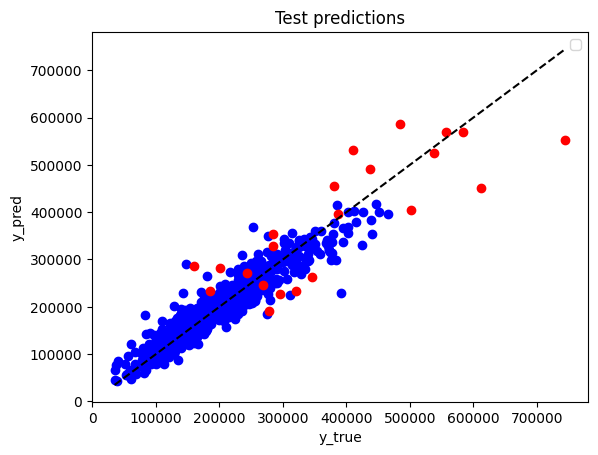

In [338]:
plt.scatter(y_train_bar, y_pred_bar, color='blue')
plt.scatter(y_train_car, y_pred_car_15, color='red')

plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra

plt.title('Test predictions')



In [340]:
combined_true = np.concatenate([y_train_car, y_train_bar])
combined_pred = np.concatenate([y_pred_car_15, y_pred_bar])

# Calculating combined MSE and R^2
combined_mse = mean_squared_error(combined_true, combined_pred)
combined_r2 = r2_score(combined_true, combined_pred)

print(np.sqrt(combined_mse))

print(combined_r2)

24493.331828891365
0.9009622015461637


In [341]:
def show_worst_features(coefficients, n):
    sorted_features = sorted(coefficients.items(), key=lambda x: x[1])
    worst_n_features = sorted_features[:n]

    print(f"The {n} features with the smallest coefficients are:")
    for feature, coef in worst_n_features:
        print(f"{feature}: {coef}")
print("Features menys importants al random forest")
show_worst_features(importances_rf_car, n=5)
print("Features menys importants al gradient boosting")
show_worst_features(importances_gb_car, n=5)
print("Features menys importants al gradient boosting")

show_worst_features(coeficients_ridge_car, n=5)

Features menys importants al random forest
The 5 features with the smallest coefficients are:
CentralAir: 0.0
GarageCal: 0.0
MSZoning: 0.0001288832355705321
good_position: 0.0003929602219055355
OverallCond: 0.0012722785350518407
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
GarageCal: 0.0
CentralAir: 4.927540758372528e-26
HouseStyle: 447.9737628914736
2ndFlrSF: 476.06650812822045
MSSubClass: 1353.7116224850033


In [342]:
print("Features menys importants al random forest")
show_worst_features(importances_rf_bar, n=5)
print("Features menys importants al gradient boosting")
show_worst_features(importances_gb_bar, n=5)
print("Features menys importants al gradient boosting")

show_worst_features(coeficients_ridge_bar, n=5)

Features menys importants al random forest
The 5 features with the smallest coefficients are:
good_position: 0.0006608515672568403
FullBath: 0.0007840048510831531
HouseStyle: 0.000952527955276223
MSZoning: 0.0018386570682711499
BedroomAbvGr: 0.0023747657935639225
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
TotRmsAbvGrd: 0.001764984684996307
TotalBsmtSF: 0.0018992711557075381
good_position: 0.0020823890808969736
BedroomAbvGr: 0.0021119629964232445
MasVnrArea: 0.0022089178673923016
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
CentralAir: 19.326708245688693
TotalBsmtSF: 58.224810390833376
GrLivArea: 668.0463035514597
YearRemodAdd: 841.7555709448718
bath_oGr: 1323.2413210029497


In [343]:
X_train_car_15=X_train_car.copy()
y_train_car_15=y_train_car.copy()

In [344]:
X_train_car_15.T

0         1         2         3         4         5   \
LotArea        0.416696  0.061077  0.654618  2.480187  0.309878  0.394937   
OverallQual    2.176144  1.434806  2.176144 -0.047870  2.176144  2.176144   
OverallCond   -0.524297 -0.524297 -0.524297 -2.309868 -0.524297 -0.524297   
GrLivArea      2.812146  0.297795  2.909095  2.165117  1.846871  2.434888   
BedroomAbvGr   1.385625  0.170685  1.385625  1.385625 -1.044255  0.170685   
TotRmsAbvGrd   3.500099  0.333764  2.866832  1.600298  2.866832  1.600298   
GarageCars     1.684383  1.684383  1.684383  0.341096  1.684383  1.684383   
CentralAir     0.256995  0.256995  0.256995  0.256995  0.256995  0.256995   
1stFlrSF       1.714508  1.410567  2.461334  3.975248  3.538152  2.684224   
2ndFlrSF       1.753137 -0.795186  1.256589 -0.795186 -0.795186  0.549242   
TotalBsmtSF    1.832806  5.682237  2.507502  2.619952  3.391407  2.928534   
FullBath       2.700218  0.849471  2.700218  2.700218  0.849471  0.849471   
YearBuilt      1.237451  1.070903  1.137522 -0.461334  1.270761  1.170832   
YearRemodAdd   1.180847  0.938815  1.035628 -0.464972  1.229254  1.035628   
GarageArea     2.636838  1.972150  1.193515  0.092031  1.687283  1.089064   
MasVnrArea     1.964888  1.200098  0.674305 -0.568477  3.972460  4.044159   
Ext_Cal        2.289358  0.802897  0.802897  0.802897  2.289358  2.289358   
bath_oGr       2.827046  0.423637  2.827046  2.025910  1.224774  1.224774   
bath_BSMT     -0.864393  1.089442 -0.864393  1.089442  1.089442 -0.864393   
Total_area     2.911749  3.309652  3.345307  2.903192  3.108562  3.254031   
GarageCal      0.277329  0.277329  0.277329  0.277329  0.277329  0.277329   
KitchenQual    2.342897  0.798041  2.342897 -0.746815  2.342897  2.342897   
MSSubClass     1.510840  0.047815  1.510840  0.047815  0.047815  1.510840   
Neighborhood   2.720329  2.720329  1.087887  0.713239  2.720329  2.720329   
MSZoning       0.356385  0.356385  0.356385  0.356385  0.356385  0.356385   
HouseStyle     1.354500 -0.302682  1.354500 -0.302682 -0.302682  1.354500   
good_position  0.401365  0.401365  0.401365  0.401365  0.401365  0.401365   

                     6         7         8         9   ...        12  \
LotArea       -0.054862  0.633628  0.507798  3.296265  ...  0.607033   
OverallQual    1.434806  1.434806  1.434806  2.917482  ...  2.917482   
OverallCond   -0.524297  0.368488 -0.524297 -0.524297  ... -0.524297   
GrLivArea      2.184085  1.537056  3.688902  6.719611  ...  6.298094   
BedroomAbvGr   1.385625  1.385625  1.385625  0.170685  ...  1.385625   
TotRmsAbvGrd   1.600298  0.967031  1.600298  2.866832  ...  2.233565   
GarageCars     0.341096  0.341096  1.684383  1.684383  ...  1.684383   
CentralAir     0.256995  0.256995  0.256995  0.256995  ...  0.256995   
1stFlrSF       4.001300  3.112635  2.637909  5.778630  ...  3.674202   
2ndFlrSF      -0.795186 -0.795186  1.980331  2.807131  ...  4.041475   
TotalBsmtSF    3.898737  3.095901  2.614722  5.504410  ...  3.564004   
FullBath       0.849471  0.849471  0.849471  2.700218  ...  2.700218   
YearBuilt      0.338094 -0.028310  0.804427  1.204142  ...  0.837737   
YearRemodAdd  -0.174534 -0.707005  0.551563  1.132441  ...  0.551563   
GarageArea     0.367402  0.742476  0.956126  1.991141  ...  1.654049   
MasVnrArea    -0.568477 -0.568477  2.891000  3.984410  ... -0.568477   
Ext_Cal        0.802897  2.289358  0.802897  2.289358  ...  0.802897   
bath_oGr       1.224774  0.423637  1.224774  2.827046  ...  2.827046   
bath_BSMT      1.089442  1.089442  1.089442  1.089442  ...  1.089442   
Total_area     3.613428  2.737756  3.931465  7.558228  ...  6.214771   
GarageCal      0.277329  0.277329  0.277329  0.277329  ...  0.277329   
KitchenQual    0.798041  0.798041  0.798041  2.342897  ...  2.342897   
MSSubClass     0.047815  0.047815 -0.990232  1.510840  ...  1.510840   
Neighborhood   0.279130 -0.678177  1.892524 -1.012513  ...  1.892524   
MSZoning       0.356385  0.356385  0.356385  0.356385  ...  0.35

## Model 16 centrat amb amb les cases cares

In [345]:
columnas_seleccionadas =['LotArea','Neighborhood','OverallQual','GrLivArea','BedroomAbvGr',
                         'GarageCars','1stFlrSF','2ndFlrSF','TotalBsmtSF','MSZoning',
                         'FullBath','YearBuilt']
X_train = X[columnas_seleccionadas]
y_train=y.copy()
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
## Data de la ultima modificacio
X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
X_train['Total_area'] = X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF']

#X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)

X_train['GarageQual'] = X['GarageQual'].map(calificacio_a_numero)
X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row


def air_condition_to_numeric(value):
    map = {'Y': 1, 'N': 0}
    return map.get(value, -1)
X_train['CentralAir'] = X['CentralAir'].map(air_condition_to_numeric)



<ipython-input-345-5a3d43781011>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
<ipython-input-345-5a3d43781011>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Total_area'] = X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF']
<ipython-input-345-5a3d43781011>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [346]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Splitting X_train and y_train based on the condition of Total_area
X_train_car = X_train[X_train['Total_area'] > separacio]
y_train_car = y_train[X_train['Total_area'] > separacio]

X_train_bar = X_train[X_train['Total_area'] <= separacio]
y_train_bar = y_train[X_train['Total_area'] <= separacio]

In [347]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define which columns are numeric and which are categorical
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns

# Create a transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('Target Encoder', TargetEncoder()),
    ('scaler', StandardScaler())
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the complete pipeline
pipeline_11 = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
pipeline_11.fit(X_train_car,y_train_car)

transformed_data=pipeline_11.transform(X_train_car)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_train_car = pd.DataFrame(transformed_data, columns=new_column_names)

['LotArea' 'OverallQual' 'GrLivArea' 'BedroomAbvGr' 'GarageCars'
 '1stFlrSF' '2ndFlrSF' 'TotalBsmtSF' 'FullBath' 'YearBuilt' 'bath_oGr'
 'Total_area' 'GarageQual' 'KitchenQual' 'CentralAir' 'Neighborhood'
 'MSZoning']


In [348]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score


model = Ridge()
model.fit(X_train_car, y_train_car)

# Avaluar el model
y_pred = model.predict(X_train_car)
mse = mean_squared_error(y_train_car, y_pred)
r2 = r2_score(y_train_car, y_pred)
print("Error quadràtic mitjà: ", mse)
print("Error r2 mitjà: ", r2)

Error quadràtic mitjà:  4293478332.1784573
Error r2 mitjà:  0.8125302087641797


In [349]:
coeficients = model.coef_
coeficients_ridge_car ={}
for i in range(len(X_train_car.columns)):
    print(f"{X_train_car.columns[i]}: {coeficients[i]}")
    coeficients_ridge_car[X_train_car.columns[i]]=abs(coeficients[i])

LotArea: -32392.186672840715
OverallQual: 6269.079264837277
GrLivArea: 12001.73002434688
BedroomAbvGr: -27282.4716349583
GarageCars: -4160.71317379715
1stFlrSF: 5212.819033926582
2ndFlrSF: 11080.129377824273
TotalBsmtSF: -9470.42967861105
FullBath: 18026.59911560584
YearBuilt: -54543.491088952855
bath_oGr: 35641.000018275176
Total_area: 1209.6118016064347
GarageQual: 0.0
KitchenQual: 39869.03767553277
CentralAir: 0.0
Neighborhood: 96679.02136834018
MSZoning: 57375.11635672089


In [350]:
param_grid = {
    'n_estimators': [750,1000,1500],  # Number of trees in the forest
    'max_depth': [12,15,18],         # Maximum number of levels in tree
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_car, y_train_car)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
rf_best_model_car= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
importances = best_model.feature_importances_
importances_rf_car ={}
for i in range(len(X_train_car.columns)):
    print(f"{X_train_car.columns[i]}: {importances[i]}")
    importances_rf_car[X_train_car.columns[i]]=importances[i]

Best Parameters: {'max_depth': 12, 'n_estimators': 1000}
Best Score: -120180.45201821523
LotArea: 0.00494559109210968
OverallQual: 0.3690592050552368
GrLivArea: 0.008927801623940468
BedroomAbvGr: 0.011329175904393196
GarageCars: 0.0021119629964232445
1stFlrSF: 0.001764984684996307
2ndFlrSF: 0.09274138510227203
TotalBsmtSF: 0.030681295320391655
FullBath: 0.0023126062005758286
YearBuilt: 0.002631131559610367
bath_oGr: 0.0018992711557075381
Total_area: 0.003448575036600232
GarageQual: 0.0077984449453651905
KitchenQual: 0.015766555443406105
CentralAir: 0.004350575618445873
Neighborhood: 0.0022089178673923016
MSZoning: 0.0034788406919687986


In [351]:
# Configuració dels paràmetres per a la cerca de graella
param_grid = {
    'n_estimators': [300,500,750],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1,3, 5]
}

# Creació del model de Gradient Boosting per a la cerca de graella
gb = xgb.XGBRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Entrenament del model amb la cerca de graella
grid_search.fit(X_train_car, y_train_car)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
gb_best_model_car= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_gb_car ={}
for i in range(len(X_train_car.columns)):
    print(f"{X_train_car.columns[i]}: {importances[i]}")
    importances_gb_car[X_train_car.columns[i]]=importances[i]

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 750}
Best Score: -104573.07953082121
LotArea: 0.003522449405863881
OverallQual: 0.00029770599212497473
GrLivArea: 0.003078153822571039
BedroomAbvGr: 0.01976015232503414
GarageCars: 1.0149219633603934e-06
1stFlrSF: 0.00422690948471427
2ndFlrSF: 0.02987569570541382
TotalBsmtSF: 0.0020091538317501545
FullBath: 0.05871869996190071
YearBuilt: 0.000801925896666944
bath_oGr: 0.020130973309278488
Total_area: 6.557658343808725e-05
GarageQual: 0.0
KitchenQual: 0.3668375015258789
CentralAir: 0.0
Neighborhood: 0.49067410826683044
MSZoning: 0.0


In [352]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

estimators = [
    ('ridge', Ridge()),
    ('rf', rf_best_model_car),
    ('gb', gb_best_model_car)
]
stacking_regressor_car = StackingRegressor(
    estimators=estimators,
    final_estimator=MLPRegressor(random_state=42),
    cv=5
)

# Entrenar el model d'apilament
scores = cross_validate(stacking_regressor_car, X_train_car, y_train_car, cv=5,scoring=scoring)

r2_scores = scores['test_r2']
rmse_scores = scores['test_rmse']

# Imprimir los resultados
print(f'R^2 Scores: {np.mean(r2_scores)}')
print(f'RMSE Scores: {np.mean(rmse_scores)}')

R^2 Scores: -1.6052592774305423
RMSE Scores: 116028.66992182443


Text(0.5, 1.0, 'Test predictions')

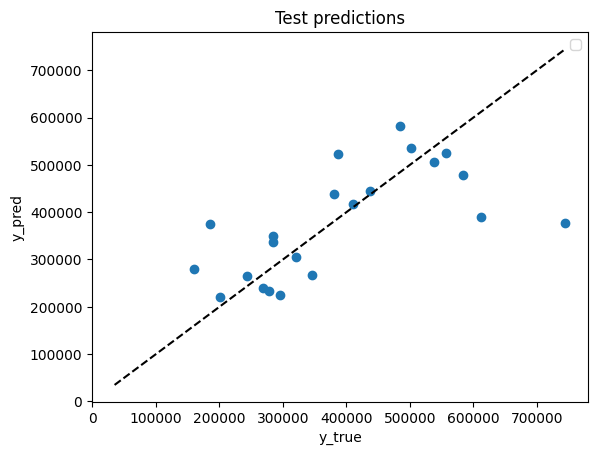

In [353]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

y_pred_car = cross_val_predict(gb_best_model_car, X_train_car, y_train_car, cv=5)

plt.scatter(y_train_car,y_pred_car)


plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra
plt.title('Test predictions')

In [354]:
def show_top_features(coefficients, n=3, most_important=True):
    # Sort the features by their coefficient values
    # If most_important is True, sort in descending order to get the most important features
    sorted_features = sorted(coefficients.items(), key=lambda x: x[1], reverse=most_important)
    top_n_features = sorted_features[:n]

    print(f"The {n} features with the {'largest' if most_important else 'smallest'} coefficients are:")
    for feature, coef in top_n_features:
        print(f"{feature}: {coef}")



print("Most important features in random forest")
show_top_features(importances_rf_car, n=5, most_important=True)
print("\nMost important features in gradient boosting")
show_top_features(importances_gb_car, n=5, most_important=True)
print("\nMost important features in ridge regression")
show_top_features(coeficients_ridge_car, n=5, most_important=True)

Most important features in random forest
The 5 features with the largest coefficients are:
OverallQual: 0.3690592050552368
2ndFlrSF: 0.09274138510227203
TotalBsmtSF: 0.030681295320391655
KitchenQual: 0.015766555443406105
BedroomAbvGr: 0.011329175904393196

Most important features in gradient boosting
The 5 features with the largest coefficients are:
Neighborhood: 0.49067410826683044
KitchenQual: 0.3668375015258789
FullBath: 0.05871869996190071
2ndFlrSF: 0.02987569570541382
bath_oGr: 0.020130973309278488

Most important features in ridge regression
The 5 features with the largest coefficients are:
Neighborhood: 96679.02136834018
MSZoning: 57375.11635672089
YearBuilt: 54543.491088952855
KitchenQual: 39869.03767553277
bath_oGr: 35641.000018275176


In [355]:
def show_worst_features(coefficients, n):
    sorted_features = sorted(coefficients.items(), key=lambda x: x[1])
    worst_n_features = sorted_features[:n]

    print(f"The {n} features with the smallest coefficients are:")
    for feature, coef in worst_n_features:
        print(f"{feature}: {coef}")
print("Features menys importants al random forest")
show_worst_features(importances_rf_car, n=5)
print("Features menys importants al gradient boosting")
show_worst_features(importances_gb_car, n=5)
print("Features menys importants al gradient boosting")

show_worst_features(coeficients_ridge_car, n=5)

Features menys importants al random forest
The 5 features with the smallest coefficients are:
1stFlrSF: 0.001764984684996307
bath_oGr: 0.0018992711557075381
GarageCars: 0.0021119629964232445
Neighborhood: 0.0022089178673923016
FullBath: 0.0023126062005758286
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
GarageQual: 0.0
CentralAir: 0.0
MSZoning: 0.0
GarageCars: 1.0149219633603934e-06
Total_area: 6.557658343808725e-05
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
GarageQual: 0.0
CentralAir: 0.0
Total_area: 1209.6118016064347
GarageCars: 4160.71317379715
1stFlrSF: 5212.819033926582




# Model 17

In [356]:
columnas_seleccionadas =['LotArea','Neighborhood','OverallQual','BedroomAbvGr',
                         'GarageCars','1stFlrSF','2ndFlrSF','TotalBsmtSF',
                         'YearBuilt','PoolArea','GarageArea']
X_train = X[columnas_seleccionadas]
y_train=y.copy()
def calificacio_a_numero(calificacion):
    map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
    return map.get(calificacion, 0)
## Data de la ultima modificacio
X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
X_train['Total_area'] = X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF']

#X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)

X_train['GarageQual'] = X['GarageQual'].map(calificacio_a_numero)
X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

# Apply the function to each row



<ipython-input-356-41e7bcbf2c56>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
<ipython-input-356-41e7bcbf2c56>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Total_area'] = X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF']
<ipython-input-356-41e7bcbf2c56>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [357]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Splitting X_train and y_train based on the condition of Total_area
X_train_car = X_train[X_train['Total_area'] > separacio]
y_train_car = y_train[X_train['Total_area'] > separacio]

X_train_bar = X_train[X_train['Total_area'] <= separacio]
y_train_bar = y_train[X_train['Total_area'] <= separacio]

In [358]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define which columns are numeric and which are categorical
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns

# Create a transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('Target Encoder', TargetEncoder()),
    ('scaler', StandardScaler())
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the complete pipeline
pipeline_11 = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
pipeline_11.fit(X_train_car,y_train_car)

transformed_data=pipeline_11.transform(X_train_car)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_train_car = pd.DataFrame(transformed_data, columns=new_column_names)

['LotArea' 'OverallQual' 'BedroomAbvGr' 'GarageCars' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'YearBuilt' 'PoolArea' 'GarageArea' 'bath_oGr' 'Total_area'
 'GarageQual' 'KitchenQual' 'Neighborhood']


In [359]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score


model = Ridge()
model.fit(X_train_car, y_train_car)

# Avaluar el model
y_pred = model.predict(X_train_car)
mse = mean_squared_error(y_train_car, y_pred)
r2 = r2_score(y_train_car, y_pred)
print("Error quadràtic mitjà: ", np.sqrt(mse))
print("Error r2 mitjà: ", r2)

Error quadràtic mitjà:  45219.59963934039
Error r2 mitjà:  0.9107156284470217


In [360]:
coeficients = model.coef_
coeficients_ridge_car ={}
for i in range(len(X_train_car.columns)):
    print(f"{X_train_car.columns[i]}: {coeficients[i]}")
    coeficients_ridge_car[X_train_car.columns[i]]=abs(coeficients[i])

LotArea: -12369.273273530518
OverallQual: -10798.712557920207
BedroomAbvGr: -18973.04002474621
GarageCars: 12500.924652963324
1stFlrSF: -6567.629318296773
2ndFlrSF: -23943.100535004658
TotalBsmtSF: -46916.91302042497
YearBuilt: 15886.536058334588
PoolArea: 90090.46054392162
GarageArea: 4739.143550472451
bath_oGr: 47163.750069346155
Total_area: -39682.99588361235
GarageQual: 0.0
KitchenQual: 43284.02020950971
Neighborhood: 46487.82075016289


In [361]:
param_grid = {
    'n_estimators': [500,750,1000],  # Number of trees in the forest
    'max_depth': [12,15,18],         # Maximum number of levels in tree
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_car, y_train_car)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
rf_best_model_car= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
importances = best_model.feature_importances_
importances_rf_car ={}
for i in range(len(X_train_car.columns)):
    print(f"{X_train_car.columns[i]}: {importances[i]}")
    importances_rf_car[X_train_car.columns[i]]=importances[i]

Best Parameters: {'max_depth': 12, 'n_estimators': 750}
Best Score: -117554.59948352759
LotArea: 0.003522449405863881
OverallQual: 0.00029770599212497473
BedroomAbvGr: 0.003078153822571039
GarageCars: 0.01976015232503414
1stFlrSF: 1.0149219633603934e-06
2ndFlrSF: 0.00422690948471427
TotalBsmtSF: 0.02987569570541382
YearBuilt: 0.0020091538317501545
PoolArea: 0.05871869996190071
GarageArea: 0.000801925896666944
bath_oGr: 0.020130973309278488
Total_area: 6.557658343808725e-05
GarageQual: 0.0
KitchenQual: 0.3668375015258789
Neighborhood: 0.0


In [362]:
# Configuració dels paràmetres per a la cerca de graella
param_grid = {
    'n_estimators': [200,300,500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1,3, 5]
}

# Creació del model de Gradient Boosting per a la cerca de graella
gb = xgb.XGBRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Entrenament del model amb la cerca de graella
grid_search.fit(X_train_car, y_train_car)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
gb_best_model_car= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_
importances_gb_car ={}
for i in range(len(X_train_car.columns)):
    print(f"{X_train_car.columns[i]}: {importances[i]}")
    importances_gb_car[X_train_car.columns[i]]=importances[i]

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 500}
Best Score: -113785.42418921765
LotArea: 0.002595775295048952
OverallQual: 0.00037011189851909876
BedroomAbvGr: 0.0013952156295999885
GarageCars: 5.477187414726359e-08
1stFlrSF: 0.020881282165646553
2ndFlrSF: 0.0027276703622192144
TotalBsmtSF: 0.0007522727246396244
YearBuilt: 5.4804499086458236e-05
PoolArea: 0.0
GarageArea: 0.002977039199322462
bath_oGr: 0.003591330721974373
Total_area: 0.0008091006311587989
GarageQual: 0.0
KitchenQual: 0.4894695580005646
Neighborhood: 0.47437578439712524


In [363]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

estimators = [
    ('ridge', Ridge()),
    ('rf', rf_best_model_car),
    ('gb', gb_best_model_car)
]
stacking_regressor_car = StackingRegressor(
    estimators=estimators,
    final_estimator=MLPRegressor(random_state=42),
    cv=5
)

# Entrenar el model d'apilament
scores = cross_validate(stacking_regressor_car, X_train_car, y_train_car, cv=5,scoring=scoring)

r2_scores = scores['test_r2']
rmse_scores = scores['test_rmse']

# Imprimir los resultados
print(f'R^2 Scores: {np.mean(r2_scores)}')
print(f'RMSE Scores: {np.mean(rmse_scores)}')

R^2 Scores: -1.278731320999973
RMSE Scores: 108483.7184916853


Text(0.5, 1.0, 'Test predictions')

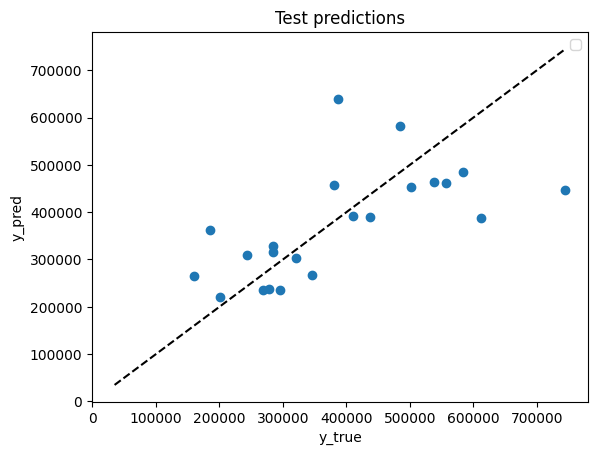

In [364]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

y_pred_car = cross_val_predict(gb_best_model_car, X_train_car, y_train_car, cv=5)

plt.scatter(y_train_car,y_pred_car)


plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra
plt.title('Test predictions')

In [365]:
def show_top_features(coefficients, n=3, most_important=True):
    # Sort the features by their coefficient values
    # If most_important is True, sort in descending order to get the most important features
    sorted_features = sorted(coefficients.items(), key=lambda x: x[1], reverse=most_important)
    top_n_features = sorted_features[:n]

    print(f"The {n} features with the {'largest' if most_important else 'smallest'} coefficients are:")
    for feature, coef in top_n_features:
        print(f"{feature}: {coef}")



print("Most important features in random forest")
show_top_features(importances_rf_car, n=5, most_important=True)
print("\nMost important features in gradient boosting")
show_top_features(importances_gb_car, n=5, most_important=True)
print("\nMost important features in ridge regression")
show_top_features(coeficients_ridge_car, n=5, most_important=True)

Most important features in random forest
The 5 features with the largest coefficients are:
KitchenQual: 0.3668375015258789
PoolArea: 0.05871869996190071
TotalBsmtSF: 0.02987569570541382
bath_oGr: 0.020130973309278488
GarageCars: 0.01976015232503414

Most important features in gradient boosting
The 5 features with the largest coefficients are:
KitchenQual: 0.4894695580005646
Neighborhood: 0.47437578439712524
1stFlrSF: 0.020881282165646553
bath_oGr: 0.003591330721974373
GarageArea: 0.002977039199322462

Most important features in ridge regression
The 5 features with the largest coefficients are:
PoolArea: 90090.46054392162
bath_oGr: 47163.750069346155
TotalBsmtSF: 46916.91302042497
Neighborhood: 46487.82075016289
KitchenQual: 43284.02020950971


In [366]:
def show_worst_features(coefficients, n):
    sorted_features = sorted(coefficients.items(), key=lambda x: x[1])
    worst_n_features = sorted_features[:n]

    print(f"The {n} features with the smallest coefficients are:")
    for feature, coef in worst_n_features:
        print(f"{feature}: {coef}")
print("Features menys importants al random forest")
show_worst_features(importances_rf_car, n=5)
print("Features menys importants al gradient boosting")
show_worst_features(importances_gb_car, n=5)
print("Features menys importants al gradient boosting")

show_worst_features(coeficients_ridge_car, n=5)

Features menys importants al random forest
The 5 features with the smallest coefficients are:
GarageQual: 0.0
Neighborhood: 0.0
1stFlrSF: 1.0149219633603934e-06
Total_area: 6.557658343808725e-05
OverallQual: 0.00029770599212497473
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
PoolArea: 0.0
GarageQual: 0.0
GarageCars: 5.477187414726359e-08
YearBuilt: 5.4804499086458236e-05
OverallQual: 0.00037011189851909876
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
GarageQual: 0.0
GarageArea: 4739.143550472451
1stFlrSF: 6567.629318296773
OverallQual: 10798.712557920207
LotArea: 12369.273273530518


## Model 18

In [367]:
def preprocessing_18(X):
  columnas_seleccionadas =['LotArea','Neighborhood','OverallQual','BedroomAbvGr',
                         'GarageCars','1stFlrSF','2ndFlrSF','TotalBsmtSF',
                         'YearBuilt','GarageArea','MasVnrArea']

  X_train = X[columnas_seleccionadas]
  def calificacio_a_numero(calificacion):
      map = {'Ex': 9, 'Gd': 6, 'TA': 4, 'Fa': 2, 'Po': 0.5, 'Na':0}
      return map.get(calificacion, 0)
  ## Data de la ultima modificacio
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
  X_train['Total_area'] = X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF']

  #X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)

  X_train['GarageQual'] = X['GarageQual'].map(calificacio_a_numero)
  X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)
  X_train['HeatingQC'] = X['HeatingQC'].map(calificacio_a_numero)

  # Apply the function to each row
  def good_position(row):
      if (row['Condition1'] != 'Norm' or row['Condition2'] != 'Norm'):
          return '1'
      else:
          return '0'
  X_train['good_position'] = X.apply(good_position, axis=1)
  X_train['metres_porxo']= X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch']
  return X_train



In [368]:
print(separacio)

4400


In [369]:
def preprocessing_18(X):
  columnas_seleccionadas =['LotArea','Neighborhood','OverallQual','BedroomAbvGr',
                         'GarageCars','1stFlrSF','2ndFlrSF','TotalBsmtSF',
                         'YearBuilt','GarageArea','MasVnrArea']

  X_train = X[columnas_seleccionadas]
  def calificacio_a_numero(calificacion):
      map = {'Ex': 9, 'Gd': 6, 'TA': 4, 'Fa': 2, 'Po': 0.5, 'Na':0}
      return map.get(calificacion, 0)
  ## Data de la ultima modificacio
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
  X_train['Total_area'] = X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF']

  #X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)

  X_train['GarageQual'] = X['GarageQual'].map(calificacio_a_numero)
  X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)
  X_train['HeatingQC'] = X['HeatingQC'].map(calificacio_a_numero)

  # Apply the function to each row
  def good_position(row):
      if (row['Condition1'] != 'Norm' or row['Condition2'] != 'Norm'):
          return '1'
      else:
          return '0'
  X_train['good_position'] = X.apply(good_position, axis=1)
  X_train['metres_porxo']= X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch']
  return X_train

In [370]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Splitting X_train and y_train based on the condition of Total_area
X_train_car_18 = X_train[X_train['Total_area'] > separacio]
y_train_car_18 = y_train[X_train['Total_area'] > separacio]

X_train_bar = X_train[X_train['Total_area'] <= separacio]
y_train_bar = y_train[X_train['Total_area'] <= separacio]

In [371]:
X_train_car_18.head(10)

LotArea Neighborhood  OverallQual  BedroomAbvGr  GarageCars  1stFlrSF  \
39     13891      NridgHt            9             4           3      1734   
52     10655      NridgHt            8             3           3      1629   
84     16056      StoneBr            9             4           3      1992   
146    32668      Crawfor            6             4           2      2515   
179    12919      NridgHt            9             2           3      2364   
189    13693      NridgHt            9             3           3      2069   
284     9600       NWAmes            8             4           2      2524   
393    15865        NAmes            8             4           2      2217   
405    14720      NoRidge            8             4           3      2053   
419    40094      Edwards           10             3           3      3138   

     2ndFlrSF  TotalBsmtSF  YearBuilt  PoolArea  GarageArea  bath_oGr  \
39       1088         1734       2008         0        1020       3.5   
52          0         3206       2003         0         880       2.0   
84        876         1992       2005         0         716       3.5   
146         0         2035       1957         0         484       3.0   
179         0         2330       2009         0         820       2.5   
189       574         2153       2006         0         694       2.5   
284         0         2524       1981         0         542       2.5   
393         0         2217       1970         0         621       2.0   
405      1185         2033       1995         0         666       2.5   
419      1538         3138       2007         0         884       3.5   

     Total_area  GarageQual  KitchenQual  
39         4556           3            5  
52         4835           3            4  
84         4860           3            5  
146        4550           3            3  
179        4694           3            5  
189        4796           3            5  
284        5048           3            4  
393        4434           3            4  
405        5271           3            4  
419        7814           3            5

In [372]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define which columns are numeric and which are categorical
numeric_features = X_train_car_18.select_dtypes(include=['number']).columns
categorical_features = X_train_car_18.select_dtypes(exclude=['number']).columns

# Create a transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('Target Encoder', TargetEncoder()),
    ('scaler', StandardScaler())
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the complete pipeline
pipeline_18 = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
pipeline_18.fit(X_train_car_18,y_train_car_18)

transformed_data=pipeline_18.transform(X_train_car_18)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_train_car_18 = pd.DataFrame(transformed_data, columns=new_column_names)

['LotArea' 'OverallQual' 'BedroomAbvGr' 'GarageCars' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'YearBuilt' 'PoolArea' 'GarageArea' 'bath_oGr' 'Total_area'
 'GarageQual' 'KitchenQual' 'Neighborhood']


In [373]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score


model_ridge_18 = Ridge()
model_ridge_18.fit(X_train_car_18, y_train_car_18)

# Avaluar el model
y_pred = model_ridge_18.predict(X_train_car_18)
mse = mean_squared_error(y_train_car_18, y_pred)
r2 = r2_score(y_train_car_18, y_pred)
print("Error quadràtic mitjà: ", np.sqrt(mse))
print("Error r2 mitjà: ", r2)

Error quadràtic mitjà:  45219.59963934039
Error r2 mitjà:  0.9107156284470217


In [374]:
coeficients = model_ridge_18.coef_
coeficients_ridge_car ={}
for i in range(len(X_train_car_18.columns)):
    print(f"{X_train_car_18.columns[i]}: {coeficients[i]}")
    coeficients_ridge_car[X_train_car_18.columns[i]]=abs(coeficients[i])

LotArea: -12369.273273530518
OverallQual: -10798.712557920207
BedroomAbvGr: -18973.04002474621
GarageCars: 12500.924652963324
1stFlrSF: -6567.629318296773
2ndFlrSF: -23943.100535004658
TotalBsmtSF: -46916.91302042497
YearBuilt: 15886.536058334588
PoolArea: 90090.46054392162
GarageArea: 4739.143550472451
bath_oGr: 47163.750069346155
Total_area: -39682.99588361235
GarageQual: 0.0
KitchenQual: 43284.02020950971
Neighborhood: 46487.82075016289


In [375]:
param_grid = {
    'n_estimators': [250,500,750],  # Number of trees in the forest
    'max_depth': [15,18,25],         # Maximum number of levels in tree
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_car_18, y_train_car_18)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
rf_best_model_car= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
importances = rf_best_model_car.feature_importances_
importances_rf_car ={}
"""
for i in range(len(X_train_car.columns)):
    print(f"{X_train_car_18.columns[i]}: {importances[i]}")
    importances_rf_car[X_train_car_18.columns[i]]=importances[i]
"""

Best Parameters: {'max_depth': 25, 'n_estimators': 500}
Best Score: -117103.6659705245


'\nfor i in range(len(X_train_car.columns)):\n    print(f"{X_train_car_18.columns[i]}: {importances[i]}")\n    importances_rf_car[X_train_car_18.columns[i]]=importances[i]\n'

In [376]:
# Configuració dels paràmetres per a la cerca de graella
param_grid = {
    'n_estimators': [1000,1250,1500],
    'learning_rate': [0.01, 0.1, 0.2,0.5],
    'max_depth': [1,3, 5]
}

# Creació del model de Gradient Boosting per a la cerca de graella
gb = xgb.XGBRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Entrenament del model amb la cerca de graella
grid_search.fit(X_train_car_18, y_train_car_18)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
gb_best_model_car_18= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_model = grid_search.best_estimator_
importances = gb_best_model_car_18.feature_importances_
importances_gb_car ={}
"""
for i in range(len(X_train_car.columns)):
    print(f"{X_train_car.columns[i]}: {importances[i]}")
    importances_gb_car[X_train_car.columns[i]]=importances[i]
"""

Best Parameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 1000}
Best Score: -107023.13685760305


'\nfor i in range(len(X_train_car.columns)):\n    print(f"{X_train_car.columns[i]}: {importances[i]}")\n    importances_gb_car[X_train_car.columns[i]]=importances[i]\n'

In [377]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

estimators = [
    ('ridge', Ridge()),
    ('rf', rf_best_model_car),
    ('gb', gb_best_model_car_18)
]
stacking_regressor_car_18 = StackingRegressor(
    estimators=estimators,
    final_estimator=MLPRegressor(random_state=42),
    cv=5
)

# Entrenar el model d'apilament
scores = cross_validate(stacking_regressor_car_18, X_train_car_18, y_train_car_18, cv=5,scoring=scoring)

r2_scores = scores['test_r2']
rmse_scores = scores['test_rmse']

# Imprimir los resultados
print(f'R^2 Scores: {np.mean(r2_scores)}')
print(f'RMSE Scores: {np.mean(rmse_scores)}')

R^2 Scores: -1.0047053373322279
RMSE Scores: 107713.3822954569


Text(0.5, 1.0, 'Test predictions')

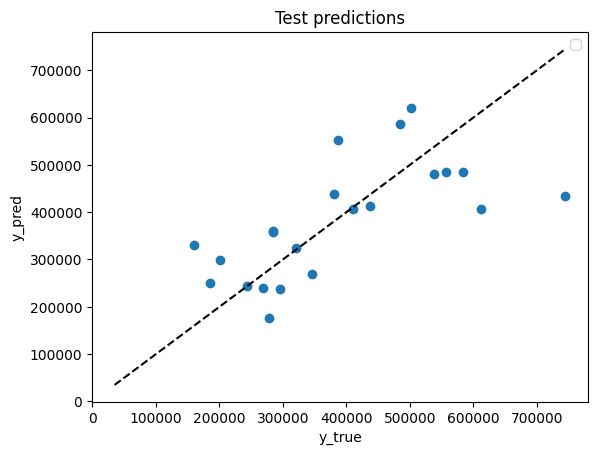

In [378]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

y_pred_car_18 = cross_val_predict(gb_best_model_car_18, X_train_car_18, y_train_car_18, cv=5)

plt.scatter(y_train_car_18,y_pred_car_18)


plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra
plt.title('Test predictions')

Text(0.5, 1.0, 'Test predictions')

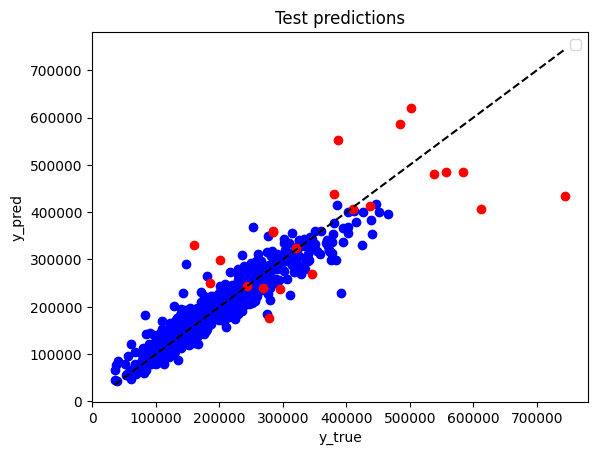

In [379]:
plt.scatter(y_train_bar, y_pred_bar, color='blue')
plt.scatter(y_train_car_18, y_pred_car_18, color='red')

plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra

plt.title('Test predictions')

In [380]:
combined_true = np.concatenate([y_train_car, y_train_bar])
combined_pred = np.concatenate([y_pred_car, y_pred_bar])

# Calculating combined MSE and R^2
combined_mse = mean_squared_error(combined_true, combined_pred)
combined_r2 = r2_score(combined_true, combined_pred)

print(combined_mse)

print(combined_r2)

723529551.5796572
0.8805567754788146


## Model 19

In [382]:
def preprocessing_19(X):
  columnas_seleccionadas =['MSSubClass','LotArea','Neighborhood','OverallQual','OverallCond','GrLivArea','BedroomAbvGr',
                          'TotRmsAbvGrd','GarageCars','CentralAir','1stFlrSF','2ndFlrSF','TotalBsmtSF',
                          'FullBath','YearBuilt','YearRemodAdd','GarageArea','MasVnrArea']
  X_train = X[columnas_seleccionadas]
  y_train=y.copy()
  def calificacio_a_numero(calificacion):
      map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na':1}
      return map.get(calificacion, 0)
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
  ## Data de la ultima modificacio
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
  X_train['bath_BSMT']=X['BsmtFullBath'] + 0.5*X['BsmtHalfBath']
  X_train['Total_area'] = X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF']

  ## Funcio per crear si és posterior a 2008
  def pre_or_post_2008(row):
        return row['YrSold'] - 2008 + (row['MoSold'] - 9)/12

  #X_train['pre_or_post_2008'] = X.apply(pre_or_post_2008, axis=1)

  X_train['GarageCal'] = X['GarageQual'].map(calificacio_a_numero)+X['GarageCond'].map(calificacio_a_numero)
  X_train['KitchenQual'] = X['KitchenQual'].map(calificacio_a_numero)

  # Apply the function to each row


  def air_condition_to_numeric(value):
      map = {'Y': 1, 'N': 0}
      return map.get(value, -1)
  X_train['CentralAir'] = X_train['CentralAir'].map(air_condition_to_numeric)

  def good_position(row):
      if (row['Condition1'] != 'Norm' or row['Condition2'] != 'Norm'):
          return '1'
      else:
          return '0'
  X_train['good_position'] = X.apply(good_position, axis=1)
  def normal_sale(row):
      if (row['SaleCondition'] == 'Normal'):
          return '1'
      else:
          return '0'
  X_train['normal_sale'] = X.apply(normal_sale, axis=1)
  return X_train

In [386]:
X_train=preprocessing_19(X)

<ipython-input-382-06fddc531cd7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-382-06fddc531cd7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
<ipython-input-382-06fddc531cd7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [387]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Splitting X_train and y_train based on the condition of Total_area
X_train_car_19 = X_train[X_train['Total_area'] > separacio]
y_train_car_19 = y_train[X_train['Total_area'] > separacio]

X_train_bar_19 = X_train[X_train['Total_area'] <= separacio]
y_train_bar_19 = y_train[X_train['Total_area'] <= separacio]

In [388]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define which columns are numeric and which are categorical
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns

# Create a transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('Target Encoder', TargetEncoder()),
    ('scaler', StandardScaler())
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the complete pipeline
pipeline_19 = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
pipeline_19.fit(X_train_bar_19,y_train_bar_19)

transformed_data=pipeline_19.transform(X_train_bar_19)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_train_bar_19 = pd.DataFrame(transformed_data, columns=new_column_names)

['MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'GrLivArea'
 'BedroomAbvGr' 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF'
 '2ndFlrSF' 'TotalBsmtSF' 'FullBath' 'YearBuilt' 'YearRemodAdd'
 'GarageArea' 'MasVnrArea' 'Ext_Cal' 'bath_oGr' 'bath_BSMT' 'Total_area'
 'GarageCal' 'KitchenQual' 'Neighborhood' 'good_position' 'normal_sale']


In [389]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score


model = Ridge()
model.fit(X_train_bar_19, y_train_bar_19)

# Avaluar el model
y_pred = model.predict(X_train_bar_19)
mse = mean_squared_error(y_train_bar_19, y_pred)
r2 = r2_score(y_train_bar_19, y_pred)
print("Error quadràtic mitjà: ", mse)
print("Error r2 mitjà: ", r2)

Error quadràtic mitjà:  586180309.4717089
Error r2 mitjà:  0.8804623661965412


In [390]:
coeficients = model.coef_
coeficients_ridge_bar ={}
for i in range(len(X_train_bar_19.columns)):
    print(f"{X_train_bar_19.columns[i]}: {coeficients[i]}")
    coeficients_ridge_bar[X_train_bar_19.columns[i]]=abs(coeficients[i])

MSSubClass: -7261.645815831565
LotArea: 4918.557214187844
OverallQual: 16054.063329820709
OverallCond: 6979.725736201873
GrLivArea: 4266.850773671669
BedroomAbvGr: -6363.746392381369
TotRmsAbvGrd: 854.5501717860743
GarageCars: 4063.1514643784567
CentralAir: -158.04247214282626
1stFlrSF: 11846.052880223617
2ndFlrSF: 13284.07313500029
TotalBsmtSF: -357.64411716132724
FullBath: -2835.296307778066
YearBuilt: 6601.703485707205
YearRemodAdd: 169.9233756446742
GarageArea: 3270.673398149189
MasVnrArea: 2515.088303317019
Ext_Cal: 1598.2549907003827
bath_oGr: 1988.5303613721069
bath_BSMT: 6837.301050070048
Total_area: 13730.076754893154
GarageCal: -3401.165904370193
KitchenQual: 4872.0019805149705
Neighborhood: 12247.164437579055
good_position: 2873.35867640336
normal_sale: 495.49910635079783


In [391]:
param_grid = {
    'n_estimators': [100,1250,1500],  # Number of trees in the forest
    'max_depth': [20,25,30],         # Maximum number of levels in tree
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_bar_19, y_train_bar_19)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
rf_best_model_bar= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
importances = rf_best_model_bar.feature_importances_
importances_rf_bar ={}

for i in range(len(X_train_bar_19.columns)):
    print(f"{X_train_bar_19.columns[i]}: {importances[i]}")
    importances_rf_bar[X_train_bar_19.columns[i]]=importances[i]


Best Parameters: {'max_depth': 30, 'n_estimators': 1250}
Best Score: -23827.767593192064
MSSubClass: 0.0036203506127263623
LotArea: 0.0160151564378455
OverallQual: 0.2743386271918266
OverallCond: 0.010347761783579875
GrLivArea: 0.0138917002094688
BedroomAbvGr: 0.002477330993628931
TotRmsAbvGrd: 0.0023637021945522277
GarageCars: 0.0052198971236408044
CentralAir: 0.002928053075399169
1stFlrSF: 0.007859641618550024
2ndFlrSF: 0.005272530950744553
TotalBsmtSF: 0.007900967010217665
FullBath: 0.0008455149716908358
YearBuilt: 0.014420017413257324
YearRemodAdd: 0.013684474123283141
GarageArea: 0.013776486197124417
MasVnrArea: 0.005513051948106848
Ext_Cal: 0.0032022910148035515
bath_oGr: 0.0025288753185877155
bath_BSMT: 0.007543326901719936
Total_area: 0.5017749249115165
GarageCal: 0.00321003595229088
KitchenQual: 0.007057171982424836
Neighborhood: 0.07138216283339281
good_position: 0.0007196506199856224
normal_sale: 0.0021062966096351003


In [392]:
# Configuració dels paràmetres per a la cerca de graella
param_grid = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1,3, 5, 7]
}

# Creació del model de Gradient Boosting per a la cerca de graella
gb = xgb.XGBRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Entrenament del model amb la cerca de graella
grid_search.fit(X_train_bar_19, y_train_bar_19)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
gb_best_model_bar_19= grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

importances = gb_best_model_bar_19.feature_importances_
importances_gb_bar ={}
for i in range(len(X_train_bar_19.columns)):
    print(f"{X_train_bar_19.columns[i]}: {importances[i]}")
    importances_gb_bar[X_train_bar_19.columns[i]]=importances[i]

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Score: -21951.144890859654
MSSubClass: 0.0018776585347950459
LotArea: 0.0062162368558347225
OverallQual: 0.36494818329811096
OverallCond: 0.011789347045123577
GrLivArea: 0.00955562200397253
BedroomAbvGr: 0.002524609211832285
TotRmsAbvGrd: 0.002360639860853553
GarageCars: 0.10640280693769455
CentralAir: 0.035627331584692
1stFlrSF: 0.0025944828521460295
2ndFlrSF: 0.002797052962705493
TotalBsmtSF: 0.0027660455089062452
FullBath: 0.0
YearBuilt: 0.008644836023449898
YearRemodAdd: 0.014572407118976116
GarageArea: 0.005286261439323425
MasVnrArea: 0.002528104931116104
Ext_Cal: 0.00468643382191658
bath_oGr: 0.014112408272922039
bath_BSMT: 0.01801997423171997
Total_area: 0.24419735372066498
GarageCal: 0.010371305048465729
KitchenQual: 0.058340974152088165
Neighborhood: 0.06275861710309982
good_position: 0.0026198604609817266
normal_sale: 0.004401474725455046


In [393]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

estimators = [
    ('ridge', Ridge()),
    ('rf', rf_best_model_bar),
    ('gb', gb_best_model_bar_19)
]
stacking_regressor_bar_19 = StackingRegressor(
    estimators=estimators,
    final_estimator=MLPRegressor(random_state=42),
    cv=5
)
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))}
# Entrenar el model d'apilament
scores = cross_validate(stacking_regressor_bar, X_train_bar_19, y_train_bar_19, cv=5,scoring=scoring)

r2_scores = scores['test_r2']
rmse_scores = scores['test_rmse']

# Imprimir los resultados
print(f'R^2 Scores: {np.mean(r2_scores)}')
print(f'RMSE Scores: {np.mean(rmse_scores)}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R^2 Scores: 0.9051513279659595
RMSE Scores: 21425.22108116261


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 1.0, 'Test predictions')

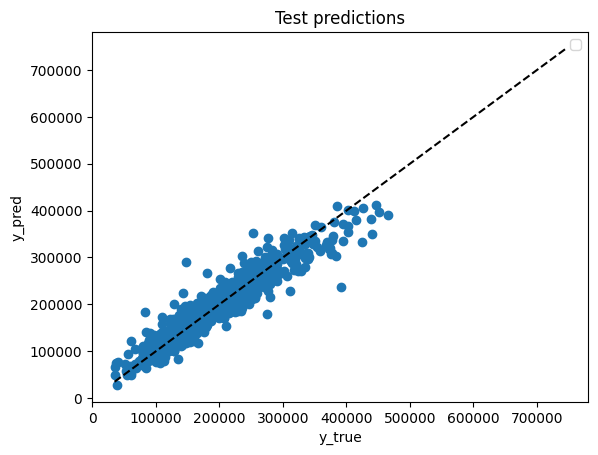

In [394]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

y_pred_bar_19 = cross_val_predict(stacking_regressor_bar_19, X_train_bar_19, y_train_bar_19, cv=5)

plt.scatter(y_train_bar_19,y_pred_bar_19)


plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra
plt.title('Test predictions')

Text(0.5, 1.0, 'Test predictions')

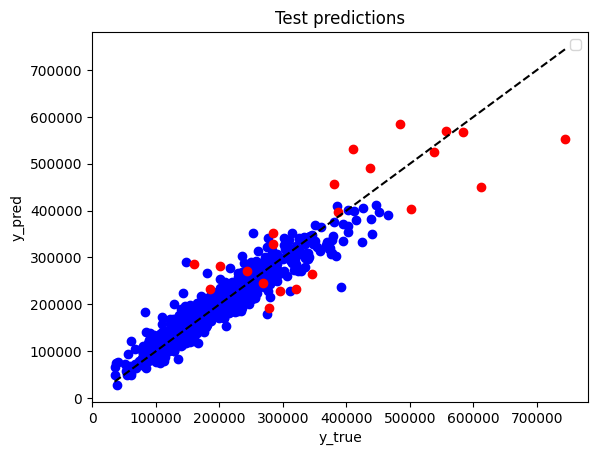

In [395]:
plt.scatter(y_train_bar_19, y_pred_bar_19, color='blue')
plt.scatter(y_train_car_15, y_pred_car_15, color='red')

plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra

plt.title('Test predictions')

In [396]:
combined_true = np.concatenate([y_train_car_15, y_train_bar_19])
combined_pred = np.concatenate([y_pred_car_15, y_pred_bar_19])

# Calculating combined MSE and R^2
combined_mse = mean_squared_error(combined_true, combined_pred)
combined_r2 = r2_score(combined_true, combined_pred)

print(np.sqrt(combined_mse))

print(combined_r2)

24364.14609931465
0.9020041610300564


In [397]:
def show_top_features(coefficients, n=3, most_important=True):
    # Sort the features by their coefficient values
    # If most_important is True, sort in descending order to get the most important features
    sorted_features = sorted(coefficients.items(), key=lambda x: x[1], reverse=most_important)
    top_n_features = sorted_features[:n]

    print(f"The {n} features with the {'largest' if most_important else 'smallest'} coefficients are:")
    for feature, coef in top_n_features:
        print(f"{feature}: {coef}")



print("Most important features in random forest")
show_top_features(importances_rf_car, n=5, most_important=True)
print("\nMost important features in gradient boosting")
show_top_features(importances_gb_car, n=5, most_important=True)
print("\nMost important features in ridge regression")
show_top_features(coeficients_ridge_car, n=5, most_important=True)

Most important features in random forest
The 5 features with the largest coefficients are:

Most important features in gradient boosting
The 5 features with the largest coefficients are:

Most important features in ridge regression
The 5 features with the largest coefficients are:
PoolArea: 90090.46054392162
bath_oGr: 47163.750069346155
TotalBsmtSF: 46916.91302042497
Neighborhood: 46487.82075016289
KitchenQual: 43284.02020950971


In [398]:
def show_worst_features(coefficients, n):
    sorted_features = sorted(coefficients.items(), key=lambda x: x[1])
    worst_n_features = sorted_features[:n]

    print(f"The {n} features with the smallest coefficients are:")
    for feature, coef in worst_n_features:
        print(f"{feature}: {coef}")
print("Features menys importants al random forest")
show_worst_features(importances_rf_car, n=5)
print("Features menys importants al gradient boosting")
show_worst_features(importances_gb_car, n=5)
print("Features menys importants al gradient boosting")

show_worst_features(coeficients_ridge_car, n=5)

Features menys importants al random forest
The 5 features with the smallest coefficients are:
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
Features menys importants al gradient boosting
The 5 features with the smallest coefficients are:
GarageQual: 0.0
GarageArea: 4739.143550472451
1stFlrSF: 6567.629318296773
OverallQual: 10798.712557920207
LotArea: 12369.273273530518


In [399]:
print(separacio)

4400


# Test

In [400]:
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Splitting X_train and y_train based on the condition of Total_area
X_test_car = X_test[X_test['1stFlrSF']+X_test['2ndFlrSF']+X_test['TotalBsmtSF'] > separacio]
y_test_car = y_test[X_test['1stFlrSF']+X_test['2ndFlrSF']+X_test['TotalBsmtSF'] > separacio]

X_test_bar = X_test[X_test['1stFlrSF']+X_test['2ndFlrSF']+X_test['TotalBsmtSF'] <= separacio]
y_test_bar = y_test[X_test['1stFlrSF']+X_test['2ndFlrSF']+X_test['TotalBsmtSF'] <= separacio]

print(len(y_test_car),len(y_test_bar),len(y_test))

6 286 292


In [401]:

X_test_car_2=preprocessing_15(X_test_car)


<ipython-input-320-493867a4dc2b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-320-493867a4dc2b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
<ipython-input-320-493867a4dc2b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [402]:
numeric_features = X_test_car_2.select_dtypes(include=['number']).columns
categorical_features = X_test_car_2.select_dtypes(exclude=['number']).columns

transformed_data=pipeline_car_15.transform(X_test_car_2)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_test_car = pd.DataFrame(transformed_data, columns=new_column_names)

['LotArea' 'OverallQual' 'OverallCond' 'GrLivArea' 'BedroomAbvGr'
 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'FullBath' 'YearBuilt' 'YearRemodAdd' 'GarageArea'
 'MasVnrArea' 'Ext_Cal' 'bath_oGr' 'bath_BSMT' 'Total_area' 'GarageCal'
 'KitchenQual' 'MSSubClass' 'Neighborhood' 'MSZoning' 'HouseStyle'
 'good_position']


In [403]:
X_test_bar_2 = preprocessing_19(X_test_bar)


<ipython-input-382-06fddc531cd7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-382-06fddc531cd7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
<ipython-input-382-06fddc531cd7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [404]:
X_test_bar_2.head(5)

MSSubClass  LotArea Neighborhood  OverallQual  OverallCond  GrLivArea  \
0          20    11500      Edwards            4            3        845   
1          20    10237      Gilbert            6            5       1316   
2          85     7200      CollgCr            5            8        768   
3          20     6000      OldTown            4            7        901   
4          60     8924      CollgCr            7            5       1724   

   BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  GarageArea  \
0             3             5           1           0  ...         290   
1             3             6           2           1  ...         397   
2             2             5           1           1  ...         396   
3             2             4           1           1  ...         281   
4             3             8           2           1  ...         527   

   MasVnrArea  Ext_Cal  bath_oGr  bath_BSMT  Total_area  GarageCal  \
0         0.0        7       1.0        0.0         845          6   
1         0.0        7       2.0        0.0        2632          6   
2         0.0        7       1.0        0.5        1536          6   
3         0.0        6       1.0        0.0        1802          5   
4         0.0        6       2.5        0.0        2604          6   

   KitchenQual  good_position  normal_sale  
0            3              0            1  
1            4              1            0  
2            3              0            1  
3            3              0            1  
4            4              0            1  

[5 rows x 26 columns]

In [405]:
numeric_features = X_test_bar_2.select_dtypes(include=['number']).columns
categorical_features = X_test_bar_2.select_dtypes(exclude=['number']).columns

transformed_data=pipeline_19.transform(X_test_bar_2)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_test_bar = pd.DataFrame(transformed_data, columns=new_column_names)

['MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'GrLivArea'
 'BedroomAbvGr' 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF'
 '2ndFlrSF' 'TotalBsmtSF' 'FullBath' 'YearBuilt' 'YearRemodAdd'
 'GarageArea' 'MasVnrArea' 'Ext_Cal' 'bath_oGr' 'bath_BSMT' 'Total_area'
 'GarageCal' 'KitchenQual' 'Neighborhood' 'good_position' 'normal_sale']


In [406]:
gb_best_model_car_15.fit(X_train_car_15,y_train_car_15)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=25, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [407]:
X_train_car_15.T

0         1         2         3         4         5   \
LotArea        0.416696  0.061077  0.654618  2.480187  0.309878  0.394937   
OverallQual    2.176144  1.434806  2.176144 -0.047870  2.176144  2.176144   
OverallCond   -0.524297 -0.524297 -0.524297 -2.309868 -0.524297 -0.524297   
GrLivArea      2.812146  0.297795  2.909095  2.165117  1.846871  2.434888   
BedroomAbvGr   1.385625  0.170685  1.385625  1.385625 -1.044255  0.170685   
TotRmsAbvGrd   3.500099  0.333764  2.866832  1.600298  2.866832  1.600298   
GarageCars     1.684383  1.684383  1.684383  0.341096  1.684383  1.684383   
CentralAir     0.256995  0.256995  0.256995  0.256995  0.256995  0.256995   
1stFlrSF       1.714508  1.410567  2.461334  3.975248  3.538152  2.684224   
2ndFlrSF       1.753137 -0.795186  1.256589 -0.795186 -0.795186  0.549242   
TotalBsmtSF    1.832806  5.682237  2.507502  2.619952  3.391407  2.928534   
FullBath       2.700218  0.849471  2.700218  2.700218  0.849471  0.849471   
YearBuilt      1.237451  1.070903  1.137522 -0.461334  1.270761  1.170832   
YearRemodAdd   1.180847  0.938815  1.035628 -0.464972  1.229254  1.035628   
GarageArea     2.636838  1.972150  1.193515  0.092031  1.687283  1.089064   
MasVnrArea     1.964888  1.200098  0.674305 -0.568477  3.972460  4.044159   
Ext_Cal        2.289358  0.802897  0.802897  0.802897  2.289358  2.289358   
bath_oGr       2.827046  0.423637  2.827046  2.025910  1.224774  1.224774   
bath_BSMT     -0.864393  1.089442 -0.864393  1.089442  1.089442 -0.864393   
Total_area     2.911749  3.309652  3.345307  2.903192  3.108562  3.254031   
GarageCal      0.277329  0.277329  0.277329  0.277329  0.277329  0.277329   
KitchenQual    2.342897  0.798041  2.342897 -0.746815  2.342897  2.342897   
MSSubClass     1.510840  0.047815  1.510840  0.047815  0.047815  1.510840   
Neighborhood   2.720329  2.720329  1.087887  0.713239  2.720329  2.720329   
MSZoning       0.356385  0.356385  0.356385  0.356385  0.356385  0.356385   
HouseStyle     1.354500 -0.302682  1.354500 -0.302682 -0.302682  1.354500   
good_position  0.401365  0.401365  0.401365  0.401365  0.401365  0.401365   

                     6         7         8         9   ...        12  \
LotArea       -0.054862  0.633628  0.507798  3.296265  ...  0.607033   
OverallQual    1.434806  1.434806  1.434806  2.917482  ...  2.917482   
OverallCond   -0.524297  0.368488 -0.524297 -0.524297  ... -0.524297   
GrLivArea      2.184085  1.537056  3.688902  6.719611  ...  6.298094   
BedroomAbvGr   1.385625  1.385625  1.385625  0.170685  ...  1.385625   
TotRmsAbvGrd   1.600298  0.967031  1.600298  2.866832  ...  2.233565   
GarageCars     0.341096  0.341096  1.684383  1.684383  ...  1.684383   
CentralAir     0.256995  0.256995  0.256995  0.256995  ...  0.256995   
1stFlrSF       4.001300  3.112635  2.637909  5.778630  ...  3.674202   
2ndFlrSF      -0.795186 -0.795186  1.980331  2.807131  ...  4.041475   
TotalBsmtSF    3.898737  3.095901  2.614722  5.504410  ...  3.564004   
FullBath       0.849471  0.849471  0.849471  2.700218  ...  2.700218   
YearBuilt      0.338094 -0.028310  0.804427  1.204142  ...  0.837737   
YearRemodAdd  -0.174534 -0.707005  0.551563  1.132441  ...  0.551563   
GarageArea     0.367402  0.742476  0.956126  1.991141  ...  1.654049   
MasVnrArea    -0.568477 -0.568477  2.891000  3.984410  ... -0.568477   
Ext_Cal        0.802897  2.289358  0.802897  2.289358  ...  0.802897   
bath_oGr       1.224774  0.423637  1.224774  2.827046  ...  2.827046   
bath_BSMT      1.089442  1.089442  1.089442  1.089442  ...  1.089442   
Total_area     3.613428  2.737756  3.931465  7.558228  ...  6.214771   
GarageCal      0.277329  0.277329  0.277329  0.277329  ...  0.277329   
KitchenQual    0.798041  0.798041  0.798041  2.342897  ...  2.342897   
MSSubClass     0.047815  0.047815 -0.990232  1.510840  ...  1.510840   
Neighborhood   0.279130 -0.678177  1.892524 -1.012513  ...  1.892524   
MSZoning       0.356385  0.356385  0.356385  0.356385  ...  0.35

In [408]:
y_pred_car = gb_best_model_car_15.predict(X_test_car)
mse = mean_squared_error(y_test_car, y_pred_car)
r2 = r2_score(y_test_car, y_pred_car)
print("Error quadràtic mitjà: ", np.sqrt(mse))
print("Error r2 mitjà: ", r2)

Error quadràtic mitjà:  169331.73043367785
Error r2 mitjà:  -0.2962009825889822


In [409]:
## S'ha de canviar
stacking_regressor_bar_19.fit(X_train_bar_19,y_train_bar_19)

StackingRegressor(cv=5,
                  estimators=[('ridge', Ridge()),
                              ('rf',
                               RandomForestRegressor(max_depth=30,
                                                     n_estimators=1250,
                                                     random_state=42)),
                              ('gb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_t...
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                  final_estimator=MLPRegressor(random_state=42))

In [410]:
## S'ha de canviar
y_pred_bar = stacking_regressor_bar_19.predict(X_test_bar)
mse = mean_squared_error(y_test_bar, y_pred_bar)
r2 = r2_score(y_test_bar, y_pred_bar)
print("Error quadràtic mitjà: ", np.sqrt(mse))
print("Error r2 mitjà: ", r2)

Error quadràtic mitjà:  20900.712538263622
Error r2 mitjà:  0.904249619867208


Text(0.5, 1.0, 'Test predictions')

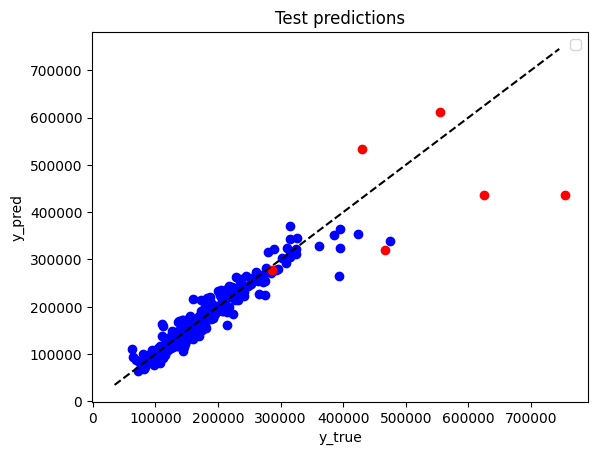

In [411]:
plt.scatter(y_test_bar, y_pred_bar, color='blue')
plt.scatter(y_test_car, y_pred_car, color='red')

plt.legend()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--') # 'k--' crea una línia discontínua negra

plt.title('Test predictions')

In [412]:
combined_true = np.concatenate([y_test_car, y_test_bar])
combined_pred = np.concatenate([y_pred_car, y_pred_bar])

# Calculating combined MSE and R^2
combined_mse = mean_squared_error(combined_true, combined_pred)
combined_r2 = r2_score(combined_true, combined_pred)

print(np.sqrt(combined_mse))

print(combined_r2)


31891.059638856706
0.8606026336818426


In [413]:
filas_condicion = df[df['SalePrice'] > 700000]
filas_condicion=preprocessing_15(filas_condicion)
filas_condicion.T

<ipython-input-320-493867a4dc2b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-320-493867a4dc2b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
<ipython-input-320-493867a4dc2b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


691      1182
MSSubClass          60       60
LotArea          21535    15623
Neighborhood   NoRidge  NoRidge
OverallQual         10       10
OverallCond          6        5
GrLivArea         4316     4476
BedroomAbvGr         4        4
TotRmsAbvGrd        10       10
GarageCars           3        3
CentralAir           1        1
1stFlrSF          2444     2411
2ndFlrSF          1872     2065
TotalBsmtSF       2444     2396
MSZoning            RL       RL
HouseStyle      2Story   2Story
FullBath             3        3
YearBuilt         1994     1996
YearRemodAdd      1995     1996
GarageArea         832      813
MasVnrArea      1170.0      0.0
Ext_Cal              8        7
bath_oGr           3.5      3.5
bath_BSMT          0.5      1.0
Total_area        6760     6872
GarageCal            6        6
KitchenQual          5        5
good_position        0        0

In [414]:
condicion = np.where(y_test > 350000)

filas_condicion = df.iloc[condicion]

filas_condicion = preprocessing_19(filas_condicion)
filas_condicion.head()# Transponer el DataFrame

<ipython-input-382-06fddc531cd7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-382-06fddc531cd7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
<ipython-input-382-06fddc531cd7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


MSSubClass  LotArea Neighborhood  OverallQual  OverallCond  GrLivArea  \
5           50    14115      Mitchel            5            5       1362   
49          20     7742       Sawyer            5            7        955   
60          20    13072      SawyerW            6            5       1158   
66          20    19900        NAmes            7            5       2207   
81         120     4500      Mitchel            6            5       1337   

    BedroomAbvGr  TotRmsAbvGrd  GarageCars  CentralAir  ...  GarageArea  \
5              1             5           2           1  ...         480   
49             3             6           1           1  ...         386   
60             3             5           2           1  ...         576   
66             3             7           2           1  ...         576   
81             2             5           2           1  ...         405   

    MasVnrArea  Ext_Cal  bath_oGr  bath_BSMT  Total_area  GarageCal  \
5          0.0        6       1.5        1.0        2158          6   
49         0.0        6       1.0        1.0        1910          6   
60         0.0        6       1.5        1.0        2316          6   
66       287.0        6       2.0        1.0        4154          6   
81       443.0        7       2.0        1.0        2574          6   

    KitchenQual  good_position  normal_sale  
5             3              0            1  
49            3              0            1  
60            4              1            0  
66            3              1            1  
81            3              0            1  

[5 rows x 26 columns]

In [415]:
filas_condicion.T

5       49       60     66       81       114      115  \
MSSubClass          50      20       20     20      120       70      160   
LotArea          14115    7742    13072  19900     4500     7259     3230   
Neighborhood   Mitchel  Sawyer  SawyerW  NAmes  Mitchel  Crawfor  Somerst   
OverallQual          5       5        6      7        6        6        6   
OverallCond          5       7        5      5        5        8        5   
GrLivArea         1362     955     1158   2207     1337     2320     1458   
BedroomAbvGr         1       3        3      3        2        3        2   
TotRmsAbvGrd         5       6        5      7        5        9        5   
GarageCars           2       1        2      2        2        1        2   
CentralAir           1       1        1      1        1        1        1   
1stFlrSF           796     955     1158   2207     1337     1436      729   
2ndFlrSF           566       0        0      0        0      884      729   
TotalBsmtSF        796     955     1158   1947     1237     1028      729   
FullBath             1       1        1      2        2        2        2   
YearBuilt         1993    1966     2004   1970     1998     1945     1999   
YearRemodAdd      1995    1966     2004   1989     1998     2002     1999   
GarageArea         480     386      576    576      405      180      440   
MasVnrArea         0.0     0.0      0.0  287.0    443.0      0.0   1129.0   
Ext_Cal              6       6        6      6        7        6        6   
bath_oGr           1.5     1.0      1.5    2.0      2.0      2.5      2.5   
bath_BSMT          1.0     1.0      1.0    1.0      1.0      1.0      0.0   
Total_area        2158    1910     2316   4154     2574     3348     2187   
GarageCal            6       6        6      6        6        6        6   
KitchenQual          3       3        4      3        3        4        3   
good_position        0       0        1      1        0        0        0   
normal_sale          1       1        0      1        1        1        1   

                   120     144      196      236    260  
MSSubClass          80      90       20       20     80  
LotArea          21453    9100     9416     8773  19296  
Neighborhood   ClearCr  Sawyer  Somerst  CollgCr  NAmes  
OverallQual          6       5        7        7      6  
OverallCond          5       5        5        5      5  
GrLivArea          988    1728     1726     1414   1382  
BedroomAbvGr         1       6        3        3      3  
TotRmsAbvGrd         4      10        8        6      6  
GarageCars           2       2        3        2      2  
CentralAir           1       1        1        1      1  
1stFlrSF           988    1728     1726     1414   1382  
2ndFlrSF             0       0        0        0      0  
TotalBsmtSF        938    1728     1726     1414   1362  
FullBath             1       2        2        2      1  
YearBuilt         1969    1963     2007     2004   1962  
YearRemodAdd      1969    1963     2007     2004   1962  
GarageArea         540     504      786      494    884  
MasVnrArea         0.0   336.0    205.0     98.0  399.0  
Ext_Cal              6       6        8        7      6  
bath_oGr           1.0     2.0      2.0      2.0    1.0  
bath_BSMT          1.0     1.0      1.0      0.0    1.0  
Total_area        1926    3456     3452     2828   2744  
GarageCal            6       6        6        6      6  
KitchenQual          3       3        5        4      3  
good_position        0       1        0        0      1  
normal_sale          1       0        0        1      1

#Kaggle

In [416]:
X_kaggle = pd.read_csv('test_advance.csv')
X_kaggle.head(2000)
row_with_id_2121 = X_kaggle[X_kaggle['Id'] == 2121]
row_with_id_2121.T


660
Id                2121
MSSubClass          20
MSZoning            RM
LotFrontage       99.0
LotArea           5940
...                ...
MiscVal              0
MoSold               4
YrSold            2008
SaleType         ConLD
SaleCondition  Abnorml

[80 rows x 1 columns]

In [417]:
## M'ha sorgit un problema que no havia tingut previament
X_kaggle.loc[X_kaggle['Id'] == 2121, 'TotalBsmtSF'] = 0

# Verificamos la actualización
updated_row = X_kaggle[X_kaggle['Id'] == 2121]
updated_row

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave   NaN      IR1   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
660         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
660       0      4    2008     ConLD        Abnorml  

[1 rows x 80 columns]

In [418]:
# Splitting X_train and y_train based on the condition of Total_area
X_car = X[X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF'] > 4400]
y_car = y[X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF'] > 4400]

X_bar = X[X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF'] <= 4400]
y_bar = y[X['1stFlrSF']+X['2ndFlrSF']+X['TotalBsmtSF'] <= 4400]


In [419]:
# Assuming X_kaggle is your dataset

# Condition for the 'car' subset
condition_car = (X_kaggle['1stFlrSF'] + X_kaggle['2ndFlrSF'] + X_kaggle['TotalBsmtSF']) > 4400
indices_car = np.where(condition_car)[0]  # Use [0] to get the indices directly as a flat array
indices_car = X_kaggle.iloc[indices_car, 0]  # Assuming the 'id' column is at index 0
X_kaggle_car = X_kaggle[condition_car]

print(len(indices_car))  # Print the IDs that satisfy the condition

# Condition for the 'bar' subset
condition_bar = (X_kaggle['1stFlrSF'] + X_kaggle['2ndFlrSF'] + X_kaggle['TotalBsmtSF']) <= 4400
indices_bar = np.where(condition_bar)[0]  # Use [0] to get the indices directly as a flat array
indices_bar = X_kaggle.iloc[indices_bar, 0]  # Assuming the 'id' column is at index 0
X_kaggle_bar = X_kaggle[condition_bar]
print(len(indices_bar))

31
1428


In [420]:
import pandas as pd
import numpy as np



# Unir los DataFrames X_kaggle_car y X_kaggle_bar
X_combined = pd.concat([X_kaggle_car, X_kaggle_bar])

# Ordenar el DataFrame combinado por 'Id'
X_combined_sorted = X_combined.sort_values(by='Id')

# Comparar con X_kaggle
# Usamos merge para identificar las filas que son diferentes
comparison_df = X_combined_sorted.merge(X_kaggle, on='Id', how='outer', indicator=True)

# Filtrar para encontrar las filas que solo están en uno de los DataFrames
differences = comparison_df[comparison_df['_merge'] != 'both']

differences


Empty DataFrame
Columns: [Id, MSSubClass_x, MSZoning_x, LotFrontage_x, LotArea_x, Street_x, Alley_x, LotShape_x, LandContour_x, Utilities_x, LotConfig_x, LandSlope_x, Neighborhood_x, Condition1_x, Condition2_x, BldgType_x, HouseStyle_x, OverallQual_x, OverallCond_x, YearBuilt_x, YearRemodAdd_x, RoofStyle_x, RoofMatl_x, Exterior1st_x, Exterior2nd_x, MasVnrType_x, MasVnrArea_x, ExterQual_x, ExterCond_x, Foundation_x, BsmtQual_x, BsmtCond_x, BsmtExposure_x, BsmtFinType1_x, BsmtFinSF1_x, BsmtFinType2_x, BsmtFinSF2_x, BsmtUnfSF_x, TotalBsmtSF_x, Heating_x, HeatingQC_x, CentralAir_x, Electrical_x, 1stFlrSF_x, 2ndFlrSF_x, LowQualFinSF_x, GrLivArea_x, BsmtFullBath_x, BsmtHalfBath_x, FullBath_x, HalfBath_x, BedroomAbvGr_x, KitchenAbvGr_x, KitchenQual_x, TotRmsAbvGrd_x, Functional_x, Fireplaces_x, FireplaceQu_x, GarageType_x, GarageYrBlt_x, GarageFinish_x, GarageCars_x, GarageArea_x, GarageQual_x, GarageCond_x, PavedDrive_x, WoodDeckSF_x, OpenPorchSF_x, EnclosedPorch_x, 3SsnPorch_x, ScreenPorch_x, PoolArea_x, PoolQC_x, Fence_x, MiscFeature_x, MiscVal_x, MoSold_x, YrSold_x, SaleType_x, SaleCondition_x, MSSubClass_y, MSZoning_y, LotFrontage_y, LotArea_y, Street_y, Alley_y, LotShape_y, LandContour_y, Utilities_y, LotConfig_y, LandSlope_y, Neighborhood_y, Condition1_y, Condition2_y, BldgType_y, HouseStyle_y, OverallQual_y, OverallCond_y, YearBuilt_y, YearRemodAdd_y, ...]
Index: []

[0 rows x 160 columns]

In [421]:
# Apply the function to each row
X_car = preprocessing_15(X_car)
X_bar = preprocessing_19(X_bar)

X_kaggle_car = preprocessing_15(X_kaggle_car)
X_kaggle_bar = preprocessing_19(X_kaggle_bar)

<ipython-input-320-493867a4dc2b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Ext_Cal'] = X['ExterQual'].map(calificacio_a_numero) + X['ExterCond'].map(calificacio_a_numero)
<ipython-input-320-493867a4dc2b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['bath_oGr'] = X['FullBath'] + 0.5*X['HalfBath']
<ipython-input-320-493867a4dc2b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [422]:
numeric_features = X_car.select_dtypes(include=['number']).columns
categorical_features = X_car.select_dtypes(exclude=['number']).columns

pipeline_car_15.fit(X_car,y_car)
transformed_data=pipeline_car_15.transform(X_car)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_car = pd.DataFrame(transformed_data, columns=new_column_names)

['LotArea' 'OverallQual' 'OverallCond' 'GrLivArea' 'BedroomAbvGr'
 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'FullBath' 'YearBuilt' 'YearRemodAdd' 'GarageArea'
 'MasVnrArea' 'Ext_Cal' 'bath_oGr' 'bath_BSMT' 'Total_area' 'GarageCal'
 'KitchenQual' 'MSSubClass' 'Neighborhood' 'MSZoning' 'HouseStyle'
 'good_position']


In [423]:
transformed_data=pipeline_car_15.transform(X_kaggle_car)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_kaggle_car = pd.DataFrame(transformed_data, columns=new_column_names)

['LotArea' 'OverallQual' 'OverallCond' 'GrLivArea' 'BedroomAbvGr'
 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'FullBath' 'YearBuilt' 'YearRemodAdd' 'GarageArea'
 'MasVnrArea' 'Ext_Cal' 'bath_oGr' 'bath_BSMT' 'Total_area' 'GarageCal'
 'KitchenQual' 'MSSubClass' 'Neighborhood' 'MSZoning' 'HouseStyle'
 'good_position']


In [424]:
numeric_features = X_bar.select_dtypes(include=['number']).columns
categorical_features = X_bar.select_dtypes(exclude=['number']).columns

pipeline_19.fit(X_bar,y_bar)
transformed_data=pipeline_19.transform(X_bar)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_bar = pd.DataFrame(transformed_data, columns=new_column_names)

['MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'GrLivArea'
 'BedroomAbvGr' 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF'
 '2ndFlrSF' 'TotalBsmtSF' 'FullBath' 'YearBuilt' 'YearRemodAdd'
 'GarageArea' 'MasVnrArea' 'Ext_Cal' 'bath_oGr' 'bath_BSMT' 'Total_area'
 'GarageCal' 'KitchenQual' 'Neighborhood' 'good_position' 'normal_sale']


In [425]:
transformed_data=pipeline_19.transform(X_kaggle_bar)

new_column_names = np.concatenate((numeric_features,categorical_features)) # Adjust as needed
print(new_column_names)
X_kaggle_bar = pd.DataFrame(transformed_data, columns=new_column_names)

['MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'GrLivArea'
 'BedroomAbvGr' 'TotRmsAbvGrd' 'GarageCars' 'CentralAir' '1stFlrSF'
 '2ndFlrSF' 'TotalBsmtSF' 'FullBath' 'YearBuilt' 'YearRemodAdd'
 'GarageArea' 'MasVnrArea' 'Ext_Cal' 'bath_oGr' 'bath_BSMT' 'Total_area'
 'GarageCal' 'KitchenQual' 'Neighborhood' 'good_position' 'normal_sale']


In [426]:
gb_best_model_car_15.fit(X_car,y_car)
y_pred_car = gb_best_model_car_15.predict(X_kaggle_car)

In [427]:
stacking_regressor_bar_19.fit(X_bar,y_bar)

y_pred_bar = stacking_regressor_bar_19.predict(X_kaggle_bar)

In [428]:
series_car = pd.Series(indices_car)
series_bar = pd.Series(indices_bar)

# Concatenate the Series
all_indices = pd.concat([series_car, series_bar])

# Create a new DataFrame using these indices
submission = pd.DataFrame(all_indices, columns=['Id'])

# Reset the index to have a clean DataFrame
submission.reset_index(drop=True, inplace=True)

# Display the new DataFrame
print(submission)

        Id
0     1480
1     1630
2     1661
3     1664
4     1672
...    ...
1454  2915
1455  2916
1456  2917
1457  2918
1458  2919

[1459 rows x 1 columns]


In [429]:
# Concatenate the two DataFrames to form the final submission DataFrame
submission['SalePrice'] = np.concatenate([y_pred_car, y_pred_bar])

# Reset the index for the final DataFrame
submission.reset_index(drop=True, inplace=True)


In [430]:
submission.head()

Id    SalePrice
0  1480  445975.3125
1  1630  319543.1250
2  1661  613511.5625
3  1664  433376.3750
4  1672  589043.7500

In [431]:
submission.to_csv('submission.csv',index=None)

In [432]:
pd.read_csv('submission.csv')

Id      SalePrice
0     1480  445975.312500
1     1630  319543.125000
2     1661  613511.562500
3     1664  433376.375000
4     1672  589043.750000
...    ...            ...
1454  2915   88412.566927
1455  2916   83047.857236
1456  2917  151558.712509
1457  2918  120824.015447
1458  2919  202711.524163

[1459 rows x 2 columns]

In [433]:
from google.colab import files

files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>